# dataloader

In [1]:
import torch
import torch.nn as nn
import os
import numpy as np

from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from scipy.io import mmread
 

cv = 0
DATA_DIR = './ml-1m-5cv'
train = mmread(os.path.join(DATA_DIR,'train.%s'%cv)).A
test = mmread(os.path.join(DATA_DIR,'test.%s'%cv)).A
targets = np.unique(test.nonzero()[0])

class MLIRDataset(Dataset):
    def __init__(self, root_dir, cv, part, tranform = None):
        self.train = mmread(os.path.join(root_dir,'train.%s'%cv)).A
        self.test = mmread(os.path.join(root_dir,'test.%s'%cv)).A
        self.data = train + test
        self.targets = np.unique(test.nonzero()[0])
        self.part = part
        self.transform = tranform

    def __len__(self):
        return train.shape[1]

    def __getitem__(self, idx):
        if self.part == 'train':
            sample = self.train[:,idx]
        elif self.part == 'test':
            sample = self.test[:,idx]
        elif self.part == 'all':
            sample = self.data[:,idx]
        else:
            raise AttributeError('which part of data to fetch?')
        if self.transform:
            sample = self.transform(sample)
        return {'id':idx,'sample':sample}


from torch.utils.data import DataLoader

train_dataset = MLIRDataset(DATA_DIR,cv,'train')
test_dataset = MLIRDataset(DATA_DIR,cv, 'test')
train_loader = DataLoader(dataset=train_dataset,
                                   batch_size=4,
                                   shuffle=True,
                                   num_workers=4)
test_loader = DataLoader(dataset=test_dataset,
                                   batch_size=4,
                                   shuffle=False,
                                   num_workers=4)


# for i_batch, sample_batched in enumerate(train_loader):
#     print i_batch,sample_batched

# auto-encoder

## model

In [1]:
import torch
import torch.nn as nn
import os
import numpy as np

from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import pandas as pd

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.encoder(x)
        out = self.relu(out)
        out = self.decoder(out)
        return out





In [46]:
dataset.train_dataset.data.shape
for i_batch, sample_batched in enumerate(dataset.train_loader):
    print(i_batch,sample_batched)


0 {'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 3688
 3285
 2994
  322
 2303
 1927
 3173
 1089
  597
  904
 3577
  371
 2594
  882
 1419
 1767
  941
  737
 2033
 2614
 2772
 2289
 2256
 1323
 1750
 3550
 1301
 2414
 2484
 2536
 2284
 2356
 3591
 3470
 3277
 1314
  861
  390
 1297
 2168
  613
 2633
  949
  498
 3489
 3656
  512
  967
 1632
 2317
 2768
  234
  648
 1380
  440
 1731
  212
 3099
 2224
 1183
 1399
 2435
 2936
  806
 2873
  534
 1761
 1631
 2475
  575
  251
  502
 3185
 3632
  751
 1569
 1894
  705
  838
 1682
 1889
 2002
 1169
 1104
  494
 2408
 1965
 1426
  160
 3419
 1114
 3409
 2691
   42
  636
 1240
 2662
 3667
 2034
 2779
[torch.LongTensor of size 100]
}
1 {'sample': 

9 {'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 3674
 3240
  595
  962
  667
 1934
  704
 2929
 2658
  308
 1707
 1254
 3387
  354
 1215
  133
    4
 3614
  734
 1559
 2778
 2704
  204
  362
 2200
  706
  766
 3413
 3072
 2664
 3053
  190
  223
 1201
 2109
 2736
 2390
 2450
  255
 1395
 1824
 3415
  923
 2230
  199
  688
 2897
 3193
 2672
  470
 3267
  388
  394
  246
   19
 2885
 2921
 1597
 1665
 3569
 2302
  968
  209
 1437
  728
  793
 3443
 1598
 1821
 2488
 2278
 1774
 2077
  409
 1872
 3352
  545
 3038
 2030
 3008
  738
  970
 3642
  733
 2630
 2389
  622
  951
 1351
 3156
 3095
 2107
  481
 2114
 2848
 3201
  129
 2518
 3207
 2045
[torch.LongTensor of size 100]
}
10 {'sample':

18 {'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 3159
 2924
 3111
 2442
 2762
 2553
  520
 2725
  412
 3384
  925
 1345
 2925
 1333
  820
  397
 3438
  244
 3556
 1968
 3103
 3262
  576
  598
 3098
  811
  346
 2206
  856
   54
  903
 2962
 1640
 1885
  986
 3197
 3049
 2282
  765
 1363
  183
 2375
 2426
  272
  352
 1521
 2876
 2646
  696
 1276
 2694
 1086
 2006
 3164
  937
 3474
 1074
  193
 1131
 2059
  275
 1977
 3160
 1558
 2495
 1494
 2325
 3337
 2285
 2935
 1808
 2923
 2464
 3123
  188
 1152
  531
 1162
 2720
 3506
 1793
 2596
 1537
 1888
 3179
 2687
 2434
 3295
 2693
  760
 3486
 3023
 2998
 2879
 3308
 1269
 1834
   45
 2643
  446
[torch.LongTensor of size 100]
}
19 {'sample'

27 {'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 1293
  992
 2911
 2371
 3388
 3279
 1908
 2181
 1115
 2611
 3492
  535
 1701
 2722
  416
 3307
  417
 1557
 3282
  200
    6
 2154
 2345
 1046
  467
   29
 1445
  466
 2721
 1768
  521
 1989
 1124
 2677
 1456
  607
 2542
   18
 2413
  527
 2191
 2794
  721
 3397
 3202
 3011
 2216
 1517
  717
 2454
 1892
 1102
 3685
 1851
 2835
 2498
 1145
 1125
 2041
  635
 2982
 1789
 2436
 1562
 1343
  683
 2280
 3439
 2913
 3664
 1898
 3700
 2742
 1011
 1021
 3012
 1769
   14
 3493
 1663
 1370
 1258
 3230
 2893
 2690
 3152
 1063
   39
 1049
 1605
 1471
 3423
 2314
 2953
 2944
 2625
 3658
 1076
  729
 2781
[torch.LongTensor of size 100]
}
28 {'sample'

36 {'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 1416
 1299
 2178
 2539
  583
 2868
  325
  178
 1899
 1937
 1431
 1298
  301
 1714
 2145
 1746
   11
 1516
 3678
  240
 1742
  365
  824
 3044
  978
 3609
 1188
  939
 3640
 1329
 1940
 1925
 2126
   21
 1432
 2239
 1252
  566
  393
  198
 2399
 3689
 2645
  881
 1468
  134
  501
 2055
 1798
  459
   58
 3477
 3255
 1658
 3198
 1106
 2014
  647
  924
 1802
  594
 2118
 1050
 1455
  605
 1591
  323
 2043
 1014
 1001
  802
  984
 3626
 3035
 3032
 3663
   65
  910
 3610
 2841
  372
  261
 1069
 1959
  145
 2657
 2060
 2451
 3204
 2248
  805
 2580
 3430
 3573
 2249
  415
 3627
 1203
  775
  623
[torch.LongTensor of size 100]
}
37 {'sample'

## train #hidden=500

In [6]:
input_size = 6040
hidden_size = 500
output_size = 6040
net = Net(input_size, hidden_size, output_size)
loss_history = list()


In [8]:
# reload(dataset)
import dataset
data = dataset.load_data(cv=0)

In [10]:

from __future__ import print_function
# del sample
# def weighted_mse_loss(input, target, weight):
#     return torch.sum(weight * (input - target) ** 2)
# criterion = nn.MSELoss()
learning_rate = 0.001

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
num_epochs = 10
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(dataset.train_loader):
#         print(i_batch,sample_batched)
        
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
#         print(i_batch, loss.data[0])
        loss.backward()
        optimizer.step()
        

#         if (i + 1) % 10 == 0:

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(dataset.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])




Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 0.0487
Epoch [1/10], Step [2/38], Loss: 0.0410
Epoch [1/10], Step [3/38], Loss: 0.0403
Epoch [1/10], Step [4/38], Loss: 0.0467
Epoch [1/10], Step [5/38], Loss: 0.0387
Epoch [1/10], Step [6/38], Loss: 0.0327
Epoch [1/10], Step [7/38], Loss: 0.0357
Epoch [1/10], Step [8/38], Loss: 0.0297
Epoch [1/10], Step [9/38], Loss: 0.0318
Epoch [1/10], Step [10/38], Loss: 0.0355
Epoch [1/10], Step [11/38], Loss: 0.0311
Epoch [1/10], Step [12/38], Loss: 0.0304
Epoch [1/10], Step [13/38], Loss: 0.0395
Epoch [1/10], Step [14/38], Loss: 0.0265
Epoch [1/10], Step [15/38], Loss: 0.0341
Epoch [1/10], Step [16/38], Loss: 0.0358
Epoch [1/10], Step [17/38], Loss: 0.0345
Epoch [1/10], Step [18/38], Loss: 0.0302
Epoch [1/10], Step [19/38], Loss: 0.0408
Epoch [1/10], Step [20/38], Loss: 0.0326
Epoch [1/10], Step [21/38], Loss: 0.0327
Epoch [1/10], Step [22/38], Loss: 0.0304
Epoch [1/10],

Epoch [6/10], Step [10/38], Loss: 0.0238
Epoch [6/10], Step [11/38], Loss: 0.0297
Epoch [6/10], Step [12/38], Loss: 0.0245
Epoch [6/10], Step [13/38], Loss: 0.0259
Epoch [6/10], Step [14/38], Loss: 0.0285
Epoch [6/10], Step [15/38], Loss: 0.0258
Epoch [6/10], Step [16/38], Loss: 0.0258
Epoch [6/10], Step [17/38], Loss: 0.0233
Epoch [6/10], Step [18/38], Loss: 0.0249
Epoch [6/10], Step [19/38], Loss: 0.0244
Epoch [6/10], Step [20/38], Loss: 0.0228
Epoch [6/10], Step [21/38], Loss: 0.0248
Epoch [6/10], Step [22/38], Loss: 0.0245
Epoch [6/10], Step [23/38], Loss: 0.0290
Epoch [6/10], Step [24/38], Loss: 0.0268
Epoch [6/10], Step [25/38], Loss: 0.0244
Epoch [6/10], Step [26/38], Loss: 0.0277
Epoch [6/10], Step [27/38], Loss: 0.0229
Epoch [6/10], Step [28/38], Loss: 0.0237
Epoch [6/10], Step [29/38], Loss: 0.0265
Epoch [6/10], Step [30/38], Loss: 0.0269
Epoch [6/10], Step [31/38], Loss: 0.0231
Epoch [6/10], Step [32/38], Loss: 0.0225
Epoch [6/10], Step [33/38], Loss: 0.0297
Epoch [6/10], St

In [4]:
%matplotlib inline


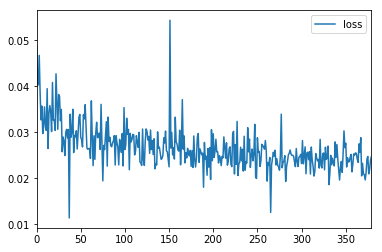

In [12]:
import pandas as pd
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()


In [13]:
predicted = np.zeros_like(dataset.test_dataset.data)
# dataset.test_dataset.part = 'all'
for item_id in xrange(dataset.test_dataset.data.shape[1]):
    sample = Variable(torch.from_numpy(dataset.test_dataset.test[:,item_id]))
    output = net(sample)
#     print(type(test_input['id']))
    predicted[:,item_id] = output.data.numpy()


In [60]:
np.sum(predicted - dataset.test_dataset.data)

-20695.643

### rec on ae outputm (cv0)

In [14]:
import rec 
reload(rec)
r = rec.Rec(topk = 5)
r.fit(dataset.train_dataset.train.T)
t = predicted.T
r.predict( t,dataset.test_dataset.targets)
r.evaluate(dataset.test_dataset.test)

(0.44205298013245031, 0.039804802935065789)

### rec on AE output

* before relu

In [ ]:
net.

In [116]:
dataset.train_dataset.train?
predicted?

### hidden = 1000

In [15]:
input_size = 6040
hidden_size = 1000
output_size = 6040
num_epochs = 20
learning_rate = 0.001

net = Net(input_size, hidden_size, output_size)
loss_history = list()

earning_rate = 0.001

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(dataset.train_loader):
        sample = Variable(sample_batched['sample'])
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
        loss.backward()
        optimizer.step()
        
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(dataset.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])



Net (
  (encoder): Linear (6040 -> 1000)
  (relu): ReLU ()
  (decoder): Linear (1000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0490
Epoch [1/20], Step [2/38], Loss: 0.0416
Epoch [1/20], Step [3/38], Loss: 0.0401
Epoch [1/20], Step [4/38], Loss: 0.0328
Epoch [1/20], Step [5/38], Loss: 0.0349
Epoch [1/20], Step [6/38], Loss: 0.0403
Epoch [1/20], Step [7/38], Loss: 0.0377
Epoch [1/20], Step [8/38], Loss: 0.0349
Epoch [1/20], Step [9/38], Loss: 0.0393
Epoch [1/20], Step [10/38], Loss: 0.0299
Epoch [1/20], Step [11/38], Loss: 0.0332
Epoch [1/20], Step [12/38], Loss: 0.0315
Epoch [1/20], Step [13/38], Loss: 0.0320
Epoch [1/20], Step [14/38], Loss: 0.0346
Epoch [1/20], Step [15/38], Loss: 0.0329
Epoch [1/20], Step [16/38], Loss: 0.0326
Epoch [1/20], Step [17/38], Loss: 0.0312
Epoch [1/20], Step [18/38], Loss: 0.0390
Epoch [1/20], Step [19/38], Loss: 0.0413
Epoch [1/20], Step [20/38], Loss: 0.0241
Epoch [1/20], Step [21/38], Loss: 0.0333
Epoch [1/20], Step [22/38], Loss: 0.0298
Epoch [1/20

Epoch [6/20], Step [11/38], Loss: 0.0224
Epoch [6/20], Step [12/38], Loss: 0.0209
Epoch [6/20], Step [13/38], Loss: 0.0236
Epoch [6/20], Step [14/38], Loss: 0.0239
Epoch [6/20], Step [15/38], Loss: 0.0208
Epoch [6/20], Step [16/38], Loss: 0.0193
Epoch [6/20], Step [17/38], Loss: 0.0276
Epoch [6/20], Step [18/38], Loss: 0.0275
Epoch [6/20], Step [19/38], Loss: 0.0216
Epoch [6/20], Step [20/38], Loss: 0.0292
Epoch [6/20], Step [21/38], Loss: 0.0226
Epoch [6/20], Step [22/38], Loss: 0.0198
Epoch [6/20], Step [23/38], Loss: 0.0180
Epoch [6/20], Step [24/38], Loss: 0.0237
Epoch [6/20], Step [25/38], Loss: 0.0237
Epoch [6/20], Step [26/38], Loss: 0.0224
Epoch [6/20], Step [27/38], Loss: 0.0230
Epoch [6/20], Step [28/38], Loss: 0.0269
Epoch [6/20], Step [29/38], Loss: 0.0189
Epoch [6/20], Step [30/38], Loss: 0.0225
Epoch [6/20], Step [31/38], Loss: 0.0221
Epoch [6/20], Step [32/38], Loss: 0.0241
Epoch [6/20], Step [33/38], Loss: 0.0249
Epoch [6/20], Step [34/38], Loss: 0.0222
Epoch [6/20], St

Epoch [11/20], Step [21/38], Loss: 0.0194
Epoch [11/20], Step [22/38], Loss: 0.0207
Epoch [11/20], Step [23/38], Loss: 0.0201
Epoch [11/20], Step [24/38], Loss: 0.0188
Epoch [11/20], Step [25/38], Loss: 0.0211
Epoch [11/20], Step [26/38], Loss: 0.0199
Epoch [11/20], Step [27/38], Loss: 0.0209
Epoch [11/20], Step [28/38], Loss: 0.0181
Epoch [11/20], Step [29/38], Loss: 0.0180
Epoch [11/20], Step [30/38], Loss: 0.0191
Epoch [11/20], Step [31/38], Loss: 0.0230
Epoch [11/20], Step [32/38], Loss: 0.0207
Epoch [11/20], Step [33/38], Loss: 0.0186
Epoch [11/20], Step [34/38], Loss: 0.0250
Epoch [11/20], Step [35/38], Loss: 0.0226
Epoch [11/20], Step [36/38], Loss: 0.0184
Epoch [11/20], Step [37/38], Loss: 0.0227
Epoch [11/20], Step [38/38], Loss: 0.0366
Epoch [12/20], Step [1/38], Loss: 0.0201
Epoch [12/20], Step [2/38], Loss: 0.0195
Epoch [12/20], Step [3/38], Loss: 0.0225
Epoch [12/20], Step [4/38], Loss: 0.0204
Epoch [12/20], Step [5/38], Loss: 0.0189
Epoch [12/20], Step [6/38], Loss: 0.021

Epoch [16/20], Step [29/38], Loss: 0.0205
Epoch [16/20], Step [30/38], Loss: 0.0205
Epoch [16/20], Step [31/38], Loss: 0.0208
Epoch [16/20], Step [32/38], Loss: 0.0198
Epoch [16/20], Step [33/38], Loss: 0.0213
Epoch [16/20], Step [34/38], Loss: 0.0186
Epoch [16/20], Step [35/38], Loss: 0.0198
Epoch [16/20], Step [36/38], Loss: 0.0201
Epoch [16/20], Step [37/38], Loss: 0.0205
Epoch [16/20], Step [38/38], Loss: 0.0052
Epoch [17/20], Step [1/38], Loss: 0.0180
Epoch [17/20], Step [2/38], Loss: 0.0192
Epoch [17/20], Step [3/38], Loss: 0.0202
Epoch [17/20], Step [4/38], Loss: 0.0169
Epoch [17/20], Step [5/38], Loss: 0.0174
Epoch [17/20], Step [6/38], Loss: 0.0188
Epoch [17/20], Step [7/38], Loss: 0.0204
Epoch [17/20], Step [8/38], Loss: 0.0182
Epoch [17/20], Step [9/38], Loss: 0.0198
Epoch [17/20], Step [10/38], Loss: 0.0163
Epoch [17/20], Step [11/38], Loss: 0.0175
Epoch [17/20], Step [12/38], Loss: 0.0189
Epoch [17/20], Step [13/38], Loss: 0.0189
Epoch [17/20], Step [14/38], Loss: 0.0195
E

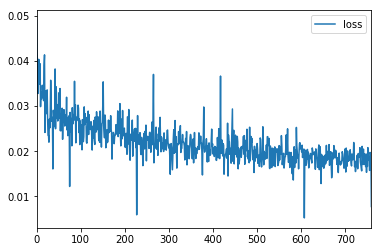

In [16]:
import pandas as pd
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()


In [17]:
predicted = np.zeros_like(dataset.test_dataset.data)
# dataset.test_dataset.part = 'all'
for item_id in xrange(dataset.test_dataset.data.shape[1]):
    sample = Variable(torch.from_numpy(dataset.test_dataset.test[:,item_id]))
    output = net(sample)
#     print(type(test_input['id']))
    predicted[:,item_id] = output.data.numpy()
import rec 
reload(rec)
r = rec.Rec(topk = 5)
r.fit(dataset.train_dataset.train.T)
t = predicted.T
r.predict( t,dataset.test_dataset.targets)
r.evaluate(dataset.test_dataset.test)

(0.67384105960264906, 0.07511547903698744)

## define function for tuning hidden layer

In [4]:
def foo(size_of_hidden):
    input_size = 6040
    hidden_size = size_of_hidden
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(dataset.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(dataset.train_loader.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    print (r.evaluate(data.test_dataset.test))

### size of hidden layer: 1000

Net (
  (encoder): Linear (6040 -> 1000)
  (relu): ReLU ()
  (decoder): Linear (1000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0410
Epoch [1/20], Step [2/38], Loss: 0.0394
Epoch [1/20], Step [3/38], Loss: 0.0411
Epoch [1/20], Step [4/38], Loss: 0.0416
Epoch [1/20], Step [5/38], Loss: 0.0330
Epoch [1/20], Step [6/38], Loss: 0.0335
Epoch [1/20], Step [7/38], Loss: 0.0284
Epoch [1/20], Step [8/38], Loss: 0.0383
Epoch [1/20], Step [9/38], Loss: 0.0305
Epoch [1/20], Step [10/38], Loss: 0.0350
Epoch [1/20], Step [11/38], Loss: 0.0329
Epoch [1/20], Step [12/38], Loss: 0.0318
Epoch [1/20], Step [13/38], Loss: 0.0356
Epoch [1/20], Step [14/38], Loss: 0.0333
Epoch [1/20], Step [15/38], Loss: 0.0287
Epoch [1/20], Step [16/38], Loss: 0.0303
Epoch [1/20], Step [17/38], Loss: 0.0296
Epoch [1/20], Step [18/38], Loss: 0.0332
Epoch [1/20], Step [19/38], Loss: 0.0292
Epoch [1/20], Step [20/38], Loss: 0.0299
Epoch [1/20], Step [21/38], Loss: 0.0273
Epoch [1/20], Step [22/38], Loss: 0.0318
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0194
Epoch [6/20], Step [11/38], Loss: 0.0245
Epoch [6/20], Step [12/38], Loss: 0.0229
Epoch [6/20], Step [13/38], Loss: 0.0233
Epoch [6/20], Step [14/38], Loss: 0.0257
Epoch [6/20], Step [15/38], Loss: 0.0208
Epoch [6/20], Step [16/38], Loss: 0.0214
Epoch [6/20], Step [17/38], Loss: 0.0267
Epoch [6/20], Step [18/38], Loss: 0.0220
Epoch [6/20], Step [19/38], Loss: 0.0229
Epoch [6/20], Step [20/38], Loss: 0.0195
Epoch [6/20], Step [21/38], Loss: 0.0259
Epoch [6/20], Step [22/38], Loss: 0.0251
Epoch [6/20], Step [23/38], Loss: 0.0239
Epoch [6/20], Step [24/38], Loss: 0.0259
Epoch [6/20], Step [25/38], Loss: 0.0279
Epoch [6/20], Step [26/38], Loss: 0.0224
Epoch [6/20], Step [27/38], Loss: 0.0232
Epoch [6/20], Step [28/38], Loss: 0.0203
Epoch [6/20], Step [29/38], Loss: 0.0271
Epoch [6/20], Step [30/38], Loss: 0.0252
Epoch [6/20], Step [31/38], Loss: 0.0243
Epoch [6/20], Step [32/38], Loss: 0.0237
Epoch [6/20], Step [33/38], Loss: 0.0179
Epoch [6/20], St

Epoch [11/20], Step [21/38], Loss: 0.0210
Epoch [11/20], Step [22/38], Loss: 0.0249
Epoch [11/20], Step [23/38], Loss: 0.0191
Epoch [11/20], Step [24/38], Loss: 0.0210
Epoch [11/20], Step [25/38], Loss: 0.0227
Epoch [11/20], Step [26/38], Loss: 0.0227
Epoch [11/20], Step [27/38], Loss: 0.0240
Epoch [11/20], Step [28/38], Loss: 0.0211
Epoch [11/20], Step [29/38], Loss: 0.0197
Epoch [11/20], Step [30/38], Loss: 0.0200
Epoch [11/20], Step [31/38], Loss: 0.0235
Epoch [11/20], Step [32/38], Loss: 0.0182
Epoch [11/20], Step [33/38], Loss: 0.0236
Epoch [11/20], Step [34/38], Loss: 0.0159
Epoch [11/20], Step [35/38], Loss: 0.0193
Epoch [11/20], Step [36/38], Loss: 0.0208
Epoch [11/20], Step [37/38], Loss: 0.0203
Epoch [11/20], Step [38/38], Loss: 0.0107
Epoch [12/20], Step [1/38], Loss: 0.0202
Epoch [12/20], Step [2/38], Loss: 0.0208
Epoch [12/20], Step [3/38], Loss: 0.0198
Epoch [12/20], Step [4/38], Loss: 0.0179
Epoch [12/20], Step [5/38], Loss: 0.0184
Epoch [12/20], Step [6/38], Loss: 0.021

Epoch [16/20], Step [29/38], Loss: 0.0219
Epoch [16/20], Step [30/38], Loss: 0.0217
Epoch [16/20], Step [31/38], Loss: 0.0194
Epoch [16/20], Step [32/38], Loss: 0.0161
Epoch [16/20], Step [33/38], Loss: 0.0132
Epoch [16/20], Step [34/38], Loss: 0.0212
Epoch [16/20], Step [35/38], Loss: 0.0202
Epoch [16/20], Step [36/38], Loss: 0.0208
Epoch [16/20], Step [37/38], Loss: 0.0267
Epoch [16/20], Step [38/38], Loss: 0.0230
Epoch [17/20], Step [1/38], Loss: 0.0191
Epoch [17/20], Step [2/38], Loss: 0.0196
Epoch [17/20], Step [3/38], Loss: 0.0190
Epoch [17/20], Step [4/38], Loss: 0.0192
Epoch [17/20], Step [5/38], Loss: 0.0165
Epoch [17/20], Step [6/38], Loss: 0.0186
Epoch [17/20], Step [7/38], Loss: 0.0177
Epoch [17/20], Step [8/38], Loss: 0.0178
Epoch [17/20], Step [9/38], Loss: 0.0183
Epoch [17/20], Step [10/38], Loss: 0.0204
Epoch [17/20], Step [11/38], Loss: 0.0207
Epoch [17/20], Step [12/38], Loss: 0.0185
Epoch [17/20], Step [13/38], Loss: 0.0191
Epoch [17/20], Step [14/38], Loss: 0.0182
E

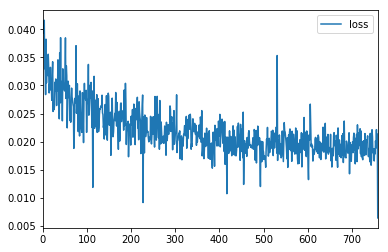

In [19]:
foo(1000)

### size of hidden layer: 250

Net (
  (encoder): Linear (6040 -> 250)
  (relu): ReLU ()
  (decoder): Linear (250 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0464
Epoch [1/20], Step [2/38], Loss: 0.0403
Epoch [1/20], Step [3/38], Loss: 0.0508
Epoch [1/20], Step [4/38], Loss: 0.0447
Epoch [1/20], Step [5/38], Loss: 0.0388
Epoch [1/20], Step [6/38], Loss: 0.0389
Epoch [1/20], Step [7/38], Loss: 0.0421
Epoch [1/20], Step [8/38], Loss: 0.0413
Epoch [1/20], Step [9/38], Loss: 0.0428
Epoch [1/20], Step [10/38], Loss: 0.0347
Epoch [1/20], Step [11/38], Loss: 0.0406
Epoch [1/20], Step [12/38], Loss: 0.0505
Epoch [1/20], Step [13/38], Loss: 0.0410
Epoch [1/20], Step [14/38], Loss: 0.0335
Epoch [1/20], Step [15/38], Loss: 0.0429
Epoch [1/20], Step [16/38], Loss: 0.0331
Epoch [1/20], Step [17/38], Loss: 0.0468
Epoch [1/20], Step [18/38], Loss: 0.0340
Epoch [1/20], Step [19/38], Loss: 0.0373
Epoch [1/20], Step [20/38], Loss: 0.0340
Epoch [1/20], Step [21/38], Loss: 0.0383
Epoch [1/20], Step [22/38], Loss: 0.0346
Epoch [1/20],

Epoch [6/20], Step [11/38], Loss: 0.0208
Epoch [6/20], Step [12/38], Loss: 0.0246
Epoch [6/20], Step [13/38], Loss: 0.0255
Epoch [6/20], Step [14/38], Loss: 0.0320
Epoch [6/20], Step [15/38], Loss: 0.0267
Epoch [6/20], Step [16/38], Loss: 0.0330
Epoch [6/20], Step [17/38], Loss: 0.0299
Epoch [6/20], Step [18/38], Loss: 0.0270
Epoch [6/20], Step [19/38], Loss: 0.0246
Epoch [6/20], Step [20/38], Loss: 0.0266
Epoch [6/20], Step [21/38], Loss: 0.0285
Epoch [6/20], Step [22/38], Loss: 0.0299
Epoch [6/20], Step [23/38], Loss: 0.0271
Epoch [6/20], Step [24/38], Loss: 0.0330
Epoch [6/20], Step [25/38], Loss: 0.0319
Epoch [6/20], Step [26/38], Loss: 0.0283
Epoch [6/20], Step [27/38], Loss: 0.0309
Epoch [6/20], Step [28/38], Loss: 0.0255
Epoch [6/20], Step [29/38], Loss: 0.0226
Epoch [6/20], Step [30/38], Loss: 0.0220
Epoch [6/20], Step [31/38], Loss: 0.0227
Epoch [6/20], Step [32/38], Loss: 0.0296
Epoch [6/20], Step [33/38], Loss: 0.0239
Epoch [6/20], Step [34/38], Loss: 0.0285
Epoch [6/20], St

Epoch [11/20], Step [22/38], Loss: 0.0254
Epoch [11/20], Step [23/38], Loss: 0.0204
Epoch [11/20], Step [24/38], Loss: 0.0256
Epoch [11/20], Step [25/38], Loss: 0.0234
Epoch [11/20], Step [26/38], Loss: 0.0244
Epoch [11/20], Step [27/38], Loss: 0.0257
Epoch [11/20], Step [28/38], Loss: 0.0205
Epoch [11/20], Step [29/38], Loss: 0.0217
Epoch [11/20], Step [30/38], Loss: 0.0281
Epoch [11/20], Step [31/38], Loss: 0.0236
Epoch [11/20], Step [32/38], Loss: 0.0299
Epoch [11/20], Step [33/38], Loss: 0.0259
Epoch [11/20], Step [34/38], Loss: 0.0282
Epoch [11/20], Step [35/38], Loss: 0.0288
Epoch [11/20], Step [36/38], Loss: 0.0252
Epoch [11/20], Step [37/38], Loss: 0.0275
Epoch [11/20], Step [38/38], Loss: 0.0255
Epoch [12/20], Step [1/38], Loss: 0.0279
Epoch [12/20], Step [2/38], Loss: 0.0241
Epoch [12/20], Step [3/38], Loss: 0.0253
Epoch [12/20], Step [4/38], Loss: 0.0236
Epoch [12/20], Step [5/38], Loss: 0.0254
Epoch [12/20], Step [6/38], Loss: 0.0272
Epoch [12/20], Step [7/38], Loss: 0.0241

Epoch [16/20], Step [31/38], Loss: 0.0280
Epoch [16/20], Step [32/38], Loss: 0.0211
Epoch [16/20], Step [33/38], Loss: 0.0249
Epoch [16/20], Step [34/38], Loss: 0.0236
Epoch [16/20], Step [35/38], Loss: 0.0241
Epoch [16/20], Step [36/38], Loss: 0.0270
Epoch [16/20], Step [37/38], Loss: 0.0222
Epoch [16/20], Step [38/38], Loss: 0.0253
Epoch [17/20], Step [1/38], Loss: 0.0245
Epoch [17/20], Step [2/38], Loss: 0.0279
Epoch [17/20], Step [3/38], Loss: 0.0246
Epoch [17/20], Step [4/38], Loss: 0.0291
Epoch [17/20], Step [5/38], Loss: 0.0243
Epoch [17/20], Step [6/38], Loss: 0.0222
Epoch [17/20], Step [7/38], Loss: 0.0247
Epoch [17/20], Step [8/38], Loss: 0.0269
Epoch [17/20], Step [9/38], Loss: 0.0245
Epoch [17/20], Step [10/38], Loss: 0.0235
Epoch [17/20], Step [11/38], Loss: 0.0263
Epoch [17/20], Step [12/38], Loss: 0.0295
Epoch [17/20], Step [13/38], Loss: 0.0237
Epoch [17/20], Step [14/38], Loss: 0.0270
Epoch [17/20], Step [15/38], Loss: 0.0236
Epoch [17/20], Step [16/38], Loss: 0.0332
E

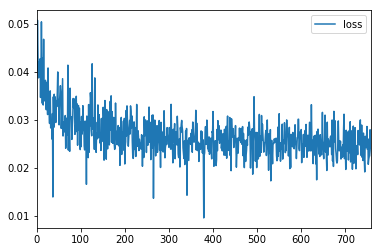

In [20]:
foo(250)

### size of hidden = 500

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0452
Epoch [1/20], Step [2/38], Loss: 0.0413
Epoch [1/20], Step [3/38], Loss: 0.0404
Epoch [1/20], Step [4/38], Loss: 0.0307
Epoch [1/20], Step [5/38], Loss: 0.0375
Epoch [1/20], Step [6/38], Loss: 0.0341
Epoch [1/20], Step [7/38], Loss: 0.0435
Epoch [1/20], Step [8/38], Loss: 0.0380
Epoch [1/20], Step [9/38], Loss: 0.0379
Epoch [1/20], Step [10/38], Loss: 0.0306
Epoch [1/20], Step [11/38], Loss: 0.0286
Epoch [1/20], Step [12/38], Loss: 0.0366
Epoch [1/20], Step [13/38], Loss: 0.0329
Epoch [1/20], Step [14/38], Loss: 0.0324
Epoch [1/20], Step [15/38], Loss: 0.0269
Epoch [1/20], Step [16/38], Loss: 0.0290
Epoch [1/20], Step [17/38], Loss: 0.0405
Epoch [1/20], Step [18/38], Loss: 0.0344
Epoch [1/20], Step [19/38], Loss: 0.0374
Epoch [1/20], Step [20/38], Loss: 0.0315
Epoch [1/20], Step [21/38], Loss: 0.0312
Epoch [1/20], Step [22/38], Loss: 0.0352
Epoch [1/20],

Epoch [6/20], Step [10/38], Loss: 0.0258
Epoch [6/20], Step [11/38], Loss: 0.0266
Epoch [6/20], Step [12/38], Loss: 0.0212
Epoch [6/20], Step [13/38], Loss: 0.0272
Epoch [6/20], Step [14/38], Loss: 0.0231
Epoch [6/20], Step [15/38], Loss: 0.0223
Epoch [6/20], Step [16/38], Loss: 0.0233
Epoch [6/20], Step [17/38], Loss: 0.0302
Epoch [6/20], Step [18/38], Loss: 0.0277
Epoch [6/20], Step [19/38], Loss: 0.0203
Epoch [6/20], Step [20/38], Loss: 0.0268
Epoch [6/20], Step [21/38], Loss: 0.0220
Epoch [6/20], Step [22/38], Loss: 0.0237
Epoch [6/20], Step [23/38], Loss: 0.0269
Epoch [6/20], Step [24/38], Loss: 0.0248
Epoch [6/20], Step [25/38], Loss: 0.0233
Epoch [6/20], Step [26/38], Loss: 0.0271
Epoch [6/20], Step [27/38], Loss: 0.0307
Epoch [6/20], Step [28/38], Loss: 0.0209
Epoch [6/20], Step [29/38], Loss: 0.0237
Epoch [6/20], Step [30/38], Loss: 0.0271
Epoch [6/20], Step [31/38], Loss: 0.0284
Epoch [6/20], Step [32/38], Loss: 0.0223
Epoch [6/20], Step [33/38], Loss: 0.0265
Epoch [6/20], St

Epoch [11/20], Step [22/38], Loss: 0.0234
Epoch [11/20], Step [23/38], Loss: 0.0250
Epoch [11/20], Step [24/38], Loss: 0.0227
Epoch [11/20], Step [25/38], Loss: 0.0233
Epoch [11/20], Step [26/38], Loss: 0.0212
Epoch [11/20], Step [27/38], Loss: 0.0211
Epoch [11/20], Step [28/38], Loss: 0.0212
Epoch [11/20], Step [29/38], Loss: 0.0266
Epoch [11/20], Step [30/38], Loss: 0.0214
Epoch [11/20], Step [31/38], Loss: 0.0236
Epoch [11/20], Step [32/38], Loss: 0.0215
Epoch [11/20], Step [33/38], Loss: 0.0254
Epoch [11/20], Step [34/38], Loss: 0.0223
Epoch [11/20], Step [35/38], Loss: 0.0216
Epoch [11/20], Step [36/38], Loss: 0.0270
Epoch [11/20], Step [37/38], Loss: 0.0252
Epoch [11/20], Step [38/38], Loss: 0.0357
Epoch [12/20], Step [1/38], Loss: 0.0207
Epoch [12/20], Step [2/38], Loss: 0.0210
Epoch [12/20], Step [3/38], Loss: 0.0253
Epoch [12/20], Step [4/38], Loss: 0.0230
Epoch [12/20], Step [5/38], Loss: 0.0235
Epoch [12/20], Step [6/38], Loss: 0.0235
Epoch [12/20], Step [7/38], Loss: 0.0216

Epoch [16/20], Step [31/38], Loss: 0.0213
Epoch [16/20], Step [32/38], Loss: 0.0214
Epoch [16/20], Step [33/38], Loss: 0.0274
Epoch [16/20], Step [34/38], Loss: 0.0201
Epoch [16/20], Step [35/38], Loss: 0.0242
Epoch [16/20], Step [36/38], Loss: 0.0228
Epoch [16/20], Step [37/38], Loss: 0.0236
Epoch [16/20], Step [38/38], Loss: 0.0240
Epoch [17/20], Step [1/38], Loss: 0.0188
Epoch [17/20], Step [2/38], Loss: 0.0197
Epoch [17/20], Step [3/38], Loss: 0.0247
Epoch [17/20], Step [4/38], Loss: 0.0240
Epoch [17/20], Step [5/38], Loss: 0.0276
Epoch [17/20], Step [6/38], Loss: 0.0224
Epoch [17/20], Step [7/38], Loss: 0.0191
Epoch [17/20], Step [8/38], Loss: 0.0235
Epoch [17/20], Step [9/38], Loss: 0.0198
Epoch [17/20], Step [10/38], Loss: 0.0194
Epoch [17/20], Step [11/38], Loss: 0.0217
Epoch [17/20], Step [12/38], Loss: 0.0193
Epoch [17/20], Step [13/38], Loss: 0.0230
Epoch [17/20], Step [14/38], Loss: 0.0253
Epoch [17/20], Step [15/38], Loss: 0.0239
Epoch [17/20], Step [16/38], Loss: 0.0203
E

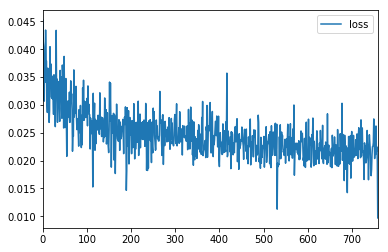

In [21]:
foo(500)

### size of hidden: 1500

Net (
  (encoder): Linear (6040 -> 1500)
  (relu): ReLU ()
  (decoder): Linear (1500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0503
Epoch [1/20], Step [2/38], Loss: 0.0361
Epoch [1/20], Step [3/38], Loss: 0.0295
Epoch [1/20], Step [4/38], Loss: 0.0292
Epoch [1/20], Step [5/38], Loss: 0.0339
Epoch [1/20], Step [6/38], Loss: 0.0283
Epoch [1/20], Step [7/38], Loss: 0.0328
Epoch [1/20], Step [8/38], Loss: 0.0337
Epoch [1/20], Step [9/38], Loss: 0.0365
Epoch [1/20], Step [10/38], Loss: 0.0286
Epoch [1/20], Step [11/38], Loss: 0.0247
Epoch [1/20], Step [12/38], Loss: 0.0308
Epoch [1/20], Step [13/38], Loss: 0.0267
Epoch [1/20], Step [14/38], Loss: 0.0371
Epoch [1/20], Step [15/38], Loss: 0.0341
Epoch [1/20], Step [16/38], Loss: 0.0347
Epoch [1/20], Step [17/38], Loss: 0.0323
Epoch [1/20], Step [18/38], Loss: 0.0311
Epoch [1/20], Step [19/38], Loss: 0.0303
Epoch [1/20], Step [20/38], Loss: 0.0306
Epoch [1/20], Step [21/38], Loss: 0.0328
Epoch [1/20], Step [22/38], Loss: 0.0292
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0192
Epoch [6/20], Step [11/38], Loss: 0.0205
Epoch [6/20], Step [12/38], Loss: 0.0202
Epoch [6/20], Step [13/38], Loss: 0.0200
Epoch [6/20], Step [14/38], Loss: 0.0219
Epoch [6/20], Step [15/38], Loss: 0.0207
Epoch [6/20], Step [16/38], Loss: 0.0205
Epoch [6/20], Step [17/38], Loss: 0.0211
Epoch [6/20], Step [18/38], Loss: 0.0194
Epoch [6/20], Step [19/38], Loss: 0.0234
Epoch [6/20], Step [20/38], Loss: 0.0234
Epoch [6/20], Step [21/38], Loss: 0.0277
Epoch [6/20], Step [22/38], Loss: 0.0188
Epoch [6/20], Step [23/38], Loss: 0.0193
Epoch [6/20], Step [24/38], Loss: 0.0224
Epoch [6/20], Step [25/38], Loss: 0.0246
Epoch [6/20], Step [26/38], Loss: 0.0240
Epoch [6/20], Step [27/38], Loss: 0.0249
Epoch [6/20], Step [28/38], Loss: 0.0207
Epoch [6/20], Step [29/38], Loss: 0.0173
Epoch [6/20], Step [30/38], Loss: 0.0240
Epoch [6/20], Step [31/38], Loss: 0.0194
Epoch [6/20], Step [32/38], Loss: 0.0240
Epoch [6/20], Step [33/38], Loss: 0.0183
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0196
Epoch [11/20], Step [21/38], Loss: 0.0207
Epoch [11/20], Step [22/38], Loss: 0.0194
Epoch [11/20], Step [23/38], Loss: 0.0196
Epoch [11/20], Step [24/38], Loss: 0.0193
Epoch [11/20], Step [25/38], Loss: 0.0190
Epoch [11/20], Step [26/38], Loss: 0.0168
Epoch [11/20], Step [27/38], Loss: 0.0213
Epoch [11/20], Step [28/38], Loss: 0.0208
Epoch [11/20], Step [29/38], Loss: 0.0181
Epoch [11/20], Step [30/38], Loss: 0.0188
Epoch [11/20], Step [31/38], Loss: 0.0190
Epoch [11/20], Step [32/38], Loss: 0.0200
Epoch [11/20], Step [33/38], Loss: 0.0176
Epoch [11/20], Step [34/38], Loss: 0.0197
Epoch [11/20], Step [35/38], Loss: 0.0204
Epoch [11/20], Step [36/38], Loss: 0.0228
Epoch [11/20], Step [37/38], Loss: 0.0186
Epoch [11/20], Step [38/38], Loss: 0.0183
Epoch [12/20], Step [1/38], Loss: 0.0181
Epoch [12/20], Step [2/38], Loss: 0.0175
Epoch [12/20], Step [3/38], Loss: 0.0148
Epoch [12/20], Step [4/38], Loss: 0.0185
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0164
Epoch [16/20], Step [28/38], Loss: 0.0177
Epoch [16/20], Step [29/38], Loss: 0.0163
Epoch [16/20], Step [30/38], Loss: 0.0223
Epoch [16/20], Step [31/38], Loss: 0.0188
Epoch [16/20], Step [32/38], Loss: 0.0164
Epoch [16/20], Step [33/38], Loss: 0.0205
Epoch [16/20], Step [34/38], Loss: 0.0146
Epoch [16/20], Step [35/38], Loss: 0.0165
Epoch [16/20], Step [36/38], Loss: 0.0199
Epoch [16/20], Step [37/38], Loss: 0.0177
Epoch [16/20], Step [38/38], Loss: 0.0208
Epoch [17/20], Step [1/38], Loss: 0.0176
Epoch [17/20], Step [2/38], Loss: 0.0187
Epoch [17/20], Step [3/38], Loss: 0.0178
Epoch [17/20], Step [4/38], Loss: 0.0163
Epoch [17/20], Step [5/38], Loss: 0.0197
Epoch [17/20], Step [6/38], Loss: 0.0164
Epoch [17/20], Step [7/38], Loss: 0.0176
Epoch [17/20], Step [8/38], Loss: 0.0179
Epoch [17/20], Step [9/38], Loss: 0.0205
Epoch [17/20], Step [10/38], Loss: 0.0195
Epoch [17/20], Step [11/38], Loss: 0.0137
Epoch [17/20], Step [12/38], Loss: 0.0192
E

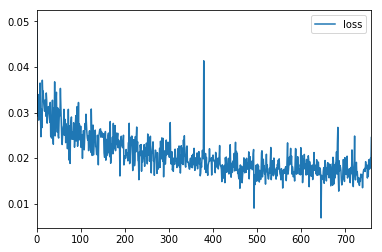

In [22]:
foo(1500)

### size of hidden: 2000

Net (
  (encoder): Linear (6040 -> 2000)
  (relu): ReLU ()
  (decoder): Linear (2000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0369
Epoch [1/20], Step [2/38], Loss: 0.0317
Epoch [1/20], Step [3/38], Loss: 0.0316
Epoch [1/20], Step [4/38], Loss: 0.0310
Epoch [1/20], Step [5/38], Loss: 0.0265
Epoch [1/20], Step [6/38], Loss: 0.0353
Epoch [1/20], Step [7/38], Loss: 0.0295
Epoch [1/20], Step [8/38], Loss: 0.0371
Epoch [1/20], Step [9/38], Loss: 0.0356
Epoch [1/20], Step [10/38], Loss: 0.0283
Epoch [1/20], Step [11/38], Loss: 0.0341
Epoch [1/20], Step [12/38], Loss: 0.0316
Epoch [1/20], Step [13/38], Loss: 0.0314
Epoch [1/20], Step [14/38], Loss: 0.0281
Epoch [1/20], Step [15/38], Loss: 0.0372
Epoch [1/20], Step [16/38], Loss: 0.0326
Epoch [1/20], Step [17/38], Loss: 0.0281
Epoch [1/20], Step [18/38], Loss: 0.0283
Epoch [1/20], Step [19/38], Loss: 0.0281
Epoch [1/20], Step [20/38], Loss: 0.0391
Epoch [1/20], Step [21/38], Loss: 0.0313
Epoch [1/20], Step [22/38], Loss: 0.0330
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0216
Epoch [6/20], Step [11/38], Loss: 0.0215
Epoch [6/20], Step [12/38], Loss: 0.0196
Epoch [6/20], Step [13/38], Loss: 0.0182
Epoch [6/20], Step [14/38], Loss: 0.0215
Epoch [6/20], Step [15/38], Loss: 0.0221
Epoch [6/20], Step [16/38], Loss: 0.0221
Epoch [6/20], Step [17/38], Loss: 0.0200
Epoch [6/20], Step [18/38], Loss: 0.0192
Epoch [6/20], Step [19/38], Loss: 0.0191
Epoch [6/20], Step [20/38], Loss: 0.0209
Epoch [6/20], Step [21/38], Loss: 0.0211
Epoch [6/20], Step [22/38], Loss: 0.0190
Epoch [6/20], Step [23/38], Loss: 0.0182
Epoch [6/20], Step [24/38], Loss: 0.0208
Epoch [6/20], Step [25/38], Loss: 0.0196
Epoch [6/20], Step [26/38], Loss: 0.0235
Epoch [6/20], Step [27/38], Loss: 0.0194
Epoch [6/20], Step [28/38], Loss: 0.0237
Epoch [6/20], Step [29/38], Loss: 0.0196
Epoch [6/20], Step [30/38], Loss: 0.0190
Epoch [6/20], Step [31/38], Loss: 0.0221
Epoch [6/20], Step [32/38], Loss: 0.0172
Epoch [6/20], Step [33/38], Loss: 0.0228
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0175
Epoch [11/20], Step [21/38], Loss: 0.0127
Epoch [11/20], Step [22/38], Loss: 0.0194
Epoch [11/20], Step [23/38], Loss: 0.0177
Epoch [11/20], Step [24/38], Loss: 0.0157
Epoch [11/20], Step [25/38], Loss: 0.0144
Epoch [11/20], Step [26/38], Loss: 0.0164
Epoch [11/20], Step [27/38], Loss: 0.0173
Epoch [11/20], Step [28/38], Loss: 0.0153
Epoch [11/20], Step [29/38], Loss: 0.0170
Epoch [11/20], Step [30/38], Loss: 0.0176
Epoch [11/20], Step [31/38], Loss: 0.0154
Epoch [11/20], Step [32/38], Loss: 0.0160
Epoch [11/20], Step [33/38], Loss: 0.0162
Epoch [11/20], Step [34/38], Loss: 0.0177
Epoch [11/20], Step [35/38], Loss: 0.0176
Epoch [11/20], Step [36/38], Loss: 0.0208
Epoch [11/20], Step [37/38], Loss: 0.0155
Epoch [11/20], Step [38/38], Loss: 0.0295
Epoch [12/20], Step [1/38], Loss: 0.0146
Epoch [12/20], Step [2/38], Loss: 0.0155
Epoch [12/20], Step [3/38], Loss: 0.0160
Epoch [12/20], Step [4/38], Loss: 0.0156
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0139
Epoch [16/20], Step [28/38], Loss: 0.0129
Epoch [16/20], Step [29/38], Loss: 0.0146
Epoch [16/20], Step [30/38], Loss: 0.0149
Epoch [16/20], Step [31/38], Loss: 0.0157
Epoch [16/20], Step [32/38], Loss: 0.0167
Epoch [16/20], Step [33/38], Loss: 0.0155
Epoch [16/20], Step [34/38], Loss: 0.0148
Epoch [16/20], Step [35/38], Loss: 0.0143
Epoch [16/20], Step [36/38], Loss: 0.0141
Epoch [16/20], Step [37/38], Loss: 0.0183
Epoch [16/20], Step [38/38], Loss: 0.0196
Epoch [17/20], Step [1/38], Loss: 0.0110
Epoch [17/20], Step [2/38], Loss: 0.0116
Epoch [17/20], Step [3/38], Loss: 0.0134
Epoch [17/20], Step [4/38], Loss: 0.0132
Epoch [17/20], Step [5/38], Loss: 0.0114
Epoch [17/20], Step [6/38], Loss: 0.0128
Epoch [17/20], Step [7/38], Loss: 0.0130
Epoch [17/20], Step [8/38], Loss: 0.0146
Epoch [17/20], Step [9/38], Loss: 0.0152
Epoch [17/20], Step [10/38], Loss: 0.0135
Epoch [17/20], Step [11/38], Loss: 0.0129
Epoch [17/20], Step [12/38], Loss: 0.0125
E

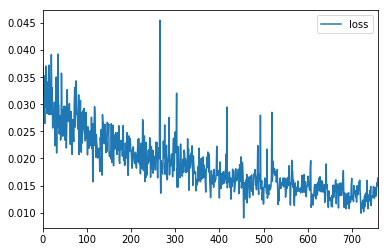

In [25]:
foo(2000)

### size of hidden: 3000

Net (
  (encoder): Linear (6040 -> 3000)
  (relu): ReLU ()
  (decoder): Linear (3000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0460
Epoch [1/20], Step [2/38], Loss: 0.0402
Epoch [1/20], Step [3/38], Loss: 0.0377
Epoch [1/20], Step [4/38], Loss: 0.0271
Epoch [1/20], Step [5/38], Loss: 0.0386
Epoch [1/20], Step [6/38], Loss: 0.0340
Epoch [1/20], Step [7/38], Loss: 0.0335
Epoch [1/20], Step [8/38], Loss: 0.0235
Epoch [1/20], Step [9/38], Loss: 0.0325
Epoch [1/20], Step [10/38], Loss: 0.0275
Epoch [1/20], Step [11/38], Loss: 0.0263
Epoch [1/20], Step [12/38], Loss: 0.0337
Epoch [1/20], Step [13/38], Loss: 0.0277
Epoch [1/20], Step [14/38], Loss: 0.0252
Epoch [1/20], Step [15/38], Loss: 0.0255
Epoch [1/20], Step [16/38], Loss: 0.0328
Epoch [1/20], Step [17/38], Loss: 0.0373
Epoch [1/20], Step [18/38], Loss: 0.0247
Epoch [1/20], Step [19/38], Loss: 0.0321
Epoch [1/20], Step [20/38], Loss: 0.0316
Epoch [1/20], Step [21/38], Loss: 0.0262
Epoch [1/20], Step [22/38], Loss: 0.0316
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0196
Epoch [6/20], Step [11/38], Loss: 0.0228
Epoch [6/20], Step [12/38], Loss: 0.0208
Epoch [6/20], Step [13/38], Loss: 0.0202
Epoch [6/20], Step [14/38], Loss: 0.0199
Epoch [6/20], Step [15/38], Loss: 0.0278
Epoch [6/20], Step [16/38], Loss: 0.0214
Epoch [6/20], Step [17/38], Loss: 0.0238
Epoch [6/20], Step [18/38], Loss: 0.0190
Epoch [6/20], Step [19/38], Loss: 0.0198
Epoch [6/20], Step [20/38], Loss: 0.0229
Epoch [6/20], Step [21/38], Loss: 0.0204
Epoch [6/20], Step [22/38], Loss: 0.0199
Epoch [6/20], Step [23/38], Loss: 0.0240
Epoch [6/20], Step [24/38], Loss: 0.0234
Epoch [6/20], Step [25/38], Loss: 0.0196
Epoch [6/20], Step [26/38], Loss: 0.0170
Epoch [6/20], Step [27/38], Loss: 0.0200
Epoch [6/20], Step [28/38], Loss: 0.0209
Epoch [6/20], Step [29/38], Loss: 0.0216
Epoch [6/20], Step [30/38], Loss: 0.0162
Epoch [6/20], Step [31/38], Loss: 0.0214
Epoch [6/20], Step [32/38], Loss: 0.0229
Epoch [6/20], Step [33/38], Loss: 0.0186
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0179
Epoch [11/20], Step [21/38], Loss: 0.0144
Epoch [11/20], Step [22/38], Loss: 0.0168
Epoch [11/20], Step [23/38], Loss: 0.0152
Epoch [11/20], Step [24/38], Loss: 0.0156
Epoch [11/20], Step [25/38], Loss: 0.0148
Epoch [11/20], Step [26/38], Loss: 0.0198
Epoch [11/20], Step [27/38], Loss: 0.0191
Epoch [11/20], Step [28/38], Loss: 0.0160
Epoch [11/20], Step [29/38], Loss: 0.0166
Epoch [11/20], Step [30/38], Loss: 0.0170
Epoch [11/20], Step [31/38], Loss: 0.0188
Epoch [11/20], Step [32/38], Loss: 0.0181
Epoch [11/20], Step [33/38], Loss: 0.0187
Epoch [11/20], Step [34/38], Loss: 0.0189
Epoch [11/20], Step [35/38], Loss: 0.0170
Epoch [11/20], Step [36/38], Loss: 0.0186
Epoch [11/20], Step [37/38], Loss: 0.0164
Epoch [11/20], Step [38/38], Loss: 0.0150
Epoch [12/20], Step [1/38], Loss: 0.0136
Epoch [12/20], Step [2/38], Loss: 0.0156
Epoch [12/20], Step [3/38], Loss: 0.0143
Epoch [12/20], Step [4/38], Loss: 0.0146
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0161
Epoch [16/20], Step [28/38], Loss: 0.0155
Epoch [16/20], Step [29/38], Loss: 0.0153
Epoch [16/20], Step [30/38], Loss: 0.0154
Epoch [16/20], Step [31/38], Loss: 0.0177
Epoch [16/20], Step [32/38], Loss: 0.0166
Epoch [16/20], Step [33/38], Loss: 0.0164
Epoch [16/20], Step [34/38], Loss: 0.0143
Epoch [16/20], Step [35/38], Loss: 0.0143
Epoch [16/20], Step [36/38], Loss: 0.0159
Epoch [16/20], Step [37/38], Loss: 0.0149
Epoch [16/20], Step [38/38], Loss: 0.0202
Epoch [17/20], Step [1/38], Loss: 0.0114
Epoch [17/20], Step [2/38], Loss: 0.0146
Epoch [17/20], Step [3/38], Loss: 0.0125
Epoch [17/20], Step [4/38], Loss: 0.0164
Epoch [17/20], Step [5/38], Loss: 0.0148
Epoch [17/20], Step [6/38], Loss: 0.0147
Epoch [17/20], Step [7/38], Loss: 0.0140
Epoch [17/20], Step [8/38], Loss: 0.0148
Epoch [17/20], Step [9/38], Loss: 0.0170
Epoch [17/20], Step [10/38], Loss: 0.0179
Epoch [17/20], Step [11/38], Loss: 0.0133
Epoch [17/20], Step [12/38], Loss: 0.0142
E

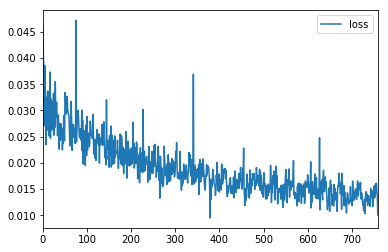

In [26]:
foo(3000)

Net (
  (encoder): Linear (6040 -> 2500)
  (relu): ReLU ()
  (decoder): Linear (2500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0487
Epoch [1/20], Step [2/38], Loss: 0.0297
Epoch [1/20], Step [3/38], Loss: 0.0339
Epoch [1/20], Step [4/38], Loss: 0.0386
Epoch [1/20], Step [5/38], Loss: 0.0338
Epoch [1/20], Step [6/38], Loss: 0.0397
Epoch [1/20], Step [7/38], Loss: 0.0285
Epoch [1/20], Step [8/38], Loss: 0.0284
Epoch [1/20], Step [9/38], Loss: 0.0337
Epoch [1/20], Step [10/38], Loss: 0.0429
Epoch [1/20], Step [11/38], Loss: 0.0266
Epoch [1/20], Step [12/38], Loss: 0.0316
Epoch [1/20], Step [13/38], Loss: 0.0268
Epoch [1/20], Step [14/38], Loss: 0.0284
Epoch [1/20], Step [15/38], Loss: 0.0302
Epoch [1/20], Step [16/38], Loss: 0.0226
Epoch [1/20], Step [17/38], Loss: 0.0320
Epoch [1/20], Step [18/38], Loss: 0.0317
Epoch [1/20], Step [19/38], Loss: 0.0261
Epoch [1/20], Step [20/38], Loss: 0.0314
Epoch [1/20], Step [21/38], Loss: 0.0301
Epoch [1/20], Step [22/38], Loss: 0.0276
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0201
Epoch [6/20], Step [11/38], Loss: 0.0185
Epoch [6/20], Step [12/38], Loss: 0.0201
Epoch [6/20], Step [13/38], Loss: 0.0180
Epoch [6/20], Step [14/38], Loss: 0.0192
Epoch [6/20], Step [15/38], Loss: 0.0194
Epoch [6/20], Step [16/38], Loss: 0.0182
Epoch [6/20], Step [17/38], Loss: 0.0193
Epoch [6/20], Step [18/38], Loss: 0.0228
Epoch [6/20], Step [19/38], Loss: 0.0236
Epoch [6/20], Step [20/38], Loss: 0.0183
Epoch [6/20], Step [21/38], Loss: 0.0241
Epoch [6/20], Step [22/38], Loss: 0.0206
Epoch [6/20], Step [23/38], Loss: 0.0199
Epoch [6/20], Step [24/38], Loss: 0.0212
Epoch [6/20], Step [25/38], Loss: 0.0222
Epoch [6/20], Step [26/38], Loss: 0.0195
Epoch [6/20], Step [27/38], Loss: 0.0204
Epoch [6/20], Step [28/38], Loss: 0.0220
Epoch [6/20], Step [29/38], Loss: 0.0219
Epoch [6/20], Step [30/38], Loss: 0.0222
Epoch [6/20], Step [31/38], Loss: 0.0231
Epoch [6/20], Step [32/38], Loss: 0.0191
Epoch [6/20], Step [33/38], Loss: 0.0204
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0146
Epoch [11/20], Step [21/38], Loss: 0.0135
Epoch [11/20], Step [22/38], Loss: 0.0187
Epoch [11/20], Step [23/38], Loss: 0.0171
Epoch [11/20], Step [24/38], Loss: 0.0158
Epoch [11/20], Step [25/38], Loss: 0.0148
Epoch [11/20], Step [26/38], Loss: 0.0168
Epoch [11/20], Step [27/38], Loss: 0.0172
Epoch [11/20], Step [28/38], Loss: 0.0185
Epoch [11/20], Step [29/38], Loss: 0.0171
Epoch [11/20], Step [30/38], Loss: 0.0165
Epoch [11/20], Step [31/38], Loss: 0.0188
Epoch [11/20], Step [32/38], Loss: 0.0128
Epoch [11/20], Step [33/38], Loss: 0.0156
Epoch [11/20], Step [34/38], Loss: 0.0181
Epoch [11/20], Step [35/38], Loss: 0.0177
Epoch [11/20], Step [36/38], Loss: 0.0176
Epoch [11/20], Step [37/38], Loss: 0.0178
Epoch [11/20], Step [38/38], Loss: 0.0056
Epoch [12/20], Step [1/38], Loss: 0.0171
Epoch [12/20], Step [2/38], Loss: 0.0145
Epoch [12/20], Step [3/38], Loss: 0.0165
Epoch [12/20], Step [4/38], Loss: 0.0151
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0131
Epoch [16/20], Step [28/38], Loss: 0.0146
Epoch [16/20], Step [29/38], Loss: 0.0151
Epoch [16/20], Step [30/38], Loss: 0.0142
Epoch [16/20], Step [31/38], Loss: 0.0145
Epoch [16/20], Step [32/38], Loss: 0.0134
Epoch [16/20], Step [33/38], Loss: 0.0158
Epoch [16/20], Step [34/38], Loss: 0.0166
Epoch [16/20], Step [35/38], Loss: 0.0158
Epoch [16/20], Step [36/38], Loss: 0.0130
Epoch [16/20], Step [37/38], Loss: 0.0178
Epoch [16/20], Step [38/38], Loss: 0.0097
Epoch [17/20], Step [1/38], Loss: 0.0149
Epoch [17/20], Step [2/38], Loss: 0.0124
Epoch [17/20], Step [3/38], Loss: 0.0126
Epoch [17/20], Step [4/38], Loss: 0.0130
Epoch [17/20], Step [5/38], Loss: 0.0124
Epoch [17/20], Step [6/38], Loss: 0.0124
Epoch [17/20], Step [7/38], Loss: 0.0149
Epoch [17/20], Step [8/38], Loss: 0.0124
Epoch [17/20], Step [9/38], Loss: 0.0128
Epoch [17/20], Step [10/38], Loss: 0.0104
Epoch [17/20], Step [11/38], Loss: 0.0123
Epoch [17/20], Step [12/38], Loss: 0.0123
E

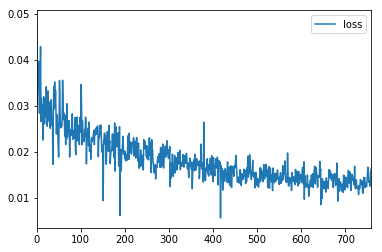

In [27]:
foo(2500)

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0430
Epoch [1/20], Step [2/38], Loss: 0.0344
Epoch [1/20], Step [3/38], Loss: 0.0325
Epoch [1/20], Step [4/38], Loss: 0.0306
Epoch [1/20], Step [5/38], Loss: 0.0389
Epoch [1/20], Step [6/38], Loss: 0.0269
Epoch [1/20], Step [7/38], Loss: 0.0340
Epoch [1/20], Step [8/38], Loss: 0.0259
Epoch [1/20], Step [9/38], Loss: 0.0328
Epoch [1/20], Step [10/38], Loss: 0.0298
Epoch [1/20], Step [11/38], Loss: 0.0334
Epoch [1/20], Step [12/38], Loss: 0.0292
Epoch [1/20], Step [13/38], Loss: 0.0296
Epoch [1/20], Step [14/38], Loss: 0.0320
Epoch [1/20], Step [15/38], Loss: 0.0284
Epoch [1/20], Step [16/38], Loss: 0.0310
Epoch [1/20], Step [17/38], Loss: 0.0313
Epoch [1/20], Step [18/38], Loss: 0.0294
Epoch [1/20], Step [19/38], Loss: 0.0235
Epoch [1/20], Step [20/38], Loss: 0.0293
Epoch [1/20], Step [21/38], Loss: 0.0401
Epoch [1/20], Step [22/38], Loss: 0.0273
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0182
Epoch [6/20], Step [11/38], Loss: 0.0203
Epoch [6/20], Step [12/38], Loss: 0.0205
Epoch [6/20], Step [13/38], Loss: 0.0192
Epoch [6/20], Step [14/38], Loss: 0.0214
Epoch [6/20], Step [15/38], Loss: 0.0208
Epoch [6/20], Step [16/38], Loss: 0.0197
Epoch [6/20], Step [17/38], Loss: 0.0192
Epoch [6/20], Step [18/38], Loss: 0.0222
Epoch [6/20], Step [19/38], Loss: 0.0240
Epoch [6/20], Step [20/38], Loss: 0.0201
Epoch [6/20], Step [21/38], Loss: 0.0220
Epoch [6/20], Step [22/38], Loss: 0.0185
Epoch [6/20], Step [23/38], Loss: 0.0219
Epoch [6/20], Step [24/38], Loss: 0.0222
Epoch [6/20], Step [25/38], Loss: 0.0209
Epoch [6/20], Step [26/38], Loss: 0.0219
Epoch [6/20], Step [27/38], Loss: 0.0215
Epoch [6/20], Step [28/38], Loss: 0.0164
Epoch [6/20], Step [29/38], Loss: 0.0229
Epoch [6/20], Step [30/38], Loss: 0.0191
Epoch [6/20], Step [31/38], Loss: 0.0228
Epoch [6/20], Step [32/38], Loss: 0.0210
Epoch [6/20], Step [33/38], Loss: 0.0198
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0160
Epoch [11/20], Step [21/38], Loss: 0.0160
Epoch [11/20], Step [22/38], Loss: 0.0152
Epoch [11/20], Step [23/38], Loss: 0.0165
Epoch [11/20], Step [24/38], Loss: 0.0150
Epoch [11/20], Step [25/38], Loss: 0.0157
Epoch [11/20], Step [26/38], Loss: 0.0150
Epoch [11/20], Step [27/38], Loss: 0.0161
Epoch [11/20], Step [28/38], Loss: 0.0133
Epoch [11/20], Step [29/38], Loss: 0.0169
Epoch [11/20], Step [30/38], Loss: 0.0153
Epoch [11/20], Step [31/38], Loss: 0.0195
Epoch [11/20], Step [32/38], Loss: 0.0174
Epoch [11/20], Step [33/38], Loss: 0.0152
Epoch [11/20], Step [34/38], Loss: 0.0183
Epoch [11/20], Step [35/38], Loss: 0.0181
Epoch [11/20], Step [36/38], Loss: 0.0180
Epoch [11/20], Step [37/38], Loss: 0.0191
Epoch [11/20], Step [38/38], Loss: 0.0073
Epoch [12/20], Step [1/38], Loss: 0.0147
Epoch [12/20], Step [2/38], Loss: 0.0155
Epoch [12/20], Step [3/38], Loss: 0.0151
Epoch [12/20], Step [4/38], Loss: 0.0123
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0153
Epoch [16/20], Step [28/38], Loss: 0.0139
Epoch [16/20], Step [29/38], Loss: 0.0134
Epoch [16/20], Step [30/38], Loss: 0.0122
Epoch [16/20], Step [31/38], Loss: 0.0152
Epoch [16/20], Step [32/38], Loss: 0.0130
Epoch [16/20], Step [33/38], Loss: 0.0127
Epoch [16/20], Step [34/38], Loss: 0.0123
Epoch [16/20], Step [35/38], Loss: 0.0143
Epoch [16/20], Step [36/38], Loss: 0.0147
Epoch [16/20], Step [37/38], Loss: 0.0150
Epoch [16/20], Step [38/38], Loss: 0.0134
Epoch [17/20], Step [1/38], Loss: 0.0114
Epoch [17/20], Step [2/38], Loss: 0.0125
Epoch [17/20], Step [3/38], Loss: 0.0128
Epoch [17/20], Step [4/38], Loss: 0.0104
Epoch [17/20], Step [5/38], Loss: 0.0133
Epoch [17/20], Step [6/38], Loss: 0.0121
Epoch [17/20], Step [7/38], Loss: 0.0139
Epoch [17/20], Step [8/38], Loss: 0.0133
Epoch [17/20], Step [9/38], Loss: 0.0134
Epoch [17/20], Step [10/38], Loss: 0.0115
Epoch [17/20], Step [11/38], Loss: 0.0131
Epoch [17/20], Step [12/38], Loss: 0.0125
E

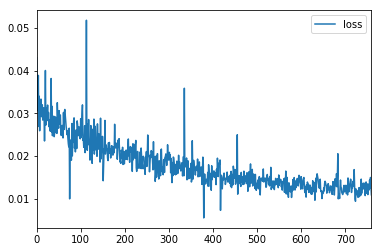

In [28]:
foo(2750)

### conclusion on cv0:
** The best is 2750 hidden neurons, perf.: (0.8252, 0.1062) **

In [31]:
%matplotlib inline
import dataset
reload(dataset)

import rec 
reload(rec)

import pandas as pd

import numpy as np

# result on 5 cv

In [56]:
def foo_5cv(size_of_hidden):
    input_size = 6040
    hidden_size = size_of_hidden
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001
#         load data
    result = dict()
    for cv in xrange(5):
        print('cv %s:'%cv)
        train_dataset,test_dataset,train_loader, test_loader = dataset.load_data(cv)

        net = Net(input_size, hidden_size, output_size)
        loss_history = list()

        earning_rate = 0.001

        certeria = nn.MSELoss()
        optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
        print(net.train())
        for epoch in xrange(num_epochs):
            for i_batch, sample_batched in enumerate(train_loader):
                sample = Variable(sample_batched['sample'])
                optimizer.zero_grad()  # zero the gradient buffer
                outputs = net(sample)
                loss = certeria(outputs, sample)
                loss.backward()
                optimizer.step()

                print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                           % (epoch + 1, num_epochs, i_batch + 1, 
                              len(dataset.train_loader) ,loss.data[0]))
                loss_history.append(loss.data[0])

        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv_%s'%cv)
        predicted = np.zeros_like(test_dataset.data)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(dataset.test_dataset.data.shape[1]):
            sample = Variable(torch.from_numpy(test_dataset.test[:,item_id]))
            output = net(sample)
        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        r = rec.Rec(topk = 5)
        r.fit(train_dataset.train.T)
        t = predicted.T
        r.predict( t, test_dataset.targets)
        r_cv =  r.evaluate( test_dataset.test)
        print (r_cv)
        print('-'*10)
        result[cv] = (r_cv, loss_df)
        
    return result

cv 0:
Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0390
Epoch [1/20], Step [2/38], Loss: 0.0400
Epoch [1/20], Step [3/38], Loss: 0.0365
Epoch [1/20], Step [4/38], Loss: 0.0424
Epoch [1/20], Step [5/38], Loss: 0.0424
Epoch [1/20], Step [6/38], Loss: 0.0309
Epoch [1/20], Step [7/38], Loss: 0.0316
Epoch [1/20], Step [8/38], Loss: 0.0313
Epoch [1/20], Step [9/38], Loss: 0.0392
Epoch [1/20], Step [10/38], Loss: 0.0311
Epoch [1/20], Step [11/38], Loss: 0.0314
Epoch [1/20], Step [12/38], Loss: 0.0257
Epoch [1/20], Step [13/38], Loss: 0.0274
Epoch [1/20], Step [14/38], Loss: 0.0355
Epoch [1/20], Step [15/38], Loss: 0.0247
Epoch [1/20], Step [16/38], Loss: 0.0337
Epoch [1/20], Step [17/38], Loss: 0.0282
Epoch [1/20], Step [18/38], Loss: 0.0304
Epoch [1/20], Step [19/38], Loss: 0.0312
Epoch [1/20], Step [20/38], Loss: 0.0276
Epoch [1/20], Step [21/38], Loss: 0.0262
Epoch [1/20], Step [22/38], Loss: 0.0263
Epoch

Epoch [6/20], Step [10/38], Loss: 0.0215
Epoch [6/20], Step [11/38], Loss: 0.0219
Epoch [6/20], Step [12/38], Loss: 0.0208
Epoch [6/20], Step [13/38], Loss: 0.0202
Epoch [6/20], Step [14/38], Loss: 0.0261
Epoch [6/20], Step [15/38], Loss: 0.0162
Epoch [6/20], Step [16/38], Loss: 0.0229
Epoch [6/20], Step [17/38], Loss: 0.0181
Epoch [6/20], Step [18/38], Loss: 0.0212
Epoch [6/20], Step [19/38], Loss: 0.0190
Epoch [6/20], Step [20/38], Loss: 0.0240
Epoch [6/20], Step [21/38], Loss: 0.0164
Epoch [6/20], Step [22/38], Loss: 0.0208
Epoch [6/20], Step [23/38], Loss: 0.0193
Epoch [6/20], Step [24/38], Loss: 0.0241
Epoch [6/20], Step [25/38], Loss: 0.0249
Epoch [6/20], Step [26/38], Loss: 0.0199
Epoch [6/20], Step [27/38], Loss: 0.0190
Epoch [6/20], Step [28/38], Loss: 0.0230
Epoch [6/20], Step [29/38], Loss: 0.0216
Epoch [6/20], Step [30/38], Loss: 0.0189
Epoch [6/20], Step [31/38], Loss: 0.0190
Epoch [6/20], Step [32/38], Loss: 0.0203
Epoch [6/20], Step [33/38], Loss: 0.0216
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0163
Epoch [11/20], Step [21/38], Loss: 0.0173
Epoch [11/20], Step [22/38], Loss: 0.0152
Epoch [11/20], Step [23/38], Loss: 0.0148
Epoch [11/20], Step [24/38], Loss: 0.0184
Epoch [11/20], Step [25/38], Loss: 0.0168
Epoch [11/20], Step [26/38], Loss: 0.0150
Epoch [11/20], Step [27/38], Loss: 0.0155
Epoch [11/20], Step [28/38], Loss: 0.0196
Epoch [11/20], Step [29/38], Loss: 0.0172
Epoch [11/20], Step [30/38], Loss: 0.0156
Epoch [11/20], Step [31/38], Loss: 0.0126
Epoch [11/20], Step [32/38], Loss: 0.0184
Epoch [11/20], Step [33/38], Loss: 0.0172
Epoch [11/20], Step [34/38], Loss: 0.0157
Epoch [11/20], Step [35/38], Loss: 0.0175
Epoch [11/20], Step [36/38], Loss: 0.0171
Epoch [11/20], Step [37/38], Loss: 0.0182
Epoch [11/20], Step [38/38], Loss: 0.0234
Epoch [12/20], Step [1/38], Loss: 0.0148
Epoch [12/20], Step [2/38], Loss: 0.0139
Epoch [12/20], Step [3/38], Loss: 0.0162
Epoch [12/20], Step [4/38], Loss: 0.0144
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0133
Epoch [16/20], Step [28/38], Loss: 0.0153
Epoch [16/20], Step [29/38], Loss: 0.0134
Epoch [16/20], Step [30/38], Loss: 0.0145
Epoch [16/20], Step [31/38], Loss: 0.0160
Epoch [16/20], Step [32/38], Loss: 0.0126
Epoch [16/20], Step [33/38], Loss: 0.0137
Epoch [16/20], Step [34/38], Loss: 0.0135
Epoch [16/20], Step [35/38], Loss: 0.0137
Epoch [16/20], Step [36/38], Loss: 0.0129
Epoch [16/20], Step [37/38], Loss: 0.0123
Epoch [16/20], Step [38/38], Loss: 0.0158
Epoch [17/20], Step [1/38], Loss: 0.0133
Epoch [17/20], Step [2/38], Loss: 0.0108
Epoch [17/20], Step [3/38], Loss: 0.0127
Epoch [17/20], Step [4/38], Loss: 0.0118
Epoch [17/20], Step [5/38], Loss: 0.0129
Epoch [17/20], Step [6/38], Loss: 0.0122
Epoch [17/20], Step [7/38], Loss: 0.0115
Epoch [17/20], Step [8/38], Loss: 0.0123
Epoch [17/20], Step [9/38], Loss: 0.0113
Epoch [17/20], Step [10/38], Loss: 0.0115
Epoch [17/20], Step [11/38], Loss: 0.0122
Epoch [17/20], Step [12/38], Loss: 0.0130
E

Epoch [1/20], Step [31/38], Loss: 0.0251
Epoch [1/20], Step [32/38], Loss: 0.0251
Epoch [1/20], Step [33/38], Loss: 0.0305
Epoch [1/20], Step [34/38], Loss: 0.0259
Epoch [1/20], Step [35/38], Loss: 0.0298
Epoch [1/20], Step [36/38], Loss: 0.0360
Epoch [1/20], Step [37/38], Loss: 0.0290
Epoch [1/20], Step [38/38], Loss: 0.0324
Epoch [2/20], Step [1/38], Loss: 0.0306
Epoch [2/20], Step [2/38], Loss: 0.0297
Epoch [2/20], Step [3/38], Loss: 0.0280
Epoch [2/20], Step [4/38], Loss: 0.0282
Epoch [2/20], Step [5/38], Loss: 0.0249
Epoch [2/20], Step [6/38], Loss: 0.0280
Epoch [2/20], Step [7/38], Loss: 0.0286
Epoch [2/20], Step [8/38], Loss: 0.0307
Epoch [2/20], Step [9/38], Loss: 0.0313
Epoch [2/20], Step [10/38], Loss: 0.0282
Epoch [2/20], Step [11/38], Loss: 0.0288
Epoch [2/20], Step [12/38], Loss: 0.0302
Epoch [2/20], Step [13/38], Loss: 0.0333
Epoch [2/20], Step [14/38], Loss: 0.0274
Epoch [2/20], Step [15/38], Loss: 0.0287
Epoch [2/20], Step [16/38], Loss: 0.0250
Epoch [2/20], Step [17/38

Epoch [7/20], Step [4/38], Loss: 0.0211
Epoch [7/20], Step [5/38], Loss: 0.0176
Epoch [7/20], Step [6/38], Loss: 0.0235
Epoch [7/20], Step [7/38], Loss: 0.0171
Epoch [7/20], Step [8/38], Loss: 0.0190
Epoch [7/20], Step [9/38], Loss: 0.0212
Epoch [7/20], Step [10/38], Loss: 0.0259
Epoch [7/20], Step [11/38], Loss: 0.0196
Epoch [7/20], Step [12/38], Loss: 0.0194
Epoch [7/20], Step [13/38], Loss: 0.0180
Epoch [7/20], Step [14/38], Loss: 0.0196
Epoch [7/20], Step [15/38], Loss: 0.0199
Epoch [7/20], Step [16/38], Loss: 0.0205
Epoch [7/20], Step [17/38], Loss: 0.0242
Epoch [7/20], Step [18/38], Loss: 0.0214
Epoch [7/20], Step [19/38], Loss: 0.0204
Epoch [7/20], Step [20/38], Loss: 0.0158
Epoch [7/20], Step [21/38], Loss: 0.0179
Epoch [7/20], Step [22/38], Loss: 0.0244
Epoch [7/20], Step [23/38], Loss: 0.0187
Epoch [7/20], Step [24/38], Loss: 0.0187
Epoch [7/20], Step [25/38], Loss: 0.0261
Epoch [7/20], Step [26/38], Loss: 0.0198
Epoch [7/20], Step [27/38], Loss: 0.0175
Epoch [7/20], Step [28

Epoch [12/20], Step [13/38], Loss: 0.0167
Epoch [12/20], Step [14/38], Loss: 0.0146
Epoch [12/20], Step [15/38], Loss: 0.0170
Epoch [12/20], Step [16/38], Loss: 0.0152
Epoch [12/20], Step [17/38], Loss: 0.0151
Epoch [12/20], Step [18/38], Loss: 0.0144
Epoch [12/20], Step [19/38], Loss: 0.0174
Epoch [12/20], Step [20/38], Loss: 0.0120
Epoch [12/20], Step [21/38], Loss: 0.0157
Epoch [12/20], Step [22/38], Loss: 0.0159
Epoch [12/20], Step [23/38], Loss: 0.0173
Epoch [12/20], Step [24/38], Loss: 0.0156
Epoch [12/20], Step [25/38], Loss: 0.0162
Epoch [12/20], Step [26/38], Loss: 0.0196
Epoch [12/20], Step [27/38], Loss: 0.0134
Epoch [12/20], Step [28/38], Loss: 0.0151
Epoch [12/20], Step [29/38], Loss: 0.0159
Epoch [12/20], Step [30/38], Loss: 0.0161
Epoch [12/20], Step [31/38], Loss: 0.0145
Epoch [12/20], Step [32/38], Loss: 0.0180
Epoch [12/20], Step [33/38], Loss: 0.0164
Epoch [12/20], Step [34/38], Loss: 0.0149
Epoch [12/20], Step [35/38], Loss: 0.0146
Epoch [12/20], Step [36/38], Loss:

Epoch [17/20], Step [20/38], Loss: 0.0136
Epoch [17/20], Step [21/38], Loss: 0.0122
Epoch [17/20], Step [22/38], Loss: 0.0144
Epoch [17/20], Step [23/38], Loss: 0.0115
Epoch [17/20], Step [24/38], Loss: 0.0141
Epoch [17/20], Step [25/38], Loss: 0.0128
Epoch [17/20], Step [26/38], Loss: 0.0127
Epoch [17/20], Step [27/38], Loss: 0.0147
Epoch [17/20], Step [28/38], Loss: 0.0151
Epoch [17/20], Step [29/38], Loss: 0.0147
Epoch [17/20], Step [30/38], Loss: 0.0139
Epoch [17/20], Step [31/38], Loss: 0.0132
Epoch [17/20], Step [32/38], Loss: 0.0143
Epoch [17/20], Step [33/38], Loss: 0.0119
Epoch [17/20], Step [34/38], Loss: 0.0145
Epoch [17/20], Step [35/38], Loss: 0.0146
Epoch [17/20], Step [36/38], Loss: 0.0114
Epoch [17/20], Step [37/38], Loss: 0.0125
Epoch [17/20], Step [38/38], Loss: 0.0137
Epoch [18/20], Step [1/38], Loss: 0.0118
Epoch [18/20], Step [2/38], Loss: 0.0121
Epoch [18/20], Step [3/38], Loss: 0.0135
Epoch [18/20], Step [4/38], Loss: 0.0144
Epoch [18/20], Step [5/38], Loss: 0.01

Epoch [2/20], Step [24/38], Loss: 0.0274
Epoch [2/20], Step [25/38], Loss: 0.0219
Epoch [2/20], Step [26/38], Loss: 0.0290
Epoch [2/20], Step [27/38], Loss: 0.0247
Epoch [2/20], Step [28/38], Loss: 0.0247
Epoch [2/20], Step [29/38], Loss: 0.0271
Epoch [2/20], Step [30/38], Loss: 0.0283
Epoch [2/20], Step [31/38], Loss: 0.0262
Epoch [2/20], Step [32/38], Loss: 0.0262
Epoch [2/20], Step [33/38], Loss: 0.0271
Epoch [2/20], Step [34/38], Loss: 0.0263
Epoch [2/20], Step [35/38], Loss: 0.0246
Epoch [2/20], Step [36/38], Loss: 0.0318
Epoch [2/20], Step [37/38], Loss: 0.0210
Epoch [2/20], Step [38/38], Loss: 0.0125
Epoch [3/20], Step [1/38], Loss: 0.0256
Epoch [3/20], Step [2/38], Loss: 0.0266
Epoch [3/20], Step [3/38], Loss: 0.0226
Epoch [3/20], Step [4/38], Loss: 0.0299
Epoch [3/20], Step [5/38], Loss: 0.0235
Epoch [3/20], Step [6/38], Loss: 0.0229
Epoch [3/20], Step [7/38], Loss: 0.0297
Epoch [3/20], Step [8/38], Loss: 0.0270
Epoch [3/20], Step [9/38], Loss: 0.0241
Epoch [3/20], Step [10/38

Epoch [7/20], Step [35/38], Loss: 0.0214
Epoch [7/20], Step [36/38], Loss: 0.0234
Epoch [7/20], Step [37/38], Loss: 0.0188
Epoch [7/20], Step [38/38], Loss: 0.0221
Epoch [8/20], Step [1/38], Loss: 0.0196
Epoch [8/20], Step [2/38], Loss: 0.0201
Epoch [8/20], Step [3/38], Loss: 0.0154
Epoch [8/20], Step [4/38], Loss: 0.0170
Epoch [8/20], Step [5/38], Loss: 0.0174
Epoch [8/20], Step [6/38], Loss: 0.0185
Epoch [8/20], Step [7/38], Loss: 0.0185
Epoch [8/20], Step [8/38], Loss: 0.0186
Epoch [8/20], Step [9/38], Loss: 0.0174
Epoch [8/20], Step [10/38], Loss: 0.0190
Epoch [8/20], Step [11/38], Loss: 0.0201
Epoch [8/20], Step [12/38], Loss: 0.0200
Epoch [8/20], Step [13/38], Loss: 0.0193
Epoch [8/20], Step [14/38], Loss: 0.0152
Epoch [8/20], Step [15/38], Loss: 0.0199
Epoch [8/20], Step [16/38], Loss: 0.0191
Epoch [8/20], Step [17/38], Loss: 0.0201
Epoch [8/20], Step [18/38], Loss: 0.0207
Epoch [8/20], Step [19/38], Loss: 0.0197
Epoch [8/20], Step [20/38], Loss: 0.0214
Epoch [8/20], Step [21/38

Epoch [13/20], Step [6/38], Loss: 0.0160
Epoch [13/20], Step [7/38], Loss: 0.0143
Epoch [13/20], Step [8/38], Loss: 0.0157
Epoch [13/20], Step [9/38], Loss: 0.0154
Epoch [13/20], Step [10/38], Loss: 0.0173
Epoch [13/20], Step [11/38], Loss: 0.0157
Epoch [13/20], Step [12/38], Loss: 0.0174
Epoch [13/20], Step [13/38], Loss: 0.0148
Epoch [13/20], Step [14/38], Loss: 0.0147
Epoch [13/20], Step [15/38], Loss: 0.0140
Epoch [13/20], Step [16/38], Loss: 0.0152
Epoch [13/20], Step [17/38], Loss: 0.0142
Epoch [13/20], Step [18/38], Loss: 0.0148
Epoch [13/20], Step [19/38], Loss: 0.0158
Epoch [13/20], Step [20/38], Loss: 0.0194
Epoch [13/20], Step [21/38], Loss: 0.0187
Epoch [13/20], Step [22/38], Loss: 0.0143
Epoch [13/20], Step [23/38], Loss: 0.0172
Epoch [13/20], Step [24/38], Loss: 0.0145
Epoch [13/20], Step [25/38], Loss: 0.0166
Epoch [13/20], Step [26/38], Loss: 0.0182
Epoch [13/20], Step [27/38], Loss: 0.0170
Epoch [13/20], Step [28/38], Loss: 0.0166
Epoch [13/20], Step [29/38], Loss: 0.0

Epoch [18/20], Step [13/38], Loss: 0.0137
Epoch [18/20], Step [14/38], Loss: 0.0132
Epoch [18/20], Step [15/38], Loss: 0.0154
Epoch [18/20], Step [16/38], Loss: 0.0133
Epoch [18/20], Step [17/38], Loss: 0.0163
Epoch [18/20], Step [18/38], Loss: 0.0158
Epoch [18/20], Step [19/38], Loss: 0.0140
Epoch [18/20], Step [20/38], Loss: 0.0167
Epoch [18/20], Step [21/38], Loss: 0.0143
Epoch [18/20], Step [22/38], Loss: 0.0141
Epoch [18/20], Step [23/38], Loss: 0.0144
Epoch [18/20], Step [24/38], Loss: 0.0146
Epoch [18/20], Step [25/38], Loss: 0.0140
Epoch [18/20], Step [26/38], Loss: 0.0121
Epoch [18/20], Step [27/38], Loss: 0.0148
Epoch [18/20], Step [28/38], Loss: 0.0157
Epoch [18/20], Step [29/38], Loss: 0.0146
Epoch [18/20], Step [30/38], Loss: 0.0144
Epoch [18/20], Step [31/38], Loss: 0.0161
Epoch [18/20], Step [32/38], Loss: 0.0156
Epoch [18/20], Step [33/38], Loss: 0.0162
Epoch [18/20], Step [34/38], Loss: 0.0144
Epoch [18/20], Step [35/38], Loss: 0.0144
Epoch [18/20], Step [36/38], Loss:

Epoch [3/20], Step [18/38], Loss: 0.0242
Epoch [3/20], Step [19/38], Loss: 0.0258
Epoch [3/20], Step [20/38], Loss: 0.0265
Epoch [3/20], Step [21/38], Loss: 0.0245
Epoch [3/20], Step [22/38], Loss: 0.0289
Epoch [3/20], Step [23/38], Loss: 0.0242
Epoch [3/20], Step [24/38], Loss: 0.0287
Epoch [3/20], Step [25/38], Loss: 0.0200
Epoch [3/20], Step [26/38], Loss: 0.0262
Epoch [3/20], Step [27/38], Loss: 0.0275
Epoch [3/20], Step [28/38], Loss: 0.0255
Epoch [3/20], Step [29/38], Loss: 0.0234
Epoch [3/20], Step [30/38], Loss: 0.0232
Epoch [3/20], Step [31/38], Loss: 0.0211
Epoch [3/20], Step [32/38], Loss: 0.0238
Epoch [3/20], Step [33/38], Loss: 0.0219
Epoch [3/20], Step [34/38], Loss: 0.0245
Epoch [3/20], Step [35/38], Loss: 0.0290
Epoch [3/20], Step [36/38], Loss: 0.0249
Epoch [3/20], Step [37/38], Loss: 0.0260
Epoch [3/20], Step [38/38], Loss: 0.0224
Epoch [4/20], Step [1/38], Loss: 0.0201
Epoch [4/20], Step [2/38], Loss: 0.0257
Epoch [4/20], Step [3/38], Loss: 0.0270
Epoch [4/20], Step 

Epoch [8/20], Step [29/38], Loss: 0.0189
Epoch [8/20], Step [30/38], Loss: 0.0184
Epoch [8/20], Step [31/38], Loss: 0.0197
Epoch [8/20], Step [32/38], Loss: 0.0189
Epoch [8/20], Step [33/38], Loss: 0.0195
Epoch [8/20], Step [34/38], Loss: 0.0166
Epoch [8/20], Step [35/38], Loss: 0.0185
Epoch [8/20], Step [36/38], Loss: 0.0198
Epoch [8/20], Step [37/38], Loss: 0.0200
Epoch [8/20], Step [38/38], Loss: 0.0242
Epoch [9/20], Step [1/38], Loss: 0.0134
Epoch [9/20], Step [2/38], Loss: 0.0168
Epoch [9/20], Step [3/38], Loss: 0.0175
Epoch [9/20], Step [4/38], Loss: 0.0160
Epoch [9/20], Step [5/38], Loss: 0.0169
Epoch [9/20], Step [6/38], Loss: 0.0168
Epoch [9/20], Step [7/38], Loss: 0.0190
Epoch [9/20], Step [8/38], Loss: 0.0178
Epoch [9/20], Step [9/38], Loss: 0.0160
Epoch [9/20], Step [10/38], Loss: 0.0169
Epoch [9/20], Step [11/38], Loss: 0.0172
Epoch [9/20], Step [12/38], Loss: 0.0150
Epoch [9/20], Step [13/38], Loss: 0.0177
Epoch [9/20], Step [14/38], Loss: 0.0187
Epoch [9/20], Step [15/38

Epoch [13/20], Step [37/38], Loss: 0.0183
Epoch [13/20], Step [38/38], Loss: 0.0059
Epoch [14/20], Step [1/38], Loss: 0.0115
Epoch [14/20], Step [2/38], Loss: 0.0147
Epoch [14/20], Step [3/38], Loss: 0.0121
Epoch [14/20], Step [4/38], Loss: 0.0140
Epoch [14/20], Step [5/38], Loss: 0.0121
Epoch [14/20], Step [6/38], Loss: 0.0137
Epoch [14/20], Step [7/38], Loss: 0.0142
Epoch [14/20], Step [8/38], Loss: 0.0142
Epoch [14/20], Step [9/38], Loss: 0.0130
Epoch [14/20], Step [10/38], Loss: 0.0128
Epoch [14/20], Step [11/38], Loss: 0.0130
Epoch [14/20], Step [12/38], Loss: 0.0143
Epoch [14/20], Step [13/38], Loss: 0.0130
Epoch [14/20], Step [14/38], Loss: 0.0144
Epoch [14/20], Step [15/38], Loss: 0.0135
Epoch [14/20], Step [16/38], Loss: 0.0139
Epoch [14/20], Step [17/38], Loss: 0.0149
Epoch [14/20], Step [18/38], Loss: 0.0132
Epoch [14/20], Step [19/38], Loss: 0.0149
Epoch [14/20], Step [20/38], Loss: 0.0152
Epoch [14/20], Step [21/38], Loss: 0.0139
Epoch [14/20], Step [22/38], Loss: 0.0119
E

Epoch [19/20], Step [6/38], Loss: 0.0141
Epoch [19/20], Step [7/38], Loss: 0.0130
Epoch [19/20], Step [8/38], Loss: 0.0133
Epoch [19/20], Step [9/38], Loss: 0.0127
Epoch [19/20], Step [10/38], Loss: 0.0107
Epoch [19/20], Step [11/38], Loss: 0.0133
Epoch [19/20], Step [12/38], Loss: 0.0116
Epoch [19/20], Step [13/38], Loss: 0.0137
Epoch [19/20], Step [14/38], Loss: 0.0119
Epoch [19/20], Step [15/38], Loss: 0.0147
Epoch [19/20], Step [16/38], Loss: 0.0127
Epoch [19/20], Step [17/38], Loss: 0.0134
Epoch [19/20], Step [18/38], Loss: 0.0129
Epoch [19/20], Step [19/38], Loss: 0.0110
Epoch [19/20], Step [20/38], Loss: 0.0130
Epoch [19/20], Step [21/38], Loss: 0.0130
Epoch [19/20], Step [22/38], Loss: 0.0136
Epoch [19/20], Step [23/38], Loss: 0.0128
Epoch [19/20], Step [24/38], Loss: 0.0130
Epoch [19/20], Step [25/38], Loss: 0.0139
Epoch [19/20], Step [26/38], Loss: 0.0139
Epoch [19/20], Step [27/38], Loss: 0.0122
Epoch [19/20], Step [28/38], Loss: 0.0132
Epoch [19/20], Step [29/38], Loss: 0.0

Epoch [4/20], Step [12/38], Loss: 0.0213
Epoch [4/20], Step [13/38], Loss: 0.0245
Epoch [4/20], Step [14/38], Loss: 0.0227
Epoch [4/20], Step [15/38], Loss: 0.0267
Epoch [4/20], Step [16/38], Loss: 0.0237
Epoch [4/20], Step [17/38], Loss: 0.0260
Epoch [4/20], Step [18/38], Loss: 0.0242
Epoch [4/20], Step [19/38], Loss: 0.0229
Epoch [4/20], Step [20/38], Loss: 0.0215
Epoch [4/20], Step [21/38], Loss: 0.0232
Epoch [4/20], Step [22/38], Loss: 0.0191
Epoch [4/20], Step [23/38], Loss: 0.0207
Epoch [4/20], Step [24/38], Loss: 0.0223
Epoch [4/20], Step [25/38], Loss: 0.0211
Epoch [4/20], Step [26/38], Loss: 0.0236
Epoch [4/20], Step [27/38], Loss: 0.0236
Epoch [4/20], Step [28/38], Loss: 0.0255
Epoch [4/20], Step [29/38], Loss: 0.0246
Epoch [4/20], Step [30/38], Loss: 0.0206
Epoch [4/20], Step [31/38], Loss: 0.0256
Epoch [4/20], Step [32/38], Loss: 0.0221
Epoch [4/20], Step [33/38], Loss: 0.0212
Epoch [4/20], Step [34/38], Loss: 0.0215
Epoch [4/20], Step [35/38], Loss: 0.0229
Epoch [4/20], St

Epoch [9/20], Step [23/38], Loss: 0.0152
Epoch [9/20], Step [24/38], Loss: 0.0181
Epoch [9/20], Step [25/38], Loss: 0.0191
Epoch [9/20], Step [26/38], Loss: 0.0181
Epoch [9/20], Step [27/38], Loss: 0.0186
Epoch [9/20], Step [28/38], Loss: 0.0206
Epoch [9/20], Step [29/38], Loss: 0.0175
Epoch [9/20], Step [30/38], Loss: 0.0182
Epoch [9/20], Step [31/38], Loss: 0.0163
Epoch [9/20], Step [32/38], Loss: 0.0170
Epoch [9/20], Step [33/38], Loss: 0.0204
Epoch [9/20], Step [34/38], Loss: 0.0145
Epoch [9/20], Step [35/38], Loss: 0.0170
Epoch [9/20], Step [36/38], Loss: 0.0176
Epoch [9/20], Step [37/38], Loss: 0.0178
Epoch [9/20], Step [38/38], Loss: 0.0164
Epoch [10/20], Step [1/38], Loss: 0.0143
Epoch [10/20], Step [2/38], Loss: 0.0150
Epoch [10/20], Step [3/38], Loss: 0.0141
Epoch [10/20], Step [4/38], Loss: 0.0181
Epoch [10/20], Step [5/38], Loss: 0.0164
Epoch [10/20], Step [6/38], Loss: 0.0171
Epoch [10/20], Step [7/38], Loss: 0.0174
Epoch [10/20], Step [8/38], Loss: 0.0169
Epoch [10/20], S

Epoch [14/20], Step [30/38], Loss: 0.0178
Epoch [14/20], Step [31/38], Loss: 0.0147
Epoch [14/20], Step [32/38], Loss: 0.0134
Epoch [14/20], Step [33/38], Loss: 0.0156
Epoch [14/20], Step [34/38], Loss: 0.0144
Epoch [14/20], Step [35/38], Loss: 0.0171
Epoch [14/20], Step [36/38], Loss: 0.0169
Epoch [14/20], Step [37/38], Loss: 0.0131
Epoch [14/20], Step [38/38], Loss: 0.0144
Epoch [15/20], Step [1/38], Loss: 0.0133
Epoch [15/20], Step [2/38], Loss: 0.0118
Epoch [15/20], Step [3/38], Loss: 0.0132
Epoch [15/20], Step [4/38], Loss: 0.0118
Epoch [15/20], Step [5/38], Loss: 0.0139
Epoch [15/20], Step [6/38], Loss: 0.0124
Epoch [15/20], Step [7/38], Loss: 0.0147
Epoch [15/20], Step [8/38], Loss: 0.0133
Epoch [15/20], Step [9/38], Loss: 0.0148
Epoch [15/20], Step [10/38], Loss: 0.0122
Epoch [15/20], Step [11/38], Loss: 0.0129
Epoch [15/20], Step [12/38], Loss: 0.0120
Epoch [15/20], Step [13/38], Loss: 0.0140
Epoch [15/20], Step [14/38], Loss: 0.0146
Epoch [15/20], Step [15/38], Loss: 0.0128
E

Epoch [19/20], Step [37/38], Loss: 0.0110
Epoch [19/20], Step [38/38], Loss: 0.0064
Epoch [20/20], Step [1/38], Loss: 0.0120
Epoch [20/20], Step [2/38], Loss: 0.0130
Epoch [20/20], Step [3/38], Loss: 0.0128
Epoch [20/20], Step [4/38], Loss: 0.0136
Epoch [20/20], Step [5/38], Loss: 0.0147
Epoch [20/20], Step [6/38], Loss: 0.0111
Epoch [20/20], Step [7/38], Loss: 0.0088
Epoch [20/20], Step [8/38], Loss: 0.0118
Epoch [20/20], Step [9/38], Loss: 0.0101
Epoch [20/20], Step [10/38], Loss: 0.0130
Epoch [20/20], Step [11/38], Loss: 0.0127
Epoch [20/20], Step [12/38], Loss: 0.0133
Epoch [20/20], Step [13/38], Loss: 0.0127
Epoch [20/20], Step [14/38], Loss: 0.0112
Epoch [20/20], Step [15/38], Loss: 0.0094
Epoch [20/20], Step [16/38], Loss: 0.0111
Epoch [20/20], Step [17/38], Loss: 0.0135
Epoch [20/20], Step [18/38], Loss: 0.0127
Epoch [20/20], Step [19/38], Loss: 0.0129
Epoch [20/20], Step [20/38], Loss: 0.0123
Epoch [20/20], Step [21/38], Loss: 0.0131
Epoch [20/20], Step [22/38], Loss: 0.0119
E

TypeError: 'numpy.float64' object is not iterable

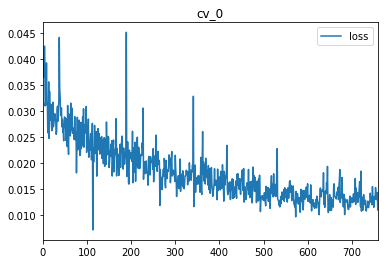

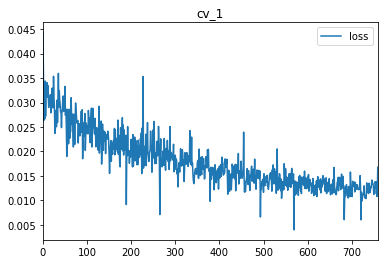

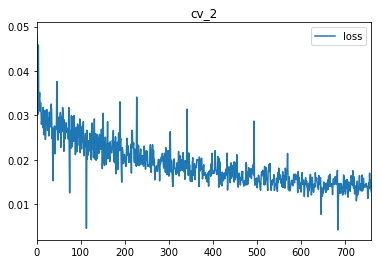

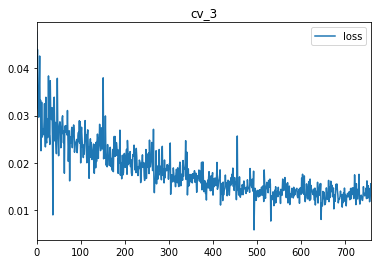

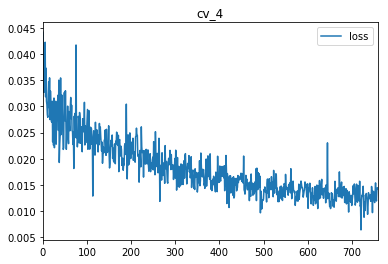

In [57]:
result_5cv = foo_5cv(2750)
# print result_5cv
for cv in xrange(5):
    print ('cv %s:'%cv, result_5cv[cv][0])
print ('avg:', np.average([i for i in result_5cv.values()[0][0][0]]), np.average([i for i in result_5cv.values()[0][0][1]]))

    ('cv 0:', (0.80927152317880791, 0.09812892185040234))
    ('cv 1:', (0.8235099337748345, 0.10185045567160639))
    ('cv 2:', (0.75827814569536423, 0.090737771457308075))
    ('cv 3:', (0.80761589403973499, 0.096932586672233145))
    ('cv 4:', (0.79867549668874172, 0.1023226744345406))


In [71]:
# np.([k[0][1] for k in result_5cv.values() ])
print ('avg:', np.average([k[0][0] for k in result_5cv.values() ]), np.average([k[0][1] for k in result_5cv.values() ]))

('avg:', 0.79947019867549662, 0.097994482017218096)


The result of rec on predictions (20 epoches) are as follow:

    ('cv 0:', (0.80927152317880791, 0.09812892185040234))
    ('cv 1:', (0.8235099337748345, 0.10185045567160639))
    ('cv 2:', (0.75827814569536423, 0.090737771457308075))
    ('cv 3:', (0.80761589403973499, 0.096932586672233145))
    ('cv 4:', (0.79867549668874172, 0.1023226744345406))
    ('avg:', 0.79947019867549662, 0.097994482017218096)

## more epoches

In the experiment above, it seems that the training is not enough

In [73]:
def foo_5cv(size_of_hidden, epochs):
    input_size = 6040
    hidden_size = size_of_hidden
    output_size = 6040
    num_epochs = epochs
    learning_rate = 0.001
#         load data
    result = dict()
    for cv in xrange(5):
        print('cv %s:'%cv)
        train_dataset,test_dataset,train_loader, test_loader = dataset.load_data(cv)

        net = Net(input_size, hidden_size, output_size)
        loss_history = list()

        earning_rate = 0.001

        certeria = nn.MSELoss()
        optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
        print(net.train())
        for epoch in xrange(num_epochs):
            for i_batch, sample_batched in enumerate(train_loader):
                sample = Variable(sample_batched['sample'])
                optimizer.zero_grad()  # zero the gradient buffer
                outputs = net(sample)
                loss = certeria(outputs, sample)
                loss.backward()
                optimizer.step()

                print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                           % (epoch + 1, num_epochs, i_batch + 1, 
                              len(dataset.train_loader) ,loss.data[0]))
                loss_history.append(loss.data[0])

        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title='cv_%s'%cv)
        predicted = np.zeros_like(test_dataset.data)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(dataset.test_dataset.data.shape[1]):
            sample = Variable(torch.from_numpy(test_dataset.test[:,item_id]))
            output = net(sample)
        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        r = rec.Rec(topk = 5)
        r.fit(train_dataset.train.T)
        t = predicted.T
        r.predict( t, test_dataset.targets)
        r_cv =  r.evaluate( test_dataset.test)
        print (r_cv)
        print('-'*10)
        result[cv] = (r_cv, loss_df)
        
    return result

### 30 epoches

cv 0:
Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0464
Epoch [1/30], Step [2/38], Loss: 0.0387
Epoch [1/30], Step [3/38], Loss: 0.0401
Epoch [1/30], Step [4/38], Loss: 0.0355
Epoch [1/30], Step [5/38], Loss: 0.0388
Epoch [1/30], Step [6/38], Loss: 0.0380
Epoch [1/30], Step [7/38], Loss: 0.0353
Epoch [1/30], Step [8/38], Loss: 0.0325
Epoch [1/30], Step [9/38], Loss: 0.0318
Epoch [1/30], Step [10/38], Loss: 0.0317
Epoch [1/30], Step [11/38], Loss: 0.0232
Epoch [1/30], Step [12/38], Loss: 0.0282
Epoch [1/30], Step [13/38], Loss: 0.0268
Epoch [1/30], Step [14/38], Loss: 0.0309
Epoch [1/30], Step [15/38], Loss: 0.0383
Epoch [1/30], Step [16/38], Loss: 0.0334
Epoch [1/30], Step [17/38], Loss: 0.0335
Epoch [1/30], Step [18/38], Loss: 0.0334
Epoch [1/30], Step [19/38], Loss: 0.0264
Epoch [1/30], Step [20/38], Loss: 0.0344
Epoch [1/30], Step [21/38], Loss: 0.0268
Epoch [1/30], Step [22/38], Loss: 0.0278
Epoch

Epoch [6/30], Step [10/38], Loss: 0.0221
Epoch [6/30], Step [11/38], Loss: 0.0227
Epoch [6/30], Step [12/38], Loss: 0.0238
Epoch [6/30], Step [13/38], Loss: 0.0190
Epoch [6/30], Step [14/38], Loss: 0.0197
Epoch [6/30], Step [15/38], Loss: 0.0234
Epoch [6/30], Step [16/38], Loss: 0.0209
Epoch [6/30], Step [17/38], Loss: 0.0213
Epoch [6/30], Step [18/38], Loss: 0.0238
Epoch [6/30], Step [19/38], Loss: 0.0237
Epoch [6/30], Step [20/38], Loss: 0.0216
Epoch [6/30], Step [21/38], Loss: 0.0198
Epoch [6/30], Step [22/38], Loss: 0.0171
Epoch [6/30], Step [23/38], Loss: 0.0222
Epoch [6/30], Step [24/38], Loss: 0.0184
Epoch [6/30], Step [25/38], Loss: 0.0215
Epoch [6/30], Step [26/38], Loss: 0.0208
Epoch [6/30], Step [27/38], Loss: 0.0179
Epoch [6/30], Step [28/38], Loss: 0.0184
Epoch [6/30], Step [29/38], Loss: 0.0184
Epoch [6/30], Step [30/38], Loss: 0.0195
Epoch [6/30], Step [31/38], Loss: 0.0207
Epoch [6/30], Step [32/38], Loss: 0.0238
Epoch [6/30], Step [33/38], Loss: 0.0219
Epoch [6/30], St

Epoch [11/30], Step [20/38], Loss: 0.0182
Epoch [11/30], Step [21/38], Loss: 0.0188
Epoch [11/30], Step [22/38], Loss: 0.0167
Epoch [11/30], Step [23/38], Loss: 0.0173
Epoch [11/30], Step [24/38], Loss: 0.0174
Epoch [11/30], Step [25/38], Loss: 0.0186
Epoch [11/30], Step [26/38], Loss: 0.0184
Epoch [11/30], Step [27/38], Loss: 0.0142
Epoch [11/30], Step [28/38], Loss: 0.0179
Epoch [11/30], Step [29/38], Loss: 0.0169
Epoch [11/30], Step [30/38], Loss: 0.0178
Epoch [11/30], Step [31/38], Loss: 0.0164
Epoch [11/30], Step [32/38], Loss: 0.0177
Epoch [11/30], Step [33/38], Loss: 0.0158
Epoch [11/30], Step [34/38], Loss: 0.0179
Epoch [11/30], Step [35/38], Loss: 0.0167
Epoch [11/30], Step [36/38], Loss: 0.0164
Epoch [11/30], Step [37/38], Loss: 0.0197
Epoch [11/30], Step [38/38], Loss: 0.0206
Epoch [12/30], Step [1/38], Loss: 0.0152
Epoch [12/30], Step [2/38], Loss: 0.0140
Epoch [12/30], Step [3/38], Loss: 0.0141
Epoch [12/30], Step [4/38], Loss: 0.0152
Epoch [12/30], Step [5/38], Loss: 0.01

Epoch [16/30], Step [27/38], Loss: 0.0144
Epoch [16/30], Step [28/38], Loss: 0.0145
Epoch [16/30], Step [29/38], Loss: 0.0169
Epoch [16/30], Step [30/38], Loss: 0.0140
Epoch [16/30], Step [31/38], Loss: 0.0129
Epoch [16/30], Step [32/38], Loss: 0.0151
Epoch [16/30], Step [33/38], Loss: 0.0174
Epoch [16/30], Step [34/38], Loss: 0.0141
Epoch [16/30], Step [35/38], Loss: 0.0150
Epoch [16/30], Step [36/38], Loss: 0.0147
Epoch [16/30], Step [37/38], Loss: 0.0159
Epoch [16/30], Step [38/38], Loss: 0.0230
Epoch [17/30], Step [1/38], Loss: 0.0135
Epoch [17/30], Step [2/38], Loss: 0.0112
Epoch [17/30], Step [3/38], Loss: 0.0153
Epoch [17/30], Step [4/38], Loss: 0.0146
Epoch [17/30], Step [5/38], Loss: 0.0151
Epoch [17/30], Step [6/38], Loss: 0.0145
Epoch [17/30], Step [7/38], Loss: 0.0138
Epoch [17/30], Step [8/38], Loss: 0.0112
Epoch [17/30], Step [9/38], Loss: 0.0142
Epoch [17/30], Step [10/38], Loss: 0.0156
Epoch [17/30], Step [11/38], Loss: 0.0157
Epoch [17/30], Step [12/38], Loss: 0.0135
E

Epoch [21/30], Step [34/38], Loss: 0.0119
Epoch [21/30], Step [35/38], Loss: 0.0147
Epoch [21/30], Step [36/38], Loss: 0.0146
Epoch [21/30], Step [37/38], Loss: 0.0162
Epoch [21/30], Step [38/38], Loss: 0.0212
Epoch [22/30], Step [1/38], Loss: 0.0118
Epoch [22/30], Step [2/38], Loss: 0.0138
Epoch [22/30], Step [3/38], Loss: 0.0149
Epoch [22/30], Step [4/38], Loss: 0.0123
Epoch [22/30], Step [5/38], Loss: 0.0141
Epoch [22/30], Step [6/38], Loss: 0.0125
Epoch [22/30], Step [7/38], Loss: 0.0121
Epoch [22/30], Step [8/38], Loss: 0.0131
Epoch [22/30], Step [9/38], Loss: 0.0110
Epoch [22/30], Step [10/38], Loss: 0.0128
Epoch [22/30], Step [11/38], Loss: 0.0110
Epoch [22/30], Step [12/38], Loss: 0.0133
Epoch [22/30], Step [13/38], Loss: 0.0138
Epoch [22/30], Step [14/38], Loss: 0.0134
Epoch [22/30], Step [15/38], Loss: 0.0116
Epoch [22/30], Step [16/38], Loss: 0.0122
Epoch [22/30], Step [17/38], Loss: 0.0119
Epoch [22/30], Step [18/38], Loss: 0.0124
Epoch [22/30], Step [19/38], Loss: 0.0146
E

Epoch [27/30], Step [3/38], Loss: 0.0113
Epoch [27/30], Step [4/38], Loss: 0.0117
Epoch [27/30], Step [5/38], Loss: 0.0102
Epoch [27/30], Step [6/38], Loss: 0.0128
Epoch [27/30], Step [7/38], Loss: 0.0123
Epoch [27/30], Step [8/38], Loss: 0.0123
Epoch [27/30], Step [9/38], Loss: 0.0133
Epoch [27/30], Step [10/38], Loss: 0.0112
Epoch [27/30], Step [11/38], Loss: 0.0107
Epoch [27/30], Step [12/38], Loss: 0.0101
Epoch [27/30], Step [13/38], Loss: 0.0132
Epoch [27/30], Step [14/38], Loss: 0.0122
Epoch [27/30], Step [15/38], Loss: 0.0094
Epoch [27/30], Step [16/38], Loss: 0.0143
Epoch [27/30], Step [17/38], Loss: 0.0145
Epoch [27/30], Step [18/38], Loss: 0.0119
Epoch [27/30], Step [19/38], Loss: 0.0096
Epoch [27/30], Step [20/38], Loss: 0.0116
Epoch [27/30], Step [21/38], Loss: 0.0104
Epoch [27/30], Step [22/38], Loss: 0.0156
Epoch [27/30], Step [23/38], Loss: 0.0130
Epoch [27/30], Step [24/38], Loss: 0.0111
Epoch [27/30], Step [25/38], Loss: 0.0095
Epoch [27/30], Step [26/38], Loss: 0.0148

Epoch [2/30], Step [7/38], Loss: 0.0225
Epoch [2/30], Step [8/38], Loss: 0.0255
Epoch [2/30], Step [9/38], Loss: 0.0254
Epoch [2/30], Step [10/38], Loss: 0.0251
Epoch [2/30], Step [11/38], Loss: 0.0288
Epoch [2/30], Step [12/38], Loss: 0.0257
Epoch [2/30], Step [13/38], Loss: 0.0300
Epoch [2/30], Step [14/38], Loss: 0.0256
Epoch [2/30], Step [15/38], Loss: 0.0268
Epoch [2/30], Step [16/38], Loss: 0.0339
Epoch [2/30], Step [17/38], Loss: 0.0265
Epoch [2/30], Step [18/38], Loss: 0.0236
Epoch [2/30], Step [19/38], Loss: 0.0277
Epoch [2/30], Step [20/38], Loss: 0.0280
Epoch [2/30], Step [21/38], Loss: 0.0236
Epoch [2/30], Step [22/38], Loss: 0.0230
Epoch [2/30], Step [23/38], Loss: 0.0298
Epoch [2/30], Step [24/38], Loss: 0.0324
Epoch [2/30], Step [25/38], Loss: 0.0307
Epoch [2/30], Step [26/38], Loss: 0.0274
Epoch [2/30], Step [27/38], Loss: 0.0287
Epoch [2/30], Step [28/38], Loss: 0.0288
Epoch [2/30], Step [29/38], Loss: 0.0287
Epoch [2/30], Step [30/38], Loss: 0.0209
Epoch [2/30], Step 

Epoch [7/30], Step [18/38], Loss: 0.0207
Epoch [7/30], Step [19/38], Loss: 0.0195
Epoch [7/30], Step [20/38], Loss: 0.0182
Epoch [7/30], Step [21/38], Loss: 0.0172
Epoch [7/30], Step [22/38], Loss: 0.0187
Epoch [7/30], Step [23/38], Loss: 0.0181
Epoch [7/30], Step [24/38], Loss: 0.0245
Epoch [7/30], Step [25/38], Loss: 0.0171
Epoch [7/30], Step [26/38], Loss: 0.0189
Epoch [7/30], Step [27/38], Loss: 0.0208
Epoch [7/30], Step [28/38], Loss: 0.0229
Epoch [7/30], Step [29/38], Loss: 0.0179
Epoch [7/30], Step [30/38], Loss: 0.0173
Epoch [7/30], Step [31/38], Loss: 0.0190
Epoch [7/30], Step [32/38], Loss: 0.0150
Epoch [7/30], Step [33/38], Loss: 0.0227
Epoch [7/30], Step [34/38], Loss: 0.0199
Epoch [7/30], Step [35/38], Loss: 0.0242
Epoch [7/30], Step [36/38], Loss: 0.0167
Epoch [7/30], Step [37/38], Loss: 0.0245
Epoch [7/30], Step [38/38], Loss: 0.0201
Epoch [8/30], Step [1/38], Loss: 0.0184
Epoch [8/30], Step [2/38], Loss: 0.0195
Epoch [8/30], Step [3/38], Loss: 0.0178
Epoch [8/30], Step 

Epoch [12/30], Step [27/38], Loss: 0.0149
Epoch [12/30], Step [28/38], Loss: 0.0188
Epoch [12/30], Step [29/38], Loss: 0.0146
Epoch [12/30], Step [30/38], Loss: 0.0178
Epoch [12/30], Step [31/38], Loss: 0.0164
Epoch [12/30], Step [32/38], Loss: 0.0158
Epoch [12/30], Step [33/38], Loss: 0.0152
Epoch [12/30], Step [34/38], Loss: 0.0160
Epoch [12/30], Step [35/38], Loss: 0.0150
Epoch [12/30], Step [36/38], Loss: 0.0159
Epoch [12/30], Step [37/38], Loss: 0.0161
Epoch [12/30], Step [38/38], Loss: 0.0082
Epoch [13/30], Step [1/38], Loss: 0.0134
Epoch [13/30], Step [2/38], Loss: 0.0119
Epoch [13/30], Step [3/38], Loss: 0.0150
Epoch [13/30], Step [4/38], Loss: 0.0147
Epoch [13/30], Step [5/38], Loss: 0.0155
Epoch [13/30], Step [6/38], Loss: 0.0126
Epoch [13/30], Step [7/38], Loss: 0.0137
Epoch [13/30], Step [8/38], Loss: 0.0126
Epoch [13/30], Step [9/38], Loss: 0.0141
Epoch [13/30], Step [10/38], Loss: 0.0155
Epoch [13/30], Step [11/38], Loss: 0.0152
Epoch [13/30], Step [12/38], Loss: 0.0144
E

Epoch [17/30], Step [34/38], Loss: 0.0172
Epoch [17/30], Step [35/38], Loss: 0.0131
Epoch [17/30], Step [36/38], Loss: 0.0155
Epoch [17/30], Step [37/38], Loss: 0.0155
Epoch [17/30], Step [38/38], Loss: 0.0168
Epoch [18/30], Step [1/38], Loss: 0.0137
Epoch [18/30], Step [2/38], Loss: 0.0138
Epoch [18/30], Step [3/38], Loss: 0.0113
Epoch [18/30], Step [4/38], Loss: 0.0142
Epoch [18/30], Step [5/38], Loss: 0.0154
Epoch [18/30], Step [6/38], Loss: 0.0128
Epoch [18/30], Step [7/38], Loss: 0.0156
Epoch [18/30], Step [8/38], Loss: 0.0132
Epoch [18/30], Step [9/38], Loss: 0.0117
Epoch [18/30], Step [10/38], Loss: 0.0139
Epoch [18/30], Step [11/38], Loss: 0.0151
Epoch [18/30], Step [12/38], Loss: 0.0125
Epoch [18/30], Step [13/38], Loss: 0.0119
Epoch [18/30], Step [14/38], Loss: 0.0127
Epoch [18/30], Step [15/38], Loss: 0.0148
Epoch [18/30], Step [16/38], Loss: 0.0138
Epoch [18/30], Step [17/38], Loss: 0.0141
Epoch [18/30], Step [18/38], Loss: 0.0121
Epoch [18/30], Step [19/38], Loss: 0.0131
E

Epoch [23/30], Step [3/38], Loss: 0.0125
Epoch [23/30], Step [4/38], Loss: 0.0109
Epoch [23/30], Step [5/38], Loss: 0.0116
Epoch [23/30], Step [6/38], Loss: 0.0116
Epoch [23/30], Step [7/38], Loss: 0.0136
Epoch [23/30], Step [8/38], Loss: 0.0106
Epoch [23/30], Step [9/38], Loss: 0.0118
Epoch [23/30], Step [10/38], Loss: 0.0139
Epoch [23/30], Step [11/38], Loss: 0.0131
Epoch [23/30], Step [12/38], Loss: 0.0121
Epoch [23/30], Step [13/38], Loss: 0.0125
Epoch [23/30], Step [14/38], Loss: 0.0148
Epoch [23/30], Step [15/38], Loss: 0.0119
Epoch [23/30], Step [16/38], Loss: 0.0115
Epoch [23/30], Step [17/38], Loss: 0.0110
Epoch [23/30], Step [18/38], Loss: 0.0128
Epoch [23/30], Step [19/38], Loss: 0.0156
Epoch [23/30], Step [20/38], Loss: 0.0094
Epoch [23/30], Step [21/38], Loss: 0.0122
Epoch [23/30], Step [22/38], Loss: 0.0123
Epoch [23/30], Step [23/38], Loss: 0.0120
Epoch [23/30], Step [24/38], Loss: 0.0132
Epoch [23/30], Step [25/38], Loss: 0.0141
Epoch [23/30], Step [26/38], Loss: 0.0132

Epoch [28/30], Step [10/38], Loss: 0.0107
Epoch [28/30], Step [11/38], Loss: 0.0094
Epoch [28/30], Step [12/38], Loss: 0.0125
Epoch [28/30], Step [13/38], Loss: 0.0133
Epoch [28/30], Step [14/38], Loss: 0.0117
Epoch [28/30], Step [15/38], Loss: 0.0102
Epoch [28/30], Step [16/38], Loss: 0.0110
Epoch [28/30], Step [17/38], Loss: 0.0127
Epoch [28/30], Step [18/38], Loss: 0.0133
Epoch [28/30], Step [19/38], Loss: 0.0122
Epoch [28/30], Step [20/38], Loss: 0.0124
Epoch [28/30], Step [21/38], Loss: 0.0121
Epoch [28/30], Step [22/38], Loss: 0.0117
Epoch [28/30], Step [23/38], Loss: 0.0107
Epoch [28/30], Step [24/38], Loss: 0.0110
Epoch [28/30], Step [25/38], Loss: 0.0115
Epoch [28/30], Step [26/38], Loss: 0.0138
Epoch [28/30], Step [27/38], Loss: 0.0143
Epoch [28/30], Step [28/38], Loss: 0.0124
Epoch [28/30], Step [29/38], Loss: 0.0124
Epoch [28/30], Step [30/38], Loss: 0.0147
Epoch [28/30], Step [31/38], Loss: 0.0160
Epoch [28/30], Step [32/38], Loss: 0.0129
Epoch [28/30], Step [33/38], Loss:

Epoch [3/30], Step [15/38], Loss: 0.0201
Epoch [3/30], Step [16/38], Loss: 0.0313
Epoch [3/30], Step [17/38], Loss: 0.0249
Epoch [3/30], Step [18/38], Loss: 0.0229
Epoch [3/30], Step [19/38], Loss: 0.0256
Epoch [3/30], Step [20/38], Loss: 0.0256
Epoch [3/30], Step [21/38], Loss: 0.0237
Epoch [3/30], Step [22/38], Loss: 0.0284
Epoch [3/30], Step [23/38], Loss: 0.0230
Epoch [3/30], Step [24/38], Loss: 0.0269
Epoch [3/30], Step [25/38], Loss: 0.0247
Epoch [3/30], Step [26/38], Loss: 0.0213
Epoch [3/30], Step [27/38], Loss: 0.0232
Epoch [3/30], Step [28/38], Loss: 0.0225
Epoch [3/30], Step [29/38], Loss: 0.0232
Epoch [3/30], Step [30/38], Loss: 0.0241
Epoch [3/30], Step [31/38], Loss: 0.0233
Epoch [3/30], Step [32/38], Loss: 0.0289
Epoch [3/30], Step [33/38], Loss: 0.0230
Epoch [3/30], Step [34/38], Loss: 0.0238
Epoch [3/30], Step [35/38], Loss: 0.0278
Epoch [3/30], Step [36/38], Loss: 0.0225
Epoch [3/30], Step [37/38], Loss: 0.0235
Epoch [3/30], Step [38/38], Loss: 0.0228
Epoch [4/30], St

Epoch [8/30], Step [26/38], Loss: 0.0171
Epoch [8/30], Step [27/38], Loss: 0.0186
Epoch [8/30], Step [28/38], Loss: 0.0161
Epoch [8/30], Step [29/38], Loss: 0.0176
Epoch [8/30], Step [30/38], Loss: 0.0218
Epoch [8/30], Step [31/38], Loss: 0.0216
Epoch [8/30], Step [32/38], Loss: 0.0193
Epoch [8/30], Step [33/38], Loss: 0.0178
Epoch [8/30], Step [34/38], Loss: 0.0147
Epoch [8/30], Step [35/38], Loss: 0.0250
Epoch [8/30], Step [36/38], Loss: 0.0172
Epoch [8/30], Step [37/38], Loss: 0.0165
Epoch [8/30], Step [38/38], Loss: 0.0205
Epoch [9/30], Step [1/38], Loss: 0.0151
Epoch [9/30], Step [2/38], Loss: 0.0177
Epoch [9/30], Step [3/38], Loss: 0.0160
Epoch [9/30], Step [4/38], Loss: 0.0135
Epoch [9/30], Step [5/38], Loss: 0.0165
Epoch [9/30], Step [6/38], Loss: 0.0146
Epoch [9/30], Step [7/38], Loss: 0.0199
Epoch [9/30], Step [8/38], Loss: 0.0197
Epoch [9/30], Step [9/38], Loss: 0.0169
Epoch [9/30], Step [10/38], Loss: 0.0158
Epoch [9/30], Step [11/38], Loss: 0.0180
Epoch [9/30], Step [12/38

Epoch [13/30], Step [34/38], Loss: 0.0147
Epoch [13/30], Step [35/38], Loss: 0.0138
Epoch [13/30], Step [36/38], Loss: 0.0150
Epoch [13/30], Step [37/38], Loss: 0.0157
Epoch [13/30], Step [38/38], Loss: 0.0163
Epoch [14/30], Step [1/38], Loss: 0.0124
Epoch [14/30], Step [2/38], Loss: 0.0135
Epoch [14/30], Step [3/38], Loss: 0.0139
Epoch [14/30], Step [4/38], Loss: 0.0128
Epoch [14/30], Step [5/38], Loss: 0.0143
Epoch [14/30], Step [6/38], Loss: 0.0119
Epoch [14/30], Step [7/38], Loss: 0.0142
Epoch [14/30], Step [8/38], Loss: 0.0127
Epoch [14/30], Step [9/38], Loss: 0.0137
Epoch [14/30], Step [10/38], Loss: 0.0138
Epoch [14/30], Step [11/38], Loss: 0.0135
Epoch [14/30], Step [12/38], Loss: 0.0131
Epoch [14/30], Step [13/38], Loss: 0.0143
Epoch [14/30], Step [14/38], Loss: 0.0119
Epoch [14/30], Step [15/38], Loss: 0.0127
Epoch [14/30], Step [16/38], Loss: 0.0149
Epoch [14/30], Step [17/38], Loss: 0.0134
Epoch [14/30], Step [18/38], Loss: 0.0134
Epoch [14/30], Step [19/38], Loss: 0.0140
E

Epoch [19/30], Step [3/38], Loss: 0.0116
Epoch [19/30], Step [4/38], Loss: 0.0101
Epoch [19/30], Step [5/38], Loss: 0.0105
Epoch [19/30], Step [6/38], Loss: 0.0112
Epoch [19/30], Step [7/38], Loss: 0.0115
Epoch [19/30], Step [8/38], Loss: 0.0112
Epoch [19/30], Step [9/38], Loss: 0.0113
Epoch [19/30], Step [10/38], Loss: 0.0121
Epoch [19/30], Step [11/38], Loss: 0.0125
Epoch [19/30], Step [12/38], Loss: 0.0108
Epoch [19/30], Step [13/38], Loss: 0.0123
Epoch [19/30], Step [14/38], Loss: 0.0115
Epoch [19/30], Step [15/38], Loss: 0.0116
Epoch [19/30], Step [16/38], Loss: 0.0137
Epoch [19/30], Step [17/38], Loss: 0.0118
Epoch [19/30], Step [18/38], Loss: 0.0134
Epoch [19/30], Step [19/38], Loss: 0.0150
Epoch [19/30], Step [20/38], Loss: 0.0113
Epoch [19/30], Step [21/38], Loss: 0.0122
Epoch [19/30], Step [22/38], Loss: 0.0124
Epoch [19/30], Step [23/38], Loss: 0.0141
Epoch [19/30], Step [24/38], Loss: 0.0125
Epoch [19/30], Step [25/38], Loss: 0.0118
Epoch [19/30], Step [26/38], Loss: 0.0153

Epoch [24/30], Step [10/38], Loss: 0.0107
Epoch [24/30], Step [11/38], Loss: 0.0113
Epoch [24/30], Step [12/38], Loss: 0.0111
Epoch [24/30], Step [13/38], Loss: 0.0114
Epoch [24/30], Step [14/38], Loss: 0.0126
Epoch [24/30], Step [15/38], Loss: 0.0122
Epoch [24/30], Step [16/38], Loss: 0.0096
Epoch [24/30], Step [17/38], Loss: 0.0119
Epoch [24/30], Step [18/38], Loss: 0.0099
Epoch [24/30], Step [19/38], Loss: 0.0119
Epoch [24/30], Step [20/38], Loss: 0.0112
Epoch [24/30], Step [21/38], Loss: 0.0102
Epoch [24/30], Step [22/38], Loss: 0.0115
Epoch [24/30], Step [23/38], Loss: 0.0131
Epoch [24/30], Step [24/38], Loss: 0.0113
Epoch [24/30], Step [25/38], Loss: 0.0119
Epoch [24/30], Step [26/38], Loss: 0.0147
Epoch [24/30], Step [27/38], Loss: 0.0120
Epoch [24/30], Step [28/38], Loss: 0.0104
Epoch [24/30], Step [29/38], Loss: 0.0104
Epoch [24/30], Step [30/38], Loss: 0.0126
Epoch [24/30], Step [31/38], Loss: 0.0127
Epoch [24/30], Step [32/38], Loss: 0.0109
Epoch [24/30], Step [33/38], Loss:

Epoch [29/30], Step [17/38], Loss: 0.0128
Epoch [29/30], Step [18/38], Loss: 0.0118
Epoch [29/30], Step [19/38], Loss: 0.0123
Epoch [29/30], Step [20/38], Loss: 0.0112
Epoch [29/30], Step [21/38], Loss: 0.0116
Epoch [29/30], Step [22/38], Loss: 0.0134
Epoch [29/30], Step [23/38], Loss: 0.0119
Epoch [29/30], Step [24/38], Loss: 0.0105
Epoch [29/30], Step [25/38], Loss: 0.0118
Epoch [29/30], Step [26/38], Loss: 0.0110
Epoch [29/30], Step [27/38], Loss: 0.0116
Epoch [29/30], Step [28/38], Loss: 0.0115
Epoch [29/30], Step [29/38], Loss: 0.0116
Epoch [29/30], Step [30/38], Loss: 0.0142
Epoch [29/30], Step [31/38], Loss: 0.0175
Epoch [29/30], Step [32/38], Loss: 0.0120
Epoch [29/30], Step [33/38], Loss: 0.0106
Epoch [29/30], Step [34/38], Loss: 0.0125
Epoch [29/30], Step [35/38], Loss: 0.0116
Epoch [29/30], Step [36/38], Loss: 0.0188
Epoch [29/30], Step [37/38], Loss: 0.0108
Epoch [29/30], Step [38/38], Loss: 0.0123
Epoch [30/30], Step [1/38], Loss: 0.0096
Epoch [30/30], Step [2/38], Loss: 0

Epoch [4/30], Step [23/38], Loss: 0.0247
Epoch [4/30], Step [24/38], Loss: 0.0245
Epoch [4/30], Step [25/38], Loss: 0.0234
Epoch [4/30], Step [26/38], Loss: 0.0228
Epoch [4/30], Step [27/38], Loss: 0.0256
Epoch [4/30], Step [28/38], Loss: 0.0225
Epoch [4/30], Step [29/38], Loss: 0.0221
Epoch [4/30], Step [30/38], Loss: 0.0227
Epoch [4/30], Step [31/38], Loss: 0.0223
Epoch [4/30], Step [32/38], Loss: 0.0227
Epoch [4/30], Step [33/38], Loss: 0.0214
Epoch [4/30], Step [34/38], Loss: 0.0246
Epoch [4/30], Step [35/38], Loss: 0.0255
Epoch [4/30], Step [36/38], Loss: 0.0238
Epoch [4/30], Step [37/38], Loss: 0.0240
Epoch [4/30], Step [38/38], Loss: 0.0183
Epoch [5/30], Step [1/38], Loss: 0.0220
Epoch [5/30], Step [2/38], Loss: 0.0215
Epoch [5/30], Step [3/38], Loss: 0.0169
Epoch [5/30], Step [4/38], Loss: 0.0200
Epoch [5/30], Step [5/38], Loss: 0.0183
Epoch [5/30], Step [6/38], Loss: 0.0217
Epoch [5/30], Step [7/38], Loss: 0.0183
Epoch [5/30], Step [8/38], Loss: 0.0217
Epoch [5/30], Step [9/38

Epoch [9/30], Step [34/38], Loss: 0.0214
Epoch [9/30], Step [35/38], Loss: 0.0185
Epoch [9/30], Step [36/38], Loss: 0.0185
Epoch [9/30], Step [37/38], Loss: 0.0153
Epoch [9/30], Step [38/38], Loss: 0.0221
Epoch [10/30], Step [1/38], Loss: 0.0153
Epoch [10/30], Step [2/38], Loss: 0.0168
Epoch [10/30], Step [3/38], Loss: 0.0163
Epoch [10/30], Step [4/38], Loss: 0.0170
Epoch [10/30], Step [5/38], Loss: 0.0181
Epoch [10/30], Step [6/38], Loss: 0.0163
Epoch [10/30], Step [7/38], Loss: 0.0173
Epoch [10/30], Step [8/38], Loss: 0.0174
Epoch [10/30], Step [9/38], Loss: 0.0147
Epoch [10/30], Step [10/38], Loss: 0.0157
Epoch [10/30], Step [11/38], Loss: 0.0169
Epoch [10/30], Step [12/38], Loss: 0.0143
Epoch [10/30], Step [13/38], Loss: 0.0220
Epoch [10/30], Step [14/38], Loss: 0.0168
Epoch [10/30], Step [15/38], Loss: 0.0151
Epoch [10/30], Step [16/38], Loss: 0.0178
Epoch [10/30], Step [17/38], Loss: 0.0168
Epoch [10/30], Step [18/38], Loss: 0.0158
Epoch [10/30], Step [19/38], Loss: 0.0159
Epoch 

Epoch [15/30], Step [3/38], Loss: 0.0131
Epoch [15/30], Step [4/38], Loss: 0.0130
Epoch [15/30], Step [5/38], Loss: 0.0123
Epoch [15/30], Step [6/38], Loss: 0.0125
Epoch [15/30], Step [7/38], Loss: 0.0134
Epoch [15/30], Step [8/38], Loss: 0.0130
Epoch [15/30], Step [9/38], Loss: 0.0121
Epoch [15/30], Step [10/38], Loss: 0.0144
Epoch [15/30], Step [11/38], Loss: 0.0133
Epoch [15/30], Step [12/38], Loss: 0.0135
Epoch [15/30], Step [13/38], Loss: 0.0120
Epoch [15/30], Step [14/38], Loss: 0.0153
Epoch [15/30], Step [15/38], Loss: 0.0119
Epoch [15/30], Step [16/38], Loss: 0.0138
Epoch [15/30], Step [17/38], Loss: 0.0138
Epoch [15/30], Step [18/38], Loss: 0.0149
Epoch [15/30], Step [19/38], Loss: 0.0131
Epoch [15/30], Step [20/38], Loss: 0.0128
Epoch [15/30], Step [21/38], Loss: 0.0140
Epoch [15/30], Step [22/38], Loss: 0.0114
Epoch [15/30], Step [23/38], Loss: 0.0124
Epoch [15/30], Step [24/38], Loss: 0.0129
Epoch [15/30], Step [25/38], Loss: 0.0149
Epoch [15/30], Step [26/38], Loss: 0.0141

Epoch [20/30], Step [10/38], Loss: 0.0138
Epoch [20/30], Step [11/38], Loss: 0.0112
Epoch [20/30], Step [12/38], Loss: 0.0117
Epoch [20/30], Step [13/38], Loss: 0.0120
Epoch [20/30], Step [14/38], Loss: 0.0120
Epoch [20/30], Step [15/38], Loss: 0.0135
Epoch [20/30], Step [16/38], Loss: 0.0113
Epoch [20/30], Step [17/38], Loss: 0.0125
Epoch [20/30], Step [18/38], Loss: 0.0122
Epoch [20/30], Step [19/38], Loss: 0.0143
Epoch [20/30], Step [20/38], Loss: 0.0139
Epoch [20/30], Step [21/38], Loss: 0.0176
Epoch [20/30], Step [22/38], Loss: 0.0123
Epoch [20/30], Step [23/38], Loss: 0.0136
Epoch [20/30], Step [24/38], Loss: 0.0134
Epoch [20/30], Step [25/38], Loss: 0.0141
Epoch [20/30], Step [26/38], Loss: 0.0131
Epoch [20/30], Step [27/38], Loss: 0.0138
Epoch [20/30], Step [28/38], Loss: 0.0143
Epoch [20/30], Step [29/38], Loss: 0.0143
Epoch [20/30], Step [30/38], Loss: 0.0121
Epoch [20/30], Step [31/38], Loss: 0.0131
Epoch [20/30], Step [32/38], Loss: 0.0134
Epoch [20/30], Step [33/38], Loss:

Epoch [25/30], Step [17/38], Loss: 0.0114
Epoch [25/30], Step [18/38], Loss: 0.0109
Epoch [25/30], Step [19/38], Loss: 0.0118
Epoch [25/30], Step [20/38], Loss: 0.0120
Epoch [25/30], Step [21/38], Loss: 0.0104
Epoch [25/30], Step [22/38], Loss: 0.0100
Epoch [25/30], Step [23/38], Loss: 0.0119
Epoch [25/30], Step [24/38], Loss: 0.0116
Epoch [25/30], Step [25/38], Loss: 0.0085
Epoch [25/30], Step [26/38], Loss: 0.0115
Epoch [25/30], Step [27/38], Loss: 0.0104
Epoch [25/30], Step [28/38], Loss: 0.0119
Epoch [25/30], Step [29/38], Loss: 0.0127
Epoch [25/30], Step [30/38], Loss: 0.0161
Epoch [25/30], Step [31/38], Loss: 0.0121
Epoch [25/30], Step [32/38], Loss: 0.0125
Epoch [25/30], Step [33/38], Loss: 0.0146
Epoch [25/30], Step [34/38], Loss: 0.0231
Epoch [25/30], Step [35/38], Loss: 0.0119
Epoch [25/30], Step [36/38], Loss: 0.0108
Epoch [25/30], Step [37/38], Loss: 0.0124
Epoch [25/30], Step [38/38], Loss: 0.0191
Epoch [26/30], Step [1/38], Loss: 0.0096
Epoch [26/30], Step [2/38], Loss: 0

Epoch [30/30], Step [24/38], Loss: 0.0083
Epoch [30/30], Step [25/38], Loss: 0.0097
Epoch [30/30], Step [26/38], Loss: 0.0109
Epoch [30/30], Step [27/38], Loss: 0.0091
Epoch [30/30], Step [28/38], Loss: 0.0098
Epoch [30/30], Step [29/38], Loss: 0.0112
Epoch [30/30], Step [30/38], Loss: 0.0108
Epoch [30/30], Step [31/38], Loss: 0.0116
Epoch [30/30], Step [32/38], Loss: 0.0120
Epoch [30/30], Step [33/38], Loss: 0.0136
Epoch [30/30], Step [34/38], Loss: 0.0113
Epoch [30/30], Step [35/38], Loss: 0.0119
Epoch [30/30], Step [36/38], Loss: 0.0116
Epoch [30/30], Step [37/38], Loss: 0.0101
Epoch [30/30], Step [38/38], Loss: 0.0057
(0.81622516556291391, 0.098075605203396615)
----------
cv 4:
Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0514
Epoch [1/30], Step [2/38], Loss: 0.0373
Epoch [1/30], Step [3/38], Loss: 0.0363
Epoch [1/30], Step [4/38], Loss: 0.0376
Epoch [1/30], Step [5/38], Loss: 0.0357
Epoch [1/30],

Epoch [5/30], Step [31/38], Loss: 0.0198
Epoch [5/30], Step [32/38], Loss: 0.0190
Epoch [5/30], Step [33/38], Loss: 0.0196
Epoch [5/30], Step [34/38], Loss: 0.0205
Epoch [5/30], Step [35/38], Loss: 0.0209
Epoch [5/30], Step [36/38], Loss: 0.0236
Epoch [5/30], Step [37/38], Loss: 0.0253
Epoch [5/30], Step [38/38], Loss: 0.0119
Epoch [6/30], Step [1/38], Loss: 0.0221
Epoch [6/30], Step [2/38], Loss: 0.0246
Epoch [6/30], Step [3/38], Loss: 0.0210
Epoch [6/30], Step [4/38], Loss: 0.0202
Epoch [6/30], Step [5/38], Loss: 0.0169
Epoch [6/30], Step [6/38], Loss: 0.0200
Epoch [6/30], Step [7/38], Loss: 0.0230
Epoch [6/30], Step [8/38], Loss: 0.0175
Epoch [6/30], Step [9/38], Loss: 0.0203
Epoch [6/30], Step [10/38], Loss: 0.0251
Epoch [6/30], Step [11/38], Loss: 0.0183
Epoch [6/30], Step [12/38], Loss: 0.0228
Epoch [6/30], Step [13/38], Loss: 0.0214
Epoch [6/30], Step [14/38], Loss: 0.0190
Epoch [6/30], Step [15/38], Loss: 0.0225
Epoch [6/30], Step [16/38], Loss: 0.0224
Epoch [6/30], Step [17/38

Epoch [11/30], Step [3/38], Loss: 0.0172
Epoch [11/30], Step [4/38], Loss: 0.0153
Epoch [11/30], Step [5/38], Loss: 0.0161
Epoch [11/30], Step [6/38], Loss: 0.0165
Epoch [11/30], Step [7/38], Loss: 0.0141
Epoch [11/30], Step [8/38], Loss: 0.0154
Epoch [11/30], Step [9/38], Loss: 0.0147
Epoch [11/30], Step [10/38], Loss: 0.0167
Epoch [11/30], Step [11/38], Loss: 0.0162
Epoch [11/30], Step [12/38], Loss: 0.0178
Epoch [11/30], Step [13/38], Loss: 0.0175
Epoch [11/30], Step [14/38], Loss: 0.0142
Epoch [11/30], Step [15/38], Loss: 0.0155
Epoch [11/30], Step [16/38], Loss: 0.0161
Epoch [11/30], Step [17/38], Loss: 0.0152
Epoch [11/30], Step [18/38], Loss: 0.0170
Epoch [11/30], Step [19/38], Loss: 0.0194
Epoch [11/30], Step [20/38], Loss: 0.0167
Epoch [11/30], Step [21/38], Loss: 0.0191
Epoch [11/30], Step [22/38], Loss: 0.0180
Epoch [11/30], Step [23/38], Loss: 0.0153
Epoch [11/30], Step [24/38], Loss: 0.0169
Epoch [11/30], Step [25/38], Loss: 0.0172
Epoch [11/30], Step [26/38], Loss: 0.0191

Epoch [16/30], Step [10/38], Loss: 0.0110
Epoch [16/30], Step [11/38], Loss: 0.0131
Epoch [16/30], Step [12/38], Loss: 0.0120
Epoch [16/30], Step [13/38], Loss: 0.0152
Epoch [16/30], Step [14/38], Loss: 0.0139
Epoch [16/30], Step [15/38], Loss: 0.0134
Epoch [16/30], Step [16/38], Loss: 0.0152
Epoch [16/30], Step [17/38], Loss: 0.0136
Epoch [16/30], Step [18/38], Loss: 0.0144
Epoch [16/30], Step [19/38], Loss: 0.0132
Epoch [16/30], Step [20/38], Loss: 0.0135
Epoch [16/30], Step [21/38], Loss: 0.0139
Epoch [16/30], Step [22/38], Loss: 0.0153
Epoch [16/30], Step [23/38], Loss: 0.0153
Epoch [16/30], Step [24/38], Loss: 0.0163
Epoch [16/30], Step [25/38], Loss: 0.0151
Epoch [16/30], Step [26/38], Loss: 0.0130
Epoch [16/30], Step [27/38], Loss: 0.0131
Epoch [16/30], Step [28/38], Loss: 0.0138
Epoch [16/30], Step [29/38], Loss: 0.0135
Epoch [16/30], Step [30/38], Loss: 0.0138
Epoch [16/30], Step [31/38], Loss: 0.0125
Epoch [16/30], Step [32/38], Loss: 0.0133
Epoch [16/30], Step [33/38], Loss:

Epoch [21/30], Step [17/38], Loss: 0.0144
Epoch [21/30], Step [18/38], Loss: 0.0133
Epoch [21/30], Step [19/38], Loss: 0.0125
Epoch [21/30], Step [20/38], Loss: 0.0129
Epoch [21/30], Step [21/38], Loss: 0.0130
Epoch [21/30], Step [22/38], Loss: 0.0147
Epoch [21/30], Step [23/38], Loss: 0.0117
Epoch [21/30], Step [24/38], Loss: 0.0119
Epoch [21/30], Step [25/38], Loss: 0.0137
Epoch [21/30], Step [26/38], Loss: 0.0142
Epoch [21/30], Step [27/38], Loss: 0.0129
Epoch [21/30], Step [28/38], Loss: 0.0128
Epoch [21/30], Step [29/38], Loss: 0.0121
Epoch [21/30], Step [30/38], Loss: 0.0139
Epoch [21/30], Step [31/38], Loss: 0.0164
Epoch [21/30], Step [32/38], Loss: 0.0122
Epoch [21/30], Step [33/38], Loss: 0.0141
Epoch [21/30], Step [34/38], Loss: 0.0123
Epoch [21/30], Step [35/38], Loss: 0.0148
Epoch [21/30], Step [36/38], Loss: 0.0124
Epoch [21/30], Step [37/38], Loss: 0.0150
Epoch [21/30], Step [38/38], Loss: 0.0145
Epoch [22/30], Step [1/38], Loss: 0.0120
Epoch [22/30], Step [2/38], Loss: 0

Epoch [26/30], Step [24/38], Loss: 0.0139
Epoch [26/30], Step [25/38], Loss: 0.0138
Epoch [26/30], Step [26/38], Loss: 0.0126
Epoch [26/30], Step [27/38], Loss: 0.0134
Epoch [26/30], Step [28/38], Loss: 0.0122
Epoch [26/30], Step [29/38], Loss: 0.0113
Epoch [26/30], Step [30/38], Loss: 0.0106
Epoch [26/30], Step [31/38], Loss: 0.0121
Epoch [26/30], Step [32/38], Loss: 0.0114
Epoch [26/30], Step [33/38], Loss: 0.0148
Epoch [26/30], Step [34/38], Loss: 0.0119
Epoch [26/30], Step [35/38], Loss: 0.0144
Epoch [26/30], Step [36/38], Loss: 0.0147
Epoch [26/30], Step [37/38], Loss: 0.0121
Epoch [26/30], Step [38/38], Loss: 0.0191
Epoch [27/30], Step [1/38], Loss: 0.0106
Epoch [27/30], Step [2/38], Loss: 0.0102
Epoch [27/30], Step [3/38], Loss: 0.0104
Epoch [27/30], Step [4/38], Loss: 0.0111
Epoch [27/30], Step [5/38], Loss: 0.0103
Epoch [27/30], Step [6/38], Loss: 0.0104
Epoch [27/30], Step [7/38], Loss: 0.0108
Epoch [27/30], Step [8/38], Loss: 0.0119
Epoch [27/30], Step [9/38], Loss: 0.0113
E

TypeError: 'numpy.float64' object is not iterable

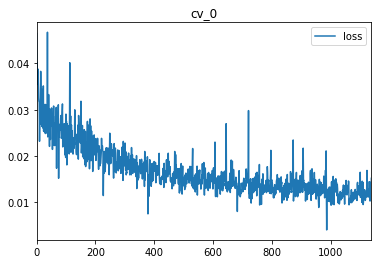

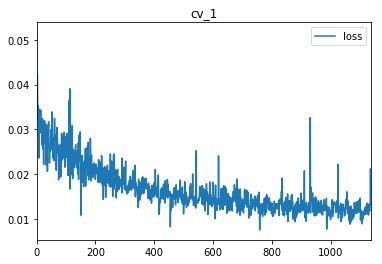

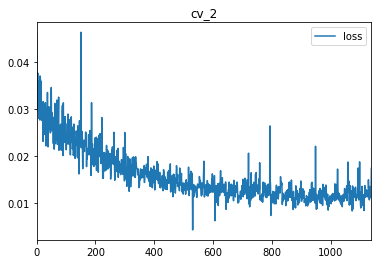

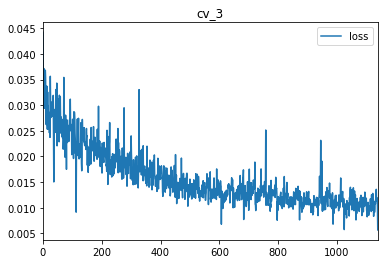

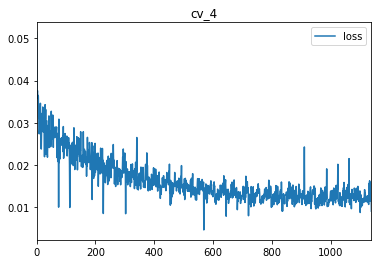

In [74]:
result_5cv = foo_5cv(2750, epochs=30)
# print result_5cv
for cv in xrange(5):
    print ('cv %s:'%cv, result_5cv[cv][0])
print ('avg:', np.average([i for i in result_5cv.values()[0][0][0]]), np.average([i for i in result_5cv.values()[0][0][1]]))

# tuning on learning rate

## define function

In [31]:
def tuning_lr(lr):
    input_size = 6040
    hidden_size = 2750
    output_size = 6040
    num_epochs = 20
    learning_rate = lr

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(dataset.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(dataset.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(dataset.test_dataset.data)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(dataset.test_dataset.data.shape[1]):
        sample = Variable(torch.from_numpy(dataset.test_dataset.test[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(dataset.train_dataset.train.T)
    t = predicted.T
    r.predict( t,dataset.test_dataset.targets)
    print (r.evaluate(dataset.test_dataset.test))

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0439
Epoch [1/20], Step [2/38], Loss: 34.5765
Epoch [1/20], Step [3/38], Loss: 0.0572
Epoch [1/20], Step [4/38], Loss: 0.0482
Epoch [1/20], Step [5/38], Loss: 0.0531
Epoch [1/20], Step [6/38], Loss: 0.0527
Epoch [1/20], Step [7/38], Loss: 0.0360
Epoch [1/20], Step [8/38], Loss: 0.0339
Epoch [1/20], Step [9/38], Loss: 0.0396
Epoch [1/20], Step [10/38], Loss: 0.0367
Epoch [1/20], Step [11/38], Loss: 0.0348
Epoch [1/20], Step [12/38], Loss: 0.0316
Epoch [1/20], Step [13/38], Loss: 0.0368
Epoch [1/20], Step [14/38], Loss: 0.0386
Epoch [1/20], Step [15/38], Loss: 0.0306
Epoch [1/20], Step [16/38], Loss: 0.0313
Epoch [1/20], Step [17/38], Loss: 0.0508
Epoch [1/20], Step [18/38], Loss: 0.0335
Epoch [1/20], Step [19/38], Loss: 0.0312
Epoch [1/20], Step [20/38], Loss: 0.0306
Epoch [1/20], Step [21/38], Loss: 0.0291
Epoch [1/20], Step [22/38], Loss: 0.0341
Epoch [1/2

Epoch [6/20], Step [10/38], Loss: 0.0303
Epoch [6/20], Step [11/38], Loss: 0.0313
Epoch [6/20], Step [12/38], Loss: 0.0236
Epoch [6/20], Step [13/38], Loss: 0.0221
Epoch [6/20], Step [14/38], Loss: 0.0338
Epoch [6/20], Step [15/38], Loss: 0.0334
Epoch [6/20], Step [16/38], Loss: 0.0328
Epoch [6/20], Step [17/38], Loss: 0.0389
Epoch [6/20], Step [18/38], Loss: 0.0325
Epoch [6/20], Step [19/38], Loss: 0.0329
Epoch [6/20], Step [20/38], Loss: 0.0391
Epoch [6/20], Step [21/38], Loss: 0.0286
Epoch [6/20], Step [22/38], Loss: 0.0305
Epoch [6/20], Step [23/38], Loss: 0.0255
Epoch [6/20], Step [24/38], Loss: 0.0325
Epoch [6/20], Step [25/38], Loss: 0.0341
Epoch [6/20], Step [26/38], Loss: 0.0294
Epoch [6/20], Step [27/38], Loss: 0.0295
Epoch [6/20], Step [28/38], Loss: 0.0312
Epoch [6/20], Step [29/38], Loss: 0.0329
Epoch [6/20], Step [30/38], Loss: 0.0336
Epoch [6/20], Step [31/38], Loss: 0.0350
Epoch [6/20], Step [32/38], Loss: 0.0370
Epoch [6/20], Step [33/38], Loss: 0.0305
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0306
Epoch [11/20], Step [21/38], Loss: 0.0305
Epoch [11/20], Step [22/38], Loss: 0.0392
Epoch [11/20], Step [23/38], Loss: 0.0343
Epoch [11/20], Step [24/38], Loss: 0.0318
Epoch [11/20], Step [25/38], Loss: 0.0320
Epoch [11/20], Step [26/38], Loss: 0.0257
Epoch [11/20], Step [27/38], Loss: 0.0341
Epoch [11/20], Step [28/38], Loss: 0.0252
Epoch [11/20], Step [29/38], Loss: 0.0419
Epoch [11/20], Step [30/38], Loss: 0.0305
Epoch [11/20], Step [31/38], Loss: 0.0406
Epoch [11/20], Step [32/38], Loss: 0.0321
Epoch [11/20], Step [33/38], Loss: 0.0353
Epoch [11/20], Step [34/38], Loss: 0.0292
Epoch [11/20], Step [35/38], Loss: 0.0299
Epoch [11/20], Step [36/38], Loss: 0.0309
Epoch [11/20], Step [37/38], Loss: 0.0331
Epoch [11/20], Step [38/38], Loss: 0.0548
Epoch [12/20], Step [1/38], Loss: 0.0363
Epoch [12/20], Step [2/38], Loss: 0.0354
Epoch [12/20], Step [3/38], Loss: 0.0403
Epoch [12/20], Step [4/38], Loss: 0.0398
Epoch [12/20], Step [5/38], Loss: 0.03

Epoch [16/20], Step [27/38], Loss: 0.0339
Epoch [16/20], Step [28/38], Loss: 0.0432
Epoch [16/20], Step [29/38], Loss: 0.0360
Epoch [16/20], Step [30/38], Loss: 0.0265
Epoch [16/20], Step [31/38], Loss: 0.0249
Epoch [16/20], Step [32/38], Loss: 0.0311
Epoch [16/20], Step [33/38], Loss: 0.0309
Epoch [16/20], Step [34/38], Loss: 0.0299
Epoch [16/20], Step [35/38], Loss: 0.0346
Epoch [16/20], Step [36/38], Loss: 0.0323
Epoch [16/20], Step [37/38], Loss: 0.0313
Epoch [16/20], Step [38/38], Loss: 0.0447
Epoch [17/20], Step [1/38], Loss: 0.0377
Epoch [17/20], Step [2/38], Loss: 0.0424
Epoch [17/20], Step [3/38], Loss: 0.0360
Epoch [17/20], Step [4/38], Loss: 0.0308
Epoch [17/20], Step [5/38], Loss: 0.0313
Epoch [17/20], Step [6/38], Loss: 0.0328
Epoch [17/20], Step [7/38], Loss: 0.0247
Epoch [17/20], Step [8/38], Loss: 0.0330
Epoch [17/20], Step [9/38], Loss: 0.0352
Epoch [17/20], Step [10/38], Loss: 0.0375
Epoch [17/20], Step [11/38], Loss: 0.0368
Epoch [17/20], Step [12/38], Loss: 0.0310
E

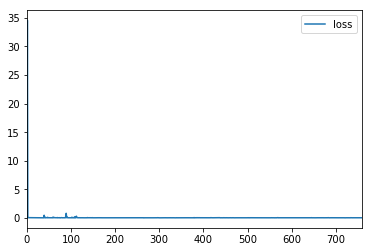

In [32]:
tuning_lr(0.01)

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0535
Epoch [1/20], Step [2/38], Loss: 0.0311
Epoch [1/20], Step [3/38], Loss: 0.0292
Epoch [1/20], Step [4/38], Loss: 0.0420
Epoch [1/20], Step [5/38], Loss: 0.0383
Epoch [1/20], Step [6/38], Loss: 0.0378
Epoch [1/20], Step [7/38], Loss: 0.0327
Epoch [1/20], Step [8/38], Loss: 0.0344
Epoch [1/20], Step [9/38], Loss: 0.0313
Epoch [1/20], Step [10/38], Loss: 0.0389
Epoch [1/20], Step [11/38], Loss: 0.0376
Epoch [1/20], Step [12/38], Loss: 0.0288
Epoch [1/20], Step [13/38], Loss: 0.0448
Epoch [1/20], Step [14/38], Loss: 0.0355
Epoch [1/20], Step [15/38], Loss: 0.0316
Epoch [1/20], Step [16/38], Loss: 0.0326
Epoch [1/20], Step [17/38], Loss: 0.0280
Epoch [1/20], Step [18/38], Loss: 0.0296
Epoch [1/20], Step [19/38], Loss: 0.0359
Epoch [1/20], Step [20/38], Loss: 0.0315
Epoch [1/20], Step [21/38], Loss: 0.0311
Epoch [1/20], Step [22/38], Loss: 0.0338
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0223
Epoch [6/20], Step [11/38], Loss: 0.0214
Epoch [6/20], Step [12/38], Loss: 0.0197
Epoch [6/20], Step [13/38], Loss: 0.0221
Epoch [6/20], Step [14/38], Loss: 0.0181
Epoch [6/20], Step [15/38], Loss: 0.0197
Epoch [6/20], Step [16/38], Loss: 0.0238
Epoch [6/20], Step [17/38], Loss: 0.0222
Epoch [6/20], Step [18/38], Loss: 0.0195
Epoch [6/20], Step [19/38], Loss: 0.0218
Epoch [6/20], Step [20/38], Loss: 0.0235
Epoch [6/20], Step [21/38], Loss: 0.0211
Epoch [6/20], Step [22/38], Loss: 0.0240
Epoch [6/20], Step [23/38], Loss: 0.0230
Epoch [6/20], Step [24/38], Loss: 0.0214
Epoch [6/20], Step [25/38], Loss: 0.0207
Epoch [6/20], Step [26/38], Loss: 0.0240
Epoch [6/20], Step [27/38], Loss: 0.0196
Epoch [6/20], Step [28/38], Loss: 0.0176
Epoch [6/20], Step [29/38], Loss: 0.0228
Epoch [6/20], Step [30/38], Loss: 0.0193
Epoch [6/20], Step [31/38], Loss: 0.0189
Epoch [6/20], Step [32/38], Loss: 0.0197
Epoch [6/20], Step [33/38], Loss: 0.0230
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0157
Epoch [11/20], Step [21/38], Loss: 0.0127
Epoch [11/20], Step [22/38], Loss: 0.0150
Epoch [11/20], Step [23/38], Loss: 0.0173
Epoch [11/20], Step [24/38], Loss: 0.0170
Epoch [11/20], Step [25/38], Loss: 0.0183
Epoch [11/20], Step [26/38], Loss: 0.0172
Epoch [11/20], Step [27/38], Loss: 0.0124
Epoch [11/20], Step [28/38], Loss: 0.0146
Epoch [11/20], Step [29/38], Loss: 0.0135
Epoch [11/20], Step [30/38], Loss: 0.0183
Epoch [11/20], Step [31/38], Loss: 0.0152
Epoch [11/20], Step [32/38], Loss: 0.0137
Epoch [11/20], Step [33/38], Loss: 0.0174
Epoch [11/20], Step [34/38], Loss: 0.0150
Epoch [11/20], Step [35/38], Loss: 0.0158
Epoch [11/20], Step [36/38], Loss: 0.0146
Epoch [11/20], Step [37/38], Loss: 0.0159
Epoch [11/20], Step [38/38], Loss: 0.0088
Epoch [12/20], Step [1/38], Loss: 0.0156
Epoch [12/20], Step [2/38], Loss: 0.0144
Epoch [12/20], Step [3/38], Loss: 0.0157
Epoch [12/20], Step [4/38], Loss: 0.0161
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0116
Epoch [16/20], Step [28/38], Loss: 0.0119
Epoch [16/20], Step [29/38], Loss: 0.0116
Epoch [16/20], Step [30/38], Loss: 0.0116
Epoch [16/20], Step [31/38], Loss: 0.0105
Epoch [16/20], Step [32/38], Loss: 0.0123
Epoch [16/20], Step [33/38], Loss: 0.0116
Epoch [16/20], Step [34/38], Loss: 0.0106
Epoch [16/20], Step [35/38], Loss: 0.0113
Epoch [16/20], Step [36/38], Loss: 0.0109
Epoch [16/20], Step [37/38], Loss: 0.0110
Epoch [16/20], Step [38/38], Loss: 0.0131
Epoch [17/20], Step [1/38], Loss: 0.0107
Epoch [17/20], Step [2/38], Loss: 0.0107
Epoch [17/20], Step [3/38], Loss: 0.0103
Epoch [17/20], Step [4/38], Loss: 0.0097
Epoch [17/20], Step [5/38], Loss: 0.0118
Epoch [17/20], Step [6/38], Loss: 0.0101
Epoch [17/20], Step [7/38], Loss: 0.0108
Epoch [17/20], Step [8/38], Loss: 0.0109
Epoch [17/20], Step [9/38], Loss: 0.0108
Epoch [17/20], Step [10/38], Loss: 0.0103
Epoch [17/20], Step [11/38], Loss: 0.0119
Epoch [17/20], Step [12/38], Loss: 0.0100
E

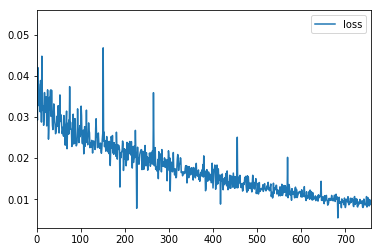

In [33]:
tuning_lr(0.0001)

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0534
Epoch [1/20], Step [2/38], Loss: 0.0403
Epoch [1/20], Step [3/38], Loss: 0.0381
Epoch [1/20], Step [4/38], Loss: 0.0525
Epoch [1/20], Step [5/38], Loss: 0.0475
Epoch [1/20], Step [6/38], Loss: 0.0373
Epoch [1/20], Step [7/38], Loss: 0.0433
Epoch [1/20], Step [8/38], Loss: 0.0365
Epoch [1/20], Step [9/38], Loss: 0.0359
Epoch [1/20], Step [10/38], Loss: 0.0369
Epoch [1/20], Step [11/38], Loss: 0.0331
Epoch [1/20], Step [12/38], Loss: 0.0394
Epoch [1/20], Step [13/38], Loss: 0.0400
Epoch [1/20], Step [14/38], Loss: 0.0324
Epoch [1/20], Step [15/38], Loss: 0.0369
Epoch [1/20], Step [16/38], Loss: 0.0313
Epoch [1/20], Step [17/38], Loss: 0.0386
Epoch [1/20], Step [18/38], Loss: 0.0334
Epoch [1/20], Step [19/38], Loss: 0.0330
Epoch [1/20], Step [20/38], Loss: 0.0351
Epoch [1/20], Step [21/38], Loss: 0.0301
Epoch [1/20], Step [22/38], Loss: 0.0354
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0283
Epoch [6/20], Step [11/38], Loss: 0.0238
Epoch [6/20], Step [12/38], Loss: 0.0219
Epoch [6/20], Step [13/38], Loss: 0.0242
Epoch [6/20], Step [14/38], Loss: 0.0259
Epoch [6/20], Step [15/38], Loss: 0.0203
Epoch [6/20], Step [16/38], Loss: 0.0284
Epoch [6/20], Step [17/38], Loss: 0.0271
Epoch [6/20], Step [18/38], Loss: 0.0242
Epoch [6/20], Step [19/38], Loss: 0.0188
Epoch [6/20], Step [20/38], Loss: 0.0288
Epoch [6/20], Step [21/38], Loss: 0.0263
Epoch [6/20], Step [22/38], Loss: 0.0258
Epoch [6/20], Step [23/38], Loss: 0.0244
Epoch [6/20], Step [24/38], Loss: 0.0242
Epoch [6/20], Step [25/38], Loss: 0.0233
Epoch [6/20], Step [26/38], Loss: 0.0307
Epoch [6/20], Step [27/38], Loss: 0.0274
Epoch [6/20], Step [28/38], Loss: 0.0243
Epoch [6/20], Step [29/38], Loss: 0.0192
Epoch [6/20], Step [30/38], Loss: 0.0224
Epoch [6/20], Step [31/38], Loss: 0.0244
Epoch [6/20], Step [32/38], Loss: 0.0229
Epoch [6/20], Step [33/38], Loss: 0.0226
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0191
Epoch [11/20], Step [21/38], Loss: 0.0176
Epoch [11/20], Step [22/38], Loss: 0.0180
Epoch [11/20], Step [23/38], Loss: 0.0199
Epoch [11/20], Step [24/38], Loss: 0.0218
Epoch [11/20], Step [25/38], Loss: 0.0231
Epoch [11/20], Step [26/38], Loss: 0.0182
Epoch [11/20], Step [27/38], Loss: 0.0219
Epoch [11/20], Step [28/38], Loss: 0.0167
Epoch [11/20], Step [29/38], Loss: 0.0216
Epoch [11/20], Step [30/38], Loss: 0.0186
Epoch [11/20], Step [31/38], Loss: 0.0188
Epoch [11/20], Step [32/38], Loss: 0.0142
Epoch [11/20], Step [33/38], Loss: 0.0203
Epoch [11/20], Step [34/38], Loss: 0.0187
Epoch [11/20], Step [35/38], Loss: 0.0185
Epoch [11/20], Step [36/38], Loss: 0.0217
Epoch [11/20], Step [37/38], Loss: 0.0218
Epoch [11/20], Step [38/38], Loss: 0.0173
Epoch [12/20], Step [1/38], Loss: 0.0200
Epoch [12/20], Step [2/38], Loss: 0.0192
Epoch [12/20], Step [3/38], Loss: 0.0220
Epoch [12/20], Step [4/38], Loss: 0.0186
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0184
Epoch [16/20], Step [28/38], Loss: 0.0179
Epoch [16/20], Step [29/38], Loss: 0.0157
Epoch [16/20], Step [30/38], Loss: 0.0144
Epoch [16/20], Step [31/38], Loss: 0.0153
Epoch [16/20], Step [32/38], Loss: 0.0164
Epoch [16/20], Step [33/38], Loss: 0.0149
Epoch [16/20], Step [34/38], Loss: 0.0175
Epoch [16/20], Step [35/38], Loss: 0.0177
Epoch [16/20], Step [36/38], Loss: 0.0137
Epoch [16/20], Step [37/38], Loss: 0.0179
Epoch [16/20], Step [38/38], Loss: 0.0195
Epoch [17/20], Step [1/38], Loss: 0.0192
Epoch [17/20], Step [2/38], Loss: 0.0147
Epoch [17/20], Step [3/38], Loss: 0.0176
Epoch [17/20], Step [4/38], Loss: 0.0157
Epoch [17/20], Step [5/38], Loss: 0.0169
Epoch [17/20], Step [6/38], Loss: 0.0138
Epoch [17/20], Step [7/38], Loss: 0.0149
Epoch [17/20], Step [8/38], Loss: 0.0159
Epoch [17/20], Step [9/38], Loss: 0.0140
Epoch [17/20], Step [10/38], Loss: 0.0156
Epoch [17/20], Step [11/38], Loss: 0.0150
Epoch [17/20], Step [12/38], Loss: 0.0161
E

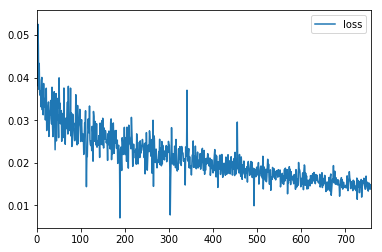

In [34]:
tuning_lr(0.00005)

# changing the activation funtion

## tanh

### 400 hidden neuron

Net (
  (encoder): Linear (6040 -> 400)
  (tanh): Tanh ()
  (decoder): Linear (400 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0435
Epoch [1/20], Step [2/38], Loss: 0.0596
Epoch [1/20], Step [3/38], Loss: 0.0508
Epoch [1/20], Step [4/38], Loss: 0.0532
Epoch [1/20], Step [5/38], Loss: 0.0393
Epoch [1/20], Step [6/38], Loss: 0.0453
Epoch [1/20], Step [7/38], Loss: 0.0369
Epoch [1/20], Step [8/38], Loss: 0.0337
Epoch [1/20], Step [9/38], Loss: 0.0359
Epoch [1/20], Step [10/38], Loss: 0.0313
Epoch [1/20], Step [11/38], Loss: 0.0324
Epoch [1/20], Step [12/38], Loss: 0.0353
Epoch [1/20], Step [13/38], Loss: 0.0345
Epoch [1/20], Step [14/38], Loss: 0.0374
Epoch [1/20], Step [15/38], Loss: 0.0406
Epoch [1/20], Step [16/38], Loss: 0.0331
Epoch [1/20], Step [17/38], Loss: 0.0333
Epoch [1/20], Step [18/38], Loss: 0.0386
Epoch [1/20], Step [19/38], Loss: 0.0365
Epoch [1/20], Step [20/38], Loss: 0.0337
Epoch [1/20], Step [21/38], Loss: 0.0352
Epoch [1/20], Step [22/38], Loss: 0.0354
Epoch [1/20],

Epoch [6/20], Step [13/38], Loss: 0.0221
Epoch [6/20], Step [14/38], Loss: 0.0199
Epoch [6/20], Step [15/38], Loss: 0.0232
Epoch [6/20], Step [16/38], Loss: 0.0216
Epoch [6/20], Step [17/38], Loss: 0.0219
Epoch [6/20], Step [18/38], Loss: 0.0240
Epoch [6/20], Step [19/38], Loss: 0.0235
Epoch [6/20], Step [20/38], Loss: 0.0207
Epoch [6/20], Step [21/38], Loss: 0.0242
Epoch [6/20], Step [22/38], Loss: 0.0190
Epoch [6/20], Step [23/38], Loss: 0.0266
Epoch [6/20], Step [24/38], Loss: 0.0231
Epoch [6/20], Step [25/38], Loss: 0.0195
Epoch [6/20], Step [26/38], Loss: 0.0226
Epoch [6/20], Step [27/38], Loss: 0.0217
Epoch [6/20], Step [28/38], Loss: 0.0252
Epoch [6/20], Step [29/38], Loss: 0.0205
Epoch [6/20], Step [30/38], Loss: 0.0207
Epoch [6/20], Step [31/38], Loss: 0.0230
Epoch [6/20], Step [32/38], Loss: 0.0211
Epoch [6/20], Step [33/38], Loss: 0.0196
Epoch [6/20], Step [34/38], Loss: 0.0232
Epoch [6/20], Step [35/38], Loss: 0.0189
Epoch [6/20], Step [36/38], Loss: 0.0240
Epoch [6/20], St

Epoch [11/20], Step [25/38], Loss: 0.0187
Epoch [11/20], Step [26/38], Loss: 0.0193
Epoch [11/20], Step [27/38], Loss: 0.0147
Epoch [11/20], Step [28/38], Loss: 0.0190
Epoch [11/20], Step [29/38], Loss: 0.0184
Epoch [11/20], Step [30/38], Loss: 0.0215
Epoch [11/20], Step [31/38], Loss: 0.0182
Epoch [11/20], Step [32/38], Loss: 0.0170
Epoch [11/20], Step [33/38], Loss: 0.0206
Epoch [11/20], Step [34/38], Loss: 0.0167
Epoch [11/20], Step [35/38], Loss: 0.0207
Epoch [11/20], Step [36/38], Loss: 0.0217
Epoch [11/20], Step [37/38], Loss: 0.0223
Epoch [11/20], Step [38/38], Loss: 0.0126
Epoch [12/20], Step [1/38], Loss: 0.0243
Epoch [12/20], Step [2/38], Loss: 0.0185
Epoch [12/20], Step [3/38], Loss: 0.0209
Epoch [12/20], Step [4/38], Loss: 0.0266
Epoch [12/20], Step [5/38], Loss: 0.0180
Epoch [12/20], Step [6/38], Loss: 0.0180
Epoch [12/20], Step [7/38], Loss: 0.0192
Epoch [12/20], Step [8/38], Loss: 0.0211
Epoch [12/20], Step [9/38], Loss: 0.0194
Epoch [12/20], Step [10/38], Loss: 0.0178
E

Epoch [16/20], Step [35/38], Loss: 0.0142
Epoch [16/20], Step [36/38], Loss: 0.0165
Epoch [16/20], Step [37/38], Loss: 0.0171
Epoch [16/20], Step [38/38], Loss: 0.0211
Epoch [17/20], Step [1/38], Loss: 0.0142
Epoch [17/20], Step [2/38], Loss: 0.0175
Epoch [17/20], Step [3/38], Loss: 0.0181
Epoch [17/20], Step [4/38], Loss: 0.0155
Epoch [17/20], Step [5/38], Loss: 0.0193
Epoch [17/20], Step [6/38], Loss: 0.0147
Epoch [17/20], Step [7/38], Loss: 0.0165
Epoch [17/20], Step [8/38], Loss: 0.0163
Epoch [17/20], Step [9/38], Loss: 0.0137
Epoch [17/20], Step [10/38], Loss: 0.0153
Epoch [17/20], Step [11/38], Loss: 0.0152
Epoch [17/20], Step [12/38], Loss: 0.0160
Epoch [17/20], Step [13/38], Loss: 0.0167
Epoch [17/20], Step [14/38], Loss: 0.0155
Epoch [17/20], Step [15/38], Loss: 0.0156
Epoch [17/20], Step [16/38], Loss: 0.0174
Epoch [17/20], Step [17/38], Loss: 0.0182
Epoch [17/20], Step [18/38], Loss: 0.0163
Epoch [17/20], Step [19/38], Loss: 0.0159
Epoch [17/20], Step [20/38], Loss: 0.0161
E

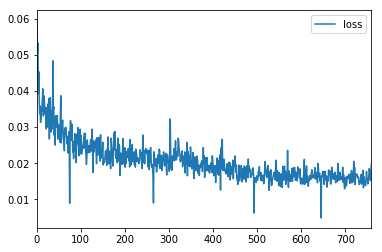

In [35]:

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.encoder(x)
        out = self.tanh(out)
        out = self.decoder(out)
        return out



input_size = 6040
hidden_size = 400
output_size = 6040
num_epochs = 20
learning_rate = 0.001

net = Net(input_size, hidden_size, output_size)
loss_history = list()

earning_rate = 0.001

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
print(net.train())
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(dataset.train_loader):
        sample = Variable(sample_batched['sample'])
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
        loss.backward()
        optimizer.step()

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs, i_batch + 1, 
                      len(dataset.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])

import pandas as pd
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()
predicted = np.zeros_like(dataset.test_dataset.data)
# dataset.test_dataset.part = 'all'
for item_id in xrange(dataset.test_dataset.data.shape[1]):
    sample = Variable(torch.from_numpy(dataset.test_dataset.data[:,item_id]))
    output = net(sample)
#     print(type(test_input['id']))
    predicted[:,item_id] = output.data.numpy()
import rec 
reload(rec)
r = rec.Rec(topk = 5)
r.fit(dataset.train_dataset.train.T)
t = predicted.T
r.predict( t,dataset.test_dataset.targets)
print (r.evaluate(dataset.test_dataset.test))

## tanh, tuning hidden size

In [39]:
  
def tuning_hidden_tanh(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(dataset.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(dataset.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(dataset.test_dataset.data)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(dataset.test_dataset.data.shape[1]):
        sample = Variable(torch.from_numpy(dataset.test_dataset.data[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(dataset.train_dataset.train.T)
    t = predicted.T
    r.predict( t,dataset.test_dataset.targets)
    print (r.evaluate(dataset.test_dataset.test))

### hidden size tuning

Net (
  (encoder): Linear (6040 -> 2500)
  (tanh): Tanh ()
  (decoder): Linear (2500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0464
Epoch [1/20], Step [2/38], Loss: 0.0577
Epoch [1/20], Step [3/38], Loss: 0.1229
Epoch [1/20], Step [4/38], Loss: 0.0465
Epoch [1/20], Step [5/38], Loss: 0.0577
Epoch [1/20], Step [6/38], Loss: 0.0450
Epoch [1/20], Step [7/38], Loss: 0.0503
Epoch [1/20], Step [8/38], Loss: 0.0333
Epoch [1/20], Step [9/38], Loss: 0.0569
Epoch [1/20], Step [10/38], Loss: 0.0374
Epoch [1/20], Step [11/38], Loss: 0.0609
Epoch [1/20], Step [12/38], Loss: 0.0426
Epoch [1/20], Step [13/38], Loss: 0.0468
Epoch [1/20], Step [14/38], Loss: 0.0452
Epoch [1/20], Step [15/38], Loss: 0.0503
Epoch [1/20], Step [16/38], Loss: 0.0420
Epoch [1/20], Step [17/38], Loss: 0.0364
Epoch [1/20], Step [18/38], Loss: 0.0421
Epoch [1/20], Step [19/38], Loss: 0.0404
Epoch [1/20], Step [20/38], Loss: 0.0406
Epoch [1/20], Step [21/38], Loss: 0.0341
Epoch [1/20], Step [22/38], Loss: 0.0382
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0139
Epoch [6/20], Step [11/38], Loss: 0.0197
Epoch [6/20], Step [12/38], Loss: 0.0260
Epoch [6/20], Step [13/38], Loss: 0.0168
Epoch [6/20], Step [14/38], Loss: 0.0164
Epoch [6/20], Step [15/38], Loss: 0.0177
Epoch [6/20], Step [16/38], Loss: 0.0172
Epoch [6/20], Step [17/38], Loss: 0.0164
Epoch [6/20], Step [18/38], Loss: 0.0161
Epoch [6/20], Step [19/38], Loss: 0.0175
Epoch [6/20], Step [20/38], Loss: 0.0148
Epoch [6/20], Step [21/38], Loss: 0.0157
Epoch [6/20], Step [22/38], Loss: 0.0145
Epoch [6/20], Step [23/38], Loss: 0.0159
Epoch [6/20], Step [24/38], Loss: 0.0146
Epoch [6/20], Step [25/38], Loss: 0.0128
Epoch [6/20], Step [26/38], Loss: 0.0143
Epoch [6/20], Step [27/38], Loss: 0.0162
Epoch [6/20], Step [28/38], Loss: 0.0155
Epoch [6/20], Step [29/38], Loss: 0.0132
Epoch [6/20], Step [30/38], Loss: 0.0171
Epoch [6/20], Step [31/38], Loss: 0.0125
Epoch [6/20], Step [32/38], Loss: 0.0140
Epoch [6/20], Step [33/38], Loss: 0.0136
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0104
Epoch [11/20], Step [21/38], Loss: 0.0080
Epoch [11/20], Step [22/38], Loss: 0.0105
Epoch [11/20], Step [23/38], Loss: 0.0088
Epoch [11/20], Step [24/38], Loss: 0.0089
Epoch [11/20], Step [25/38], Loss: 0.0088
Epoch [11/20], Step [26/38], Loss: 0.0088
Epoch [11/20], Step [27/38], Loss: 0.0079
Epoch [11/20], Step [28/38], Loss: 0.0081
Epoch [11/20], Step [29/38], Loss: 0.0076
Epoch [11/20], Step [30/38], Loss: 0.0092
Epoch [11/20], Step [31/38], Loss: 0.0083
Epoch [11/20], Step [32/38], Loss: 0.0077
Epoch [11/20], Step [33/38], Loss: 0.0104
Epoch [11/20], Step [34/38], Loss: 0.0085
Epoch [11/20], Step [35/38], Loss: 0.0102
Epoch [11/20], Step [36/38], Loss: 0.0088
Epoch [11/20], Step [37/38], Loss: 0.0087
Epoch [11/20], Step [38/38], Loss: 0.0078
Epoch [12/20], Step [1/38], Loss: 0.0079
Epoch [12/20], Step [2/38], Loss: 0.0085
Epoch [12/20], Step [3/38], Loss: 0.0085
Epoch [12/20], Step [4/38], Loss: 0.0078
Epoch [12/20], Step [5/38], Loss: 0.00

Epoch [16/20], Step [27/38], Loss: 0.0157
Epoch [16/20], Step [28/38], Loss: 0.0157
Epoch [16/20], Step [29/38], Loss: 0.0166
Epoch [16/20], Step [30/38], Loss: 0.0128
Epoch [16/20], Step [31/38], Loss: 0.0157
Epoch [16/20], Step [32/38], Loss: 0.0175
Epoch [16/20], Step [33/38], Loss: 0.0122
Epoch [16/20], Step [34/38], Loss: 0.0096
Epoch [16/20], Step [35/38], Loss: 0.0103
Epoch [16/20], Step [36/38], Loss: 0.0181
Epoch [16/20], Step [37/38], Loss: 0.0162
Epoch [16/20], Step [38/38], Loss: 0.0210
Epoch [17/20], Step [1/38], Loss: 0.0189
Epoch [17/20], Step [2/38], Loss: 0.0159
Epoch [17/20], Step [3/38], Loss: 0.0187
Epoch [17/20], Step [4/38], Loss: 0.0124
Epoch [17/20], Step [5/38], Loss: 0.0166
Epoch [17/20], Step [6/38], Loss: 0.0238
Epoch [17/20], Step [7/38], Loss: 0.0308
Epoch [17/20], Step [8/38], Loss: 0.0301
Epoch [17/20], Step [9/38], Loss: 0.0432
Epoch [17/20], Step [10/38], Loss: 0.0236
Epoch [17/20], Step [11/38], Loss: 0.0175
Epoch [17/20], Step [12/38], Loss: 0.0156
E

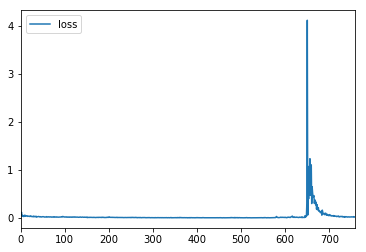

In [40]:
tuning_hidden_tanh(2500)

Net (
  (encoder): Linear (6040 -> 500)
  (tanh): Tanh ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0375
Epoch [1/20], Step [2/38], Loss: 0.0641
Epoch [1/20], Step [3/38], Loss: 0.0431
Epoch [1/20], Step [4/38], Loss: 0.0373
Epoch [1/20], Step [5/38], Loss: 0.0541
Epoch [1/20], Step [6/38], Loss: 0.0359
Epoch [1/20], Step [7/38], Loss: 0.0429
Epoch [1/20], Step [8/38], Loss: 0.0342
Epoch [1/20], Step [9/38], Loss: 0.0458
Epoch [1/20], Step [10/38], Loss: 0.0401
Epoch [1/20], Step [11/38], Loss: 0.0416
Epoch [1/20], Step [12/38], Loss: 0.0345
Epoch [1/20], Step [13/38], Loss: 0.0286
Epoch [1/20], Step [14/38], Loss: 0.0352
Epoch [1/20], Step [15/38], Loss: 0.0360
Epoch [1/20], Step [16/38], Loss: 0.0408
Epoch [1/20], Step [17/38], Loss: 0.0392
Epoch [1/20], Step [18/38], Loss: 0.0397
Epoch [1/20], Step [19/38], Loss: 0.0328
Epoch [1/20], Step [20/38], Loss: 0.0315
Epoch [1/20], Step [21/38], Loss: 0.0368
Epoch [1/20], Step [22/38], Loss: 0.0294
Epoch [1/20],

Epoch [6/20], Step [10/38], Loss: 0.0188
Epoch [6/20], Step [11/38], Loss: 0.0197
Epoch [6/20], Step [12/38], Loss: 0.0246
Epoch [6/20], Step [13/38], Loss: 0.0240
Epoch [6/20], Step [14/38], Loss: 0.0215
Epoch [6/20], Step [15/38], Loss: 0.0231
Epoch [6/20], Step [16/38], Loss: 0.0192
Epoch [6/20], Step [17/38], Loss: 0.0193
Epoch [6/20], Step [18/38], Loss: 0.0233
Epoch [6/20], Step [19/38], Loss: 0.0221
Epoch [6/20], Step [20/38], Loss: 0.0203
Epoch [6/20], Step [21/38], Loss: 0.0240
Epoch [6/20], Step [22/38], Loss: 0.0236
Epoch [6/20], Step [23/38], Loss: 0.0184
Epoch [6/20], Step [24/38], Loss: 0.0216
Epoch [6/20], Step [25/38], Loss: 0.0233
Epoch [6/20], Step [26/38], Loss: 0.0181
Epoch [6/20], Step [27/38], Loss: 0.0196
Epoch [6/20], Step [28/38], Loss: 0.0216
Epoch [6/20], Step [29/38], Loss: 0.0223
Epoch [6/20], Step [30/38], Loss: 0.0211
Epoch [6/20], Step [31/38], Loss: 0.0209
Epoch [6/20], Step [32/38], Loss: 0.0200
Epoch [6/20], Step [33/38], Loss: 0.0211
Epoch [6/20], St

Epoch [11/20], Step [22/38], Loss: 0.0168
Epoch [11/20], Step [23/38], Loss: 0.0139
Epoch [11/20], Step [24/38], Loss: 0.0186
Epoch [11/20], Step [25/38], Loss: 0.0170
Epoch [11/20], Step [26/38], Loss: 0.0140
Epoch [11/20], Step [27/38], Loss: 0.0151
Epoch [11/20], Step [28/38], Loss: 0.0180
Epoch [11/20], Step [29/38], Loss: 0.0176
Epoch [11/20], Step [30/38], Loss: 0.0225
Epoch [11/20], Step [31/38], Loss: 0.0192
Epoch [11/20], Step [32/38], Loss: 0.0145
Epoch [11/20], Step [33/38], Loss: 0.0149
Epoch [11/20], Step [34/38], Loss: 0.0151
Epoch [11/20], Step [35/38], Loss: 0.0178
Epoch [11/20], Step [36/38], Loss: 0.0185
Epoch [11/20], Step [37/38], Loss: 0.0165
Epoch [11/20], Step [38/38], Loss: 0.0224
Epoch [12/20], Step [1/38], Loss: 0.0180
Epoch [12/20], Step [2/38], Loss: 0.0155
Epoch [12/20], Step [3/38], Loss: 0.0200
Epoch [12/20], Step [4/38], Loss: 0.0168
Epoch [12/20], Step [5/38], Loss: 0.0192
Epoch [12/20], Step [6/38], Loss: 0.0147
Epoch [12/20], Step [7/38], Loss: 0.0176

Epoch [16/20], Step [31/38], Loss: 0.0164
Epoch [16/20], Step [32/38], Loss: 0.0165
Epoch [16/20], Step [33/38], Loss: 0.0144
Epoch [16/20], Step [34/38], Loss: 0.0146
Epoch [16/20], Step [35/38], Loss: 0.0179
Epoch [16/20], Step [36/38], Loss: 0.0167
Epoch [16/20], Step [37/38], Loss: 0.0148
Epoch [16/20], Step [38/38], Loss: 0.0203
Epoch [17/20], Step [1/38], Loss: 0.0138
Epoch [17/20], Step [2/38], Loss: 0.0163
Epoch [17/20], Step [3/38], Loss: 0.0147
Epoch [17/20], Step [4/38], Loss: 0.0153
Epoch [17/20], Step [5/38], Loss: 0.0140
Epoch [17/20], Step [6/38], Loss: 0.0156
Epoch [17/20], Step [7/38], Loss: 0.0163
Epoch [17/20], Step [8/38], Loss: 0.0165
Epoch [17/20], Step [9/38], Loss: 0.0144
Epoch [17/20], Step [10/38], Loss: 0.0143
Epoch [17/20], Step [11/38], Loss: 0.0138
Epoch [17/20], Step [12/38], Loss: 0.0178
Epoch [17/20], Step [13/38], Loss: 0.0156
Epoch [17/20], Step [14/38], Loss: 0.0169
Epoch [17/20], Step [15/38], Loss: 0.0137
Epoch [17/20], Step [16/38], Loss: 0.0154
E

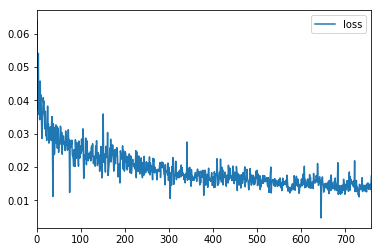

In [42]:
tuning_hidden_tanh(500)

Net (
  (encoder): Linear (6040 -> 1000)
  (tanh): Tanh ()
  (decoder): Linear (1000 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0393
Epoch [1/20], Step [2/38], Loss: 0.0436
Epoch [1/20], Step [3/38], Loss: 0.0413
Epoch [1/20], Step [4/38], Loss: 0.0371
Epoch [1/20], Step [5/38], Loss: 0.0295
Epoch [1/20], Step [6/38], Loss: 0.0357
Epoch [1/20], Step [7/38], Loss: 0.0427
Epoch [1/20], Step [8/38], Loss: 0.0383
Epoch [1/20], Step [9/38], Loss: 0.0374
Epoch [1/20], Step [10/38], Loss: 0.0344
Epoch [1/20], Step [11/38], Loss: 0.0287
Epoch [1/20], Step [12/38], Loss: 0.0281
Epoch [1/20], Step [13/38], Loss: 0.0401
Epoch [1/20], Step [14/38], Loss: 0.0349
Epoch [1/20], Step [15/38], Loss: 0.0306
Epoch [1/20], Step [16/38], Loss: 0.0337
Epoch [1/20], Step [17/38], Loss: 0.0302
Epoch [1/20], Step [18/38], Loss: 0.0393
Epoch [1/20], Step [19/38], Loss: 0.0351
Epoch [1/20], Step [20/38], Loss: 0.0398
Epoch [1/20], Step [21/38], Loss: 0.0343
Epoch [1/20], Step [22/38], Loss: 0.0312
Epoch [1/20

Epoch [6/20], Step [11/38], Loss: 0.0172
Epoch [6/20], Step [12/38], Loss: 0.0174
Epoch [6/20], Step [13/38], Loss: 0.0153
Epoch [6/20], Step [14/38], Loss: 0.0164
Epoch [6/20], Step [15/38], Loss: 0.0132
Epoch [6/20], Step [16/38], Loss: 0.0159
Epoch [6/20], Step [17/38], Loss: 0.0167
Epoch [6/20], Step [18/38], Loss: 0.0148
Epoch [6/20], Step [19/38], Loss: 0.0163
Epoch [6/20], Step [20/38], Loss: 0.0157
Epoch [6/20], Step [21/38], Loss: 0.0156
Epoch [6/20], Step [22/38], Loss: 0.0157
Epoch [6/20], Step [23/38], Loss: 0.0149
Epoch [6/20], Step [24/38], Loss: 0.0190
Epoch [6/20], Step [25/38], Loss: 0.0128
Epoch [6/20], Step [26/38], Loss: 0.0153
Epoch [6/20], Step [27/38], Loss: 0.0185
Epoch [6/20], Step [28/38], Loss: 0.0133
Epoch [6/20], Step [29/38], Loss: 0.0181
Epoch [6/20], Step [30/38], Loss: 0.0155
Epoch [6/20], Step [31/38], Loss: 0.0169
Epoch [6/20], Step [32/38], Loss: 0.0140
Epoch [6/20], Step [33/38], Loss: 0.0139
Epoch [6/20], Step [34/38], Loss: 0.0150
Epoch [6/20], St

Epoch [11/20], Step [21/38], Loss: 0.0126
Epoch [11/20], Step [22/38], Loss: 0.0126
Epoch [11/20], Step [23/38], Loss: 0.0137
Epoch [11/20], Step [24/38], Loss: 0.0136
Epoch [11/20], Step [25/38], Loss: 0.0141
Epoch [11/20], Step [26/38], Loss: 0.0112
Epoch [11/20], Step [27/38], Loss: 0.0135
Epoch [11/20], Step [28/38], Loss: 0.0112
Epoch [11/20], Step [29/38], Loss: 0.0113
Epoch [11/20], Step [30/38], Loss: 0.0124
Epoch [11/20], Step [31/38], Loss: 0.0141
Epoch [11/20], Step [32/38], Loss: 0.0112
Epoch [11/20], Step [33/38], Loss: 0.0120
Epoch [11/20], Step [34/38], Loss: 0.0128
Epoch [11/20], Step [35/38], Loss: 0.0116
Epoch [11/20], Step [36/38], Loss: 0.0106
Epoch [11/20], Step [37/38], Loss: 0.0123
Epoch [11/20], Step [38/38], Loss: 0.0118
Epoch [12/20], Step [1/38], Loss: 0.0107
Epoch [12/20], Step [2/38], Loss: 0.0113
Epoch [12/20], Step [3/38], Loss: 0.0136
Epoch [12/20], Step [4/38], Loss: 0.0100
Epoch [12/20], Step [5/38], Loss: 0.0129
Epoch [12/20], Step [6/38], Loss: 0.011

Epoch [16/20], Step [29/38], Loss: 0.0096
Epoch [16/20], Step [30/38], Loss: 0.0099
Epoch [16/20], Step [31/38], Loss: 0.0094
Epoch [16/20], Step [32/38], Loss: 0.0102
Epoch [16/20], Step [33/38], Loss: 0.0118
Epoch [16/20], Step [34/38], Loss: 0.0104
Epoch [16/20], Step [35/38], Loss: 0.0102
Epoch [16/20], Step [36/38], Loss: 0.0080
Epoch [16/20], Step [37/38], Loss: 0.0095
Epoch [16/20], Step [38/38], Loss: 0.0110
Epoch [17/20], Step [1/38], Loss: 0.0106
Epoch [17/20], Step [2/38], Loss: 0.0106
Epoch [17/20], Step [3/38], Loss: 0.0087
Epoch [17/20], Step [4/38], Loss: 0.0094
Epoch [17/20], Step [5/38], Loss: 0.0090
Epoch [17/20], Step [6/38], Loss: 0.0074
Epoch [17/20], Step [7/38], Loss: 0.0111
Epoch [17/20], Step [8/38], Loss: 0.0098
Epoch [17/20], Step [9/38], Loss: 0.0090
Epoch [17/20], Step [10/38], Loss: 0.0092
Epoch [17/20], Step [11/38], Loss: 0.0096
Epoch [17/20], Step [12/38], Loss: 0.0094
Epoch [17/20], Step [13/38], Loss: 0.0093
Epoch [17/20], Step [14/38], Loss: 0.0087
E

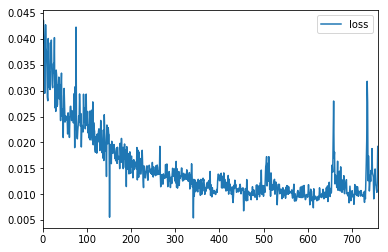

In [43]:
tuning_hidden_tanh(1000)

Net (
  (encoder): Linear (6040 -> 50)
  (tanh): Tanh ()
  (decoder): Linear (50 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0540
Epoch [1/20], Step [2/38], Loss: 0.0610
Epoch [1/20], Step [3/38], Loss: 0.0661
Epoch [1/20], Step [4/38], Loss: 0.0633
Epoch [1/20], Step [5/38], Loss: 0.0495
Epoch [1/20], Step [6/38], Loss: 0.0610
Epoch [1/20], Step [7/38], Loss: 0.0491
Epoch [1/20], Step [8/38], Loss: 0.0469
Epoch [1/20], Step [9/38], Loss: 0.0661
Epoch [1/20], Step [10/38], Loss: 0.0453
Epoch [1/20], Step [11/38], Loss: 0.0467
Epoch [1/20], Step [12/38], Loss: 0.0559
Epoch [1/20], Step [13/38], Loss: 0.0479
Epoch [1/20], Step [14/38], Loss: 0.0455
Epoch [1/20], Step [15/38], Loss: 0.0551
Epoch [1/20], Step [16/38], Loss: 0.0559
Epoch [1/20], Step [17/38], Loss: 0.0456
Epoch [1/20], Step [18/38], Loss: 0.0622
Epoch [1/20], Step [19/38], Loss: 0.0447
Epoch [1/20], Step [20/38], Loss: 0.0496
Epoch [1/20], Step [21/38], Loss: 0.0469
Epoch [1/20], Step [22/38], Loss: 0.0444
Epoch [1/20], S

Epoch [6/20], Step [14/38], Loss: 0.0250
Epoch [6/20], Step [15/38], Loss: 0.0316
Epoch [6/20], Step [16/38], Loss: 0.0264
Epoch [6/20], Step [17/38], Loss: 0.0276
Epoch [6/20], Step [18/38], Loss: 0.0344
Epoch [6/20], Step [19/38], Loss: 0.0259
Epoch [6/20], Step [20/38], Loss: 0.0325
Epoch [6/20], Step [21/38], Loss: 0.0266
Epoch [6/20], Step [22/38], Loss: 0.0358
Epoch [6/20], Step [23/38], Loss: 0.0310
Epoch [6/20], Step [24/38], Loss: 0.0274
Epoch [6/20], Step [25/38], Loss: 0.0285
Epoch [6/20], Step [26/38], Loss: 0.0277
Epoch [6/20], Step [27/38], Loss: 0.0270
Epoch [6/20], Step [28/38], Loss: 0.0292
Epoch [6/20], Step [29/38], Loss: 0.0256
Epoch [6/20], Step [30/38], Loss: 0.0308
Epoch [6/20], Step [31/38], Loss: 0.0236
Epoch [6/20], Step [32/38], Loss: 0.0278
Epoch [6/20], Step [33/38], Loss: 0.0317
Epoch [6/20], Step [34/38], Loss: 0.0337
Epoch [6/20], Step [35/38], Loss: 0.0328
Epoch [6/20], Step [36/38], Loss: 0.0304
Epoch [6/20], Step [37/38], Loss: 0.0315
Epoch [6/20], St

Epoch [11/20], Step [24/38], Loss: 0.0279
Epoch [11/20], Step [25/38], Loss: 0.0298
Epoch [11/20], Step [26/38], Loss: 0.0273
Epoch [11/20], Step [27/38], Loss: 0.0261
Epoch [11/20], Step [28/38], Loss: 0.0288
Epoch [11/20], Step [29/38], Loss: 0.0217
Epoch [11/20], Step [30/38], Loss: 0.0312
Epoch [11/20], Step [31/38], Loss: 0.0328
Epoch [11/20], Step [32/38], Loss: 0.0267
Epoch [11/20], Step [33/38], Loss: 0.0278
Epoch [11/20], Step [34/38], Loss: 0.0248
Epoch [11/20], Step [35/38], Loss: 0.0288
Epoch [11/20], Step [36/38], Loss: 0.0255
Epoch [11/20], Step [37/38], Loss: 0.0314
Epoch [11/20], Step [38/38], Loss: 0.0377
Epoch [12/20], Step [1/38], Loss: 0.0251
Epoch [12/20], Step [2/38], Loss: 0.0303
Epoch [12/20], Step [3/38], Loss: 0.0246
Epoch [12/20], Step [4/38], Loss: 0.0356
Epoch [12/20], Step [5/38], Loss: 0.0347
Epoch [12/20], Step [6/38], Loss: 0.0267
Epoch [12/20], Step [7/38], Loss: 0.0266
Epoch [12/20], Step [8/38], Loss: 0.0306
Epoch [12/20], Step [9/38], Loss: 0.0280
E

Epoch [17/20], Step [1/38], Loss: 0.0298
Epoch [17/20], Step [2/38], Loss: 0.0336
Epoch [17/20], Step [3/38], Loss: 0.0271
Epoch [17/20], Step [4/38], Loss: 0.0245
Epoch [17/20], Step [5/38], Loss: 0.0279
Epoch [17/20], Step [6/38], Loss: 0.0282
Epoch [17/20], Step [7/38], Loss: 0.0287
Epoch [17/20], Step [8/38], Loss: 0.0245
Epoch [17/20], Step [9/38], Loss: 0.0300
Epoch [17/20], Step [10/38], Loss: 0.0241
Epoch [17/20], Step [11/38], Loss: 0.0236
Epoch [17/20], Step [12/38], Loss: 0.0262
Epoch [17/20], Step [13/38], Loss: 0.0334
Epoch [17/20], Step [14/38], Loss: 0.0264
Epoch [17/20], Step [15/38], Loss: 0.0306
Epoch [17/20], Step [16/38], Loss: 0.0303
Epoch [17/20], Step [17/38], Loss: 0.0252
Epoch [17/20], Step [18/38], Loss: 0.0240
Epoch [17/20], Step [19/38], Loss: 0.0301
Epoch [17/20], Step [20/38], Loss: 0.0342
Epoch [17/20], Step [21/38], Loss: 0.0250
Epoch [17/20], Step [22/38], Loss: 0.0269
Epoch [17/20], Step [23/38], Loss: 0.0206
Epoch [17/20], Step [24/38], Loss: 0.0272
E

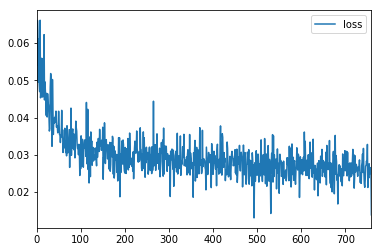

In [44]:
tuning_hidden_tanh(50)

## conclusion
The best result of recomended on the output of AE directly is ** ReLU with 2750 hidden neurons, perf.: (0.8252, 0.1062)**


    Net (
      (encoder): Linear (6040 -> 2750)
      (relu): ReLU ()
      (decoder): Linear (2750 -> 6040)
    )


# CF on hidden layer

## CF class

In [45]:
from __future__ import  print_function

import numpy as np
from scipy.spatial import distance

from scipy.io import mmread
from scipy.sparse import  csr_matrix
from sklearn.metrics.pairwise import pairwise_distances
import os

# del IBCF
class IBCF():
    def __init__(self, sim, knn, topk):
        self.sim = sim
        self.knn = knn
        self.topk = topk

    def asymcos(self,u,v,alpha = 0.2):
        result = u.dot(v).astype(np.float32)
        result = result/ ((np.power(u.dot(u),alpha)).dot(np.power((v.dot(v),1-alpha))))
        return  result

    def psim(self,X,metric='cosine'):
        sim = np.zeros((X.shape[0], X.shape[0]))
        if metric == 'dot':
            sim = X.dot(X.T)
        elif metric == 'asymcos':
            for i in xrange(X.shape[0]):
                for j in xrange(X.shape[0]):
                    u = X[i,:]
                    v = X[j,:]
                    sim[i,j] = self.asymcos(u,v,alpha=0.2)
        else:
            sim = 1-pairwise_distances(X,metric=self.sim,n_jobs=10)
        return sim

    def fit(self,X):
        self.X = X
        self.similarities_ = self.psim(X,metric=self.sim)
#         self.similarities_ = pairwise_distances(X,metric=self.sim,n_jobs=10) * 0.3
        self.item_neighbors_ = dict()
#         item_num = X.shape[1]
        self.item_num = X.shape[0]
        for i in xrange(self.item_num):
#             self.item_neighbors_[i] = np.argpartition(self.similarities_[i, :], -1 * self.knn)
            self.similarities_[i,i] = 0
#             import pdb; pdb.set_trace()

            self.item_neighbors_[i] = np.argpartition(self.similarities_[i, :],self.item_num-self.knn)[-self.knn:]
            
#             import pdb; pdb.set_trace()
        return self

    def predict(self, targets):
        self.prediction_ = np.zeros_like(self.X)
        self.recommendation_ = dict()
        self.targets = targets
        for user in targets:
            # self.purchased_items = self.X[:, user].nonzero()[0]
#             purchased_items = self.X[:, user].nonzero()[0]
            for i in xrange(self.item_num):
                neighbors = self.item_neighbors_[i]
                self.prediction_[i,user] = self.X[neighbors, user].dot(self.similarities_[neighbors,i])
            purchased_items = self.X[:, user].nonzero()[0]
            self.prediction_[purchased_items,user] = 0
            s = self.prediction_[:,user].shape
#             self.prediction_[:,user] = np.random.random(size=s)

            self.recommendation_[user] = np.argpartition(self.prediction_[:,user],self.item_num - self.topk)[-1*self.topk:]
#             import pdb; pdb.set_trace()
            
#             print(user, self.recommendation_[user])
        return self

    def evaluate(self, test):
        self.user_perf = dict()
        for u in self.targets:
            y_true = test[u].nonzero()[0]
            y_pred = self.recommendation_[u]
            right_rec = len(set(y_true).intersection(set(y_pred))) * 1.0
            precision = right_rec / self.topk
            recall = right_rec / len(y_true)
            self.user_perf[u] = (precision,recall)
        self.precision_ = np.average([i[0] for i in self.user_perf.values()])
        self.recall_ = np.average([i[1] for i in self.user_perf.values()])
        return self.precision_, self.recall_
 

In [58]:


def get_hidden_relu(hidden_size):

    class Net(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(Net, self).__init__()
            self.encoder = nn.Linear(input_size, hidden_size)
            self.relu = nn.ReLU()
            self.decoder = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            out = self.encoder(x)
            out = self.relu(out)
            self.hidden_relu = out.clone()
            out = self.decoder(out)
            return out



    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(dataset.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(dataset.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(dataset.test_dataset.data)
    
    hidden_relu = np.zeros((dataset.test_dataset.data.shape[1], hidden_size))
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(dataset.test_dataset.data.shape[1]):
        sample = Variable(torch.from_numpy(dataset.test_dataset.test[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
        hidden_relu[item_id, :] = net.hidden_relu.data.numpy()
#     import rec 
#     reload(rec)
#     r = rec.Rec(topk = 5)
#     r.fit(dataset.train_dataset.train.T)
#     t = predicted.T
#     r.predict( t,dataset.test_dataset.targets)
#     print (r.evaluate(dataset.test_dataset.test))
    return hidden_relu

# from scipy.io import mmread
# import os
# DATA_DIR = './ml-1m-5cv'
# for cv in xrange(5):
#     print(cv,':',end=' ')



In [47]:
def cf_on_hidden_layer(knn, hidden_layers):
    train = hidden_layers
    test = dataset.test_dataset.data
    targets = np.unique(test.nonzero()[0])
    cf = IBCF(sim='cosine',knn=knn,topk=5)
# #     precision, recall = cf.score(train.T, test)
# #     print(precision,recall)
    cf.fit(predicted.T)
    cf.predict(targets)
    print (knn,cf.evaluate(test) )

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0432
Epoch [1/20], Step [2/38], Loss: 0.0384
Epoch [1/20], Step [3/38], Loss: 0.0380
Epoch [1/20], Step [4/38], Loss: 0.0376
Epoch [1/20], Step [5/38], Loss: 0.0405
Epoch [1/20], Step [6/38], Loss: 0.0312
Epoch [1/20], Step [7/38], Loss: 0.0327
Epoch [1/20], Step [8/38], Loss: 0.0369
Epoch [1/20], Step [9/38], Loss: 0.0317
Epoch [1/20], Step [10/38], Loss: 0.0292
Epoch [1/20], Step [11/38], Loss: 0.0392
Epoch [1/20], Step [12/38], Loss: 0.0327
Epoch [1/20], Step [13/38], Loss: 0.0288
Epoch [1/20], Step [14/38], Loss: 0.0309
Epoch [1/20], Step [15/38], Loss: 0.0286
Epoch [1/20], Step [16/38], Loss: 0.0295
Epoch [1/20], Step [17/38], Loss: 0.0327
Epoch [1/20], Step [18/38], Loss: 0.0252
Epoch [1/20], Step [19/38], Loss: 0.0303
Epoch [1/20], Step [20/38], Loss: 0.0281
Epoch [1/20], Step [21/38], Loss: 0.0325
Epoch [1/20], Step [22/38], Loss: 0.0327
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0187
Epoch [6/20], Step [11/38], Loss: 0.0188
Epoch [6/20], Step [12/38], Loss: 0.0175
Epoch [6/20], Step [13/38], Loss: 0.0198
Epoch [6/20], Step [14/38], Loss: 0.0207
Epoch [6/20], Step [15/38], Loss: 0.0195
Epoch [6/20], Step [16/38], Loss: 0.0219
Epoch [6/20], Step [17/38], Loss: 0.0185
Epoch [6/20], Step [18/38], Loss: 0.0186
Epoch [6/20], Step [19/38], Loss: 0.0176
Epoch [6/20], Step [20/38], Loss: 0.0213
Epoch [6/20], Step [21/38], Loss: 0.0196
Epoch [6/20], Step [22/38], Loss: 0.0188
Epoch [6/20], Step [23/38], Loss: 0.0223
Epoch [6/20], Step [24/38], Loss: 0.0177
Epoch [6/20], Step [25/38], Loss: 0.0179
Epoch [6/20], Step [26/38], Loss: 0.0188
Epoch [6/20], Step [27/38], Loss: 0.0206
Epoch [6/20], Step [28/38], Loss: 0.0186
Epoch [6/20], Step [29/38], Loss: 0.0216
Epoch [6/20], Step [30/38], Loss: 0.0194
Epoch [6/20], Step [31/38], Loss: 0.0179
Epoch [6/20], Step [32/38], Loss: 0.0221
Epoch [6/20], Step [33/38], Loss: 0.0230
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0199
Epoch [11/20], Step [21/38], Loss: 0.0153
Epoch [11/20], Step [22/38], Loss: 0.0133
Epoch [11/20], Step [23/38], Loss: 0.0163
Epoch [11/20], Step [24/38], Loss: 0.0158
Epoch [11/20], Step [25/38], Loss: 0.0170
Epoch [11/20], Step [26/38], Loss: 0.0158
Epoch [11/20], Step [27/38], Loss: 0.0178
Epoch [11/20], Step [28/38], Loss: 0.0141
Epoch [11/20], Step [29/38], Loss: 0.0191
Epoch [11/20], Step [30/38], Loss: 0.0190
Epoch [11/20], Step [31/38], Loss: 0.0169
Epoch [11/20], Step [32/38], Loss: 0.0140
Epoch [11/20], Step [33/38], Loss: 0.0159
Epoch [11/20], Step [34/38], Loss: 0.0158
Epoch [11/20], Step [35/38], Loss: 0.0205
Epoch [11/20], Step [36/38], Loss: 0.0175
Epoch [11/20], Step [37/38], Loss: 0.0156
Epoch [11/20], Step [38/38], Loss: 0.0180
Epoch [12/20], Step [1/38], Loss: 0.0130
Epoch [12/20], Step [2/38], Loss: 0.0134
Epoch [12/20], Step [3/38], Loss: 0.0160
Epoch [12/20], Step [4/38], Loss: 0.0138
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0133
Epoch [16/20], Step [28/38], Loss: 0.0135
Epoch [16/20], Step [29/38], Loss: 0.0138
Epoch [16/20], Step [30/38], Loss: 0.0134
Epoch [16/20], Step [31/38], Loss: 0.0126
Epoch [16/20], Step [32/38], Loss: 0.0151
Epoch [16/20], Step [33/38], Loss: 0.0153
Epoch [16/20], Step [34/38], Loss: 0.0139
Epoch [16/20], Step [35/38], Loss: 0.0145
Epoch [16/20], Step [36/38], Loss: 0.0147
Epoch [16/20], Step [37/38], Loss: 0.0118
Epoch [16/20], Step [38/38], Loss: 0.0088
Epoch [17/20], Step [1/38], Loss: 0.0110
Epoch [17/20], Step [2/38], Loss: 0.0114
Epoch [17/20], Step [3/38], Loss: 0.0120
Epoch [17/20], Step [4/38], Loss: 0.0128
Epoch [17/20], Step [5/38], Loss: 0.0114
Epoch [17/20], Step [6/38], Loss: 0.0104
Epoch [17/20], Step [7/38], Loss: 0.0121
Epoch [17/20], Step [8/38], Loss: 0.0117
Epoch [17/20], Step [9/38], Loss: 0.0111
Epoch [17/20], Step [10/38], Loss: 0.0134
Epoch [17/20], Step [11/38], Loss: 0.0128
Epoch [17/20], Step [12/38], Loss: 0.0152
E

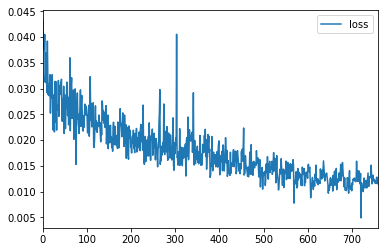

In [59]:
x = get_hidden_relu(2750)
print(x)

In [60]:
hidden_layer = x.copy()

In [61]:
cf_on_hidden_layer(450,x)

(0.043344370860927156, 0.0013859695227968047)


In [ ]:
def find_knn(knn):
    cf_on_hidden_layer(knn,x)

from multiprocessing import  Pool
p = Pool(5)
p.map(find_knn,[100, 500, 1000, 1500,2000])

/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/lanxiang/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_j

(0.043344370860927156, 0.0013859695227968047)


Process PoolWorker-1740:
Process PoolWorker-1743:
Process PoolWorker-1739:
Process PoolWorker-1741:
Process PoolWorker-1742:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lanxiang/mi

In [178]:
x.shape

(3706, 900)

In [95]:
for test_uid in (dataset.test_dataset.targets):
    if test_uid > 3706:
        print(test_uid)

3725
3728
3740
3748
3749
3753
3758
3780
3786
3791
3796
3797
3801
3820
3839
3842
3845
3849
3856
3882
3896
3931
3949
3950
3957
3959
3961
3970
3974
3980
3987
3989
3995
3998
4012
4022
4046
4053
4060
4074
4077
4105
4110
4113
4115
4119
4135
4141
4146
4157
4159
4160
4232
4248
4256
4257
4315
4317
4334
4340
4356
4362
4379
4380
4382
4384
4406
4407
4416
4420
4428
4433
4447
4448
4476
4494
4495
4501
4502
4523
4525
4529
4533
4549
4552
4568
4570
4575
4577
4584
4597
4601
4605
4626
4648
4654
4659
4660
4665
4691
4693
4698
4699
4706
4731
4750
4762
4764
4777
4806
4843
4850
4898
4940
4948
4959
4962
4965
4974
4976
4982
5026
5035
5042
5068
5080
5082
5090
5095
5109
5114
5128
5136
5141
5159
5162
5172
5185
5211
5230
5249
5257
5258
5262
5278
5300
5302
5319
5334
5340
5358
5363
5391
5432
5446
5449
5480
5494
5506
5514
5515
5521
5526
5556
5557
5561
5567
5572
5595
5606
5608
5609
5616
5629
5639
5669
5670
5675
5687
5694
5696
5697
5712
5747
5756
5764
5765
5779
5788
5793
5803
5812
5814
5836
5841
5853
5860
5875
5890
5923


In [95]:
for test_uid in (dataset.test_dataset.targets):
    if test_uid > 3706:
        print(test_uid)

3725
3728
3740
3748
3749
3753
3758
3780
3786
3791
3796
3797
3801
3820
3839
3842
3845
3849
3856
3882
3896
3931
3949
3950
3957
3959
3961
3970
3974
3980
3987
3989
3995
3998
4012
4022
4046
4053
4060
4074
4077
4105
4110
4113
4115
4119
4135
4141
4146
4157
4159
4160
4232
4248
4256
4257
4315
4317
4334
4340
4356
4362
4379
4380
4382
4384
4406
4407
4416
4420
4428
4433
4447
4448
4476
4494
4495
4501
4502
4523
4525
4529
4533
4549
4552
4568
4570
4575
4577
4584
4597
4601
4605
4626
4648
4654
4659
4660
4665
4691
4693
4698
4699
4706
4731
4750
4762
4764
4777
4806
4843
4850
4898
4940
4948
4959
4962
4965
4974
4976
4982
5026
5035
5042
5068
5080
5082
5090
5095
5109
5114
5128
5136
5141
5159
5162
5172
5185
5211
5230
5249
5257
5258
5262
5278
5300
5302
5319
5334
5340
5358
5363
5391
5432
5446
5449
5480
5494
5506
5514
5515
5521
5526
5556
5557
5561
5567
5572
5595
5606
5608
5609
5616
5629
5639
5669
5670
5675
5687
5694
5696
5697
5712
5747
5756
5764
5765
5779
5788
5793
5803
5812
5814
5836
5841
5853
5860
5875
5890
5923


In [75]:
sum(train_dataset.targets == test_dataset.targets)

604

In [77]:
dataset.test_dataset[2]

{'id': 2, 'sample': array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)}

In [28]:
data = dataset.load_data(cv=0)

In [41]:
import dataset
reload(dataset)
cv = 0
data = dataset.load_data(cv=cv)

# simgoid output and BCE loss

In [49]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.encoder(x)
        out = self.relu(out)
        out = self.decoder(out)
        out = self.sigmoid(out)
        return out
    
    
def foo_bceloss(size_of_hidden):
    input_size = 6040
    hidden_size = size_of_hidden
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
#             import pdb; pdb
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(data.test_dataset.data)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.test_dataset.data.shape[1]):
        sample = Variable(torch.from_numpy(data.test_dataset.test[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
#     predict on output
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    print (r.evaluate(data.test_dataset.test))
    return net

In [46]:
foo_bceloss(2750)

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
  (sigmoid): Sigmoid ()
)
Epoch [1/20], Step [1/38], Loss: 0.6929
Epoch [1/20], Step [2/38], Loss: 0.6281
Epoch [1/20], Step [3/38], Loss: 0.5534
Epoch [1/20], Step [4/38], Loss: 0.4678
Epoch [1/20], Step [5/38], Loss: 0.4203
Epoch [1/20], Step [6/38], Loss: 0.4076
Epoch [1/20], Step [7/38], Loss: 0.5551
Epoch [1/20], Step [8/38], Loss: 0.3569
Epoch [1/20], Step [9/38], Loss: 0.3091
Epoch [1/20], Step [10/38], Loss: 0.3094
Epoch [1/20], Step [11/38], Loss: 0.3081
Epoch [1/20], Step [12/38], Loss: 0.3094
Epoch [1/20], Step [13/38], Loss: 0.2499
Epoch [1/20], Step [14/38], Loss: 0.2383
Epoch [1/20], Step [15/38], Loss: 0.2355
Epoch [1/20], Step [16/38], Loss: 0.2258
Epoch [1/20], Step [17/38], Loss: 0.1840
Epoch [1/20], Step [18/38], Loss: 0.2256
Epoch [1/20], Step [19/38], Loss: 0.1856
Epoch [1/20], Step [20/38], Loss: 0.1956
Epoch [1/20], Step [21/38], Loss: 0.2018
Epoch [1/20], Step [22/38], 

Epoch [6/20], Step [10/38], Loss: 0.0671
Epoch [6/20], Step [11/38], Loss: 0.0792
Epoch [6/20], Step [12/38], Loss: 0.0805
Epoch [6/20], Step [13/38], Loss: 0.0791
Epoch [6/20], Step [14/38], Loss: 0.0685
Epoch [6/20], Step [15/38], Loss: 0.0740
Epoch [6/20], Step [16/38], Loss: 0.0847
Epoch [6/20], Step [17/38], Loss: 0.0740
Epoch [6/20], Step [18/38], Loss: 0.0742
Epoch [6/20], Step [19/38], Loss: 0.0891
Epoch [6/20], Step [20/38], Loss: 0.0877
Epoch [6/20], Step [21/38], Loss: 0.0763
Epoch [6/20], Step [22/38], Loss: 0.0773
Epoch [6/20], Step [23/38], Loss: 0.0673
Epoch [6/20], Step [24/38], Loss: 0.0796
Epoch [6/20], Step [25/38], Loss: 0.0704
Epoch [6/20], Step [26/38], Loss: 0.0762
Epoch [6/20], Step [27/38], Loss: 0.0772
Epoch [6/20], Step [28/38], Loss: 0.0727
Epoch [6/20], Step [29/38], Loss: 0.0744
Epoch [6/20], Step [30/38], Loss: 0.0689
Epoch [6/20], Step [31/38], Loss: 0.0740
Epoch [6/20], Step [32/38], Loss: 0.0795
Epoch [6/20], Step [33/38], Loss: 0.0848
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0522
Epoch [11/20], Step [21/38], Loss: 0.0443
Epoch [11/20], Step [22/38], Loss: 0.0557
Epoch [11/20], Step [23/38], Loss: 0.0423
Epoch [11/20], Step [24/38], Loss: 0.0542
Epoch [11/20], Step [25/38], Loss: 0.0471
Epoch [11/20], Step [26/38], Loss: 0.0545
Epoch [11/20], Step [27/38], Loss: 0.0503
Epoch [11/20], Step [28/38], Loss: 0.0534
Epoch [11/20], Step [29/38], Loss: 0.0558
Epoch [11/20], Step [30/38], Loss: 0.0545
Epoch [11/20], Step [31/38], Loss: 0.0507
Epoch [11/20], Step [32/38], Loss: 0.0542
Epoch [11/20], Step [33/38], Loss: 0.0503
Epoch [11/20], Step [34/38], Loss: 0.0548
Epoch [11/20], Step [35/38], Loss: 0.0489
Epoch [11/20], Step [36/38], Loss: 0.0544
Epoch [11/20], Step [37/38], Loss: 0.0488
Epoch [11/20], Step [38/38], Loss: 0.0169
Epoch [12/20], Step [1/38], Loss: 0.0395
Epoch [12/20], Step [2/38], Loss: 0.0445
Epoch [12/20], Step [3/38], Loss: 0.0480
Epoch [12/20], Step [4/38], Loss: 0.0479
Epoch [12/20], Step [5/38], Loss: 0.04

Epoch [16/20], Step [27/38], Loss: 0.0260
Epoch [16/20], Step [28/38], Loss: 0.0266
Epoch [16/20], Step [29/38], Loss: 0.0240
Epoch [16/20], Step [30/38], Loss: 0.0256
Epoch [16/20], Step [31/38], Loss: 0.0295
Epoch [16/20], Step [32/38], Loss: 0.0259
Epoch [16/20], Step [33/38], Loss: 0.0231
Epoch [16/20], Step [34/38], Loss: 0.0245
Epoch [16/20], Step [35/38], Loss: 0.0255
Epoch [16/20], Step [36/38], Loss: 0.0261
Epoch [16/20], Step [37/38], Loss: 0.0262
Epoch [16/20], Step [38/38], Loss: 0.0249
Epoch [17/20], Step [1/38], Loss: 0.0219
Epoch [17/20], Step [2/38], Loss: 0.0198
Epoch [17/20], Step [3/38], Loss: 0.0223
Epoch [17/20], Step [4/38], Loss: 0.0203
Epoch [17/20], Step [5/38], Loss: 0.0186
Epoch [17/20], Step [6/38], Loss: 0.0194
Epoch [17/20], Step [7/38], Loss: 0.0235
Epoch [17/20], Step [8/38], Loss: 0.0200
Epoch [17/20], Step [9/38], Loss: 0.0209
Epoch [17/20], Step [10/38], Loss: 0.0202
Epoch [17/20], Step [11/38], Loss: 0.0207
Epoch [17/20], Step [12/38], Loss: 0.0191
E

NameError: name 'net' is not defined

In [18]:
def foo(size_of_hidden):
    input_size = 6040
    hidden_size = size_of_hidden
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot()
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(dataset.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_loader.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    print (r.evaluate(data.test_dataset.test))
    return net

In [3]:
def bar(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot(title=str(net))
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    print (hidden_size, r.evaluate(data.test_dataset.test))
#     return net


Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0590
Epoch [1/20], Step [2/38], Loss: 0.0393
Epoch [1/20], Step [3/38], Loss: 0.0503
Epoch [1/20], Step [4/38], Loss: 0.0451
Epoch [1/20], Step [5/38], Loss: 0.0429
Epoch [1/20], Step [6/38], Loss: 0.0392
Epoch [1/20], Step [7/38], Loss: 0.0465
Epoch [1/20], Step [8/38], Loss: 0.0284
Epoch [1/20], Step [9/38], Loss: 0.0256
Epoch [1/20], Step [10/38], Loss: 0.0331
Epoch [1/20], Step [11/38], Loss: 0.0292
Epoch [1/20], Step [12/38], Loss: 0.0331
Epoch [1/20], Step [13/38], Loss: 0.0305
Epoch [1/20], Step [14/38], Loss: 0.0375
Epoch [1/20], Step [15/38], Loss: 0.0363
Epoch [1/20], Step [16/38], Loss: 0.0380
Epoch [1/20], Step [17/38], Loss: 0.0369
Epoch [1/20], Step [18/38], Loss: 0.0307
Epoch [1/20], Step [19/38], Loss: 0.0347
Epoch [1/20], Step [20/38], Loss: 0.0298
Epoch [1/20], Step [21/38], Loss: 0.0352
Epoch [1/20], Step [22/38], Loss: 0.0329
Epoch [1/20],

Epoch [6/20], Step [10/38], Loss: 0.0268
Epoch [6/20], Step [11/38], Loss: 0.0244
Epoch [6/20], Step [12/38], Loss: 0.0256
Epoch [6/20], Step [13/38], Loss: 0.0266
Epoch [6/20], Step [14/38], Loss: 0.0278
Epoch [6/20], Step [15/38], Loss: 0.0204
Epoch [6/20], Step [16/38], Loss: 0.0243
Epoch [6/20], Step [17/38], Loss: 0.0239
Epoch [6/20], Step [18/38], Loss: 0.0222
Epoch [6/20], Step [19/38], Loss: 0.0272
Epoch [6/20], Step [20/38], Loss: 0.0250
Epoch [6/20], Step [21/38], Loss: 0.0206
Epoch [6/20], Step [22/38], Loss: 0.0276
Epoch [6/20], Step [23/38], Loss: 0.0223
Epoch [6/20], Step [24/38], Loss: 0.0222
Epoch [6/20], Step [25/38], Loss: 0.0238
Epoch [6/20], Step [26/38], Loss: 0.0263
Epoch [6/20], Step [27/38], Loss: 0.0223
Epoch [6/20], Step [28/38], Loss: 0.0240
Epoch [6/20], Step [29/38], Loss: 0.0306
Epoch [6/20], Step [30/38], Loss: 0.0241
Epoch [6/20], Step [31/38], Loss: 0.0243
Epoch [6/20], Step [32/38], Loss: 0.0266
Epoch [6/20], Step [33/38], Loss: 0.0202
Epoch [6/20], St

Epoch [11/20], Step [22/38], Loss: 0.0256
Epoch [11/20], Step [23/38], Loss: 0.0211
Epoch [11/20], Step [24/38], Loss: 0.0213
Epoch [11/20], Step [25/38], Loss: 0.0233
Epoch [11/20], Step [26/38], Loss: 0.0206
Epoch [11/20], Step [27/38], Loss: 0.0291
Epoch [11/20], Step [28/38], Loss: 0.0216
Epoch [11/20], Step [29/38], Loss: 0.0272
Epoch [11/20], Step [30/38], Loss: 0.0212
Epoch [11/20], Step [31/38], Loss: 0.0264
Epoch [11/20], Step [32/38], Loss: 0.0234
Epoch [11/20], Step [33/38], Loss: 0.0240
Epoch [11/20], Step [34/38], Loss: 0.0262
Epoch [11/20], Step [35/38], Loss: 0.0230
Epoch [11/20], Step [36/38], Loss: 0.0266
Epoch [11/20], Step [37/38], Loss: 0.0239
Epoch [11/20], Step [38/38], Loss: 0.0286
Epoch [12/20], Step [1/38], Loss: 0.0192
Epoch [12/20], Step [2/38], Loss: 0.0239
Epoch [12/20], Step [3/38], Loss: 0.0218
Epoch [12/20], Step [4/38], Loss: 0.0225
Epoch [12/20], Step [5/38], Loss: 0.0252
Epoch [12/20], Step [6/38], Loss: 0.0221
Epoch [12/20], Step [7/38], Loss: 0.0205

Epoch [16/20], Step [31/38], Loss: 0.0227
Epoch [16/20], Step [32/38], Loss: 0.0220
Epoch [16/20], Step [33/38], Loss: 0.0223
Epoch [16/20], Step [34/38], Loss: 0.0259
Epoch [16/20], Step [35/38], Loss: 0.0221
Epoch [16/20], Step [36/38], Loss: 0.0220
Epoch [16/20], Step [37/38], Loss: 0.0244
Epoch [16/20], Step [38/38], Loss: 0.0216
Epoch [17/20], Step [1/38], Loss: 0.0210
Epoch [17/20], Step [2/38], Loss: 0.0230
Epoch [17/20], Step [3/38], Loss: 0.0208
Epoch [17/20], Step [4/38], Loss: 0.0181
Epoch [17/20], Step [5/38], Loss: 0.0238
Epoch [17/20], Step [6/38], Loss: 0.0200
Epoch [17/20], Step [7/38], Loss: 0.0226
Epoch [17/20], Step [8/38], Loss: 0.0217
Epoch [17/20], Step [9/38], Loss: 0.0233
Epoch [17/20], Step [10/38], Loss: 0.0204
Epoch [17/20], Step [11/38], Loss: 0.0296
Epoch [17/20], Step [12/38], Loss: 0.0239
Epoch [17/20], Step [13/38], Loss: 0.0210
Epoch [17/20], Step [14/38], Loss: 0.0205
Epoch [17/20], Step [15/38], Loss: 0.0221
Epoch [17/20], Step [16/38], Loss: 0.0245
E

Epoch [1/20], Step [35/38], Loss: 0.0284
Epoch [1/20], Step [36/38], Loss: 0.0303
Epoch [1/20], Step [37/38], Loss: 0.0290
Epoch [1/20], Step [38/38], Loss: 0.0116
Epoch [2/20], Step [1/38], Loss: 0.0360
Epoch [2/20], Step [2/38], Loss: 0.0316
Epoch [2/20], Step [3/38], Loss: 0.0265
Epoch [2/20], Step [4/38], Loss: 0.0335
Epoch [2/20], Step [5/38], Loss: 0.0367
Epoch [2/20], Step [6/38], Loss: 0.0283
Epoch [2/20], Step [7/38], Loss: 0.0228
Epoch [2/20], Step [8/38], Loss: 0.0302
Epoch [2/20], Step [9/38], Loss: 0.0292
Epoch [2/20], Step [10/38], Loss: 0.0304
Epoch [2/20], Step [11/38], Loss: 0.0310
Epoch [2/20], Step [12/38], Loss: 0.0361
Epoch [2/20], Step [13/38], Loss: 0.0214
Epoch [2/20], Step [14/38], Loss: 0.0250
Epoch [2/20], Step [15/38], Loss: 0.0234
Epoch [2/20], Step [16/38], Loss: 0.0273
Epoch [2/20], Step [17/38], Loss: 0.0321
Epoch [2/20], Step [18/38], Loss: 0.0373
Epoch [2/20], Step [19/38], Loss: 0.0257
Epoch [2/20], Step [20/38], Loss: 0.0283
Epoch [2/20], Step [21/38

Epoch [7/20], Step [9/38], Loss: 0.0178
Epoch [7/20], Step [10/38], Loss: 0.0217
Epoch [7/20], Step [11/38], Loss: 0.0205
Epoch [7/20], Step [12/38], Loss: 0.0204
Epoch [7/20], Step [13/38], Loss: 0.0197
Epoch [7/20], Step [14/38], Loss: 0.0254
Epoch [7/20], Step [15/38], Loss: 0.0220
Epoch [7/20], Step [16/38], Loss: 0.0195
Epoch [7/20], Step [17/38], Loss: 0.0237
Epoch [7/20], Step [18/38], Loss: 0.0216
Epoch [7/20], Step [19/38], Loss: 0.0242
Epoch [7/20], Step [20/38], Loss: 0.0239
Epoch [7/20], Step [21/38], Loss: 0.0228
Epoch [7/20], Step [22/38], Loss: 0.0228
Epoch [7/20], Step [23/38], Loss: 0.0262
Epoch [7/20], Step [24/38], Loss: 0.0235
Epoch [7/20], Step [25/38], Loss: 0.0210
Epoch [7/20], Step [26/38], Loss: 0.0234
Epoch [7/20], Step [27/38], Loss: 0.0234
Epoch [7/20], Step [28/38], Loss: 0.0195
Epoch [7/20], Step [29/38], Loss: 0.0236
Epoch [7/20], Step [30/38], Loss: 0.0254
Epoch [7/20], Step [31/38], Loss: 0.0250
Epoch [7/20], Step [32/38], Loss: 0.0254
Epoch [7/20], Ste

Epoch [12/20], Step [19/38], Loss: 0.0194
Epoch [12/20], Step [20/38], Loss: 0.0194
Epoch [12/20], Step [21/38], Loss: 0.0200
Epoch [12/20], Step [22/38], Loss: 0.0228
Epoch [12/20], Step [23/38], Loss: 0.0188
Epoch [12/20], Step [24/38], Loss: 0.0207
Epoch [12/20], Step [25/38], Loss: 0.0178
Epoch [12/20], Step [26/38], Loss: 0.0200
Epoch [12/20], Step [27/38], Loss: 0.0254
Epoch [12/20], Step [28/38], Loss: 0.0216
Epoch [12/20], Step [29/38], Loss: 0.0174
Epoch [12/20], Step [30/38], Loss: 0.0206
Epoch [12/20], Step [31/38], Loss: 0.0223
Epoch [12/20], Step [32/38], Loss: 0.0184
Epoch [12/20], Step [33/38], Loss: 0.0214
Epoch [12/20], Step [34/38], Loss: 0.0203
Epoch [12/20], Step [35/38], Loss: 0.0208
Epoch [12/20], Step [36/38], Loss: 0.0217
Epoch [12/20], Step [37/38], Loss: 0.0236
Epoch [12/20], Step [38/38], Loss: 0.0195
Epoch [13/20], Step [1/38], Loss: 0.0184
Epoch [13/20], Step [2/38], Loss: 0.0186
Epoch [13/20], Step [3/38], Loss: 0.0183
Epoch [13/20], Step [4/38], Loss: 0.0

Epoch [17/20], Step [26/38], Loss: 0.0176
Epoch [17/20], Step [27/38], Loss: 0.0144
Epoch [17/20], Step [28/38], Loss: 0.0203
Epoch [17/20], Step [29/38], Loss: 0.0213
Epoch [17/20], Step [30/38], Loss: 0.0188
Epoch [17/20], Step [31/38], Loss: 0.0220
Epoch [17/20], Step [32/38], Loss: 0.0206
Epoch [17/20], Step [33/38], Loss: 0.0223
Epoch [17/20], Step [34/38], Loss: 0.0171
Epoch [17/20], Step [35/38], Loss: 0.0206
Epoch [17/20], Step [36/38], Loss: 0.0211
Epoch [17/20], Step [37/38], Loss: 0.0175
Epoch [17/20], Step [38/38], Loss: 0.0151
Epoch [18/20], Step [1/38], Loss: 0.0198
Epoch [18/20], Step [2/38], Loss: 0.0172
Epoch [18/20], Step [3/38], Loss: 0.0175
Epoch [18/20], Step [4/38], Loss: 0.0163
Epoch [18/20], Step [5/38], Loss: 0.0199
Epoch [18/20], Step [6/38], Loss: 0.0212
Epoch [18/20], Step [7/38], Loss: 0.0183
Epoch [18/20], Step [8/38], Loss: 0.0187
Epoch [18/20], Step [9/38], Loss: 0.0178
Epoch [18/20], Step [10/38], Loss: 0.0184
Epoch [18/20], Step [11/38], Loss: 0.0176
E

Epoch [2/20], Step [31/38], Loss: 0.0315
Epoch [2/20], Step [32/38], Loss: 0.0255
Epoch [2/20], Step [33/38], Loss: 0.0212
Epoch [2/20], Step [34/38], Loss: 0.0234
Epoch [2/20], Step [35/38], Loss: 0.0285
Epoch [2/20], Step [36/38], Loss: 0.0272
Epoch [2/20], Step [37/38], Loss: 0.0271
Epoch [2/20], Step [38/38], Loss: 0.0849
Epoch [3/20], Step [1/38], Loss: 0.0216
Epoch [3/20], Step [2/38], Loss: 0.0317
Epoch [3/20], Step [3/38], Loss: 0.0321
Epoch [3/20], Step [4/38], Loss: 0.0286
Epoch [3/20], Step [5/38], Loss: 0.0254
Epoch [3/20], Step [6/38], Loss: 0.0292
Epoch [3/20], Step [7/38], Loss: 0.0249
Epoch [3/20], Step [8/38], Loss: 0.0254
Epoch [3/20], Step [9/38], Loss: 0.0285
Epoch [3/20], Step [10/38], Loss: 0.0275
Epoch [3/20], Step [11/38], Loss: 0.0257
Epoch [3/20], Step [12/38], Loss: 0.0298
Epoch [3/20], Step [13/38], Loss: 0.0311
Epoch [3/20], Step [14/38], Loss: 0.0297
Epoch [3/20], Step [15/38], Loss: 0.0231
Epoch [3/20], Step [16/38], Loss: 0.0230
Epoch [3/20], Step [17/38

Epoch [8/20], Step [4/38], Loss: 0.0224
Epoch [8/20], Step [5/38], Loss: 0.0211
Epoch [8/20], Step [6/38], Loss: 0.0174
Epoch [8/20], Step [7/38], Loss: 0.0216
Epoch [8/20], Step [8/38], Loss: 0.0207
Epoch [8/20], Step [9/38], Loss: 0.0180
Epoch [8/20], Step [10/38], Loss: 0.0210
Epoch [8/20], Step [11/38], Loss: 0.0237
Epoch [8/20], Step [12/38], Loss: 0.0198
Epoch [8/20], Step [13/38], Loss: 0.0225
Epoch [8/20], Step [14/38], Loss: 0.0207
Epoch [8/20], Step [15/38], Loss: 0.0198
Epoch [8/20], Step [16/38], Loss: 0.0200
Epoch [8/20], Step [17/38], Loss: 0.0185
Epoch [8/20], Step [18/38], Loss: 0.0245
Epoch [8/20], Step [19/38], Loss: 0.0232
Epoch [8/20], Step [20/38], Loss: 0.0174
Epoch [8/20], Step [21/38], Loss: 0.0220
Epoch [8/20], Step [22/38], Loss: 0.0187
Epoch [8/20], Step [23/38], Loss: 0.0206
Epoch [8/20], Step [24/38], Loss: 0.0195
Epoch [8/20], Step [25/38], Loss: 0.0200
Epoch [8/20], Step [26/38], Loss: 0.0276
Epoch [8/20], Step [27/38], Loss: 0.0199
Epoch [8/20], Step [28

Epoch [13/20], Step [13/38], Loss: 0.0189
Epoch [13/20], Step [14/38], Loss: 0.0178
Epoch [13/20], Step [15/38], Loss: 0.0192
Epoch [13/20], Step [16/38], Loss: 0.0169
Epoch [13/20], Step [17/38], Loss: 0.0177
Epoch [13/20], Step [18/38], Loss: 0.0177
Epoch [13/20], Step [19/38], Loss: 0.0215
Epoch [13/20], Step [20/38], Loss: 0.0178
Epoch [13/20], Step [21/38], Loss: 0.0164
Epoch [13/20], Step [22/38], Loss: 0.0182
Epoch [13/20], Step [23/38], Loss: 0.0168
Epoch [13/20], Step [24/38], Loss: 0.0177
Epoch [13/20], Step [25/38], Loss: 0.0203
Epoch [13/20], Step [26/38], Loss: 0.0166
Epoch [13/20], Step [27/38], Loss: 0.0186
Epoch [13/20], Step [28/38], Loss: 0.0166
Epoch [13/20], Step [29/38], Loss: 0.0217
Epoch [13/20], Step [30/38], Loss: 0.0198
Epoch [13/20], Step [31/38], Loss: 0.0192
Epoch [13/20], Step [32/38], Loss: 0.0176
Epoch [13/20], Step [33/38], Loss: 0.0161
Epoch [13/20], Step [34/38], Loss: 0.0187
Epoch [13/20], Step [35/38], Loss: 0.0185
Epoch [13/20], Step [36/38], Loss:

Epoch [18/20], Step [20/38], Loss: 0.0185
Epoch [18/20], Step [21/38], Loss: 0.0187
Epoch [18/20], Step [22/38], Loss: 0.0196
Epoch [18/20], Step [23/38], Loss: 0.0161
Epoch [18/20], Step [24/38], Loss: 0.0141
Epoch [18/20], Step [25/38], Loss: 0.0171
Epoch [18/20], Step [26/38], Loss: 0.0234
Epoch [18/20], Step [27/38], Loss: 0.0193
Epoch [18/20], Step [28/38], Loss: 0.0174
Epoch [18/20], Step [29/38], Loss: 0.0194
Epoch [18/20], Step [30/38], Loss: 0.0220
Epoch [18/20], Step [31/38], Loss: 0.0209
Epoch [18/20], Step [32/38], Loss: 0.0182
Epoch [18/20], Step [33/38], Loss: 0.0180
Epoch [18/20], Step [34/38], Loss: 0.0155
Epoch [18/20], Step [35/38], Loss: 0.0193
Epoch [18/20], Step [36/38], Loss: 0.0150
Epoch [18/20], Step [37/38], Loss: 0.0162
Epoch [18/20], Step [38/38], Loss: 0.0153
Epoch [19/20], Step [1/38], Loss: 0.0164
Epoch [19/20], Step [2/38], Loss: 0.0144
Epoch [19/20], Step [3/38], Loss: 0.0125
Epoch [19/20], Step [4/38], Loss: 0.0171
Epoch [19/20], Step [5/38], Loss: 0.01

Epoch [3/20], Step [26/38], Loss: 0.0284
Epoch [3/20], Step [27/38], Loss: 0.0314
Epoch [3/20], Step [28/38], Loss: 0.0291
Epoch [3/20], Step [29/38], Loss: 0.0234
Epoch [3/20], Step [30/38], Loss: 0.0231
Epoch [3/20], Step [31/38], Loss: 0.0210
Epoch [3/20], Step [32/38], Loss: 0.0213
Epoch [3/20], Step [33/38], Loss: 0.0251
Epoch [3/20], Step [34/38], Loss: 0.0211
Epoch [3/20], Step [35/38], Loss: 0.0285
Epoch [3/20], Step [36/38], Loss: 0.0230
Epoch [3/20], Step [37/38], Loss: 0.0223
Epoch [3/20], Step [38/38], Loss: 0.0126
Epoch [4/20], Step [1/38], Loss: 0.0240
Epoch [4/20], Step [2/38], Loss: 0.0191
Epoch [4/20], Step [3/38], Loss: 0.0223
Epoch [4/20], Step [4/38], Loss: 0.0228
Epoch [4/20], Step [5/38], Loss: 0.0229
Epoch [4/20], Step [6/38], Loss: 0.0242
Epoch [4/20], Step [7/38], Loss: 0.0280
Epoch [4/20], Step [8/38], Loss: 0.0223
Epoch [4/20], Step [9/38], Loss: 0.0177
Epoch [4/20], Step [10/38], Loss: 0.0258
Epoch [4/20], Step [11/38], Loss: 0.0212
Epoch [4/20], Step [12/38

Epoch [8/20], Step [37/38], Loss: 0.0171
Epoch [8/20], Step [38/38], Loss: 0.0253
Epoch [9/20], Step [1/38], Loss: 0.0164
Epoch [9/20], Step [2/38], Loss: 0.0166
Epoch [9/20], Step [3/38], Loss: 0.0184
Epoch [9/20], Step [4/38], Loss: 0.0156
Epoch [9/20], Step [5/38], Loss: 0.0212
Epoch [9/20], Step [6/38], Loss: 0.0186
Epoch [9/20], Step [7/38], Loss: 0.0202
Epoch [9/20], Step [8/38], Loss: 0.0179
Epoch [9/20], Step [9/38], Loss: 0.0189
Epoch [9/20], Step [10/38], Loss: 0.0176
Epoch [9/20], Step [11/38], Loss: 0.0189
Epoch [9/20], Step [12/38], Loss: 0.0169
Epoch [9/20], Step [13/38], Loss: 0.0168
Epoch [9/20], Step [14/38], Loss: 0.0191
Epoch [9/20], Step [15/38], Loss: 0.0194
Epoch [9/20], Step [16/38], Loss: 0.0163
Epoch [9/20], Step [17/38], Loss: 0.0177
Epoch [9/20], Step [18/38], Loss: 0.0222
Epoch [9/20], Step [19/38], Loss: 0.0171
Epoch [9/20], Step [20/38], Loss: 0.0177
Epoch [9/20], Step [21/38], Loss: 0.0191
Epoch [9/20], Step [22/38], Loss: 0.0188
Epoch [9/20], Step [23/38

Epoch [14/20], Step [7/38], Loss: 0.0133
Epoch [14/20], Step [8/38], Loss: 0.0152
Epoch [14/20], Step [9/38], Loss: 0.0152
Epoch [14/20], Step [10/38], Loss: 0.0165
Epoch [14/20], Step [11/38], Loss: 0.0156
Epoch [14/20], Step [12/38], Loss: 0.0144
Epoch [14/20], Step [13/38], Loss: 0.0162
Epoch [14/20], Step [14/38], Loss: 0.0145
Epoch [14/20], Step [15/38], Loss: 0.0158
Epoch [14/20], Step [16/38], Loss: 0.0174
Epoch [14/20], Step [17/38], Loss: 0.0165
Epoch [14/20], Step [18/38], Loss: 0.0145
Epoch [14/20], Step [19/38], Loss: 0.0176
Epoch [14/20], Step [20/38], Loss: 0.0161
Epoch [14/20], Step [21/38], Loss: 0.0155
Epoch [14/20], Step [22/38], Loss: 0.0158
Epoch [14/20], Step [23/38], Loss: 0.0162
Epoch [14/20], Step [24/38], Loss: 0.0170
Epoch [14/20], Step [25/38], Loss: 0.0166
Epoch [14/20], Step [26/38], Loss: 0.0204
Epoch [14/20], Step [27/38], Loss: 0.0175
Epoch [14/20], Step [28/38], Loss: 0.0173
Epoch [14/20], Step [29/38], Loss: 0.0159
Epoch [14/20], Step [30/38], Loss: 0.

Epoch [19/20], Step [14/38], Loss: 0.0172
Epoch [19/20], Step [15/38], Loss: 0.0151
Epoch [19/20], Step [16/38], Loss: 0.0148
Epoch [19/20], Step [17/38], Loss: 0.0143
Epoch [19/20], Step [18/38], Loss: 0.0158
Epoch [19/20], Step [19/38], Loss: 0.0130
Epoch [19/20], Step [20/38], Loss: 0.0126
Epoch [19/20], Step [21/38], Loss: 0.0146
Epoch [19/20], Step [22/38], Loss: 0.0148
Epoch [19/20], Step [23/38], Loss: 0.0159
Epoch [19/20], Step [24/38], Loss: 0.0173
Epoch [19/20], Step [25/38], Loss: 0.0144
Epoch [19/20], Step [26/38], Loss: 0.0180
Epoch [19/20], Step [27/38], Loss: 0.0160
Epoch [19/20], Step [28/38], Loss: 0.0167
Epoch [19/20], Step [29/38], Loss: 0.0156
Epoch [19/20], Step [30/38], Loss: 0.0140
Epoch [19/20], Step [31/38], Loss: 0.0143
Epoch [19/20], Step [32/38], Loss: 0.0161
Epoch [19/20], Step [33/38], Loss: 0.0164
Epoch [19/20], Step [34/38], Loss: 0.0171
Epoch [19/20], Step [35/38], Loss: 0.0158
Epoch [19/20], Step [36/38], Loss: 0.0188
Epoch [19/20], Step [37/38], Loss:

Epoch [4/20], Step [20/38], Loss: 0.0255
Epoch [4/20], Step [21/38], Loss: 0.0202
Epoch [4/20], Step [22/38], Loss: 0.0244
Epoch [4/20], Step [23/38], Loss: 0.0241
Epoch [4/20], Step [24/38], Loss: 0.0247
Epoch [4/20], Step [25/38], Loss: 0.0236
Epoch [4/20], Step [26/38], Loss: 0.0259
Epoch [4/20], Step [27/38], Loss: 0.0226
Epoch [4/20], Step [28/38], Loss: 0.0228
Epoch [4/20], Step [29/38], Loss: 0.0255
Epoch [4/20], Step [30/38], Loss: 0.0209
Epoch [4/20], Step [31/38], Loss: 0.0235
Epoch [4/20], Step [32/38], Loss: 0.0236
Epoch [4/20], Step [33/38], Loss: 0.0251
Epoch [4/20], Step [34/38], Loss: 0.0193
Epoch [4/20], Step [35/38], Loss: 0.0214
Epoch [4/20], Step [36/38], Loss: 0.0263
Epoch [4/20], Step [37/38], Loss: 0.0214
Epoch [4/20], Step [38/38], Loss: 0.0118
Epoch [5/20], Step [1/38], Loss: 0.0222
Epoch [5/20], Step [2/38], Loss: 0.0217
Epoch [5/20], Step [3/38], Loss: 0.0204
Epoch [5/20], Step [4/38], Loss: 0.0191
Epoch [5/20], Step [5/38], Loss: 0.0201
Epoch [5/20], Step [6

Process Process-623:
Process Process-626:
Process Process-624:
Process Process-625:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap


Epoch [5/20], Step [15/38], Loss: 0.0229


Traceback (most recent call last):
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/lanxiang/miniconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/lanxiang/.local/lib/python2.

KeyboardInterrupt: 

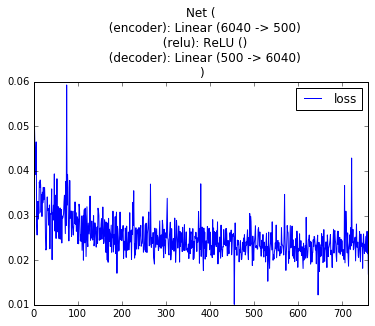

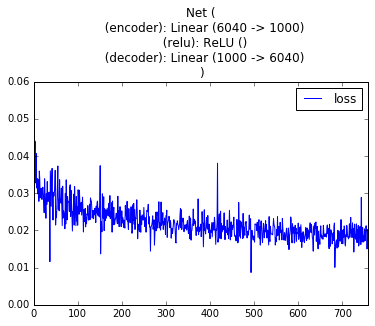

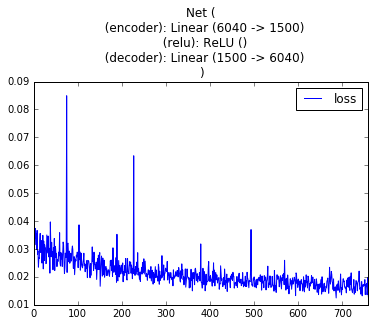

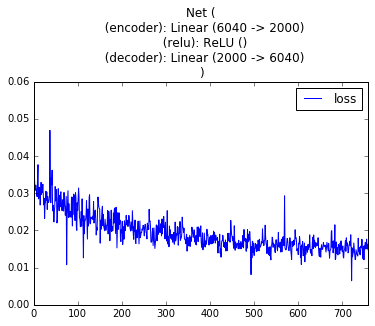

In [42]:
for hs in [500, 1000, 1500, 2000,2500,3000,4000]:
    bar(hs)

result of cell above:
code:

    for hs in [500, 1000, 1500, 2000,2500,3000,4000]:
        bar(hs)
    
results:

    (500, (0.54602649006622517, 0.062234038565737344))
    (1000, (0.45993377483443709, 0.049269584800256963))
    (1500, (0.4397350993377484, 0.047769016589782408))
    (2000, (0.37880794701986759, 0.039453574421210343))

In [114]:
def bar_k(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 20
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
    certeria = nn.MSELoss()*

            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot(title=str(net))
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    perf = r.evaluate(data.test_dataset.test)
    print (hidden_size, perf)
    return net, perf
#     return net


Net (
  (encoder): Linear (6040 -> 32)
  (relu): ReLU ()
  (decoder): Linear (32 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0633
Epoch [1/20], Step [2/38], Loss: 0.0532
Epoch [1/20], Step [3/38], Loss: 0.0481
Epoch [1/20], Step [4/38], Loss: 0.0487
Epoch [1/20], Step [5/38], Loss: 0.0454
Epoch [1/20], Step [6/38], Loss: 0.0570
Epoch [1/20], Step [7/38], Loss: 0.0705
Epoch [1/20], Step [8/38], Loss: 0.0538
Epoch [1/20], Step [9/38], Loss: 0.0605
Epoch [1/20], Step [10/38], Loss: 0.0647
Epoch [1/20], Step [11/38], Loss: 0.0461
Epoch [1/20], Step [12/38], Loss: 0.0545
Epoch [1/20], Step [13/38], Loss: 0.0581
Epoch [1/20], Step [14/38], Loss: 0.0541
Epoch [1/20], Step [15/38], Loss: 0.0494
Epoch [1/20], Step [16/38], Loss: 0.0604
Epoch [1/20], Step [17/38], Loss: 0.0483
Epoch [1/20], Step [18/38], Loss: 0.0470
Epoch [1/20], Step [19/38], Loss: 0.0433
Epoch [1/20], Step [20/38], Loss: 0.0436
Epoch [1/20], Step [21/38], Loss: 0.0526
Epoch [1/20], Step [22/38], Loss: 0.0411
Epoch [1/20], S

Epoch [6/20], Step [16/38], Loss: 0.0331
Epoch [6/20], Step [17/38], Loss: 0.0395
Epoch [6/20], Step [18/38], Loss: 0.0314
Epoch [6/20], Step [19/38], Loss: 0.0289
Epoch [6/20], Step [20/38], Loss: 0.0339
Epoch [6/20], Step [21/38], Loss: 0.0366
Epoch [6/20], Step [22/38], Loss: 0.0303
Epoch [6/20], Step [23/38], Loss: 0.0346
Epoch [6/20], Step [24/38], Loss: 0.0363
Epoch [6/20], Step [25/38], Loss: 0.0421
Epoch [6/20], Step [26/38], Loss: 0.0342
Epoch [6/20], Step [27/38], Loss: 0.0409
Epoch [6/20], Step [28/38], Loss: 0.0329
Epoch [6/20], Step [29/38], Loss: 0.0360
Epoch [6/20], Step [30/38], Loss: 0.0318
Epoch [6/20], Step [31/38], Loss: 0.0330
Epoch [6/20], Step [32/38], Loss: 0.0407
Epoch [6/20], Step [33/38], Loss: 0.0338
Epoch [6/20], Step [34/38], Loss: 0.0304
Epoch [6/20], Step [35/38], Loss: 0.0398
Epoch [6/20], Step [36/38], Loss: 0.0325
Epoch [6/20], Step [37/38], Loss: 0.0316
Epoch [6/20], Step [38/38], Loss: 0.0142
Epoch [7/20], Step [1/38], Loss: 0.0355
Epoch [7/20], Ste

Epoch [11/20], Step [34/38], Loss: 0.0281
Epoch [11/20], Step [35/38], Loss: 0.0338
Epoch [11/20], Step [36/38], Loss: 0.0292
Epoch [11/20], Step [37/38], Loss: 0.0298
Epoch [11/20], Step [38/38], Loss: 0.0622
Epoch [12/20], Step [1/38], Loss: 0.0356
Epoch [12/20], Step [2/38], Loss: 0.0269
Epoch [12/20], Step [3/38], Loss: 0.0349
Epoch [12/20], Step [4/38], Loss: 0.0236
Epoch [12/20], Step [5/38], Loss: 0.0373
Epoch [12/20], Step [6/38], Loss: 0.0362
Epoch [12/20], Step [7/38], Loss: 0.0273
Epoch [12/20], Step [8/38], Loss: 0.0307
Epoch [12/20], Step [9/38], Loss: 0.0316
Epoch [12/20], Step [10/38], Loss: 0.0314
Epoch [12/20], Step [11/38], Loss: 0.0273
Epoch [12/20], Step [12/38], Loss: 0.0318
Epoch [12/20], Step [13/38], Loss: 0.0350
Epoch [12/20], Step [14/38], Loss: 0.0297
Epoch [12/20], Step [15/38], Loss: 0.0309
Epoch [12/20], Step [16/38], Loss: 0.0389
Epoch [12/20], Step [17/38], Loss: 0.0329
Epoch [12/20], Step [18/38], Loss: 0.0274
Epoch [12/20], Step [19/38], Loss: 0.0320
E

Epoch [17/20], Step [16/38], Loss: 0.0293
Epoch [17/20], Step [17/38], Loss: 0.0268
Epoch [17/20], Step [18/38], Loss: 0.0290
Epoch [17/20], Step [19/38], Loss: 0.0333
Epoch [17/20], Step [20/38], Loss: 0.0334
Epoch [17/20], Step [21/38], Loss: 0.0282
Epoch [17/20], Step [22/38], Loss: 0.0270
Epoch [17/20], Step [23/38], Loss: 0.0362
Epoch [17/20], Step [24/38], Loss: 0.0285
Epoch [17/20], Step [25/38], Loss: 0.0351
Epoch [17/20], Step [26/38], Loss: 0.0247
Epoch [17/20], Step [27/38], Loss: 0.0331
Epoch [17/20], Step [28/38], Loss: 0.0322
Epoch [17/20], Step [29/38], Loss: 0.0353
Epoch [17/20], Step [30/38], Loss: 0.0347
Epoch [17/20], Step [31/38], Loss: 0.0316
Epoch [17/20], Step [32/38], Loss: 0.0332
Epoch [17/20], Step [33/38], Loss: 0.0361
Epoch [17/20], Step [34/38], Loss: 0.0312
Epoch [17/20], Step [35/38], Loss: 0.0286
Epoch [17/20], Step [36/38], Loss: 0.0272
Epoch [17/20], Step [37/38], Loss: 0.0260
Epoch [17/20], Step [38/38], Loss: 0.0166
Epoch [18/20], Step [1/38], Loss: 

Epoch [2/20], Step [24/38], Loss: 0.0522
Epoch [2/20], Step [25/38], Loss: 0.0459
Epoch [2/20], Step [26/38], Loss: 0.0451
Epoch [2/20], Step [27/38], Loss: 0.0440
Epoch [2/20], Step [28/38], Loss: 0.0404
Epoch [2/20], Step [29/38], Loss: 0.0336
Epoch [2/20], Step [30/38], Loss: 0.0364
Epoch [2/20], Step [31/38], Loss: 0.0555
Epoch [2/20], Step [32/38], Loss: 0.0417
Epoch [2/20], Step [33/38], Loss: 0.0375
Epoch [2/20], Step [34/38], Loss: 0.0403
Epoch [2/20], Step [35/38], Loss: 0.0430
Epoch [2/20], Step [36/38], Loss: 0.0361
Epoch [2/20], Step [37/38], Loss: 0.0414
Epoch [2/20], Step [38/38], Loss: 0.0161
Epoch [3/20], Step [1/38], Loss: 0.0387
Epoch [3/20], Step [2/38], Loss: 0.0467
Epoch [3/20], Step [3/38], Loss: 0.0328
Epoch [3/20], Step [4/38], Loss: 0.0433
Epoch [3/20], Step [5/38], Loss: 0.0416
Epoch [3/20], Step [6/38], Loss: 0.0305
Epoch [3/20], Step [7/38], Loss: 0.0417
Epoch [3/20], Step [8/38], Loss: 0.0337
Epoch [3/20], Step [9/38], Loss: 0.0477
Epoch [3/20], Step [10/38

Epoch [7/20], Step [37/38], Loss: 0.0234
Epoch [7/20], Step [38/38], Loss: 0.0498
Epoch [8/20], Step [1/38], Loss: 0.0266
Epoch [8/20], Step [2/38], Loss: 0.0327
Epoch [8/20], Step [3/38], Loss: 0.0295
Epoch [8/20], Step [4/38], Loss: 0.0337
Epoch [8/20], Step [5/38], Loss: 0.0291
Epoch [8/20], Step [6/38], Loss: 0.0315
Epoch [8/20], Step [7/38], Loss: 0.0305
Epoch [8/20], Step [8/38], Loss: 0.0320
Epoch [8/20], Step [9/38], Loss: 0.0290
Epoch [8/20], Step [10/38], Loss: 0.0272
Epoch [8/20], Step [11/38], Loss: 0.0342
Epoch [8/20], Step [12/38], Loss: 0.0292
Epoch [8/20], Step [13/38], Loss: 0.0363
Epoch [8/20], Step [14/38], Loss: 0.0329
Epoch [8/20], Step [15/38], Loss: 0.0344
Epoch [8/20], Step [16/38], Loss: 0.0277
Epoch [8/20], Step [17/38], Loss: 0.0326
Epoch [8/20], Step [18/38], Loss: 0.0224
Epoch [8/20], Step [19/38], Loss: 0.0259
Epoch [8/20], Step [20/38], Loss: 0.0274
Epoch [8/20], Step [21/38], Loss: 0.0318
Epoch [8/20], Step [22/38], Loss: 0.0277
Epoch [8/20], Step [23/38

Epoch [13/20], Step [13/38], Loss: 0.0257
Epoch [13/20], Step [14/38], Loss: 0.0318
Epoch [13/20], Step [15/38], Loss: 0.0321
Epoch [13/20], Step [16/38], Loss: 0.0289
Epoch [13/20], Step [17/38], Loss: 0.0262
Epoch [13/20], Step [18/38], Loss: 0.0318
Epoch [13/20], Step [19/38], Loss: 0.0282
Epoch [13/20], Step [20/38], Loss: 0.0363
Epoch [13/20], Step [21/38], Loss: 0.0288
Epoch [13/20], Step [22/38], Loss: 0.0306
Epoch [13/20], Step [23/38], Loss: 0.0262
Epoch [13/20], Step [24/38], Loss: 0.0339
Epoch [13/20], Step [25/38], Loss: 0.0251
Epoch [13/20], Step [26/38], Loss: 0.0309
Epoch [13/20], Step [27/38], Loss: 0.0278
Epoch [13/20], Step [28/38], Loss: 0.0274
Epoch [13/20], Step [29/38], Loss: 0.0305
Epoch [13/20], Step [30/38], Loss: 0.0283
Epoch [13/20], Step [31/38], Loss: 0.0278
Epoch [13/20], Step [32/38], Loss: 0.0268
Epoch [13/20], Step [33/38], Loss: 0.0283
Epoch [13/20], Step [34/38], Loss: 0.0238
Epoch [13/20], Step [35/38], Loss: 0.0264
Epoch [13/20], Step [36/38], Loss:

Epoch [18/20], Step [22/38], Loss: 0.0318
Epoch [18/20], Step [23/38], Loss: 0.0234
Epoch [18/20], Step [24/38], Loss: 0.0277
Epoch [18/20], Step [25/38], Loss: 0.0310
Epoch [18/20], Step [26/38], Loss: 0.0364
Epoch [18/20], Step [27/38], Loss: 0.0305
Epoch [18/20], Step [28/38], Loss: 0.0278
Epoch [18/20], Step [29/38], Loss: 0.0293
Epoch [18/20], Step [30/38], Loss: 0.0285
Epoch [18/20], Step [31/38], Loss: 0.0311
Epoch [18/20], Step [32/38], Loss: 0.0281
Epoch [18/20], Step [33/38], Loss: 0.0301
Epoch [18/20], Step [34/38], Loss: 0.0266
Epoch [18/20], Step [35/38], Loss: 0.0240
Epoch [18/20], Step [36/38], Loss: 0.0264
Epoch [18/20], Step [37/38], Loss: 0.0347
Epoch [18/20], Step [38/38], Loss: 0.0304
Epoch [19/20], Step [1/38], Loss: 0.0314
Epoch [19/20], Step [2/38], Loss: 0.0333
Epoch [19/20], Step [3/38], Loss: 0.0334
Epoch [19/20], Step [4/38], Loss: 0.0292
Epoch [19/20], Step [5/38], Loss: 0.0288
Epoch [19/20], Step [6/38], Loss: 0.0250
Epoch [19/20], Step [7/38], Loss: 0.0295

Epoch [3/20], Step [29/38], Loss: 0.0297
Epoch [3/20], Step [30/38], Loss: 0.0320
Epoch [3/20], Step [31/38], Loss: 0.0320
Epoch [3/20], Step [32/38], Loss: 0.0306
Epoch [3/20], Step [33/38], Loss: 0.0298
Epoch [3/20], Step [34/38], Loss: 0.0343
Epoch [3/20], Step [35/38], Loss: 0.0296
Epoch [3/20], Step [36/38], Loss: 0.0283
Epoch [3/20], Step [37/38], Loss: 0.0354
Epoch [3/20], Step [38/38], Loss: 0.0112
Epoch [4/20], Step [1/38], Loss: 0.0338
Epoch [4/20], Step [2/38], Loss: 0.0293
Epoch [4/20], Step [3/38], Loss: 0.0293
Epoch [4/20], Step [4/38], Loss: 0.0296
Epoch [4/20], Step [5/38], Loss: 0.0371
Epoch [4/20], Step [6/38], Loss: 0.0370
Epoch [4/20], Step [7/38], Loss: 0.0344
Epoch [4/20], Step [8/38], Loss: 0.0326
Epoch [4/20], Step [9/38], Loss: 0.0235
Epoch [4/20], Step [10/38], Loss: 0.0346
Epoch [4/20], Step [11/38], Loss: 0.0344
Epoch [4/20], Step [12/38], Loss: 0.0293
Epoch [4/20], Step [13/38], Loss: 0.0347
Epoch [4/20], Step [14/38], Loss: 0.0334
Epoch [4/20], Step [15/38

Epoch [9/20], Step [10/38], Loss: 0.0321
Epoch [9/20], Step [11/38], Loss: 0.0289
Epoch [9/20], Step [12/38], Loss: 0.0273
Epoch [9/20], Step [13/38], Loss: 0.0292
Epoch [9/20], Step [14/38], Loss: 0.0263
Epoch [9/20], Step [15/38], Loss: 0.0271
Epoch [9/20], Step [16/38], Loss: 0.0248
Epoch [9/20], Step [17/38], Loss: 0.0298
Epoch [9/20], Step [18/38], Loss: 0.0265
Epoch [9/20], Step [19/38], Loss: 0.0276
Epoch [9/20], Step [20/38], Loss: 0.0327
Epoch [9/20], Step [21/38], Loss: 0.0278
Epoch [9/20], Step [22/38], Loss: 0.0298
Epoch [9/20], Step [23/38], Loss: 0.0342
Epoch [9/20], Step [24/38], Loss: 0.0273
Epoch [9/20], Step [25/38], Loss: 0.0296
Epoch [9/20], Step [26/38], Loss: 0.0273
Epoch [9/20], Step [27/38], Loss: 0.0303
Epoch [9/20], Step [28/38], Loss: 0.0330
Epoch [9/20], Step [29/38], Loss: 0.0333
Epoch [9/20], Step [30/38], Loss: 0.0325
Epoch [9/20], Step [31/38], Loss: 0.0224
Epoch [9/20], Step [32/38], Loss: 0.0250
Epoch [9/20], Step [33/38], Loss: 0.0285
Epoch [9/20], St

Epoch [14/20], Step [18/38], Loss: 0.0311
Epoch [14/20], Step [19/38], Loss: 0.0269
Epoch [14/20], Step [20/38], Loss: 0.0280
Epoch [14/20], Step [21/38], Loss: 0.0319
Epoch [14/20], Step [22/38], Loss: 0.0261
Epoch [14/20], Step [23/38], Loss: 0.0247
Epoch [14/20], Step [24/38], Loss: 0.0294
Epoch [14/20], Step [25/38], Loss: 0.0287
Epoch [14/20], Step [26/38], Loss: 0.0217
Epoch [14/20], Step [27/38], Loss: 0.0226
Epoch [14/20], Step [28/38], Loss: 0.0284
Epoch [14/20], Step [29/38], Loss: 0.0279
Epoch [14/20], Step [30/38], Loss: 0.0259
Epoch [14/20], Step [31/38], Loss: 0.0271
Epoch [14/20], Step [32/38], Loss: 0.0289
Epoch [14/20], Step [33/38], Loss: 0.0263
Epoch [14/20], Step [34/38], Loss: 0.0320
Epoch [14/20], Step [35/38], Loss: 0.0262
Epoch [14/20], Step [36/38], Loss: 0.0286
Epoch [14/20], Step [37/38], Loss: 0.0265
Epoch [14/20], Step [38/38], Loss: 0.0248
Epoch [15/20], Step [1/38], Loss: 0.0233
Epoch [15/20], Step [2/38], Loss: 0.0239
Epoch [15/20], Step [3/38], Loss: 0.

Epoch [19/20], Step [25/38], Loss: 0.0278
Epoch [19/20], Step [26/38], Loss: 0.0298
Epoch [19/20], Step [27/38], Loss: 0.0240
Epoch [19/20], Step [28/38], Loss: 0.0268
Epoch [19/20], Step [29/38], Loss: 0.0250
Epoch [19/20], Step [30/38], Loss: 0.0223
Epoch [19/20], Step [31/38], Loss: 0.0260
Epoch [19/20], Step [32/38], Loss: 0.0285
Epoch [19/20], Step [33/38], Loss: 0.0266
Epoch [19/20], Step [34/38], Loss: 0.0283
Epoch [19/20], Step [35/38], Loss: 0.0249
Epoch [19/20], Step [36/38], Loss: 0.0226
Epoch [19/20], Step [37/38], Loss: 0.0266
Epoch [19/20], Step [38/38], Loss: 0.0213
Epoch [20/20], Step [1/38], Loss: 0.0249
Epoch [20/20], Step [2/38], Loss: 0.0333
Epoch [20/20], Step [3/38], Loss: 0.0237
Epoch [20/20], Step [4/38], Loss: 0.0235
Epoch [20/20], Step [5/38], Loss: 0.0270
Epoch [20/20], Step [6/38], Loss: 0.0259
Epoch [20/20], Step [7/38], Loss: 0.0284
Epoch [20/20], Step [8/38], Loss: 0.0259
Epoch [20/20], Step [9/38], Loss: 0.0254
Epoch [20/20], Step [10/38], Loss: 0.0344
E

Epoch [4/20], Step [36/38], Loss: 0.0255
Epoch [4/20], Step [37/38], Loss: 0.0239
Epoch [4/20], Step [38/38], Loss: 0.0312
Epoch [5/20], Step [1/38], Loss: 0.0294
Epoch [5/20], Step [2/38], Loss: 0.0247
Epoch [5/20], Step [3/38], Loss: 0.0296
Epoch [5/20], Step [4/38], Loss: 0.0257
Epoch [5/20], Step [5/38], Loss: 0.0286
Epoch [5/20], Step [6/38], Loss: 0.0293
Epoch [5/20], Step [7/38], Loss: 0.0251
Epoch [5/20], Step [8/38], Loss: 0.0292
Epoch [5/20], Step [9/38], Loss: 0.0223
Epoch [5/20], Step [10/38], Loss: 0.0296
Epoch [5/20], Step [11/38], Loss: 0.0280
Epoch [5/20], Step [12/38], Loss: 0.0286
Epoch [5/20], Step [13/38], Loss: 0.0305
Epoch [5/20], Step [14/38], Loss: 0.0260
Epoch [5/20], Step [15/38], Loss: 0.0328
Epoch [5/20], Step [16/38], Loss: 0.0274
Epoch [5/20], Step [17/38], Loss: 0.0295
Epoch [5/20], Step [18/38], Loss: 0.0282
Epoch [5/20], Step [19/38], Loss: 0.0297
Epoch [5/20], Step [20/38], Loss: 0.0249
Epoch [5/20], Step [21/38], Loss: 0.0251
Epoch [5/20], Step [22/38

Epoch [10/20], Step [11/38], Loss: 0.0247
Epoch [10/20], Step [12/38], Loss: 0.0249
Epoch [10/20], Step [13/38], Loss: 0.0286
Epoch [10/20], Step [14/38], Loss: 0.0251
Epoch [10/20], Step [15/38], Loss: 0.0268
Epoch [10/20], Step [16/38], Loss: 0.0283
Epoch [10/20], Step [17/38], Loss: 0.0264
Epoch [10/20], Step [18/38], Loss: 0.0249
Epoch [10/20], Step [19/38], Loss: 0.0219
Epoch [10/20], Step [20/38], Loss: 0.0337
Epoch [10/20], Step [21/38], Loss: 0.0290
Epoch [10/20], Step [22/38], Loss: 0.0269
Epoch [10/20], Step [23/38], Loss: 0.0263
Epoch [10/20], Step [24/38], Loss: 0.0257
Epoch [10/20], Step [25/38], Loss: 0.0260
Epoch [10/20], Step [26/38], Loss: 0.0210
Epoch [10/20], Step [27/38], Loss: 0.0270
Epoch [10/20], Step [28/38], Loss: 0.0295
Epoch [10/20], Step [29/38], Loss: 0.0274
Epoch [10/20], Step [30/38], Loss: 0.0253
Epoch [10/20], Step [31/38], Loss: 0.0274
Epoch [10/20], Step [32/38], Loss: 0.0265
Epoch [10/20], Step [33/38], Loss: 0.0237
Epoch [10/20], Step [34/38], Loss:

Epoch [15/20], Step [21/38], Loss: 0.0243
Epoch [15/20], Step [22/38], Loss: 0.0230
Epoch [15/20], Step [23/38], Loss: 0.0229
Epoch [15/20], Step [24/38], Loss: 0.0203
Epoch [15/20], Step [25/38], Loss: 0.0281
Epoch [15/20], Step [26/38], Loss: 0.0206
Epoch [15/20], Step [27/38], Loss: 0.0316
Epoch [15/20], Step [28/38], Loss: 0.0284
Epoch [15/20], Step [29/38], Loss: 0.0288
Epoch [15/20], Step [30/38], Loss: 0.0275
Epoch [15/20], Step [31/38], Loss: 0.0237
Epoch [15/20], Step [32/38], Loss: 0.0219
Epoch [15/20], Step [33/38], Loss: 0.0255
Epoch [15/20], Step [34/38], Loss: 0.0275
Epoch [15/20], Step [35/38], Loss: 0.0278
Epoch [15/20], Step [36/38], Loss: 0.0234
Epoch [15/20], Step [37/38], Loss: 0.0214
Epoch [15/20], Step [38/38], Loss: 0.0131
Epoch [16/20], Step [1/38], Loss: 0.0253
Epoch [16/20], Step [2/38], Loss: 0.0212
Epoch [16/20], Step [3/38], Loss: 0.0258
Epoch [16/20], Step [4/38], Loss: 0.0259
Epoch [16/20], Step [5/38], Loss: 0.0246
Epoch [16/20], Step [6/38], Loss: 0.024

Epoch [20/20], Step [29/38], Loss: 0.0264
Epoch [20/20], Step [30/38], Loss: 0.0285
Epoch [20/20], Step [31/38], Loss: 0.0287
Epoch [20/20], Step [32/38], Loss: 0.0244
Epoch [20/20], Step [33/38], Loss: 0.0252
Epoch [20/20], Step [34/38], Loss: 0.0287
Epoch [20/20], Step [35/38], Loss: 0.0284
Epoch [20/20], Step [36/38], Loss: 0.0247
Epoch [20/20], Step [37/38], Loss: 0.0234
Epoch [20/20], Step [38/38], Loss: 0.0106
(256, (0.55927152317880791, 0.062708872811403985))


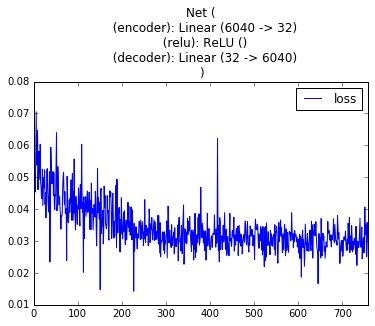

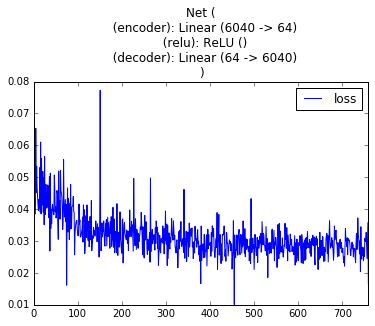

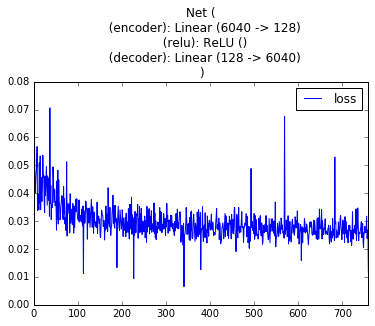

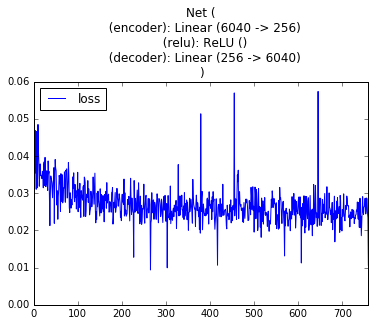

In [44]:
nets = dict()
perfs = dict()
for hs in [32, 64, 128, 256]:
    n,p = bar(hs)
    nets[hs] = n
    perfs[hs] = p

In [46]:
nets

{32: Net (
   (encoder): Linear (6040 -> 32)
   (relu): ReLU ()
   (decoder): Linear (32 -> 6040)
 ), 64: Net (
   (encoder): Linear (6040 -> 64)
   (relu): ReLU ()
   (decoder): Linear (64 -> 6040)
 ), 128: Net (
   (encoder): Linear (6040 -> 128)
   (relu): ReLU ()
   (decoder): Linear (128 -> 6040)
 ), 256: Net (
   (encoder): Linear (6040 -> 256)
   (relu): ReLU ()
   (decoder): Linear (256 -> 6040)
 )}

In [48]:
perfs

{32: (0.40165562913907282, 0.034381869456303962),
 64: (0.46953642384105965, 0.042736504883785768),
 128: (0.53675496688741731, 0.055241307270886573),
 256: (0.55927152317880791, 0.062708872811403985)}

Net (
  (encoder): Linear (6040 -> 300)
  (relu): ReLU ()
  (decoder): Linear (300 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0440
Epoch [1/20], Step [2/38], Loss: 0.0571
Epoch [1/20], Step [3/38], Loss: 0.0482
Epoch [1/20], Step [4/38], Loss: 0.0417
Epoch [1/20], Step [5/38], Loss: 0.0424
Epoch [1/20], Step [6/38], Loss: 0.0522
Epoch [1/20], Step [7/38], Loss: 0.0355
Epoch [1/20], Step [8/38], Loss: 0.0439
Epoch [1/20], Step [9/38], Loss: 0.0384
Epoch [1/20], Step [10/38], Loss: 0.0332
Epoch [1/20], Step [11/38], Loss: 0.0467
Epoch [1/20], Step [12/38], Loss: 0.0342
Epoch [1/20], Step [13/38], Loss: 0.0357
Epoch [1/20], Step [14/38], Loss: 0.0440
Epoch [1/20], Step [15/38], Loss: 0.0353
Epoch [1/20], Step [16/38], Loss: 0.0283
Epoch [1/20], Step [17/38], Loss: 0.0369
Epoch [1/20], Step [18/38], Loss: 0.0338
Epoch [1/20], Step [19/38], Loss: 0.0346
Epoch [1/20], Step [20/38], Loss: 0.0387
Epoch [1/20], Step [21/38], Loss: 0.0310
Epoch [1/20], Step [22/38], Loss: 0.0349
Epoch [1/20],

Epoch [6/20], Step [11/38], Loss: 0.0283
Epoch [6/20], Step [12/38], Loss: 0.0277
Epoch [6/20], Step [13/38], Loss: 0.0303
Epoch [6/20], Step [14/38], Loss: 0.0229
Epoch [6/20], Step [15/38], Loss: 0.0304
Epoch [6/20], Step [16/38], Loss: 0.0257
Epoch [6/20], Step [17/38], Loss: 0.0272
Epoch [6/20], Step [18/38], Loss: 0.0239
Epoch [6/20], Step [19/38], Loss: 0.0273
Epoch [6/20], Step [20/38], Loss: 0.0282
Epoch [6/20], Step [21/38], Loss: 0.0215
Epoch [6/20], Step [22/38], Loss: 0.0299
Epoch [6/20], Step [23/38], Loss: 0.0280
Epoch [6/20], Step [24/38], Loss: 0.0274
Epoch [6/20], Step [25/38], Loss: 0.0236
Epoch [6/20], Step [26/38], Loss: 0.0259
Epoch [6/20], Step [27/38], Loss: 0.0294
Epoch [6/20], Step [28/38], Loss: 0.0257
Epoch [6/20], Step [29/38], Loss: 0.0260
Epoch [6/20], Step [30/38], Loss: 0.0212
Epoch [6/20], Step [31/38], Loss: 0.0213
Epoch [6/20], Step [32/38], Loss: 0.0246
Epoch [6/20], Step [33/38], Loss: 0.0305
Epoch [6/20], Step [34/38], Loss: 0.0225
Epoch [6/20], St

Epoch [11/20], Step [21/38], Loss: 0.0289
Epoch [11/20], Step [22/38], Loss: 0.0239
Epoch [11/20], Step [23/38], Loss: 0.0304
Epoch [11/20], Step [24/38], Loss: 0.0277
Epoch [11/20], Step [25/38], Loss: 0.0266
Epoch [11/20], Step [26/38], Loss: 0.0219
Epoch [11/20], Step [27/38], Loss: 0.0231
Epoch [11/20], Step [28/38], Loss: 0.0230
Epoch [11/20], Step [29/38], Loss: 0.0250
Epoch [11/20], Step [30/38], Loss: 0.0243
Epoch [11/20], Step [31/38], Loss: 0.0225
Epoch [11/20], Step [32/38], Loss: 0.0253
Epoch [11/20], Step [33/38], Loss: 0.0253
Epoch [11/20], Step [34/38], Loss: 0.0275
Epoch [11/20], Step [35/38], Loss: 0.0268
Epoch [11/20], Step [36/38], Loss: 0.0260
Epoch [11/20], Step [37/38], Loss: 0.0229
Epoch [11/20], Step [38/38], Loss: 0.0056
Epoch [12/20], Step [1/38], Loss: 0.0282
Epoch [12/20], Step [2/38], Loss: 0.0233
Epoch [12/20], Step [3/38], Loss: 0.0233
Epoch [12/20], Step [4/38], Loss: 0.0235
Epoch [12/20], Step [5/38], Loss: 0.0228
Epoch [12/20], Step [6/38], Loss: 0.021

Epoch [16/20], Step [31/38], Loss: 0.0240
Epoch [16/20], Step [32/38], Loss: 0.0217
Epoch [16/20], Step [33/38], Loss: 0.0248
Epoch [16/20], Step [34/38], Loss: 0.0260
Epoch [16/20], Step [35/38], Loss: 0.0211
Epoch [16/20], Step [36/38], Loss: 0.0257
Epoch [16/20], Step [37/38], Loss: 0.0249
Epoch [16/20], Step [38/38], Loss: 0.0447
Epoch [17/20], Step [1/38], Loss: 0.0261
Epoch [17/20], Step [2/38], Loss: 0.0205
Epoch [17/20], Step [3/38], Loss: 0.0244
Epoch [17/20], Step [4/38], Loss: 0.0239
Epoch [17/20], Step [5/38], Loss: 0.0246
Epoch [17/20], Step [6/38], Loss: 0.0233
Epoch [17/20], Step [7/38], Loss: 0.0267
Epoch [17/20], Step [8/38], Loss: 0.0214
Epoch [17/20], Step [9/38], Loss: 0.0238
Epoch [17/20], Step [10/38], Loss: 0.0271
Epoch [17/20], Step [11/38], Loss: 0.0189
Epoch [17/20], Step [12/38], Loss: 0.0308
Epoch [17/20], Step [13/38], Loss: 0.0245
Epoch [17/20], Step [14/38], Loss: 0.0258
Epoch [17/20], Step [15/38], Loss: 0.0259
Epoch [17/20], Step [16/38], Loss: 0.0209
E

Epoch [2/20], Step [1/38], Loss: 0.0276
Epoch [2/20], Step [2/38], Loss: 0.0324
Epoch [2/20], Step [3/38], Loss: 0.0288
Epoch [2/20], Step [4/38], Loss: 0.0350
Epoch [2/20], Step [5/38], Loss: 0.0238
Epoch [2/20], Step [6/38], Loss: 0.0399
Epoch [2/20], Step [7/38], Loss: 0.0338
Epoch [2/20], Step [8/38], Loss: 0.0355
Epoch [2/20], Step [9/38], Loss: 0.0360
Epoch [2/20], Step [10/38], Loss: 0.0345
Epoch [2/20], Step [11/38], Loss: 0.0292
Epoch [2/20], Step [12/38], Loss: 0.0284
Epoch [2/20], Step [13/38], Loss: 0.0262
Epoch [2/20], Step [14/38], Loss: 0.0347
Epoch [2/20], Step [15/38], Loss: 0.0257
Epoch [2/20], Step [16/38], Loss: 0.0317
Epoch [2/20], Step [17/38], Loss: 0.0368
Epoch [2/20], Step [18/38], Loss: 0.0308
Epoch [2/20], Step [19/38], Loss: 0.0289
Epoch [2/20], Step [20/38], Loss: 0.0349
Epoch [2/20], Step [21/38], Loss: 0.0333
Epoch [2/20], Step [22/38], Loss: 0.0263
Epoch [2/20], Step [23/38], Loss: 0.0318
Epoch [2/20], Step [24/38], Loss: 0.0282
Epoch [2/20], Step [25/38

Epoch [7/20], Step [13/38], Loss: 0.0245
Epoch [7/20], Step [14/38], Loss: 0.0248
Epoch [7/20], Step [15/38], Loss: 0.0262
Epoch [7/20], Step [16/38], Loss: 0.0265
Epoch [7/20], Step [17/38], Loss: 0.0317
Epoch [7/20], Step [18/38], Loss: 0.0235
Epoch [7/20], Step [19/38], Loss: 0.0238
Epoch [7/20], Step [20/38], Loss: 0.0199
Epoch [7/20], Step [21/38], Loss: 0.0191
Epoch [7/20], Step [22/38], Loss: 0.0249
Epoch [7/20], Step [23/38], Loss: 0.0293
Epoch [7/20], Step [24/38], Loss: 0.0289
Epoch [7/20], Step [25/38], Loss: 0.0325
Epoch [7/20], Step [26/38], Loss: 0.0318
Epoch [7/20], Step [27/38], Loss: 0.0286
Epoch [7/20], Step [28/38], Loss: 0.0227
Epoch [7/20], Step [29/38], Loss: 0.0240
Epoch [7/20], Step [30/38], Loss: 0.0183
Epoch [7/20], Step [31/38], Loss: 0.0268
Epoch [7/20], Step [32/38], Loss: 0.0226
Epoch [7/20], Step [33/38], Loss: 0.0292
Epoch [7/20], Step [34/38], Loss: 0.0280
Epoch [7/20], Step [35/38], Loss: 0.0264
Epoch [7/20], Step [36/38], Loss: 0.0261
Epoch [7/20], St

Epoch [12/20], Step [25/38], Loss: 0.0249
Epoch [12/20], Step [26/38], Loss: 0.0236
Epoch [12/20], Step [27/38], Loss: 0.0236
Epoch [12/20], Step [28/38], Loss: 0.0255
Epoch [12/20], Step [29/38], Loss: 0.0210
Epoch [12/20], Step [30/38], Loss: 0.0287
Epoch [12/20], Step [31/38], Loss: 0.0238
Epoch [12/20], Step [32/38], Loss: 0.0266
Epoch [12/20], Step [33/38], Loss: 0.0260
Epoch [12/20], Step [34/38], Loss: 0.0284
Epoch [12/20], Step [35/38], Loss: 0.0224
Epoch [12/20], Step [36/38], Loss: 0.0236
Epoch [12/20], Step [37/38], Loss: 0.0218
Epoch [12/20], Step [38/38], Loss: 0.0254
Epoch [13/20], Step [1/38], Loss: 0.0234
Epoch [13/20], Step [2/38], Loss: 0.0223
Epoch [13/20], Step [3/38], Loss: 0.0271
Epoch [13/20], Step [4/38], Loss: 0.0251
Epoch [13/20], Step [5/38], Loss: 0.0265
Epoch [13/20], Step [6/38], Loss: 0.0228
Epoch [13/20], Step [7/38], Loss: 0.0302
Epoch [13/20], Step [8/38], Loss: 0.0211
Epoch [13/20], Step [9/38], Loss: 0.0292
Epoch [13/20], Step [10/38], Loss: 0.0249
E

Epoch [17/20], Step [33/38], Loss: 0.0278
Epoch [17/20], Step [34/38], Loss: 0.0227
Epoch [17/20], Step [35/38], Loss: 0.0216
Epoch [17/20], Step [36/38], Loss: 0.0249
Epoch [17/20], Step [37/38], Loss: 0.0276
Epoch [17/20], Step [38/38], Loss: 0.0246
Epoch [18/20], Step [1/38], Loss: 0.0257
Epoch [18/20], Step [2/38], Loss: 0.0259
Epoch [18/20], Step [3/38], Loss: 0.0203
Epoch [18/20], Step [4/38], Loss: 0.0225
Epoch [18/20], Step [5/38], Loss: 0.0242
Epoch [18/20], Step [6/38], Loss: 0.0186
Epoch [18/20], Step [7/38], Loss: 0.0224
Epoch [18/20], Step [8/38], Loss: 0.0259
Epoch [18/20], Step [9/38], Loss: 0.0276
Epoch [18/20], Step [10/38], Loss: 0.0276
Epoch [18/20], Step [11/38], Loss: 0.0233
Epoch [18/20], Step [12/38], Loss: 0.0270
Epoch [18/20], Step [13/38], Loss: 0.0221
Epoch [18/20], Step [14/38], Loss: 0.0266
Epoch [18/20], Step [15/38], Loss: 0.0249
Epoch [18/20], Step [16/38], Loss: 0.0218
Epoch [18/20], Step [17/38], Loss: 0.0200
Epoch [18/20], Step [18/38], Loss: 0.0247
E

Epoch [3/20], Step [1/38], Loss: 0.0288
Epoch [3/20], Step [2/38], Loss: 0.0330
Epoch [3/20], Step [3/38], Loss: 0.0286
Epoch [3/20], Step [4/38], Loss: 0.0295
Epoch [3/20], Step [5/38], Loss: 0.0274
Epoch [3/20], Step [6/38], Loss: 0.0395
Epoch [3/20], Step [7/38], Loss: 0.0339
Epoch [3/20], Step [8/38], Loss: 0.0296
Epoch [3/20], Step [9/38], Loss: 0.0297
Epoch [3/20], Step [10/38], Loss: 0.0249
Epoch [3/20], Step [11/38], Loss: 0.0237
Epoch [3/20], Step [12/38], Loss: 0.0316
Epoch [3/20], Step [13/38], Loss: 0.0292
Epoch [3/20], Step [14/38], Loss: 0.0287
Epoch [3/20], Step [15/38], Loss: 0.0259
Epoch [3/20], Step [16/38], Loss: 0.0283
Epoch [3/20], Step [17/38], Loss: 0.0286
Epoch [3/20], Step [18/38], Loss: 0.0324
Epoch [3/20], Step [19/38], Loss: 0.0348
Epoch [3/20], Step [20/38], Loss: 0.0220
Epoch [3/20], Step [21/38], Loss: 0.0271
Epoch [3/20], Step [22/38], Loss: 0.0274
Epoch [3/20], Step [23/38], Loss: 0.0254
Epoch [3/20], Step [24/38], Loss: 0.0300
Epoch [3/20], Step [25/38

Epoch [8/20], Step [13/38], Loss: 0.0273
Epoch [8/20], Step [14/38], Loss: 0.0258
Epoch [8/20], Step [15/38], Loss: 0.0248
Epoch [8/20], Step [16/38], Loss: 0.0197
Epoch [8/20], Step [17/38], Loss: 0.0271
Epoch [8/20], Step [18/38], Loss: 0.0238
Epoch [8/20], Step [19/38], Loss: 0.0252
Epoch [8/20], Step [20/38], Loss: 0.0248
Epoch [8/20], Step [21/38], Loss: 0.0241
Epoch [8/20], Step [22/38], Loss: 0.0227
Epoch [8/20], Step [23/38], Loss: 0.0263
Epoch [8/20], Step [24/38], Loss: 0.0255
Epoch [8/20], Step [25/38], Loss: 0.0242
Epoch [8/20], Step [26/38], Loss: 0.0234
Epoch [8/20], Step [27/38], Loss: 0.0271
Epoch [8/20], Step [28/38], Loss: 0.0256
Epoch [8/20], Step [29/38], Loss: 0.0294
Epoch [8/20], Step [30/38], Loss: 0.0254
Epoch [8/20], Step [31/38], Loss: 0.0271
Epoch [8/20], Step [32/38], Loss: 0.0246
Epoch [8/20], Step [33/38], Loss: 0.0243
Epoch [8/20], Step [34/38], Loss: 0.0221
Epoch [8/20], Step [35/38], Loss: 0.0239
Epoch [8/20], Step [36/38], Loss: 0.0295
Epoch [8/20], St

Epoch [13/20], Step [21/38], Loss: 0.0265
Epoch [13/20], Step [22/38], Loss: 0.0238
Epoch [13/20], Step [23/38], Loss: 0.0243
Epoch [13/20], Step [24/38], Loss: 0.0236
Epoch [13/20], Step [25/38], Loss: 0.0235
Epoch [13/20], Step [26/38], Loss: 0.0231
Epoch [13/20], Step [27/38], Loss: 0.0226
Epoch [13/20], Step [28/38], Loss: 0.0258
Epoch [13/20], Step [29/38], Loss: 0.0193
Epoch [13/20], Step [30/38], Loss: 0.0228
Epoch [13/20], Step [31/38], Loss: 0.0236
Epoch [13/20], Step [32/38], Loss: 0.0252
Epoch [13/20], Step [33/38], Loss: 0.0236
Epoch [13/20], Step [34/38], Loss: 0.0240
Epoch [13/20], Step [35/38], Loss: 0.0286
Epoch [13/20], Step [36/38], Loss: 0.0186
Epoch [13/20], Step [37/38], Loss: 0.0265
Epoch [13/20], Step [38/38], Loss: 0.0301
Epoch [14/20], Step [1/38], Loss: 0.0237
Epoch [14/20], Step [2/38], Loss: 0.0248
Epoch [14/20], Step [3/38], Loss: 0.0261
Epoch [14/20], Step [4/38], Loss: 0.0254
Epoch [14/20], Step [5/38], Loss: 0.0195
Epoch [14/20], Step [6/38], Loss: 0.018

Epoch [18/20], Step [28/38], Loss: 0.0213
Epoch [18/20], Step [29/38], Loss: 0.0303
Epoch [18/20], Step [30/38], Loss: 0.0288
Epoch [18/20], Step [31/38], Loss: 0.0235
Epoch [18/20], Step [32/38], Loss: 0.0225
Epoch [18/20], Step [33/38], Loss: 0.0284
Epoch [18/20], Step [34/38], Loss: 0.0233
Epoch [18/20], Step [35/38], Loss: 0.0236
Epoch [18/20], Step [36/38], Loss: 0.0251
Epoch [18/20], Step [37/38], Loss: 0.0234
Epoch [18/20], Step [38/38], Loss: 0.0102
Epoch [19/20], Step [1/38], Loss: 0.0226
Epoch [19/20], Step [2/38], Loss: 0.0175
Epoch [19/20], Step [3/38], Loss: 0.0239
Epoch [19/20], Step [4/38], Loss: 0.0222
Epoch [19/20], Step [5/38], Loss: 0.0202
Epoch [19/20], Step [6/38], Loss: 0.0234
Epoch [19/20], Step [7/38], Loss: 0.0238
Epoch [19/20], Step [8/38], Loss: 0.0245
Epoch [19/20], Step [9/38], Loss: 0.0205
Epoch [19/20], Step [10/38], Loss: 0.0252
Epoch [19/20], Step [11/38], Loss: 0.0186
Epoch [19/20], Step [12/38], Loss: 0.0221
Epoch [19/20], Step [13/38], Loss: 0.0211
E

Epoch [3/20], Step [37/38], Loss: 0.0263
Epoch [3/20], Step [38/38], Loss: 0.0135
Epoch [4/20], Step [1/38], Loss: 0.0310
Epoch [4/20], Step [2/38], Loss: 0.0274
Epoch [4/20], Step [3/38], Loss: 0.0251
Epoch [4/20], Step [4/38], Loss: 0.0276
Epoch [4/20], Step [5/38], Loss: 0.0248
Epoch [4/20], Step [6/38], Loss: 0.0242
Epoch [4/20], Step [7/38], Loss: 0.0235
Epoch [4/20], Step [8/38], Loss: 0.0260
Epoch [4/20], Step [9/38], Loss: 0.0321
Epoch [4/20], Step [10/38], Loss: 0.0236
Epoch [4/20], Step [11/38], Loss: 0.0311
Epoch [4/20], Step [12/38], Loss: 0.0221
Epoch [4/20], Step [13/38], Loss: 0.0223
Epoch [4/20], Step [14/38], Loss: 0.0241
Epoch [4/20], Step [15/38], Loss: 0.0283
Epoch [4/20], Step [16/38], Loss: 0.0266
Epoch [4/20], Step [17/38], Loss: 0.0318
Epoch [4/20], Step [18/38], Loss: 0.0245
Epoch [4/20], Step [19/38], Loss: 0.0304
Epoch [4/20], Step [20/38], Loss: 0.0290
Epoch [4/20], Step [21/38], Loss: 0.0288
Epoch [4/20], Step [22/38], Loss: 0.0267
Epoch [4/20], Step [23/38

Epoch [9/20], Step [12/38], Loss: 0.0228
Epoch [9/20], Step [13/38], Loss: 0.0231
Epoch [9/20], Step [14/38], Loss: 0.0242
Epoch [9/20], Step [15/38], Loss: 0.0235
Epoch [9/20], Step [16/38], Loss: 0.0261
Epoch [9/20], Step [17/38], Loss: 0.0258
Epoch [9/20], Step [18/38], Loss: 0.0246
Epoch [9/20], Step [19/38], Loss: 0.0259
Epoch [9/20], Step [20/38], Loss: 0.0235
Epoch [9/20], Step [21/38], Loss: 0.0251
Epoch [9/20], Step [22/38], Loss: 0.0199
Epoch [9/20], Step [23/38], Loss: 0.0237
Epoch [9/20], Step [24/38], Loss: 0.0219
Epoch [9/20], Step [25/38], Loss: 0.0240
Epoch [9/20], Step [26/38], Loss: 0.0257
Epoch [9/20], Step [27/38], Loss: 0.0277
Epoch [9/20], Step [28/38], Loss: 0.0249
Epoch [9/20], Step [29/38], Loss: 0.0223
Epoch [9/20], Step [30/38], Loss: 0.0233
Epoch [9/20], Step [31/38], Loss: 0.0231
Epoch [9/20], Step [32/38], Loss: 0.0220
Epoch [9/20], Step [33/38], Loss: 0.0233
Epoch [9/20], Step [34/38], Loss: 0.0271
Epoch [9/20], Step [35/38], Loss: 0.0234
Epoch [9/20], St

Epoch [14/20], Step [20/38], Loss: 0.0235
Epoch [14/20], Step [21/38], Loss: 0.0263
Epoch [14/20], Step [22/38], Loss: 0.0253
Epoch [14/20], Step [23/38], Loss: 0.0239
Epoch [14/20], Step [24/38], Loss: 0.0240
Epoch [14/20], Step [25/38], Loss: 0.0181
Epoch [14/20], Step [26/38], Loss: 0.0247
Epoch [14/20], Step [27/38], Loss: 0.0245
Epoch [14/20], Step [28/38], Loss: 0.0202
Epoch [14/20], Step [29/38], Loss: 0.0214
Epoch [14/20], Step [30/38], Loss: 0.0257
Epoch [14/20], Step [31/38], Loss: 0.0198
Epoch [14/20], Step [32/38], Loss: 0.0263
Epoch [14/20], Step [33/38], Loss: 0.0225
Epoch [14/20], Step [34/38], Loss: 0.0238
Epoch [14/20], Step [35/38], Loss: 0.0208
Epoch [14/20], Step [36/38], Loss: 0.0229
Epoch [14/20], Step [37/38], Loss: 0.0251
Epoch [14/20], Step [38/38], Loss: 0.0365
Epoch [15/20], Step [1/38], Loss: 0.0240
Epoch [15/20], Step [2/38], Loss: 0.0214
Epoch [15/20], Step [3/38], Loss: 0.0244
Epoch [15/20], Step [4/38], Loss: 0.0218
Epoch [15/20], Step [5/38], Loss: 0.03

Epoch [19/20], Step [27/38], Loss: 0.0220
Epoch [19/20], Step [28/38], Loss: 0.0287
Epoch [19/20], Step [29/38], Loss: 0.0208
Epoch [19/20], Step [30/38], Loss: 0.0260
Epoch [19/20], Step [31/38], Loss: 0.0195
Epoch [19/20], Step [32/38], Loss: 0.0155
Epoch [19/20], Step [33/38], Loss: 0.0242
Epoch [19/20], Step [34/38], Loss: 0.0221
Epoch [19/20], Step [35/38], Loss: 0.0211
Epoch [19/20], Step [36/38], Loss: 0.0229
Epoch [19/20], Step [37/38], Loss: 0.0309
Epoch [19/20], Step [38/38], Loss: 0.0164
Epoch [20/20], Step [1/38], Loss: 0.0204
Epoch [20/20], Step [2/38], Loss: 0.0216
Epoch [20/20], Step [3/38], Loss: 0.0224
Epoch [20/20], Step [4/38], Loss: 0.0229
Epoch [20/20], Step [5/38], Loss: 0.0219
Epoch [20/20], Step [6/38], Loss: 0.0208
Epoch [20/20], Step [7/38], Loss: 0.0239
Epoch [20/20], Step [8/38], Loss: 0.0222
Epoch [20/20], Step [9/38], Loss: 0.0194
Epoch [20/20], Step [10/38], Loss: 0.0224
Epoch [20/20], Step [11/38], Loss: 0.0205
Epoch [20/20], Step [12/38], Loss: 0.0205
E

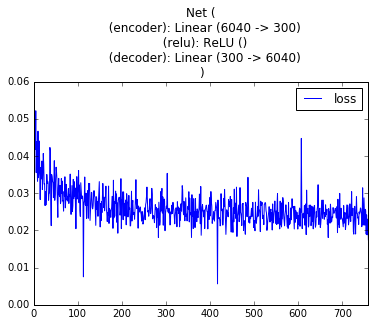

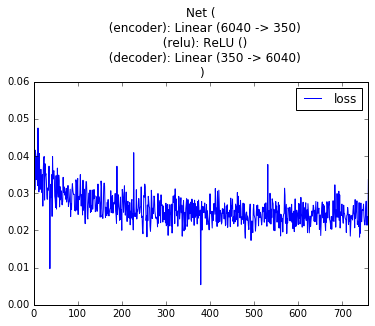

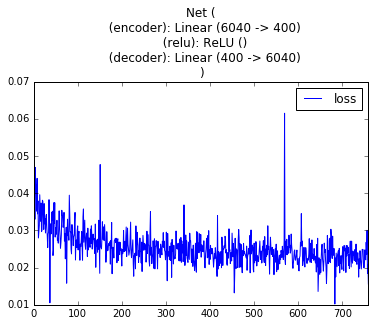

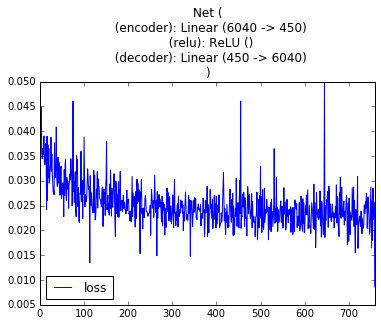

In [49]:
for hs in [300, 350, 400, 450]:
    n,p = bar(hs)
    nets[hs] = n
    perfs[hs] = p

In [53]:
nets

{32: Net (
   (encoder): Linear (6040 -> 32)
   (relu): ReLU ()
   (decoder): Linear (32 -> 6040)
 ), 64: Net (
   (encoder): Linear (6040 -> 64)
   (relu): ReLU ()
   (decoder): Linear (64 -> 6040)
 ), 128: Net (
   (encoder): Linear (6040 -> 128)
   (relu): ReLU ()
   (decoder): Linear (128 -> 6040)
 ), 256: Net (
   (encoder): Linear (6040 -> 256)
   (relu): ReLU ()
   (decoder): Linear (256 -> 6040)
 ), 300: Net (
   (encoder): Linear (6040 -> 300)
   (relu): ReLU ()
   (decoder): Linear (300 -> 6040)
 ), 350: Net (
   (encoder): Linear (6040 -> 350)
   (relu): ReLU ()
   (decoder): Linear (350 -> 6040)
 ), 400: Net (
   (encoder): Linear (6040 -> 400)
   (relu): ReLU ()
   (decoder): Linear (400 -> 6040)
 ), 450: Net (
   (encoder): Linear (6040 -> 450)
   (relu): ReLU ()
   (decoder): Linear (450 -> 6040)
 )}

In [55]:
perfs

{32: (0.40165562913907282, 0.034381869456303962),
 64: (0.46953642384105965, 0.042736504883785768),
 128: (0.53675496688741731, 0.055241307270886573),
 256: (0.55927152317880791, 0.062708872811403985),
 300: (0.5612582781456954, 0.063635564192691715),
 350: (0.56324503311258289, 0.064793890608367821),
 400: (0.56092715231788082, 0.063380583883596658),
 450: (0.54966887417218546, 0.063843936980928218)}

Net (
  (encoder): Linear (6040 -> 512)
  (relu): ReLU ()
  (decoder): Linear (512 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0388
Epoch [1/20], Step [2/38], Loss: 0.0493
Epoch [1/20], Step [3/38], Loss: 0.0405
Epoch [1/20], Step [4/38], Loss: 0.0436
Epoch [1/20], Step [5/38], Loss: 0.0397
Epoch [1/20], Step [6/38], Loss: 0.0334
Epoch [1/20], Step [7/38], Loss: 0.0419
Epoch [1/20], Step [8/38], Loss: 0.0334
Epoch [1/20], Step [9/38], Loss: 0.0379
Epoch [1/20], Step [10/38], Loss: 0.0314
Epoch [1/20], Step [11/38], Loss: 0.0285
Epoch [1/20], Step [12/38], Loss: 0.0426
Epoch [1/20], Step [13/38], Loss: 0.0325
Epoch [1/20], Step [14/38], Loss: 0.0311
Epoch [1/20], Step [15/38], Loss: 0.0348
Epoch [1/20], Step [16/38], Loss: 0.0266
Epoch [1/20], Step [17/38], Loss: 0.0306
Epoch [1/20], Step [18/38], Loss: 0.0310
Epoch [1/20], Step [19/38], Loss: 0.0383
Epoch [1/20], Step [20/38], Loss: 0.0303
Epoch [1/20], Step [21/38], Loss: 0.0317
Epoch [1/20], Step [22/38], Loss: 0.0314
Epoch [1/20],

Epoch [6/20], Step [10/38], Loss: 0.0262
Epoch [6/20], Step [11/38], Loss: 0.0233
Epoch [6/20], Step [12/38], Loss: 0.0307
Epoch [6/20], Step [13/38], Loss: 0.0281
Epoch [6/20], Step [14/38], Loss: 0.0255
Epoch [6/20], Step [15/38], Loss: 0.0206
Epoch [6/20], Step [16/38], Loss: 0.0244
Epoch [6/20], Step [17/38], Loss: 0.0211
Epoch [6/20], Step [18/38], Loss: 0.0251
Epoch [6/20], Step [19/38], Loss: 0.0265
Epoch [6/20], Step [20/38], Loss: 0.0217
Epoch [6/20], Step [21/38], Loss: 0.0182
Epoch [6/20], Step [22/38], Loss: 0.0240
Epoch [6/20], Step [23/38], Loss: 0.0253
Epoch [6/20], Step [24/38], Loss: 0.0256
Epoch [6/20], Step [25/38], Loss: 0.0242
Epoch [6/20], Step [26/38], Loss: 0.0266
Epoch [6/20], Step [27/38], Loss: 0.0241
Epoch [6/20], Step [28/38], Loss: 0.0238
Epoch [6/20], Step [29/38], Loss: 0.0218
Epoch [6/20], Step [30/38], Loss: 0.0261
Epoch [6/20], Step [31/38], Loss: 0.0273
Epoch [6/20], Step [32/38], Loss: 0.0245
Epoch [6/20], Step [33/38], Loss: 0.0252
Epoch [6/20], St

Epoch [11/20], Step [22/38], Loss: 0.0210
Epoch [11/20], Step [23/38], Loss: 0.0209
Epoch [11/20], Step [24/38], Loss: 0.0264
Epoch [11/20], Step [25/38], Loss: 0.0198
Epoch [11/20], Step [26/38], Loss: 0.0269
Epoch [11/20], Step [27/38], Loss: 0.0234
Epoch [11/20], Step [28/38], Loss: 0.0228
Epoch [11/20], Step [29/38], Loss: 0.0197
Epoch [11/20], Step [30/38], Loss: 0.0238
Epoch [11/20], Step [31/38], Loss: 0.0226
Epoch [11/20], Step [32/38], Loss: 0.0216
Epoch [11/20], Step [33/38], Loss: 0.0243
Epoch [11/20], Step [34/38], Loss: 0.0239
Epoch [11/20], Step [35/38], Loss: 0.0215
Epoch [11/20], Step [36/38], Loss: 0.0262
Epoch [11/20], Step [37/38], Loss: 0.0206
Epoch [11/20], Step [38/38], Loss: 0.0208
Epoch [12/20], Step [1/38], Loss: 0.0217
Epoch [12/20], Step [2/38], Loss: 0.0211
Epoch [12/20], Step [3/38], Loss: 0.0235
Epoch [12/20], Step [4/38], Loss: 0.0232
Epoch [12/20], Step [5/38], Loss: 0.0205
Epoch [12/20], Step [6/38], Loss: 0.0241
Epoch [12/20], Step [7/38], Loss: 0.0258

Epoch [16/20], Step [31/38], Loss: 0.0220
Epoch [16/20], Step [32/38], Loss: 0.0210
Epoch [16/20], Step [33/38], Loss: 0.0223
Epoch [16/20], Step [34/38], Loss: 0.0213
Epoch [16/20], Step [35/38], Loss: 0.0209
Epoch [16/20], Step [36/38], Loss: 0.0206
Epoch [16/20], Step [37/38], Loss: 0.0220
Epoch [16/20], Step [38/38], Loss: 0.0116
Epoch [17/20], Step [1/38], Loss: 0.0219
Epoch [17/20], Step [2/38], Loss: 0.0221
Epoch [17/20], Step [3/38], Loss: 0.0234
Epoch [17/20], Step [4/38], Loss: 0.0204
Epoch [17/20], Step [5/38], Loss: 0.0186
Epoch [17/20], Step [6/38], Loss: 0.0177
Epoch [17/20], Step [7/38], Loss: 0.0222
Epoch [17/20], Step [8/38], Loss: 0.0268
Epoch [17/20], Step [9/38], Loss: 0.0209
Epoch [17/20], Step [10/38], Loss: 0.0203
Epoch [17/20], Step [11/38], Loss: 0.0222
Epoch [17/20], Step [12/38], Loss: 0.0179
Epoch [17/20], Step [13/38], Loss: 0.0207
Epoch [17/20], Step [14/38], Loss: 0.0216
Epoch [17/20], Step [15/38], Loss: 0.0238
Epoch [17/20], Step [16/38], Loss: 0.0199
E

Epoch [1/20], Step [35/38], Loss: 0.0264
Epoch [1/20], Step [36/38], Loss: 0.0271
Epoch [1/20], Step [37/38], Loss: 0.0293
Epoch [1/20], Step [38/38], Loss: 0.0163
Epoch [2/20], Step [1/38], Loss: 0.0300
Epoch [2/20], Step [2/38], Loss: 0.0273
Epoch [2/20], Step [3/38], Loss: 0.0315
Epoch [2/20], Step [4/38], Loss: 0.0339
Epoch [2/20], Step [5/38], Loss: 0.0388
Epoch [2/20], Step [6/38], Loss: 0.0291
Epoch [2/20], Step [7/38], Loss: 0.0309
Epoch [2/20], Step [8/38], Loss: 0.0290
Epoch [2/20], Step [9/38], Loss: 0.0307
Epoch [2/20], Step [10/38], Loss: 0.0281
Epoch [2/20], Step [11/38], Loss: 0.0313
Epoch [2/20], Step [12/38], Loss: 0.0245
Epoch [2/20], Step [13/38], Loss: 0.0273
Epoch [2/20], Step [14/38], Loss: 0.0303
Epoch [2/20], Step [15/38], Loss: 0.0243
Epoch [2/20], Step [16/38], Loss: 0.0274
Epoch [2/20], Step [17/38], Loss: 0.0291
Epoch [2/20], Step [18/38], Loss: 0.0284
Epoch [2/20], Step [19/38], Loss: 0.0359
Epoch [2/20], Step [20/38], Loss: 0.0269
Epoch [2/20], Step [21/38

Epoch [7/20], Step [9/38], Loss: 0.0223
Epoch [7/20], Step [10/38], Loss: 0.0235
Epoch [7/20], Step [11/38], Loss: 0.0260
Epoch [7/20], Step [12/38], Loss: 0.0186
Epoch [7/20], Step [13/38], Loss: 0.0214
Epoch [7/20], Step [14/38], Loss: 0.0235
Epoch [7/20], Step [15/38], Loss: 0.0205
Epoch [7/20], Step [16/38], Loss: 0.0239
Epoch [7/20], Step [17/38], Loss: 0.0226
Epoch [7/20], Step [18/38], Loss: 0.0226
Epoch [7/20], Step [19/38], Loss: 0.0222
Epoch [7/20], Step [20/38], Loss: 0.0223
Epoch [7/20], Step [21/38], Loss: 0.0217
Epoch [7/20], Step [22/38], Loss: 0.0190
Epoch [7/20], Step [23/38], Loss: 0.0233
Epoch [7/20], Step [24/38], Loss: 0.0245
Epoch [7/20], Step [25/38], Loss: 0.0227
Epoch [7/20], Step [26/38], Loss: 0.0210
Epoch [7/20], Step [27/38], Loss: 0.0255
Epoch [7/20], Step [28/38], Loss: 0.0242
Epoch [7/20], Step [29/38], Loss: 0.0231
Epoch [7/20], Step [30/38], Loss: 0.0197
Epoch [7/20], Step [31/38], Loss: 0.0184
Epoch [7/20], Step [32/38], Loss: 0.0227
Epoch [7/20], Ste

Epoch [12/20], Step [19/38], Loss: 0.0191
Epoch [12/20], Step [20/38], Loss: 0.0190
Epoch [12/20], Step [21/38], Loss: 0.0204
Epoch [12/20], Step [22/38], Loss: 0.0203
Epoch [12/20], Step [23/38], Loss: 0.0203
Epoch [12/20], Step [24/38], Loss: 0.0221
Epoch [12/20], Step [25/38], Loss: 0.0202
Epoch [12/20], Step [26/38], Loss: 0.0167
Epoch [12/20], Step [27/38], Loss: 0.0219
Epoch [12/20], Step [28/38], Loss: 0.0222
Epoch [12/20], Step [29/38], Loss: 0.0223
Epoch [12/20], Step [30/38], Loss: 0.0156
Epoch [12/20], Step [31/38], Loss: 0.0219
Epoch [12/20], Step [32/38], Loss: 0.0210
Epoch [12/20], Step [33/38], Loss: 0.0176
Epoch [12/20], Step [34/38], Loss: 0.0197
Epoch [12/20], Step [35/38], Loss: 0.0208
Epoch [12/20], Step [36/38], Loss: 0.0201
Epoch [12/20], Step [37/38], Loss: 0.0183
Epoch [12/20], Step [38/38], Loss: 0.0285
Epoch [13/20], Step [1/38], Loss: 0.0183
Epoch [13/20], Step [2/38], Loss: 0.0194
Epoch [13/20], Step [3/38], Loss: 0.0230
Epoch [13/20], Step [4/38], Loss: 0.0

Epoch [17/20], Step [26/38], Loss: 0.0179
Epoch [17/20], Step [27/38], Loss: 0.0205
Epoch [17/20], Step [28/38], Loss: 0.0203
Epoch [17/20], Step [29/38], Loss: 0.0193
Epoch [17/20], Step [30/38], Loss: 0.0199
Epoch [17/20], Step [31/38], Loss: 0.0198
Epoch [17/20], Step [32/38], Loss: 0.0183
Epoch [17/20], Step [33/38], Loss: 0.0216
Epoch [17/20], Step [34/38], Loss: 0.0203
Epoch [17/20], Step [35/38], Loss: 0.0172
Epoch [17/20], Step [36/38], Loss: 0.0193
Epoch [17/20], Step [37/38], Loss: 0.0186
Epoch [17/20], Step [38/38], Loss: 0.0293
Epoch [18/20], Step [1/38], Loss: 0.0191
Epoch [18/20], Step [2/38], Loss: 0.0172
Epoch [18/20], Step [3/38], Loss: 0.0210
Epoch [18/20], Step [4/38], Loss: 0.0208
Epoch [18/20], Step [5/38], Loss: 0.0209
Epoch [18/20], Step [6/38], Loss: 0.0158
Epoch [18/20], Step [7/38], Loss: 0.0197
Epoch [18/20], Step [8/38], Loss: 0.0211
Epoch [18/20], Step [9/38], Loss: 0.0169
Epoch [18/20], Step [10/38], Loss: 0.0187
Epoch [18/20], Step [11/38], Loss: 0.0184
E

Epoch [2/20], Step [31/38], Loss: 0.0307
Epoch [2/20], Step [32/38], Loss: 0.0254
Epoch [2/20], Step [33/38], Loss: 0.0244
Epoch [2/20], Step [34/38], Loss: 0.0283
Epoch [2/20], Step [35/38], Loss: 0.0238
Epoch [2/20], Step [36/38], Loss: 0.0239
Epoch [2/20], Step [37/38], Loss: 0.0293
Epoch [2/20], Step [38/38], Loss: 0.0083
Epoch [3/20], Step [1/38], Loss: 0.0222
Epoch [3/20], Step [2/38], Loss: 0.0246
Epoch [3/20], Step [3/38], Loss: 0.0246
Epoch [3/20], Step [4/38], Loss: 0.0304
Epoch [3/20], Step [5/38], Loss: 0.0228
Epoch [3/20], Step [6/38], Loss: 0.0254
Epoch [3/20], Step [7/38], Loss: 0.0240
Epoch [3/20], Step [8/38], Loss: 0.0263
Epoch [3/20], Step [9/38], Loss: 0.0230
Epoch [3/20], Step [10/38], Loss: 0.0258
Epoch [3/20], Step [11/38], Loss: 0.0246
Epoch [3/20], Step [12/38], Loss: 0.0235
Epoch [3/20], Step [13/38], Loss: 0.0241
Epoch [3/20], Step [14/38], Loss: 0.0283
Epoch [3/20], Step [15/38], Loss: 0.0274
Epoch [3/20], Step [16/38], Loss: 0.0260
Epoch [3/20], Step [17/38

Epoch [8/20], Step [4/38], Loss: 0.0179
Epoch [8/20], Step [5/38], Loss: 0.0178
Epoch [8/20], Step [6/38], Loss: 0.0170
Epoch [8/20], Step [7/38], Loss: 0.0195
Epoch [8/20], Step [8/38], Loss: 0.0196
Epoch [8/20], Step [9/38], Loss: 0.0190
Epoch [8/20], Step [10/38], Loss: 0.0178
Epoch [8/20], Step [11/38], Loss: 0.0160
Epoch [8/20], Step [12/38], Loss: 0.0198
Epoch [8/20], Step [13/38], Loss: 0.0155
Epoch [8/20], Step [14/38], Loss: 0.0177
Epoch [8/20], Step [15/38], Loss: 0.0157
Epoch [8/20], Step [16/38], Loss: 0.0197
Epoch [8/20], Step [17/38], Loss: 0.0177
Epoch [8/20], Step [18/38], Loss: 0.0197
Epoch [8/20], Step [19/38], Loss: 0.0218
Epoch [8/20], Step [20/38], Loss: 0.0215
Epoch [8/20], Step [21/38], Loss: 0.0185
Epoch [8/20], Step [22/38], Loss: 0.0209
Epoch [8/20], Step [23/38], Loss: 0.0202
Epoch [8/20], Step [24/38], Loss: 0.0154
Epoch [8/20], Step [25/38], Loss: 0.0146
Epoch [8/20], Step [26/38], Loss: 0.0201
Epoch [8/20], Step [27/38], Loss: 0.0231
Epoch [8/20], Step [28

Epoch [13/20], Step [13/38], Loss: 0.0123
Epoch [13/20], Step [14/38], Loss: 0.0155
Epoch [13/20], Step [15/38], Loss: 0.0153
Epoch [13/20], Step [16/38], Loss: 0.0185
Epoch [13/20], Step [17/38], Loss: 0.0186
Epoch [13/20], Step [18/38], Loss: 0.0169
Epoch [13/20], Step [19/38], Loss: 0.0156
Epoch [13/20], Step [20/38], Loss: 0.0143
Epoch [13/20], Step [21/38], Loss: 0.0150
Epoch [13/20], Step [22/38], Loss: 0.0155
Epoch [13/20], Step [23/38], Loss: 0.0163
Epoch [13/20], Step [24/38], Loss: 0.0158
Epoch [13/20], Step [25/38], Loss: 0.0168
Epoch [13/20], Step [26/38], Loss: 0.0170
Epoch [13/20], Step [27/38], Loss: 0.0178
Epoch [13/20], Step [28/38], Loss: 0.0174
Epoch [13/20], Step [29/38], Loss: 0.0144
Epoch [13/20], Step [30/38], Loss: 0.0147
Epoch [13/20], Step [31/38], Loss: 0.0136
Epoch [13/20], Step [32/38], Loss: 0.0167
Epoch [13/20], Step [33/38], Loss: 0.0164
Epoch [13/20], Step [34/38], Loss: 0.0173
Epoch [13/20], Step [35/38], Loss: 0.0184
Epoch [13/20], Step [36/38], Loss:

Epoch [18/20], Step [20/38], Loss: 0.0138
Epoch [18/20], Step [21/38], Loss: 0.0134
Epoch [18/20], Step [22/38], Loss: 0.0128
Epoch [18/20], Step [23/38], Loss: 0.0142
Epoch [18/20], Step [24/38], Loss: 0.0143
Epoch [18/20], Step [25/38], Loss: 0.0151
Epoch [18/20], Step [26/38], Loss: 0.0161
Epoch [18/20], Step [27/38], Loss: 0.0148
Epoch [18/20], Step [28/38], Loss: 0.0141
Epoch [18/20], Step [29/38], Loss: 0.0124
Epoch [18/20], Step [30/38], Loss: 0.0140
Epoch [18/20], Step [31/38], Loss: 0.0144
Epoch [18/20], Step [32/38], Loss: 0.0141
Epoch [18/20], Step [33/38], Loss: 0.0138
Epoch [18/20], Step [34/38], Loss: 0.0132
Epoch [18/20], Step [35/38], Loss: 0.0145
Epoch [18/20], Step [36/38], Loss: 0.0139
Epoch [18/20], Step [37/38], Loss: 0.0169
Epoch [18/20], Step [38/38], Loss: 0.0249
Epoch [19/20], Step [1/38], Loss: 0.0136
Epoch [19/20], Step [2/38], Loss: 0.0132
Epoch [19/20], Step [3/38], Loss: 0.0151
Epoch [19/20], Step [4/38], Loss: 0.0131
Epoch [19/20], Step [5/38], Loss: 0.01

Epoch [3/20], Step [26/38], Loss: 0.0276
Epoch [3/20], Step [27/38], Loss: 0.0280
Epoch [3/20], Step [28/38], Loss: 0.0225
Epoch [3/20], Step [29/38], Loss: 0.0266
Epoch [3/20], Step [30/38], Loss: 0.0246
Epoch [3/20], Step [31/38], Loss: 0.0254
Epoch [3/20], Step [32/38], Loss: 0.0211
Epoch [3/20], Step [33/38], Loss: 0.0273
Epoch [3/20], Step [34/38], Loss: 0.0295
Epoch [3/20], Step [35/38], Loss: 0.0251
Epoch [3/20], Step [36/38], Loss: 0.0259
Epoch [3/20], Step [37/38], Loss: 0.0273
Epoch [3/20], Step [38/38], Loss: 0.0059
Epoch [4/20], Step [1/38], Loss: 0.0207
Epoch [4/20], Step [2/38], Loss: 0.0221
Epoch [4/20], Step [3/38], Loss: 0.0249
Epoch [4/20], Step [4/38], Loss: 0.0251
Epoch [4/20], Step [5/38], Loss: 0.0243
Epoch [4/20], Step [6/38], Loss: 0.0225
Epoch [4/20], Step [7/38], Loss: 0.0206
Epoch [4/20], Step [8/38], Loss: 0.0234
Epoch [4/20], Step [9/38], Loss: 0.0217
Epoch [4/20], Step [10/38], Loss: 0.0199
Epoch [4/20], Step [11/38], Loss: 0.0280
Epoch [4/20], Step [12/38

Epoch [8/20], Step [37/38], Loss: 0.0189
Epoch [8/20], Step [38/38], Loss: 0.0239
Epoch [9/20], Step [1/38], Loss: 0.0167
Epoch [9/20], Step [2/38], Loss: 0.0194
Epoch [9/20], Step [3/38], Loss: 0.0203
Epoch [9/20], Step [4/38], Loss: 0.0183
Epoch [9/20], Step [5/38], Loss: 0.0202
Epoch [9/20], Step [6/38], Loss: 0.0170
Epoch [9/20], Step [7/38], Loss: 0.0172
Epoch [9/20], Step [8/38], Loss: 0.0267
Epoch [9/20], Step [9/38], Loss: 0.0191
Epoch [9/20], Step [10/38], Loss: 0.0195
Epoch [9/20], Step [11/38], Loss: 0.0180
Epoch [9/20], Step [12/38], Loss: 0.0175
Epoch [9/20], Step [13/38], Loss: 0.0215
Epoch [9/20], Step [14/38], Loss: 0.0172
Epoch [9/20], Step [15/38], Loss: 0.0173
Epoch [9/20], Step [16/38], Loss: 0.0206
Epoch [9/20], Step [17/38], Loss: 0.0202
Epoch [9/20], Step [18/38], Loss: 0.0179
Epoch [9/20], Step [19/38], Loss: 0.0166
Epoch [9/20], Step [20/38], Loss: 0.0175
Epoch [9/20], Step [21/38], Loss: 0.0222
Epoch [9/20], Step [22/38], Loss: 0.0173
Epoch [9/20], Step [23/38

Epoch [14/20], Step [7/38], Loss: 0.0160
Epoch [14/20], Step [8/38], Loss: 0.0136
Epoch [14/20], Step [9/38], Loss: 0.0169
Epoch [14/20], Step [10/38], Loss: 0.0175
Epoch [14/20], Step [11/38], Loss: 0.0146
Epoch [14/20], Step [12/38], Loss: 0.0199
Epoch [14/20], Step [13/38], Loss: 0.0146
Epoch [14/20], Step [14/38], Loss: 0.0153
Epoch [14/20], Step [15/38], Loss: 0.0133
Epoch [14/20], Step [16/38], Loss: 0.0139
Epoch [14/20], Step [17/38], Loss: 0.0157
Epoch [14/20], Step [18/38], Loss: 0.0158
Epoch [14/20], Step [19/38], Loss: 0.0168
Epoch [14/20], Step [20/38], Loss: 0.0181
Epoch [14/20], Step [21/38], Loss: 0.0149
Epoch [14/20], Step [22/38], Loss: 0.0171
Epoch [14/20], Step [23/38], Loss: 0.0193
Epoch [14/20], Step [24/38], Loss: 0.0180
Epoch [14/20], Step [25/38], Loss: 0.0189
Epoch [14/20], Step [26/38], Loss: 0.0142
Epoch [14/20], Step [27/38], Loss: 0.0144
Epoch [14/20], Step [28/38], Loss: 0.0149
Epoch [14/20], Step [29/38], Loss: 0.0159
Epoch [14/20], Step [30/38], Loss: 0.

Epoch [19/20], Step [14/38], Loss: 0.0155
Epoch [19/20], Step [15/38], Loss: 0.0147
Epoch [19/20], Step [16/38], Loss: 0.0140
Epoch [19/20], Step [17/38], Loss: 0.0141
Epoch [19/20], Step [18/38], Loss: 0.0155
Epoch [19/20], Step [19/38], Loss: 0.0170
Epoch [19/20], Step [20/38], Loss: 0.0118
Epoch [19/20], Step [21/38], Loss: 0.0149
Epoch [19/20], Step [22/38], Loss: 0.0166
Epoch [19/20], Step [23/38], Loss: 0.0130
Epoch [19/20], Step [24/38], Loss: 0.0155
Epoch [19/20], Step [25/38], Loss: 0.0138
Epoch [19/20], Step [26/38], Loss: 0.0164
Epoch [19/20], Step [27/38], Loss: 0.0179
Epoch [19/20], Step [28/38], Loss: 0.0156
Epoch [19/20], Step [29/38], Loss: 0.0157
Epoch [19/20], Step [30/38], Loss: 0.0142
Epoch [19/20], Step [31/38], Loss: 0.0160
Epoch [19/20], Step [32/38], Loss: 0.0152
Epoch [19/20], Step [33/38], Loss: 0.0147
Epoch [19/20], Step [34/38], Loss: 0.0154
Epoch [19/20], Step [35/38], Loss: 0.0143
Epoch [19/20], Step [36/38], Loss: 0.0151
Epoch [19/20], Step [37/38], Loss:

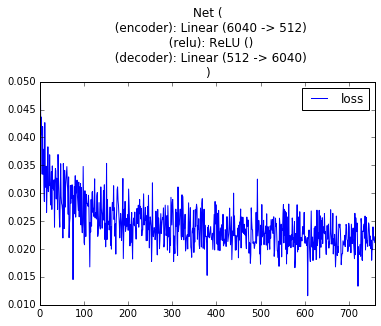

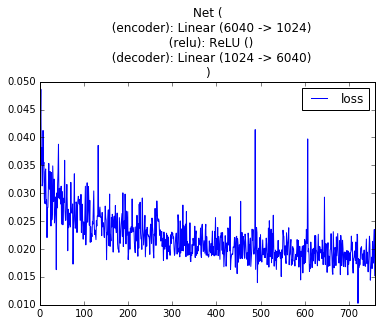

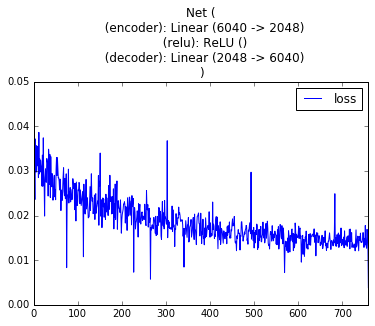

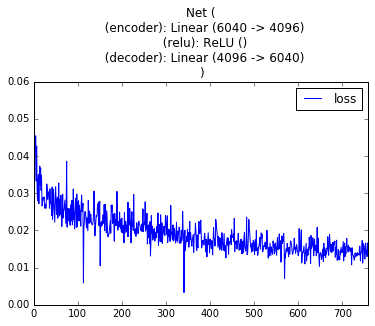

In [115]:
# TODO
for hs in [512, 1024, 2048, 4096]:
    n,p = bar_k(hs)
    nets[hs] = n
    perfs[hs] = p

In [116]:
perfs

{32: (0.40165562913907282, 0.034381869456303962),
 64: (0.46953642384105965, 0.042736504883785768),
 128: (0.53675496688741731, 0.055241307270886573),
 256: (0.55927152317880791, 0.062708872811403985),
 300: (0.5612582781456954, 0.063635564192691715),
 350: (0.56324503311258289, 0.064793890608367821),
 400: (0.56092715231788082, 0.063380583883596658),
 450: (0.54966887417218546, 0.063843936980928218),
 512: (0.53774834437086083, 0.060527671338145489),
 1024: (0.46986754966887417, 0.052177679904184038),
 2048: (0.36158940397350997, 0.03585310447959858),
 4096: (0.41192052980132454, 0.04318289018486688)}

In [5]:
nets = dict()
perfs = dict()

In [9]:
# TODO
for hs in [1700]:
    n,p = bar(hs)
    nets[hs] = n
    perfs[hs] = p

Net (
  (encoder): Linear (6040 -> 1700)
  (relu): ReLU ()
  (decoder): Linear (1700 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0425
Epoch [1/20], Step [2/38], Loss: 0.0419
Epoch [1/20], Step [3/38], Loss: 0.0329
Epoch [1/20], Step [4/38], Loss: 0.0305
Epoch [1/20], Step [5/38], Loss: 0.0371
Epoch [1/20], Step [6/38], Loss: 0.0277
Epoch [1/20], Step [7/38], Loss: 0.0369
Epoch [1/20], Step [8/38], Loss: 0.0361
Epoch [1/20], Step [9/38], Loss: 0.0351
Epoch [1/20], Step [10/38], Loss: 0.0379
Epoch [1/20], Step [11/38], Loss: 0.0367
Epoch [1/20], Step [12/38], Loss: 0.0299
Epoch [1/20], Step [13/38], Loss: 0.0350
Epoch [1/20], Step [14/38], Loss: 0.0271
Epoch [1/20], Step [15/38], Loss: 0.0321
Epoch [1/20], Step [16/38], Loss: 0.0315
Epoch [1/20], Step [17/38], Loss: 0.0311
Epoch [1/20], Step [18/38], Loss: 0.0308
Epoch [1/20], Step [19/38], Loss: 0.0251
Epoch [1/20], Step [20/38], Loss: 0.0297
Epoch [1/20], Step [21/38], Loss: 0.0265
Epoch [1/20], Step [22/38], Loss: 0.0248
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0178
Epoch [6/20], Step [11/38], Loss: 0.0210
Epoch [6/20], Step [12/38], Loss: 0.0202
Epoch [6/20], Step [13/38], Loss: 0.0192
Epoch [6/20], Step [14/38], Loss: 0.0201
Epoch [6/20], Step [15/38], Loss: 0.0190
Epoch [6/20], Step [16/38], Loss: 0.0209
Epoch [6/20], Step [17/38], Loss: 0.0217
Epoch [6/20], Step [18/38], Loss: 0.0226
Epoch [6/20], Step [19/38], Loss: 0.0180
Epoch [6/20], Step [20/38], Loss: 0.0217
Epoch [6/20], Step [21/38], Loss: 0.0169
Epoch [6/20], Step [22/38], Loss: 0.0199
Epoch [6/20], Step [23/38], Loss: 0.0214
Epoch [6/20], Step [24/38], Loss: 0.0228
Epoch [6/20], Step [25/38], Loss: 0.0238
Epoch [6/20], Step [26/38], Loss: 0.0233
Epoch [6/20], Step [27/38], Loss: 0.0255
Epoch [6/20], Step [28/38], Loss: 0.0223
Epoch [6/20], Step [29/38], Loss: 0.0251
Epoch [6/20], Step [30/38], Loss: 0.0230
Epoch [6/20], Step [31/38], Loss: 0.0231
Epoch [6/20], Step [32/38], Loss: 0.0195
Epoch [6/20], Step [33/38], Loss: 0.0222
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0158
Epoch [11/20], Step [21/38], Loss: 0.0161
Epoch [11/20], Step [22/38], Loss: 0.0170
Epoch [11/20], Step [23/38], Loss: 0.0188
Epoch [11/20], Step [24/38], Loss: 0.0160
Epoch [11/20], Step [25/38], Loss: 0.0227
Epoch [11/20], Step [26/38], Loss: 0.0190
Epoch [11/20], Step [27/38], Loss: 0.0172
Epoch [11/20], Step [28/38], Loss: 0.0210
Epoch [11/20], Step [29/38], Loss: 0.0173
Epoch [11/20], Step [30/38], Loss: 0.0161
Epoch [11/20], Step [31/38], Loss: 0.0188
Epoch [11/20], Step [32/38], Loss: 0.0226
Epoch [11/20], Step [33/38], Loss: 0.0194
Epoch [11/20], Step [34/38], Loss: 0.0166
Epoch [11/20], Step [35/38], Loss: 0.0167
Epoch [11/20], Step [36/38], Loss: 0.0185
Epoch [11/20], Step [37/38], Loss: 0.0169
Epoch [11/20], Step [38/38], Loss: 0.0234
Epoch [12/20], Step [1/38], Loss: 0.0175
Epoch [12/20], Step [2/38], Loss: 0.0163
Epoch [12/20], Step [3/38], Loss: 0.0161
Epoch [12/20], Step [4/38], Loss: 0.0172
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0164
Epoch [16/20], Step [28/38], Loss: 0.0189
Epoch [16/20], Step [29/38], Loss: 0.0163
Epoch [16/20], Step [30/38], Loss: 0.0139
Epoch [16/20], Step [31/38], Loss: 0.0157
Epoch [16/20], Step [32/38], Loss: 0.0167
Epoch [16/20], Step [33/38], Loss: 0.0147
Epoch [16/20], Step [34/38], Loss: 0.0174
Epoch [16/20], Step [35/38], Loss: 0.0168
Epoch [16/20], Step [36/38], Loss: 0.0163
Epoch [16/20], Step [37/38], Loss: 0.0181
Epoch [16/20], Step [38/38], Loss: 0.0251
Epoch [17/20], Step [1/38], Loss: 0.0175
Epoch [17/20], Step [2/38], Loss: 0.0139
Epoch [17/20], Step [3/38], Loss: 0.0137
Epoch [17/20], Step [4/38], Loss: 0.0183
Epoch [17/20], Step [5/38], Loss: 0.0187
Epoch [17/20], Step [6/38], Loss: 0.0135
Epoch [17/20], Step [7/38], Loss: 0.0123
Epoch [17/20], Step [8/38], Loss: 0.0146
Epoch [17/20], Step [9/38], Loss: 0.0151
Epoch [17/20], Step [10/38], Loss: 0.0197
Epoch [17/20], Step [11/38], Loss: 0.0162
Epoch [17/20], Step [12/38], Loss: 0.0134
E

TypeError: 'NoneType' object is not iterable

 (1700, (0.38013245033112586, 0.038178437367649545))

In [122]:
best_net = Net(input_size, 350, output_size)
best_net.load_state_dict(torch.load('prediction-Net (\n  (encoder): Linear (6040 -> 350)\n  (relu): ReLU ()\n  (decoder): Linear (350 -> 6040)\n)-epoch-20.pkl'))

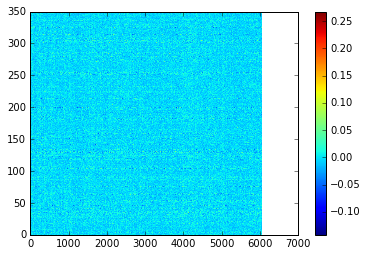

In [156]:
plt.pcolor( best_net.encoder.weight.data.numpy())
plt.colorbar()

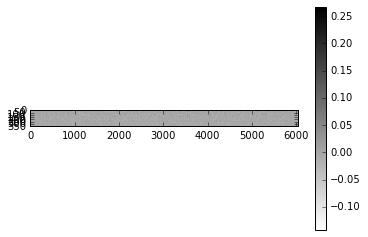

In [155]:
plt.imshow(best_net.encoder.weight.data.numpy(), cmap='binary')
plt.colorbar()

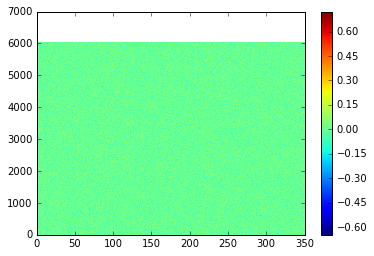

In [154]:
plt.pcolor(best_net.decoder.weight.data.numpy())
plt.colorbar()

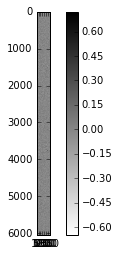

In [151]:
plt.imshow(best_net.decoder.weight.data.numpy(), cmap='binary')
plt.colorbar()

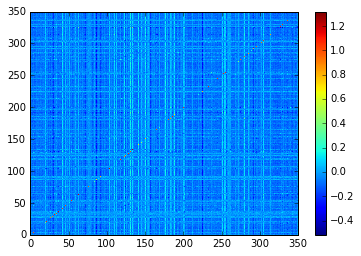

In [157]:
plt.pcolor(np.dot(best_net.encoder.weight.data.numpy(), best_net.decoder.weight.data.numpy()) )
plt.colorbar()

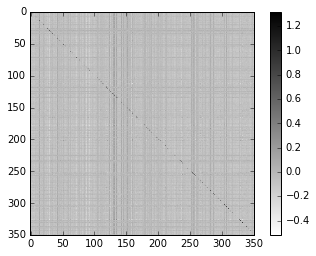

In [147]:
plt.imshow(np.dot(best_net.encoder.weight.data.numpy(), best_net.decoder.weight.data.numpy()),cmap=plt.get_cmap('binary') )
plt.colorbar()

## another net

In [2]:
larger_net = Net(6040, 4096, 6040)
larger_net.load_state_dict(torch.load('prediction-Net (\n  (encoder): Linear (6040 -> 4096)\n  (relu): ReLU ()\n  (decoder): Linear (4096 -> 6040)\n)-epoch-20.pkl'))


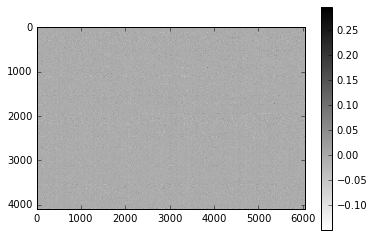

In [150]:
plt.imshow(larger_net.encoder.weight.data.numpy(), cmap=plt.get_cmap('binary'))
plt.colorbar()


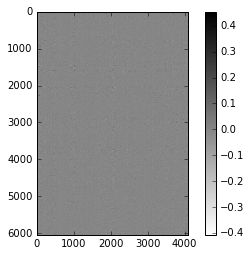

In [159]:
plt.imshow(larger_net.decoder.weight.data.numpy(), cmap=plt.get_cmap('binary'))
plt.colorbar()


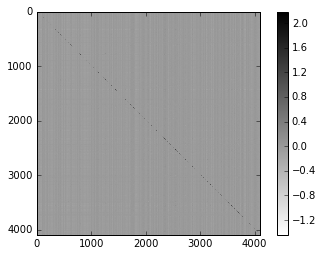

In [162]:
plt.imshow(np.dot(larger_net.encoder.weight.data.numpy(),larger_net.decoder.weight.data.numpy()), cmap=plt.get_cmap('binary'))
plt.colorbar()


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.pcolor(larger_net.encoder.weight.data.numpy())
plt.colorbar()


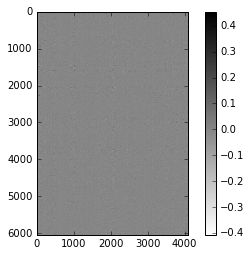

In [165]:
plt.pco(larger_net.decoder.weight.data.numpy(), cmap=plt.get_cmap('binary'))
plt.colorbar()


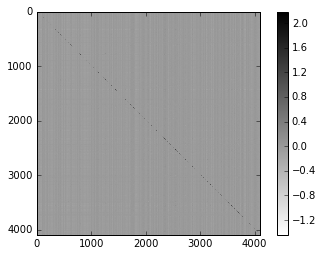

In [166]:
plt.imshow(np.dot(larger_net.encoder.weight.data.numpy(),larger_net.decoder.weight.data.numpy()), cmap=plt.get_cmap('binary'))
plt.colorbar()

# AE with loss on positve only

In [16]:
def mse_loss(input, target):
    return torch.sum((input - target) ** 2)

def weighted_mse_loss(input, target, weight):
    return torch.sum(weight * (input - target) ** 2) 

In [17]:


def bar_weighted(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 10
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = weighted_mse_loss
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-weigthedLoss-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot(title=str(net))
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    perf = r.evaluate(data.test_dataset.test)
    print (hidden_size, perf)
    return net, perf
#     return net


Net (
  (encoder): Linear (6040 -> 300)
  (relu): ReLU ()
  (decoder): Linear (300 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 21995.6348
Epoch [1/10], Step [2/38], Loss: 26746.5039
Epoch [1/10], Step [3/38], Loss: 22393.6797
Epoch [1/10], Step [4/38], Loss: 14268.2021
Epoch [1/10], Step [5/38], Loss: 13564.0117
Epoch [1/10], Step [6/38], Loss: 16243.8721
Epoch [1/10], Step [7/38], Loss: 7423.3208
Epoch [1/10], Step [8/38], Loss: 7032.0098
Epoch [1/10], Step [9/38], Loss: 6901.8960
Epoch [1/10], Step [10/38], Loss: 5510.4673
Epoch [1/10], Step [11/38], Loss: 7060.6851
Epoch [1/10], Step [12/38], Loss: 3977.3896
Epoch [1/10], Step [13/38], Loss: 5230.6841
Epoch [1/10], Step [14/38], Loss: 4629.7070
Epoch [1/10], Step [15/38], Loss: 5083.1128
Epoch [1/10], Step [16/38], Loss: 4011.9150
Epoch [1/10], Step [17/38], Loss: 4237.3472
Epoch [1/10], Step [18/38], Loss: 3606.2493
Epoch [1/10], Step [19/38], Loss: 4703.9673
Epoch [1/10], Step [20/38], Loss: 4065.9343
Epoch [1/10], Step [21/38], L

Epoch [5/10], Step [37/38], Loss: 293.6055
Epoch [5/10], Step [38/38], Loss: 14.1921
Epoch [6/10], Step [1/38], Loss: 199.1733
Epoch [6/10], Step [2/38], Loss: 177.6678
Epoch [6/10], Step [3/38], Loss: 194.5674
Epoch [6/10], Step [4/38], Loss: 129.5571
Epoch [6/10], Step [5/38], Loss: 222.8112
Epoch [6/10], Step [6/38], Loss: 1094.1722
Epoch [6/10], Step [7/38], Loss: 331.4538
Epoch [6/10], Step [8/38], Loss: 341.5876
Epoch [6/10], Step [9/38], Loss: 287.5183
Epoch [6/10], Step [10/38], Loss: 281.0541
Epoch [6/10], Step [11/38], Loss: 275.3092
Epoch [6/10], Step [12/38], Loss: 388.0453
Epoch [6/10], Step [13/38], Loss: 469.4402
Epoch [6/10], Step [14/38], Loss: 297.6460
Epoch [6/10], Step [15/38], Loss: 173.9422
Epoch [6/10], Step [16/38], Loss: 223.5174
Epoch [6/10], Step [17/38], Loss: 198.4560
Epoch [6/10], Step [18/38], Loss: 281.8758
Epoch [6/10], Step [19/38], Loss: 353.1918
Epoch [6/10], Step [20/38], Loss: 142.3919
Epoch [6/10], Step [21/38], Loss: 355.6431
Epoch [6/10], Step [

(300, (0.16986754966887416, 0.012661984900412553))
Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 35215.7891
Epoch [1/10], Step [2/38], Loss: 23351.4023
Epoch [1/10], Step [3/38], Loss: 20167.7480
Epoch [1/10], Step [4/38], Loss: 29662.3262
Epoch [1/10], Step [5/38], Loss: 13309.5693
Epoch [1/10], Step [6/38], Loss: 11800.4326
Epoch [1/10], Step [7/38], Loss: 11493.1426
Epoch [1/10], Step [8/38], Loss: 9270.0127
Epoch [1/10], Step [9/38], Loss: 6834.2134
Epoch [1/10], Step [10/38], Loss: 6461.3306
Epoch [1/10], Step [11/38], Loss: 5948.0195
Epoch [1/10], Step [12/38], Loss: 9183.4756
Epoch [1/10], Step [13/38], Loss: 7015.7832
Epoch [1/10], Step [14/38], Loss: 5099.0605
Epoch [1/10], Step [15/38], Loss: 5107.8882
Epoch [1/10], Step [16/38], Loss: 7728.0278
Epoch [1/10], Step [17/38], Loss: 6147.2651
Epoch [1/10], Step [18/38], Loss: 5153.6514
Epoch [1/10], Step [19/38], Loss: 3579.8435
Epoch [1/10], Step [2

Epoch [5/10], Step [37/38], Loss: 227.8967
Epoch [5/10], Step [38/38], Loss: 10.6842
Epoch [6/10], Step [1/38], Loss: 172.4718
Epoch [6/10], Step [2/38], Loss: 173.3473
Epoch [6/10], Step [3/38], Loss: 154.5100
Epoch [6/10], Step [4/38], Loss: 126.8075
Epoch [6/10], Step [5/38], Loss: 186.2571
Epoch [6/10], Step [6/38], Loss: 133.9094
Epoch [6/10], Step [7/38], Loss: 182.1464
Epoch [6/10], Step [8/38], Loss: 189.6684
Epoch [6/10], Step [9/38], Loss: 172.2044
Epoch [6/10], Step [10/38], Loss: 177.2693
Epoch [6/10], Step [11/38], Loss: 147.0017
Epoch [6/10], Step [12/38], Loss: 145.3244
Epoch [6/10], Step [13/38], Loss: 166.6206
Epoch [6/10], Step [14/38], Loss: 150.5381
Epoch [6/10], Step [15/38], Loss: 212.8392
Epoch [6/10], Step [16/38], Loss: 139.6789
Epoch [6/10], Step [17/38], Loss: 139.1586
Epoch [6/10], Step [18/38], Loss: 169.6211
Epoch [6/10], Step [19/38], Loss: 119.3403
Epoch [6/10], Step [20/38], Loss: 1194.2961
Epoch [6/10], Step [21/38], Loss: 166.9852
Epoch [6/10], Step [

(350, (0.049999999999999996, 0.0048439373043917336))
Net (
  (encoder): Linear (6040 -> 400)
  (relu): ReLU ()
  (decoder): Linear (400 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 20615.0781
Epoch [1/10], Step [2/38], Loss: 25704.9082
Epoch [1/10], Step [3/38], Loss: 17472.6172
Epoch [1/10], Step [4/38], Loss: 11859.4805
Epoch [1/10], Step [5/38], Loss: 19462.8086
Epoch [1/10], Step [6/38], Loss: 11654.5732
Epoch [1/10], Step [7/38], Loss: 8641.4268
Epoch [1/10], Step [8/38], Loss: 10501.3506
Epoch [1/10], Step [9/38], Loss: 9872.9766
Epoch [1/10], Step [10/38], Loss: 9955.9150
Epoch [1/10], Step [11/38], Loss: 8356.8770
Epoch [1/10], Step [12/38], Loss: 9178.8672
Epoch [1/10], Step [13/38], Loss: 6626.5112
Epoch [1/10], Step [14/38], Loss: 5160.3369
Epoch [1/10], Step [15/38], Loss: 4886.4683
Epoch [1/10], Step [16/38], Loss: 3636.6553
Epoch [1/10], Step [17/38], Loss: 4132.7124
Epoch [1/10], Step [18/38], Loss: 4869.8564
Epoch [1/10], Step [19/38], Loss: 5953.0708
Epoch [1/10], Step 

Epoch [5/10], Step [38/38], Loss: 22.3106
Epoch [6/10], Step [1/38], Loss: 169.4124
Epoch [6/10], Step [2/38], Loss: 188.6501
Epoch [6/10], Step [3/38], Loss: 164.8225
Epoch [6/10], Step [4/38], Loss: 136.1134
Epoch [6/10], Step [5/38], Loss: 250.8981
Epoch [6/10], Step [6/38], Loss: 270.1834
Epoch [6/10], Step [7/38], Loss: 176.9149
Epoch [6/10], Step [8/38], Loss: 158.7712
Epoch [6/10], Step [9/38], Loss: 159.4595
Epoch [6/10], Step [10/38], Loss: 170.6295
Epoch [6/10], Step [11/38], Loss: 181.0057
Epoch [6/10], Step [12/38], Loss: 152.5839
Epoch [6/10], Step [13/38], Loss: 157.5246
Epoch [6/10], Step [14/38], Loss: 165.4095
Epoch [6/10], Step [15/38], Loss: 232.7087
Epoch [6/10], Step [16/38], Loss: 205.8474
Epoch [6/10], Step [17/38], Loss: 177.9550
Epoch [6/10], Step [18/38], Loss: 177.3333
Epoch [6/10], Step [19/38], Loss: 792.7035
Epoch [6/10], Step [20/38], Loss: 124.3748
Epoch [6/10], Step [21/38], Loss: 266.6943
Epoch [6/10], Step [22/38], Loss: 145.3273
Epoch [6/10], Step [2

(400, (0.12516556291390726, 0.010381961160873537))
Net (
  (encoder): Linear (6040 -> 450)
  (relu): ReLU ()
  (decoder): Linear (450 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 23600.3594
Epoch [1/10], Step [2/38], Loss: 21479.6641
Epoch [1/10], Step [3/38], Loss: 23739.1914
Epoch [1/10], Step [4/38], Loss: 15031.3916
Epoch [1/10], Step [5/38], Loss: 10020.8711
Epoch [1/10], Step [6/38], Loss: 10215.9639
Epoch [1/10], Step [7/38], Loss: 6572.2129
Epoch [1/10], Step [8/38], Loss: 6345.6997
Epoch [1/10], Step [9/38], Loss: 7137.5996
Epoch [1/10], Step [10/38], Loss: 6632.6948
Epoch [1/10], Step [11/38], Loss: 4097.4517
Epoch [1/10], Step [12/38], Loss: 4622.6182
Epoch [1/10], Step [13/38], Loss: 3891.0923
Epoch [1/10], Step [14/38], Loss: 5058.6211
Epoch [1/10], Step [15/38], Loss: 3457.0479
Epoch [1/10], Step [16/38], Loss: 4033.5981
Epoch [1/10], Step [17/38], Loss: 2598.0955
Epoch [1/10], Step [18/38], Loss: 3009.9072
Epoch [1/10], Step [19/38], Loss: 3527.1699
Epoch [1/10], Step [20

Epoch [5/10], Step [37/38], Loss: 213.3717
Epoch [5/10], Step [38/38], Loss: 27.9604
Epoch [6/10], Step [1/38], Loss: 187.5573
Epoch [6/10], Step [2/38], Loss: 738.2056
Epoch [6/10], Step [3/38], Loss: 179.4872
Epoch [6/10], Step [4/38], Loss: 604.8243
Epoch [6/10], Step [5/38], Loss: 344.1606
Epoch [6/10], Step [6/38], Loss: 274.0712
Epoch [6/10], Step [7/38], Loss: 443.2560
Epoch [6/10], Step [8/38], Loss: 518.5081
Epoch [6/10], Step [9/38], Loss: 190.9869
Epoch [6/10], Step [10/38], Loss: 226.8348
Epoch [6/10], Step [11/38], Loss: 238.4081
Epoch [6/10], Step [12/38], Loss: 204.8260
Epoch [6/10], Step [13/38], Loss: 375.0815
Epoch [6/10], Step [14/38], Loss: 175.0817
Epoch [6/10], Step [15/38], Loss: 244.9510
Epoch [6/10], Step [16/38], Loss: 182.7793
Epoch [6/10], Step [17/38], Loss: 242.1982
Epoch [6/10], Step [18/38], Loss: 236.2154
Epoch [6/10], Step [19/38], Loss: 243.8049
Epoch [6/10], Step [20/38], Loss: 164.3154
Epoch [6/10], Step [21/38], Loss: 3065.2229
Epoch [6/10], Step [

(450, (0.029801324503311258, 0.0033506738388804492))


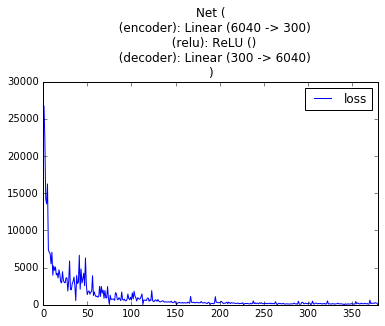

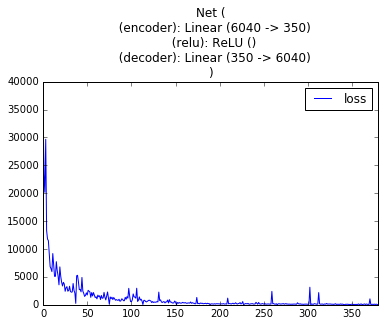

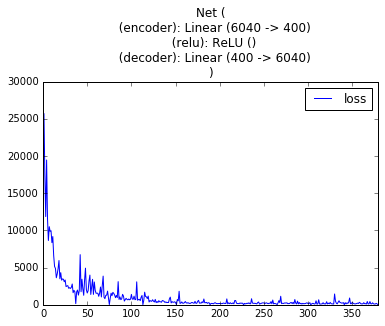

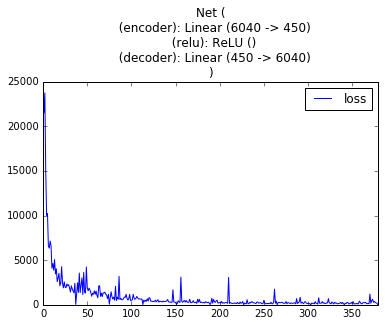

In [103]:
w_nets, w_perfs  = dict(), dict()
for hs in [300, 350, 400, 450]:
    n,p = bar(hs)
    w_nets[hs] = n
    w_perfs[hs] = p

In [104]:
w_perfs

{300: (0.16986754966887416, 0.012661984900412553),
 350: (0.049999999999999996, 0.0048439373043917336),
 400: (0.12516556291390726, 0.010381961160873537),
 450: (0.029801324503311258, 0.0033506738388804492)}

In [20]:
data = dataset.load_data(0)
w_nets, w_perfs  = dict(), dict()
for hs in [50, 100, 150, 200, 250]:
    n,p = bar_weighted(hs)
    w_nets[hs] = n
    w_perfs[hs] = p

Net (
  (encoder): Linear (6040 -> 50)
  (relu): ReLU ()
  (decoder): Linear (50 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 25727.2871
Epoch [1/10], Step [2/38], Loss: 32474.8984
Epoch [1/10], Step [3/38], Loss: 21997.6055
Epoch [1/10], Step [4/38], Loss: 24255.4902
Epoch [1/10], Step [5/38], Loss: 25401.7168
Epoch [1/10], Step [6/38], Loss: 29034.0156
Epoch [1/10], Step [7/38], Loss: 26216.3125
Epoch [1/10], Step [8/38], Loss: 25263.0469
Epoch [1/10], Step [9/38], Loss: 24341.0488
Epoch [1/10], Step [10/38], Loss: 19828.9375
Epoch [1/10], Step [11/38], Loss: 19216.6680
Epoch [1/10], Step [12/38], Loss: 15679.3311
Epoch [1/10], Step [13/38], Loss: 18412.5605
Epoch [1/10], Step [14/38], Loss: 18424.2539
Epoch [1/10], Step [15/38], Loss: 16809.9492
Epoch [1/10], Step [16/38], Loss: 15687.1260
Epoch [1/10], Step [17/38], Loss: 19599.5645
Epoch [1/10], Step [18/38], Loss: 12657.0254
Epoch [1/10], Step [19/38], Loss: 12407.5410
Epoch [1/10], Step [20/38], Loss: 12672.4502
Epoch [1/10], Ste

Epoch [5/10], Step [38/38], Loss: 43.0713
Epoch [6/10], Step [1/38], Loss: 784.5162
Epoch [6/10], Step [2/38], Loss: 795.7824
Epoch [6/10], Step [3/38], Loss: 959.6642
Epoch [6/10], Step [4/38], Loss: 947.5923
Epoch [6/10], Step [5/38], Loss: 842.8468
Epoch [6/10], Step [6/38], Loss: 517.0942
Epoch [6/10], Step [7/38], Loss: 1036.0409
Epoch [6/10], Step [8/38], Loss: 1203.3087
Epoch [6/10], Step [9/38], Loss: 1254.7445
Epoch [6/10], Step [10/38], Loss: 617.4893
Epoch [6/10], Step [11/38], Loss: 1399.4032
Epoch [6/10], Step [12/38], Loss: 1681.6394
Epoch [6/10], Step [13/38], Loss: 1709.8120
Epoch [6/10], Step [14/38], Loss: 902.2090
Epoch [6/10], Step [15/38], Loss: 1104.7079
Epoch [6/10], Step [16/38], Loss: 560.7628
Epoch [6/10], Step [17/38], Loss: 856.4630
Epoch [6/10], Step [18/38], Loss: 707.4673
Epoch [6/10], Step [19/38], Loss: 731.4981
Epoch [6/10], Step [20/38], Loss: 601.8715
Epoch [6/10], Step [21/38], Loss: 608.3718
Epoch [6/10], Step [22/38], Loss: 798.4168
Epoch [6/10], 

(50, (0.032450331125827819, 0.0032536754196810054))
Net (
  (encoder): Linear (6040 -> 100)
  (relu): ReLU ()
  (decoder): Linear (100 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 22998.8320
Epoch [1/10], Step [2/38], Loss: 23011.6504
Epoch [1/10], Step [3/38], Loss: 21413.9238
Epoch [1/10], Step [4/38], Loss: 16982.0566
Epoch [1/10], Step [5/38], Loss: 18468.4922
Epoch [1/10], Step [6/38], Loss: 24005.9062
Epoch [1/10], Step [7/38], Loss: 17995.5469
Epoch [1/10], Step [8/38], Loss: 19066.8750
Epoch [1/10], Step [9/38], Loss: 15139.3076
Epoch [1/10], Step [10/38], Loss: 10590.3643
Epoch [1/10], Step [11/38], Loss: 11803.8145
Epoch [1/10], Step [12/38], Loss: 10842.1309
Epoch [1/10], Step [13/38], Loss: 9069.5010
Epoch [1/10], Step [14/38], Loss: 9886.9219
Epoch [1/10], Step [15/38], Loss: 10859.2559
Epoch [1/10], Step [16/38], Loss: 6991.6963
Epoch [1/10], Step [17/38], Loss: 9403.2969
Epoch [1/10], Step [18/38], Loss: 9375.3955
Epoch [1/10], Step [19/38], Loss: 6955.3555
Epoch [1/10], 

Epoch [6/10], Step [1/38], Loss: 424.4495
Epoch [6/10], Step [2/38], Loss: 439.5361
Epoch [6/10], Step [3/38], Loss: 318.6858
Epoch [6/10], Step [4/38], Loss: 474.8857
Epoch [6/10], Step [5/38], Loss: 301.7686
Epoch [6/10], Step [6/38], Loss: 460.5606
Epoch [6/10], Step [7/38], Loss: 274.2130
Epoch [6/10], Step [8/38], Loss: 717.4421
Epoch [6/10], Step [9/38], Loss: 628.3422
Epoch [6/10], Step [10/38], Loss: 311.0732
Epoch [6/10], Step [11/38], Loss: 698.0355
Epoch [6/10], Step [12/38], Loss: 1565.1733
Epoch [6/10], Step [13/38], Loss: 259.4440
Epoch [6/10], Step [14/38], Loss: 370.2212
Epoch [6/10], Step [15/38], Loss: 499.0328
Epoch [6/10], Step [16/38], Loss: 578.1936
Epoch [6/10], Step [17/38], Loss: 958.0807
Epoch [6/10], Step [18/38], Loss: 300.1110
Epoch [6/10], Step [19/38], Loss: 673.4270
Epoch [6/10], Step [20/38], Loss: 366.8800
Epoch [6/10], Step [21/38], Loss: 520.4618
Epoch [6/10], Step [22/38], Loss: 892.2949
Epoch [6/10], Step [23/38], Loss: 5471.1963
Epoch [6/10], Step

Epoch [1/10], Step [1/38], Loss: 29849.0684
Epoch [1/10], Step [2/38], Loss: 22510.2461
Epoch [1/10], Step [3/38], Loss: 26043.7129
Epoch [1/10], Step [4/38], Loss: 17774.3438
Epoch [1/10], Step [5/38], Loss: 21995.1855
Epoch [1/10], Step [6/38], Loss: 26513.0820
Epoch [1/10], Step [7/38], Loss: 18132.6211
Epoch [1/10], Step [8/38], Loss: 21993.1504
Epoch [1/10], Step [9/38], Loss: 15679.1143
Epoch [1/10], Step [10/38], Loss: 11885.2412
Epoch [1/10], Step [11/38], Loss: 11394.8721
Epoch [1/10], Step [12/38], Loss: 12323.2803
Epoch [1/10], Step [13/38], Loss: 7191.2598
Epoch [1/10], Step [14/38], Loss: 7097.3730
Epoch [1/10], Step [15/38], Loss: 6263.0493
Epoch [1/10], Step [16/38], Loss: 5678.8135
Epoch [1/10], Step [17/38], Loss: 5937.4863
Epoch [1/10], Step [18/38], Loss: 4745.8853
Epoch [1/10], Step [19/38], Loss: 4859.9116
Epoch [1/10], Step [20/38], Loss: 4842.6040
Epoch [1/10], Step [21/38], Loss: 6505.3267
Epoch [1/10], Step [22/38], Loss: 3950.6177
Epoch [1/10], Step [23/38], L

Epoch [6/10], Step [1/38], Loss: 226.0104
Epoch [6/10], Step [2/38], Loss: 526.3578
Epoch [6/10], Step [3/38], Loss: 232.2398
Epoch [6/10], Step [4/38], Loss: 379.2587
Epoch [6/10], Step [5/38], Loss: 228.5193
Epoch [6/10], Step [6/38], Loss: 318.0924
Epoch [6/10], Step [7/38], Loss: 309.9700
Epoch [6/10], Step [8/38], Loss: 449.2861
Epoch [6/10], Step [9/38], Loss: 218.2886
Epoch [6/10], Step [10/38], Loss: 212.6644
Epoch [6/10], Step [11/38], Loss: 320.2517
Epoch [6/10], Step [12/38], Loss: 1428.5295
Epoch [6/10], Step [13/38], Loss: 271.5829
Epoch [6/10], Step [14/38], Loss: 314.4015
Epoch [6/10], Step [15/38], Loss: 553.0558
Epoch [6/10], Step [16/38], Loss: 451.4846
Epoch [6/10], Step [17/38], Loss: 274.5055
Epoch [6/10], Step [18/38], Loss: 268.2185
Epoch [6/10], Step [19/38], Loss: 1983.7721
Epoch [6/10], Step [20/38], Loss: 294.1624
Epoch [6/10], Step [21/38], Loss: 326.9030
Epoch [6/10], Step [22/38], Loss: 636.3490
Epoch [6/10], Step [23/38], Loss: 516.2754
Epoch [6/10], Step

Epoch [1/10], Step [1/38], Loss: 25352.8516
Epoch [1/10], Step [2/38], Loss: 25984.7676
Epoch [1/10], Step [3/38], Loss: 24232.5781
Epoch [1/10], Step [4/38], Loss: 21431.9707
Epoch [1/10], Step [5/38], Loss: 15332.7041
Epoch [1/10], Step [6/38], Loss: 13858.6191
Epoch [1/10], Step [7/38], Loss: 11680.5703
Epoch [1/10], Step [8/38], Loss: 9696.0127
Epoch [1/10], Step [9/38], Loss: 10083.3271
Epoch [1/10], Step [10/38], Loss: 7910.0337
Epoch [1/10], Step [11/38], Loss: 7319.3711
Epoch [1/10], Step [12/38], Loss: 5571.0098
Epoch [1/10], Step [13/38], Loss: 6001.8008
Epoch [1/10], Step [14/38], Loss: 6364.1436
Epoch [1/10], Step [15/38], Loss: 6093.0034
Epoch [1/10], Step [16/38], Loss: 4271.5522
Epoch [1/10], Step [17/38], Loss: 5163.5093
Epoch [1/10], Step [18/38], Loss: 3932.1536
Epoch [1/10], Step [19/38], Loss: 3515.8264
Epoch [1/10], Step [20/38], Loss: 4275.3203
Epoch [1/10], Step [21/38], Loss: 2609.5837
Epoch [1/10], Step [22/38], Loss: 4256.8047
Epoch [1/10], Step [23/38], Loss:

Epoch [6/10], Step [1/38], Loss: 524.6184
Epoch [6/10], Step [2/38], Loss: 558.0085
Epoch [6/10], Step [3/38], Loss: 306.5731
Epoch [6/10], Step [4/38], Loss: 257.0443
Epoch [6/10], Step [5/38], Loss: 282.2740
Epoch [6/10], Step [6/38], Loss: 287.1526
Epoch [6/10], Step [7/38], Loss: 453.7559
Epoch [6/10], Step [8/38], Loss: 444.4586
Epoch [6/10], Step [9/38], Loss: 558.0712
Epoch [6/10], Step [10/38], Loss: 325.1128
Epoch [6/10], Step [11/38], Loss: 339.3290
Epoch [6/10], Step [12/38], Loss: 223.9694
Epoch [6/10], Step [13/38], Loss: 235.0875
Epoch [6/10], Step [14/38], Loss: 293.8175
Epoch [6/10], Step [15/38], Loss: 434.5251
Epoch [6/10], Step [16/38], Loss: 198.8333
Epoch [6/10], Step [17/38], Loss: 217.6786
Epoch [6/10], Step [18/38], Loss: 574.6447
Epoch [6/10], Step [19/38], Loss: 664.1730
Epoch [6/10], Step [20/38], Loss: 337.4860
Epoch [6/10], Step [21/38], Loss: 401.4489
Epoch [6/10], Step [22/38], Loss: 441.0093
Epoch [6/10], Step [23/38], Loss: 438.9249
Epoch [6/10], Step [

Epoch [1/10], Step [1/38], Loss: 25132.1934
Epoch [1/10], Step [2/38], Loss: 24643.6250
Epoch [1/10], Step [3/38], Loss: 20518.3516
Epoch [1/10], Step [4/38], Loss: 14396.0039
Epoch [1/10], Step [5/38], Loss: 13946.9238
Epoch [1/10], Step [6/38], Loss: 13007.4795
Epoch [1/10], Step [7/38], Loss: 15390.1143
Epoch [1/10], Step [8/38], Loss: 8662.8672
Epoch [1/10], Step [9/38], Loss: 8092.6904
Epoch [1/10], Step [10/38], Loss: 8410.2109
Epoch [1/10], Step [11/38], Loss: 6351.5293
Epoch [1/10], Step [12/38], Loss: 4943.5801
Epoch [1/10], Step [13/38], Loss: 4672.3247
Epoch [1/10], Step [14/38], Loss: 4701.8916
Epoch [1/10], Step [15/38], Loss: 3964.6514
Epoch [1/10], Step [16/38], Loss: 3473.7273
Epoch [1/10], Step [17/38], Loss: 5634.5386
Epoch [1/10], Step [18/38], Loss: 5434.8247
Epoch [1/10], Step [19/38], Loss: 4050.9053
Epoch [1/10], Step [20/38], Loss: 5632.5205
Epoch [1/10], Step [21/38], Loss: 4573.1274
Epoch [1/10], Step [22/38], Loss: 2992.5146
Epoch [1/10], Step [23/38], Loss: 

Epoch [6/10], Step [1/38], Loss: 144.9010
Epoch [6/10], Step [2/38], Loss: 310.1311
Epoch [6/10], Step [3/38], Loss: 209.4358
Epoch [6/10], Step [4/38], Loss: 222.3477
Epoch [6/10], Step [5/38], Loss: 164.7881
Epoch [6/10], Step [6/38], Loss: 253.1047
Epoch [6/10], Step [7/38], Loss: 170.2616
Epoch [6/10], Step [8/38], Loss: 159.8086
Epoch [6/10], Step [9/38], Loss: 223.1016
Epoch [6/10], Step [10/38], Loss: 343.9145
Epoch [6/10], Step [11/38], Loss: 246.6418
Epoch [6/10], Step [12/38], Loss: 141.4626
Epoch [6/10], Step [13/38], Loss: 226.0063
Epoch [6/10], Step [14/38], Loss: 226.3375
Epoch [6/10], Step [15/38], Loss: 182.7908
Epoch [6/10], Step [16/38], Loss: 146.8964
Epoch [6/10], Step [17/38], Loss: 173.4013
Epoch [6/10], Step [18/38], Loss: 233.7919
Epoch [6/10], Step [19/38], Loss: 230.2578
Epoch [6/10], Step [20/38], Loss: 137.9049
Epoch [6/10], Step [21/38], Loss: 178.5470
Epoch [6/10], Step [22/38], Loss: 182.8244
Epoch [6/10], Step [23/38], Loss: 141.3314
Epoch [6/10], Step [

In [21]:
w_perfs

{50: (0.032450331125827819, 0.0032536754196810054),
 100: (0.055298013245033119, 0.0066164076534393403),
 150: (0.27417218543046362, 0.024467853998306012),
 200: (0.11490066225165564, 0.011386638816646593),
 250: (0.11158940397350994, 0.011060451230494447)}

In [22]:
for hs in [300, 350, 400, 450]:
    n,p = bar_weighted(hs)
    w_nets[hs] = n
    w_perfs[hs] = p

Net (
  (encoder): Linear (6040 -> 300)
  (relu): ReLU ()
  (decoder): Linear (300 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 19147.2676
Epoch [1/10], Step [2/38], Loss: 24872.5684
Epoch [1/10], Step [3/38], Loss: 19463.9082
Epoch [1/10], Step [4/38], Loss: 16263.6279
Epoch [1/10], Step [5/38], Loss: 10678.6104
Epoch [1/10], Step [6/38], Loss: 10804.2422
Epoch [1/10], Step [7/38], Loss: 13370.7998
Epoch [1/10], Step [8/38], Loss: 6161.7925
Epoch [1/10], Step [9/38], Loss: 8497.5693
Epoch [1/10], Step [10/38], Loss: 7553.1694
Epoch [1/10], Step [11/38], Loss: 8242.7627
Epoch [1/10], Step [12/38], Loss: 5746.1392
Epoch [1/10], Step [13/38], Loss: 8546.9160
Epoch [1/10], Step [14/38], Loss: 4904.8730
Epoch [1/10], Step [15/38], Loss: 4320.6372
Epoch [1/10], Step [16/38], Loss: 4275.5654
Epoch [1/10], Step [17/38], Loss: 3783.7537
Epoch [1/10], Step [18/38], Loss: 5234.5845
Epoch [1/10], Step [19/38], Loss: 3726.1016
Epoch [1/10], Step [20/38], Loss: 2913.0278
Epoch [1/10], Step [21/38], 

Epoch [5/10], Step [37/38], Loss: 529.8828
Epoch [5/10], Step [38/38], Loss: 13.9288
Epoch [6/10], Step [1/38], Loss: 2172.1074
Epoch [6/10], Step [2/38], Loss: 306.4314
Epoch [6/10], Step [3/38], Loss: 507.1054
Epoch [6/10], Step [4/38], Loss: 407.2325
Epoch [6/10], Step [5/38], Loss: 621.5922
Epoch [6/10], Step [6/38], Loss: 530.0751
Epoch [6/10], Step [7/38], Loss: 749.4155
Epoch [6/10], Step [8/38], Loss: 527.8006
Epoch [6/10], Step [9/38], Loss: 543.2658
Epoch [6/10], Step [10/38], Loss: 262.9238
Epoch [6/10], Step [11/38], Loss: 352.7386
Epoch [6/10], Step [12/38], Loss: 425.0163
Epoch [6/10], Step [13/38], Loss: 583.2194
Epoch [6/10], Step [14/38], Loss: 300.4721
Epoch [6/10], Step [15/38], Loss: 255.9917
Epoch [6/10], Step [16/38], Loss: 142.5426
Epoch [6/10], Step [17/38], Loss: 225.3178
Epoch [6/10], Step [18/38], Loss: 397.9683
Epoch [6/10], Step [19/38], Loss: 374.0921
Epoch [6/10], Step [20/38], Loss: 381.9357
Epoch [6/10], Step [21/38], Loss: 372.1077
Epoch [6/10], Step [

(300, (0.024834437086092717, 0.002625839600237643))
Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 26074.7773
Epoch [1/10], Step [2/38], Loss: 19701.7910
Epoch [1/10], Step [3/38], Loss: 15027.4443
Epoch [1/10], Step [4/38], Loss: 20790.4395
Epoch [1/10], Step [5/38], Loss: 10728.0273
Epoch [1/10], Step [6/38], Loss: 18080.4531
Epoch [1/10], Step [7/38], Loss: 9491.1338
Epoch [1/10], Step [8/38], Loss: 10443.3193
Epoch [1/10], Step [9/38], Loss: 7886.3477
Epoch [1/10], Step [10/38], Loss: 10126.8232
Epoch [1/10], Step [11/38], Loss: 6372.3608
Epoch [1/10], Step [12/38], Loss: 7310.9302
Epoch [1/10], Step [13/38], Loss: 12599.4434
Epoch [1/10], Step [14/38], Loss: 6957.6318
Epoch [1/10], Step [15/38], Loss: 6067.8940
Epoch [1/10], Step [16/38], Loss: 7551.5562
Epoch [1/10], Step [17/38], Loss: 9362.7920
Epoch [1/10], Step [18/38], Loss: 6686.3970
Epoch [1/10], Step [19/38], Loss: 4408.0542
Epoch [1/10], Step

Epoch [5/10], Step [37/38], Loss: 296.9367
Epoch [5/10], Step [38/38], Loss: 16.6224
Epoch [6/10], Step [1/38], Loss: 249.7116
Epoch [6/10], Step [2/38], Loss: 297.8815
Epoch [6/10], Step [3/38], Loss: 302.5792
Epoch [6/10], Step [4/38], Loss: 234.6470
Epoch [6/10], Step [5/38], Loss: 202.3557
Epoch [6/10], Step [6/38], Loss: 270.0558
Epoch [6/10], Step [7/38], Loss: 216.0095
Epoch [6/10], Step [8/38], Loss: 305.6047
Epoch [6/10], Step [9/38], Loss: 153.5362
Epoch [6/10], Step [10/38], Loss: 275.6758
Epoch [6/10], Step [11/38], Loss: 157.6466
Epoch [6/10], Step [12/38], Loss: 228.9726
Epoch [6/10], Step [13/38], Loss: 215.8505
Epoch [6/10], Step [14/38], Loss: 210.0598
Epoch [6/10], Step [15/38], Loss: 253.8593
Epoch [6/10], Step [16/38], Loss: 187.9881
Epoch [6/10], Step [17/38], Loss: 223.0994
Epoch [6/10], Step [18/38], Loss: 200.1811
Epoch [6/10], Step [19/38], Loss: 163.3517
Epoch [6/10], Step [20/38], Loss: 202.2736
Epoch [6/10], Step [21/38], Loss: 179.9975
Epoch [6/10], Step [2

(350, (0.066556291390728467, 0.007368774964841663))
Net (
  (encoder): Linear (6040 -> 400)
  (relu): ReLU ()
  (decoder): Linear (400 -> 6040)
)
Epoch [1/10], Step [1/38], Loss: 27255.6914
Epoch [1/10], Step [2/38], Loss: 19100.9727
Epoch [1/10], Step [3/38], Loss: 17604.6992
Epoch [1/10], Step [4/38], Loss: 15882.7598
Epoch [1/10], Step [5/38], Loss: 11299.9766
Epoch [1/10], Step [6/38], Loss: 9097.8818
Epoch [1/10], Step [7/38], Loss: 6795.7036
Epoch [1/10], Step [8/38], Loss: 5919.4795
Epoch [1/10], Step [9/38], Loss: 5023.9561
Epoch [1/10], Step [10/38], Loss: 5043.8257
Epoch [1/10], Step [11/38], Loss: 5044.0024
Epoch [1/10], Step [12/38], Loss: 4263.7593
Epoch [1/10], Step [13/38], Loss: 3985.7939
Epoch [1/10], Step [14/38], Loss: 3973.7744
Epoch [1/10], Step [15/38], Loss: 3799.1467
Epoch [1/10], Step [16/38], Loss: 3184.5901
Epoch [1/10], Step [17/38], Loss: 4522.1123
Epoch [1/10], Step [18/38], Loss: 5181.9644
Epoch [1/10], Step [19/38], Loss: 5108.0723
Epoch [1/10], Step [20

Epoch [5/10], Step [38/38], Loss: 11.5839
Epoch [6/10], Step [1/38], Loss: 217.7915
Epoch [6/10], Step [2/38], Loss: 180.0648
Epoch [6/10], Step [3/38], Loss: 234.7245
Epoch [6/10], Step [4/38], Loss: 195.8937
Epoch [6/10], Step [5/38], Loss: 186.0484
Epoch [6/10], Step [6/38], Loss: 137.0699
Epoch [6/10], Step [7/38], Loss: 182.7842
Epoch [6/10], Step [8/38], Loss: 285.2177
Epoch [6/10], Step [9/38], Loss: 194.1772
Epoch [6/10], Step [10/38], Loss: 157.1330
Epoch [6/10], Step [11/38], Loss: 127.7645
Epoch [6/10], Step [12/38], Loss: 149.3779
Epoch [6/10], Step [13/38], Loss: 218.9363
Epoch [6/10], Step [14/38], Loss: 113.1473
Epoch [6/10], Step [15/38], Loss: 1485.1317
Epoch [6/10], Step [16/38], Loss: 171.3845
Epoch [6/10], Step [17/38], Loss: 320.9280
Epoch [6/10], Step [18/38], Loss: 322.3439
Epoch [6/10], Step [19/38], Loss: 240.4125
Epoch [6/10], Step [20/38], Loss: 286.6118
Epoch [6/10], Step [21/38], Loss: 246.1808
Epoch [6/10], Step [22/38], Loss: 287.0507
Epoch [6/10], Step [

Epoch [1/10], Step [1/38], Loss: 27107.6641
Epoch [1/10], Step [2/38], Loss: 29022.4805
Epoch [1/10], Step [3/38], Loss: 22380.9766
Epoch [1/10], Step [4/38], Loss: 14089.1670
Epoch [1/10], Step [5/38], Loss: 16445.3965
Epoch [1/10], Step [6/38], Loss: 8445.9180
Epoch [1/10], Step [7/38], Loss: 6110.0718
Epoch [1/10], Step [8/38], Loss: 6873.1343
Epoch [1/10], Step [9/38], Loss: 6026.3403
Epoch [1/10], Step [10/38], Loss: 4879.0068
Epoch [1/10], Step [11/38], Loss: 3420.0564
Epoch [1/10], Step [12/38], Loss: 5345.9722
Epoch [1/10], Step [13/38], Loss: 3640.4617
Epoch [1/10], Step [14/38], Loss: 4701.8945
Epoch [1/10], Step [15/38], Loss: 4463.2881
Epoch [1/10], Step [16/38], Loss: 3240.4363
Epoch [1/10], Step [17/38], Loss: 3817.6333
Epoch [1/10], Step [18/38], Loss: 5059.3501
Epoch [1/10], Step [19/38], Loss: 3019.3352
Epoch [1/10], Step [20/38], Loss: 2413.9883
Epoch [1/10], Step [21/38], Loss: 2581.3652
Epoch [1/10], Step [22/38], Loss: 2993.2332
Epoch [1/10], Step [23/38], Loss: 23

Epoch [6/10], Step [1/38], Loss: 194.3129
Epoch [6/10], Step [2/38], Loss: 172.7325
Epoch [6/10], Step [3/38], Loss: 202.7920
Epoch [6/10], Step [4/38], Loss: 156.7953
Epoch [6/10], Step [5/38], Loss: 1840.7919
Epoch [6/10], Step [6/38], Loss: 190.4835
Epoch [6/10], Step [7/38], Loss: 195.8836
Epoch [6/10], Step [8/38], Loss: 167.6902
Epoch [6/10], Step [9/38], Loss: 177.6693
Epoch [6/10], Step [10/38], Loss: 239.5657
Epoch [6/10], Step [11/38], Loss: 175.7296
Epoch [6/10], Step [12/38], Loss: 145.7100
Epoch [6/10], Step [13/38], Loss: 155.4359
Epoch [6/10], Step [14/38], Loss: 136.8594
Epoch [6/10], Step [15/38], Loss: 147.5020
Epoch [6/10], Step [16/38], Loss: 167.6620
Epoch [6/10], Step [17/38], Loss: 124.5401
Epoch [6/10], Step [18/38], Loss: 166.5679
Epoch [6/10], Step [19/38], Loss: 173.2485
Epoch [6/10], Step [20/38], Loss: 224.3540
Epoch [6/10], Step [21/38], Loss: 156.7957
Epoch [6/10], Step [22/38], Loss: 148.3075
Epoch [6/10], Step [23/38], Loss: 139.5250
Epoch [6/10], Step 

In [23]:
w_perfs

{50: (0.032450331125827819, 0.0032536754196810054),
 100: (0.055298013245033119, 0.0066164076534393403),
 150: (0.27417218543046362, 0.024467853998306012),
 200: (0.11490066225165564, 0.011386638816646593),
 250: (0.11158940397350994, 0.011060451230494447),
 300: (0.024834437086092717, 0.002625839600237643),
 350: (0.066556291390728467, 0.007368774964841663),
 400: (0.052317880794701989, 0.0065638352960616627),
 450: (0.080463576158940384, 0.0094840889247080618)}

## less epochs

In [106]:


def bar(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 5
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = weighted_mse_loss
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-weigthedLoss-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot(title=str(net))
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    perf = r.evaluate(data.test_dataset.test)
    print (hidden_size, perf)
    return net, perf
#     return net


Net (
  (encoder): Linear (6040 -> 300)
  (relu): ReLU ()
  (decoder): Linear (300 -> 6040)
)
Epoch [1/5], Step [1/38], Loss: 25818.0176
Epoch [1/5], Step [2/38], Loss: 22965.4277
Epoch [1/5], Step [3/38], Loss: 24439.9375
Epoch [1/5], Step [4/38], Loss: 16454.1152
Epoch [1/5], Step [5/38], Loss: 11632.7988
Epoch [1/5], Step [6/38], Loss: 11699.4062
Epoch [1/5], Step [7/38], Loss: 13105.9941
Epoch [1/5], Step [8/38], Loss: 9701.9990
Epoch [1/5], Step [9/38], Loss: 7558.4463
Epoch [1/5], Step [10/38], Loss: 10390.1104
Epoch [1/5], Step [11/38], Loss: 6248.2183
Epoch [1/5], Step [12/38], Loss: 5997.2437
Epoch [1/5], Step [13/38], Loss: 5534.1392
Epoch [1/5], Step [14/38], Loss: 5471.7744
Epoch [1/5], Step [15/38], Loss: 5974.1001
Epoch [1/5], Step [16/38], Loss: 3780.6853
Epoch [1/5], Step [17/38], Loss: 5757.7295
Epoch [1/5], Step [18/38], Loss: 4143.6440
Epoch [1/5], Step [19/38], Loss: 3881.2163
Epoch [1/5], Step [20/38], Loss: 5563.8394
Epoch [1/5], Step [21/38], Loss: 4196.5229
Epoc

Epoch [1/5], Step [1/38], Loss: 24921.1348
Epoch [1/5], Step [2/38], Loss: 21032.8535
Epoch [1/5], Step [3/38], Loss: 17674.0039
Epoch [1/5], Step [4/38], Loss: 14769.8760
Epoch [1/5], Step [5/38], Loss: 20221.6621
Epoch [1/5], Step [6/38], Loss: 14414.9033
Epoch [1/5], Step [7/38], Loss: 11042.4648
Epoch [1/5], Step [8/38], Loss: 10239.8574
Epoch [1/5], Step [9/38], Loss: 10735.3047
Epoch [1/5], Step [10/38], Loss: 6754.4097
Epoch [1/5], Step [11/38], Loss: 10386.2617
Epoch [1/5], Step [12/38], Loss: 8216.7188
Epoch [1/5], Step [13/38], Loss: 5674.6328
Epoch [1/5], Step [14/38], Loss: 4609.1562
Epoch [1/5], Step [15/38], Loss: 8268.6299
Epoch [1/5], Step [16/38], Loss: 4147.9097
Epoch [1/5], Step [17/38], Loss: 3910.4019
Epoch [1/5], Step [18/38], Loss: 4247.6870
Epoch [1/5], Step [19/38], Loss: 5331.3623
Epoch [1/5], Step [20/38], Loss: 4204.4531
Epoch [1/5], Step [21/38], Loss: 3094.3369
Epoch [1/5], Step [22/38], Loss: 3009.8530
Epoch [1/5], Step [23/38], Loss: 4082.6809
Epoch [1/5

Epoch [1/5], Step [4/38], Loss: 11453.7568
Epoch [1/5], Step [5/38], Loss: 29265.9121
Epoch [1/5], Step [6/38], Loss: 12337.0967
Epoch [1/5], Step [7/38], Loss: 10542.3936
Epoch [1/5], Step [8/38], Loss: 9176.1797
Epoch [1/5], Step [9/38], Loss: 12745.3633
Epoch [1/5], Step [10/38], Loss: 13949.3467
Epoch [1/5], Step [11/38], Loss: 9817.9492
Epoch [1/5], Step [12/38], Loss: 9214.2031
Epoch [1/5], Step [13/38], Loss: 9244.9834
Epoch [1/5], Step [14/38], Loss: 6716.9976
Epoch [1/5], Step [15/38], Loss: 12092.3516
Epoch [1/5], Step [16/38], Loss: 8292.3389
Epoch [1/5], Step [17/38], Loss: 5551.0576
Epoch [1/5], Step [18/38], Loss: 5773.6816
Epoch [1/5], Step [19/38], Loss: 7514.4985
Epoch [1/5], Step [20/38], Loss: 6294.3809
Epoch [1/5], Step [21/38], Loss: 4717.4844
Epoch [1/5], Step [22/38], Loss: 3643.3333
Epoch [1/5], Step [23/38], Loss: 9103.4414
Epoch [1/5], Step [24/38], Loss: 5990.2993
Epoch [1/5], Step [25/38], Loss: 3525.0637
Epoch [1/5], Step [26/38], Loss: 3575.3406
Epoch [1/5

Epoch [1/5], Step [7/38], Loss: 10406.6299
Epoch [1/5], Step [8/38], Loss: 10658.5908
Epoch [1/5], Step [9/38], Loss: 12469.5654
Epoch [1/5], Step [10/38], Loss: 9491.0322
Epoch [1/5], Step [11/38], Loss: 7594.8252
Epoch [1/5], Step [12/38], Loss: 6465.0859
Epoch [1/5], Step [13/38], Loss: 7473.6162
Epoch [1/5], Step [14/38], Loss: 18837.0117
Epoch [1/5], Step [15/38], Loss: 7892.4331
Epoch [1/5], Step [16/38], Loss: 5226.8672
Epoch [1/5], Step [17/38], Loss: 6639.1914
Epoch [1/5], Step [18/38], Loss: 6478.1074
Epoch [1/5], Step [19/38], Loss: 8249.3584
Epoch [1/5], Step [20/38], Loss: 7493.4365
Epoch [1/5], Step [21/38], Loss: 5380.3872
Epoch [1/5], Step [22/38], Loss: 6170.3286
Epoch [1/5], Step [23/38], Loss: 3947.9771
Epoch [1/5], Step [24/38], Loss: 7351.8613
Epoch [1/5], Step [25/38], Loss: 3437.4771
Epoch [1/5], Step [26/38], Loss: 3524.5532
Epoch [1/5], Step [27/38], Loss: 3849.1997
Epoch [1/5], Step [28/38], Loss: 4924.2051
Epoch [1/5], Step [29/38], Loss: 5301.8843
Epoch [1/5

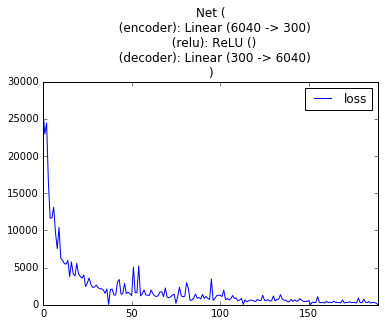

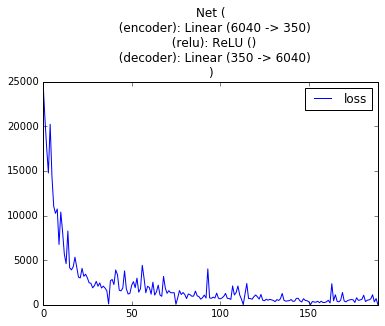

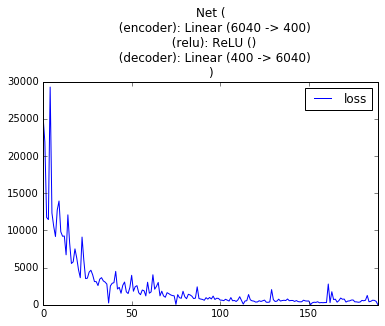

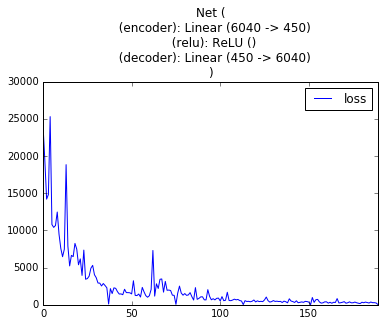

In [107]:
w_nets, w_perfs  = dict(), dict()
for hs in [300, 350, 400, 450]:
    n,p = bar(hs)
    w_nets[hs] = n
    w_perfs[hs] = p
print(w_perfs)

In [108]:
w_perfs

{300: (0.043377483443708613, 0.0043264096118670447),
 350: (0.063576158940397365, 0.0080230564423352021),
 400: (0.080132450331125843, 0.0063299177755255353),
 450: (0.11158940397350994, 0.01118847097982318)}

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
)
Epoch [1/5], Step [1/38], Loss: 39412.1758
Epoch [1/5], Step [2/38], Loss: 20105.4824
Epoch [1/5], Step [3/38], Loss: 17181.4941
Epoch [1/5], Step [4/38], Loss: 22656.9590
Epoch [1/5], Step [5/38], Loss: 12436.4053
Epoch [1/5], Step [6/38], Loss: 8533.3994
Epoch [1/5], Step [7/38], Loss: 9744.8848
Epoch [1/5], Step [8/38], Loss: 9438.2549
Epoch [1/5], Step [9/38], Loss: 7150.0649
Epoch [1/5], Step [10/38], Loss: 7487.6294
Epoch [1/5], Step [11/38], Loss: 6276.6919
Epoch [1/5], Step [12/38], Loss: 5338.4619
Epoch [1/5], Step [13/38], Loss: 5578.3447
Epoch [1/5], Step [14/38], Loss: 5019.3999
Epoch [1/5], Step [15/38], Loss: 4517.2759
Epoch [1/5], Step [16/38], Loss: 3828.6755
Epoch [1/5], Step [17/38], Loss: 4949.9155
Epoch [1/5], Step [18/38], Loss: 4493.3525
Epoch [1/5], Step [19/38], Loss: 4510.8408
Epoch [1/5], Step [20/38], Loss: 2508.3025
Epoch [1/5], Step [21/38], Loss: 3576.1506
Epoch [

Epoch [1/5], Step [1/38], Loss: 24398.8965
Epoch [1/5], Step [2/38], Loss: 18120.1699
Epoch [1/5], Step [3/38], Loss: 14097.9414
Epoch [1/5], Step [4/38], Loss: 24273.4434
Epoch [1/5], Step [5/38], Loss: 7579.3008
Epoch [1/5], Step [6/38], Loss: 8272.8125
Epoch [1/5], Step [7/38], Loss: 9247.2764
Epoch [1/5], Step [8/38], Loss: 7216.0679
Epoch [1/5], Step [9/38], Loss: 6033.9766
Epoch [1/5], Step [10/38], Loss: 6043.7446
Epoch [1/5], Step [11/38], Loss: 9801.6250
Epoch [1/5], Step [12/38], Loss: 5999.1055
Epoch [1/5], Step [13/38], Loss: 6498.7915
Epoch [1/5], Step [14/38], Loss: 6116.2422
Epoch [1/5], Step [15/38], Loss: 5687.0010
Epoch [1/5], Step [16/38], Loss: 3850.0044
Epoch [1/5], Step [17/38], Loss: 4513.7578
Epoch [1/5], Step [18/38], Loss: 6646.2549
Epoch [1/5], Step [19/38], Loss: 4020.9094
Epoch [1/5], Step [20/38], Loss: 3702.5481
Epoch [1/5], Step [21/38], Loss: 4551.8901
Epoch [1/5], Step [22/38], Loss: 4147.1045
Epoch [1/5], Step [23/38], Loss: 4008.6750
Epoch [1/5], Ste

Epoch [1/5], Step [3/38], Loss: 14660.6123
Epoch [1/5], Step [4/38], Loss: 8019.3345
Epoch [1/5], Step [5/38], Loss: 8898.0361
Epoch [1/5], Step [6/38], Loss: 8743.7744
Epoch [1/5], Step [7/38], Loss: 7610.8750
Epoch [1/5], Step [8/38], Loss: 7097.0029
Epoch [1/5], Step [9/38], Loss: 5048.3374
Epoch [1/5], Step [10/38], Loss: 4556.0664
Epoch [1/5], Step [11/38], Loss: 3431.0217
Epoch [1/5], Step [12/38], Loss: 4567.5737
Epoch [1/5], Step [13/38], Loss: 3838.7769
Epoch [1/5], Step [14/38], Loss: 4243.3140
Epoch [1/5], Step [15/38], Loss: 3228.6392
Epoch [1/5], Step [16/38], Loss: 4293.7236
Epoch [1/5], Step [17/38], Loss: 2501.0310
Epoch [1/5], Step [18/38], Loss: 2848.3755
Epoch [1/5], Step [19/38], Loss: 2621.0220
Epoch [1/5], Step [20/38], Loss: 3427.4109
Epoch [1/5], Step [21/38], Loss: 3251.3459
Epoch [1/5], Step [22/38], Loss: 3660.3921
Epoch [1/5], Step [23/38], Loss: 3305.7437
Epoch [1/5], Step [24/38], Loss: 2545.8708
Epoch [1/5], Step [25/38], Loss: 1699.4919
Epoch [1/5], Step

Epoch [1/5], Step [4/38], Loss: 7783.9263
Epoch [1/5], Step [5/38], Loss: 14636.7871
Epoch [1/5], Step [6/38], Loss: 18862.2383
Epoch [1/5], Step [7/38], Loss: 15461.2275
Epoch [1/5], Step [8/38], Loss: 8773.3574
Epoch [1/5], Step [9/38], Loss: 7304.9497
Epoch [1/5], Step [10/38], Loss: 20331.4434
Epoch [1/5], Step [11/38], Loss: 6725.6733
Epoch [1/5], Step [12/38], Loss: 8026.7939
Epoch [1/5], Step [13/38], Loss: 12790.2070
Epoch [1/5], Step [14/38], Loss: 7359.9263
Epoch [1/5], Step [15/38], Loss: 7709.2104
Epoch [1/5], Step [16/38], Loss: 6977.7246
Epoch [1/5], Step [17/38], Loss: 7024.3018
Epoch [1/5], Step [18/38], Loss: 4943.8721
Epoch [1/5], Step [19/38], Loss: 3615.6233
Epoch [1/5], Step [20/38], Loss: 15268.5371
Epoch [1/5], Step [21/38], Loss: 12763.4326
Epoch [1/5], Step [22/38], Loss: 4741.4165
Epoch [1/5], Step [23/38], Loss: 6861.2393
Epoch [1/5], Step [24/38], Loss: 7609.3477
Epoch [1/5], Step [25/38], Loss: 4665.6270
Epoch [1/5], Step [26/38], Loss: 4530.9097
Epoch [1/5

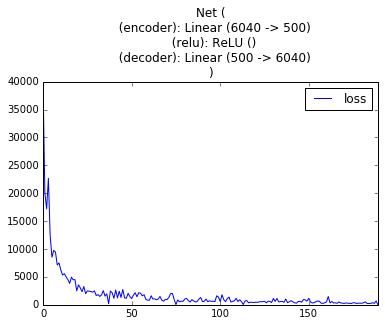

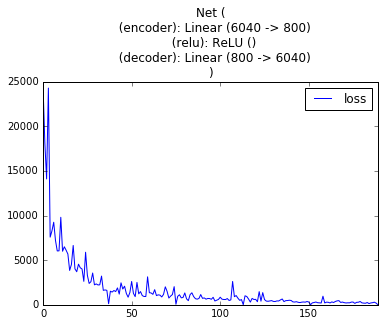

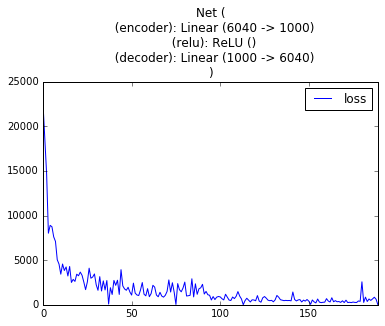

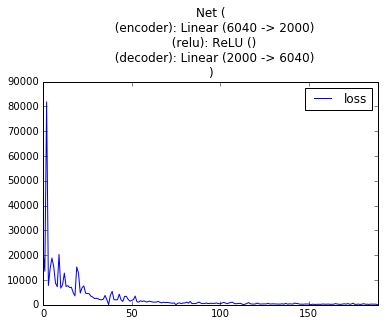

In [110]:
for hs in [500,800, 1000, 2000]:
    n,p = bar(hs)
    w_nets[hs] = n
    w_perfs[hs] = p


In [111]:
w_perfs

{300: (0.043377483443708613, 0.0043264096118670447),
 350: (0.063576158940397365, 0.0080230564423352021),
 400: (0.080132450331125843, 0.0063299177755255353),
 450: (0.11158940397350994, 0.01118847097982318),
 500: (0.13874172185430467, 0.012720327668994558),
 800: (0.0228476821192053, 0.0022152263890966024),
 1000: (0.10562913907284768, 0.0089139304982682743),
 2000: (0.073509933774834446, 0.006470179528724045)}

In [74]:
a= np.array([0,1,1,0,0])
a= Variable(torch.FloatTensor(a))
a.sum()

Variable containing:
 2
[torch.FloatTensor of size 1]

In [21]:
data.train_dataset

In [17]:
net = Net(123,123,123)
torch.save(net.state_dict(),str(net))

In [15]:
str(net)

'Net (\n  (encoder): Linear (123 -> 123)\n  (relu): ReLU ()\n  (decoder): Linear (123 -> 123)\n)'

Net (
  (encoder): Linear (6040 -> 2750)
  (relu): ReLU ()
  (decoder): Linear (2750 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0374
Epoch [1/20], Step [2/38], Loss: 0.0342
Epoch [1/20], Step [3/38], Loss: 0.0369
Epoch [1/20], Step [4/38], Loss: 0.0332
Epoch [1/20], Step [5/38], Loss: 0.0297
Epoch [1/20], Step [6/38], Loss: 0.0338
Epoch [1/20], Step [7/38], Loss: 0.0269
Epoch [1/20], Step [8/38], Loss: 0.0306
Epoch [1/20], Step [9/38], Loss: 0.0339
Epoch [1/20], Step [10/38], Loss: 0.0328
Epoch [1/20], Step [11/38], Loss: 0.0304
Epoch [1/20], Step [12/38], Loss: 0.0251
Epoch [1/20], Step [13/38], Loss: 0.0292
Epoch [1/20], Step [14/38], Loss: 0.0318
Epoch [1/20], Step [15/38], Loss: 0.0287
Epoch [1/20], Step [16/38], Loss: 0.0332
Epoch [1/20], Step [17/38], Loss: 0.0348
Epoch [1/20], Step [18/38], Loss: 0.0288
Epoch [1/20], Step [19/38], Loss: 0.0307
Epoch [1/20], Step [20/38], Loss: 0.0297
Epoch [1/20], Step [21/38], Loss: 0.0321
Epoch [1/20], Step [22/38], Loss: 0.0247
Epoch [1/20

Epoch [6/20], Step [10/38], Loss: 0.0201
Epoch [6/20], Step [11/38], Loss: 0.0192
Epoch [6/20], Step [12/38], Loss: 0.0212
Epoch [6/20], Step [13/38], Loss: 0.0248
Epoch [6/20], Step [14/38], Loss: 0.0232
Epoch [6/20], Step [15/38], Loss: 0.0208
Epoch [6/20], Step [16/38], Loss: 0.0202
Epoch [6/20], Step [17/38], Loss: 0.0216
Epoch [6/20], Step [18/38], Loss: 0.0179
Epoch [6/20], Step [19/38], Loss: 0.0188
Epoch [6/20], Step [20/38], Loss: 0.0215
Epoch [6/20], Step [21/38], Loss: 0.0215
Epoch [6/20], Step [22/38], Loss: 0.0215
Epoch [6/20], Step [23/38], Loss: 0.0223
Epoch [6/20], Step [24/38], Loss: 0.0200
Epoch [6/20], Step [25/38], Loss: 0.0181
Epoch [6/20], Step [26/38], Loss: 0.0197
Epoch [6/20], Step [27/38], Loss: 0.0201
Epoch [6/20], Step [28/38], Loss: 0.0188
Epoch [6/20], Step [29/38], Loss: 0.0178
Epoch [6/20], Step [30/38], Loss: 0.0223
Epoch [6/20], Step [31/38], Loss: 0.0201
Epoch [6/20], Step [32/38], Loss: 0.0195
Epoch [6/20], Step [33/38], Loss: 0.0166
Epoch [6/20], St

Epoch [11/20], Step [20/38], Loss: 0.0167
Epoch [11/20], Step [21/38], Loss: 0.0156
Epoch [11/20], Step [22/38], Loss: 0.0150
Epoch [11/20], Step [23/38], Loss: 0.0160
Epoch [11/20], Step [24/38], Loss: 0.0171
Epoch [11/20], Step [25/38], Loss: 0.0176
Epoch [11/20], Step [26/38], Loss: 0.0140
Epoch [11/20], Step [27/38], Loss: 0.0171
Epoch [11/20], Step [28/38], Loss: 0.0157
Epoch [11/20], Step [29/38], Loss: 0.0156
Epoch [11/20], Step [30/38], Loss: 0.0176
Epoch [11/20], Step [31/38], Loss: 0.0149
Epoch [11/20], Step [32/38], Loss: 0.0145
Epoch [11/20], Step [33/38], Loss: 0.0147
Epoch [11/20], Step [34/38], Loss: 0.0143
Epoch [11/20], Step [35/38], Loss: 0.0154
Epoch [11/20], Step [36/38], Loss: 0.0184
Epoch [11/20], Step [37/38], Loss: 0.0165
Epoch [11/20], Step [38/38], Loss: 0.0132
Epoch [12/20], Step [1/38], Loss: 0.0130
Epoch [12/20], Step [2/38], Loss: 0.0128
Epoch [12/20], Step [3/38], Loss: 0.0130
Epoch [12/20], Step [4/38], Loss: 0.0136
Epoch [12/20], Step [5/38], Loss: 0.01

Epoch [16/20], Step [27/38], Loss: 0.0115
Epoch [16/20], Step [28/38], Loss: 0.0124
Epoch [16/20], Step [29/38], Loss: 0.0126
Epoch [16/20], Step [30/38], Loss: 0.0134
Epoch [16/20], Step [31/38], Loss: 0.0120
Epoch [16/20], Step [32/38], Loss: 0.0137
Epoch [16/20], Step [33/38], Loss: 0.0120
Epoch [16/20], Step [34/38], Loss: 0.0131
Epoch [16/20], Step [35/38], Loss: 0.0129
Epoch [16/20], Step [36/38], Loss: 0.0129
Epoch [16/20], Step [37/38], Loss: 0.0142
Epoch [16/20], Step [38/38], Loss: 0.0030
Epoch [17/20], Step [1/38], Loss: 0.0110
Epoch [17/20], Step [2/38], Loss: 0.0111
Epoch [17/20], Step [3/38], Loss: 0.0120
Epoch [17/20], Step [4/38], Loss: 0.0112
Epoch [17/20], Step [5/38], Loss: 0.0097
Epoch [17/20], Step [6/38], Loss: 0.0115
Epoch [17/20], Step [7/38], Loss: 0.0112
Epoch [17/20], Step [8/38], Loss: 0.0095
Epoch [17/20], Step [9/38], Loss: 0.0106
Epoch [17/20], Step [10/38], Loss: 0.0119
Epoch [17/20], Step [11/38], Loss: 0.0108
Epoch [17/20], Step [12/38], Loss: 0.0100
E

AttributeError: 'module' object has no attribute 'train_dataset'

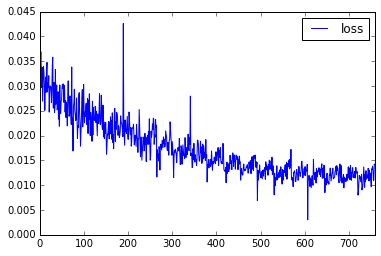

In [8]:
foo(2750)

In [11]:
#5cv
cv_perf = dict()
def prediction_on_cv(cv):
    data = dataset.load_data(cv)
    cv_perf[cv] = bar(350)
    

In [14]:
for i in xrange(5):
    prediction_on_cv(i)

Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/20], Step [1/38], Loss: 0.0466
Epoch [1/20], Step [2/38], Loss: 0.0494
Epoch [1/20], Step [3/38], Loss: 0.0501
Epoch [1/20], Step [4/38], Loss: 0.0399
Epoch [1/20], Step [5/38], Loss: 0.0392
Epoch [1/20], Step [6/38], Loss: 0.0554
Epoch [1/20], Step [7/38], Loss: 0.0400
Epoch [1/20], Step [8/38], Loss: 0.0428
Epoch [1/20], Step [9/38], Loss: 0.0422
Epoch [1/20], Step [10/38], Loss: 0.0331
Epoch [1/20], Step [11/38], Loss: 0.0326
Epoch [1/20], Step [12/38], Loss: 0.0445
Epoch [1/20], Step [13/38], Loss: 0.0354
Epoch [1/20], Step [14/38], Loss: 0.0289
Epoch [1/20], Step [15/38], Loss: 0.0416
Epoch [1/20], Step [16/38], Loss: 0.0363
Epoch [1/20], Step [17/38], Loss: 0.0325
Epoch [1/20], Step [18/38], Loss: 0.0306
Epoch [1/20], Step [19/38], Loss: 0.0292
Epoch [1/20], Step [20/38], Loss: 0.0330
Epoch [1/20], Step [21/38], Loss: 0.0288
Epoch [1/20], Step [22/38], Loss: 0.0308
Epoch [1/20],

Epoch [6/20], Step [10/38], Loss: 0.0241
Epoch [6/20], Step [11/38], Loss: 0.0286
Epoch [6/20], Step [12/38], Loss: 0.0251
Epoch [6/20], Step [13/38], Loss: 0.0270
Epoch [6/20], Step [14/38], Loss: 0.0259
Epoch [6/20], Step [15/38], Loss: 0.0258
Epoch [6/20], Step [16/38], Loss: 0.0269
Epoch [6/20], Step [17/38], Loss: 0.0245
Epoch [6/20], Step [18/38], Loss: 0.0217
Epoch [6/20], Step [19/38], Loss: 0.0294
Epoch [6/20], Step [20/38], Loss: 0.0229
Epoch [6/20], Step [21/38], Loss: 0.0265
Epoch [6/20], Step [22/38], Loss: 0.0250
Epoch [6/20], Step [23/38], Loss: 0.0239
Epoch [6/20], Step [24/38], Loss: 0.0239
Epoch [6/20], Step [25/38], Loss: 0.0229
Epoch [6/20], Step [26/38], Loss: 0.0268
Epoch [6/20], Step [27/38], Loss: 0.0266
Epoch [6/20], Step [28/38], Loss: 0.0324
Epoch [6/20], Step [29/38], Loss: 0.0287
Epoch [6/20], Step [30/38], Loss: 0.0264
Epoch [6/20], Step [31/38], Loss: 0.0285
Epoch [6/20], Step [32/38], Loss: 0.0258
Epoch [6/20], Step [33/38], Loss: 0.0277
Epoch [6/20], St

Epoch [11/20], Step [21/38], Loss: 0.0266
Epoch [11/20], Step [22/38], Loss: 0.0296
Epoch [11/20], Step [23/38], Loss: 0.0222
Epoch [11/20], Step [24/38], Loss: 0.0257
Epoch [11/20], Step [25/38], Loss: 0.0225
Epoch [11/20], Step [26/38], Loss: 0.0265
Epoch [11/20], Step [27/38], Loss: 0.0280
Epoch [11/20], Step [28/38], Loss: 0.0225
Epoch [11/20], Step [29/38], Loss: 0.0285
Epoch [11/20], Step [30/38], Loss: 0.0203
Epoch [11/20], Step [31/38], Loss: 0.0262
Epoch [11/20], Step [32/38], Loss: 0.0306
Epoch [11/20], Step [33/38], Loss: 0.0230
Epoch [11/20], Step [34/38], Loss: 0.0247
Epoch [11/20], Step [35/38], Loss: 0.0242
Epoch [11/20], Step [36/38], Loss: 0.0218
Epoch [11/20], Step [37/38], Loss: 0.0235
Epoch [11/20], Step [38/38], Loss: 0.0281
Epoch [12/20], Step [1/38], Loss: 0.0228
Epoch [12/20], Step [2/38], Loss: 0.0244
Epoch [12/20], Step [3/38], Loss: 0.0249
Epoch [12/20], Step [4/38], Loss: 0.0227
Epoch [12/20], Step [5/38], Loss: 0.0272
Epoch [12/20], Step [6/38], Loss: 0.027

Epoch [16/20], Step [29/38], Loss: 0.0242
Epoch [16/20], Step [30/38], Loss: 0.0254
Epoch [16/20], Step [31/38], Loss: 0.0260
Epoch [16/20], Step [32/38], Loss: 0.0264
Epoch [16/20], Step [33/38], Loss: 0.0297
Epoch [16/20], Step [34/38], Loss: 0.0285
Epoch [16/20], Step [35/38], Loss: 0.0265
Epoch [16/20], Step [36/38], Loss: 0.0222
Epoch [16/20], Step [37/38], Loss: 0.0261
Epoch [16/20], Step [38/38], Loss: 0.0265
Epoch [17/20], Step [1/38], Loss: 0.0220
Epoch [17/20], Step [2/38], Loss: 0.0230
Epoch [17/20], Step [3/38], Loss: 0.0225
Epoch [17/20], Step [4/38], Loss: 0.0265
Epoch [17/20], Step [5/38], Loss: 0.0297
Epoch [17/20], Step [6/38], Loss: 0.0262
Epoch [17/20], Step [7/38], Loss: 0.0230
Epoch [17/20], Step [8/38], Loss: 0.0264
Epoch [17/20], Step [9/38], Loss: 0.0247
Epoch [17/20], Step [10/38], Loss: 0.0260
Epoch [17/20], Step [11/38], Loss: 0.0255
Epoch [17/20], Step [12/38], Loss: 0.0254
Epoch [17/20], Step [13/38], Loss: 0.0217
Epoch [17/20], Step [14/38], Loss: 0.0217
E

Epoch [1/20], Step [35/38], Loss: 0.0283
Epoch [1/20], Step [36/38], Loss: 0.0272
Epoch [1/20], Step [37/38], Loss: 0.0283
Epoch [1/20], Step [38/38], Loss: 0.0596
Epoch [2/20], Step [1/38], Loss: 0.0309
Epoch [2/20], Step [2/38], Loss: 0.0345
Epoch [2/20], Step [3/38], Loss: 0.0312
Epoch [2/20], Step [4/38], Loss: 0.0314
Epoch [2/20], Step [5/38], Loss: 0.0286
Epoch [2/20], Step [6/38], Loss: 0.0316
Epoch [2/20], Step [7/38], Loss: 0.0311
Epoch [2/20], Step [8/38], Loss: 0.0347
Epoch [2/20], Step [9/38], Loss: 0.0307
Epoch [2/20], Step [10/38], Loss: 0.0328
Epoch [2/20], Step [11/38], Loss: 0.0323
Epoch [2/20], Step [12/38], Loss: 0.0277
Epoch [2/20], Step [13/38], Loss: 0.0341
Epoch [2/20], Step [14/38], Loss: 0.0343
Epoch [2/20], Step [15/38], Loss: 0.0292
Epoch [2/20], Step [16/38], Loss: 0.0288
Epoch [2/20], Step [17/38], Loss: 0.0293
Epoch [2/20], Step [18/38], Loss: 0.0264
Epoch [2/20], Step [19/38], Loss: 0.0295
Epoch [2/20], Step [20/38], Loss: 0.0323
Epoch [2/20], Step [21/38

Epoch [7/20], Step [9/38], Loss: 0.0225
Epoch [7/20], Step [10/38], Loss: 0.0264
Epoch [7/20], Step [11/38], Loss: 0.0234
Epoch [7/20], Step [12/38], Loss: 0.0243
Epoch [7/20], Step [13/38], Loss: 0.0285
Epoch [7/20], Step [14/38], Loss: 0.0269
Epoch [7/20], Step [15/38], Loss: 0.0230
Epoch [7/20], Step [16/38], Loss: 0.0192
Epoch [7/20], Step [17/38], Loss: 0.0231
Epoch [7/20], Step [18/38], Loss: 0.0269
Epoch [7/20], Step [19/38], Loss: 0.0231
Epoch [7/20], Step [20/38], Loss: 0.0285
Epoch [7/20], Step [21/38], Loss: 0.0242
Epoch [7/20], Step [22/38], Loss: 0.0241
Epoch [7/20], Step [23/38], Loss: 0.0239
Epoch [7/20], Step [24/38], Loss: 0.0273
Epoch [7/20], Step [25/38], Loss: 0.0267
Epoch [7/20], Step [26/38], Loss: 0.0242
Epoch [7/20], Step [27/38], Loss: 0.0261
Epoch [7/20], Step [28/38], Loss: 0.0294
Epoch [7/20], Step [29/38], Loss: 0.0304
Epoch [7/20], Step [30/38], Loss: 0.0256
Epoch [7/20], Step [31/38], Loss: 0.0240
Epoch [7/20], Step [32/38], Loss: 0.0267
Epoch [7/20], Ste

Epoch [12/20], Step [19/38], Loss: 0.0257
Epoch [12/20], Step [20/38], Loss: 0.0264
Epoch [12/20], Step [21/38], Loss: 0.0227
Epoch [12/20], Step [22/38], Loss: 0.0266
Epoch [12/20], Step [23/38], Loss: 0.0263
Epoch [12/20], Step [24/38], Loss: 0.0234
Epoch [12/20], Step [25/38], Loss: 0.0252
Epoch [12/20], Step [26/38], Loss: 0.0251
Epoch [12/20], Step [27/38], Loss: 0.0206
Epoch [12/20], Step [28/38], Loss: 0.0272
Epoch [12/20], Step [29/38], Loss: 0.0262
Epoch [12/20], Step [30/38], Loss: 0.0217
Epoch [12/20], Step [31/38], Loss: 0.0249
Epoch [12/20], Step [32/38], Loss: 0.0282
Epoch [12/20], Step [33/38], Loss: 0.0233
Epoch [12/20], Step [34/38], Loss: 0.0236
Epoch [12/20], Step [35/38], Loss: 0.0240
Epoch [12/20], Step [36/38], Loss: 0.0212
Epoch [12/20], Step [37/38], Loss: 0.0223
Epoch [12/20], Step [38/38], Loss: 0.0314
Epoch [13/20], Step [1/38], Loss: 0.0214
Epoch [13/20], Step [2/38], Loss: 0.0253
Epoch [13/20], Step [3/38], Loss: 0.0229
Epoch [13/20], Step [4/38], Loss: 0.0

Epoch [17/20], Step [26/38], Loss: 0.0215
Epoch [17/20], Step [27/38], Loss: 0.0271
Epoch [17/20], Step [28/38], Loss: 0.0253
Epoch [17/20], Step [29/38], Loss: 0.0233
Epoch [17/20], Step [30/38], Loss: 0.0240
Epoch [17/20], Step [31/38], Loss: 0.0229
Epoch [17/20], Step [32/38], Loss: 0.0248
Epoch [17/20], Step [33/38], Loss: 0.0261
Epoch [17/20], Step [34/38], Loss: 0.0188
Epoch [17/20], Step [35/38], Loss: 0.0264
Epoch [17/20], Step [36/38], Loss: 0.0222
Epoch [17/20], Step [37/38], Loss: 0.0229
Epoch [17/20], Step [38/38], Loss: 0.0162
Epoch [18/20], Step [1/38], Loss: 0.0253
Epoch [18/20], Step [2/38], Loss: 0.0266
Epoch [18/20], Step [3/38], Loss: 0.0245
Epoch [18/20], Step [4/38], Loss: 0.0237
Epoch [18/20], Step [5/38], Loss: 0.0231
Epoch [18/20], Step [6/38], Loss: 0.0265
Epoch [18/20], Step [7/38], Loss: 0.0219
Epoch [18/20], Step [8/38], Loss: 0.0228
Epoch [18/20], Step [9/38], Loss: 0.0200
Epoch [18/20], Step [10/38], Loss: 0.0191
Epoch [18/20], Step [11/38], Loss: 0.0219
E

Epoch [2/20], Step [33/38], Loss: 0.0319
Epoch [2/20], Step [34/38], Loss: 0.0276
Epoch [2/20], Step [35/38], Loss: 0.0301
Epoch [2/20], Step [36/38], Loss: 0.0232
Epoch [2/20], Step [37/38], Loss: 0.0258
Epoch [2/20], Step [38/38], Loss: 0.0315
Epoch [3/20], Step [1/38], Loss: 0.0315
Epoch [3/20], Step [2/38], Loss: 0.0273
Epoch [3/20], Step [3/38], Loss: 0.0256
Epoch [3/20], Step [4/38], Loss: 0.0303
Epoch [3/20], Step [5/38], Loss: 0.0263
Epoch [3/20], Step [6/38], Loss: 0.0301
Epoch [3/20], Step [7/38], Loss: 0.0341
Epoch [3/20], Step [8/38], Loss: 0.0320
Epoch [3/20], Step [9/38], Loss: 0.0293
Epoch [3/20], Step [10/38], Loss: 0.0284
Epoch [3/20], Step [11/38], Loss: 0.0306
Epoch [3/20], Step [12/38], Loss: 0.0205
Epoch [3/20], Step [13/38], Loss: 0.0238
Epoch [3/20], Step [14/38], Loss: 0.0297
Epoch [3/20], Step [15/38], Loss: 0.0220
Epoch [3/20], Step [16/38], Loss: 0.0296
Epoch [3/20], Step [17/38], Loss: 0.0329
Epoch [3/20], Step [18/38], Loss: 0.0260
Epoch [3/20], Step [19/38

Epoch [8/20], Step [9/38], Loss: 0.0246
Epoch [8/20], Step [10/38], Loss: 0.0253
Epoch [8/20], Step [11/38], Loss: 0.0318
Epoch [8/20], Step [12/38], Loss: 0.0270
Epoch [8/20], Step [13/38], Loss: 0.0243
Epoch [8/20], Step [14/38], Loss: 0.0243
Epoch [8/20], Step [15/38], Loss: 0.0325
Epoch [8/20], Step [16/38], Loss: 0.0220
Epoch [8/20], Step [17/38], Loss: 0.0226
Epoch [8/20], Step [18/38], Loss: 0.0282
Epoch [8/20], Step [19/38], Loss: 0.0243
Epoch [8/20], Step [20/38], Loss: 0.0232
Epoch [8/20], Step [21/38], Loss: 0.0279
Epoch [8/20], Step [22/38], Loss: 0.0210
Epoch [8/20], Step [23/38], Loss: 0.0234
Epoch [8/20], Step [24/38], Loss: 0.0232
Epoch [8/20], Step [25/38], Loss: 0.0261
Epoch [8/20], Step [26/38], Loss: 0.0285
Epoch [8/20], Step [27/38], Loss: 0.0260
Epoch [8/20], Step [28/38], Loss: 0.0222
Epoch [8/20], Step [29/38], Loss: 0.0261
Epoch [8/20], Step [30/38], Loss: 0.0224
Epoch [8/20], Step [31/38], Loss: 0.0253
Epoch [8/20], Step [32/38], Loss: 0.0254
Epoch [8/20], Ste

Epoch [13/20], Step [17/38], Loss: 0.0300
Epoch [13/20], Step [18/38], Loss: 0.0244
Epoch [13/20], Step [19/38], Loss: 0.0284
Epoch [13/20], Step [20/38], Loss: 0.0225
Epoch [13/20], Step [21/38], Loss: 0.0224
Epoch [13/20], Step [22/38], Loss: 0.0229
Epoch [13/20], Step [23/38], Loss: 0.0260
Epoch [13/20], Step [24/38], Loss: 0.0248
Epoch [13/20], Step [25/38], Loss: 0.0242
Epoch [13/20], Step [26/38], Loss: 0.0265
Epoch [13/20], Step [27/38], Loss: 0.0221
Epoch [13/20], Step [28/38], Loss: 0.0270
Epoch [13/20], Step [29/38], Loss: 0.0220
Epoch [13/20], Step [30/38], Loss: 0.0218
Epoch [13/20], Step [31/38], Loss: 0.0282
Epoch [13/20], Step [32/38], Loss: 0.0219
Epoch [13/20], Step [33/38], Loss: 0.0258
Epoch [13/20], Step [34/38], Loss: 0.0234
Epoch [13/20], Step [35/38], Loss: 0.0262
Epoch [13/20], Step [36/38], Loss: 0.0304
Epoch [13/20], Step [37/38], Loss: 0.0271
Epoch [13/20], Step [38/38], Loss: 0.0253
Epoch [14/20], Step [1/38], Loss: 0.0230
Epoch [14/20], Step [2/38], Loss: 0

Epoch [18/20], Step [24/38], Loss: 0.0231
Epoch [18/20], Step [25/38], Loss: 0.0262
Epoch [18/20], Step [26/38], Loss: 0.0247
Epoch [18/20], Step [27/38], Loss: 0.0247
Epoch [18/20], Step [28/38], Loss: 0.0231
Epoch [18/20], Step [29/38], Loss: 0.0255
Epoch [18/20], Step [30/38], Loss: 0.0248
Epoch [18/20], Step [31/38], Loss: 0.0234
Epoch [18/20], Step [32/38], Loss: 0.0240
Epoch [18/20], Step [33/38], Loss: 0.0208
Epoch [18/20], Step [34/38], Loss: 0.0237
Epoch [18/20], Step [35/38], Loss: 0.0235
Epoch [18/20], Step [36/38], Loss: 0.0228
Epoch [18/20], Step [37/38], Loss: 0.0260
Epoch [18/20], Step [38/38], Loss: 0.0132
Epoch [19/20], Step [1/38], Loss: 0.0256
Epoch [19/20], Step [2/38], Loss: 0.0225
Epoch [19/20], Step [3/38], Loss: 0.0215
Epoch [19/20], Step [4/38], Loss: 0.0267
Epoch [19/20], Step [5/38], Loss: 0.0229
Epoch [19/20], Step [6/38], Loss: 0.0225
Epoch [19/20], Step [7/38], Loss: 0.0214
Epoch [19/20], Step [8/38], Loss: 0.0242
Epoch [19/20], Step [9/38], Loss: 0.0188
E

Epoch [3/20], Step [33/38], Loss: 0.0255
Epoch [3/20], Step [34/38], Loss: 0.0285
Epoch [3/20], Step [35/38], Loss: 0.0298
Epoch [3/20], Step [36/38], Loss: 0.0266
Epoch [3/20], Step [37/38], Loss: 0.0294
Epoch [3/20], Step [38/38], Loss: 0.0437
Epoch [4/20], Step [1/38], Loss: 0.0231
Epoch [4/20], Step [2/38], Loss: 0.0307
Epoch [4/20], Step [3/38], Loss: 0.0221
Epoch [4/20], Step [4/38], Loss: 0.0392
Epoch [4/20], Step [5/38], Loss: 0.0236
Epoch [4/20], Step [6/38], Loss: 0.0286
Epoch [4/20], Step [7/38], Loss: 0.0224
Epoch [4/20], Step [8/38], Loss: 0.0345
Epoch [4/20], Step [9/38], Loss: 0.0292
Epoch [4/20], Step [10/38], Loss: 0.0238
Epoch [4/20], Step [11/38], Loss: 0.0269
Epoch [4/20], Step [12/38], Loss: 0.0294
Epoch [4/20], Step [13/38], Loss: 0.0296
Epoch [4/20], Step [14/38], Loss: 0.0270
Epoch [4/20], Step [15/38], Loss: 0.0284
Epoch [4/20], Step [16/38], Loss: 0.0268
Epoch [4/20], Step [17/38], Loss: 0.0299
Epoch [4/20], Step [18/38], Loss: 0.0313
Epoch [4/20], Step [19/38

Epoch [9/20], Step [9/38], Loss: 0.0239
Epoch [9/20], Step [10/38], Loss: 0.0246
Epoch [9/20], Step [11/38], Loss: 0.0224
Epoch [9/20], Step [12/38], Loss: 0.0227
Epoch [9/20], Step [13/38], Loss: 0.0233
Epoch [9/20], Step [14/38], Loss: 0.0257
Epoch [9/20], Step [15/38], Loss: 0.0223
Epoch [9/20], Step [16/38], Loss: 0.0278
Epoch [9/20], Step [17/38], Loss: 0.0253
Epoch [9/20], Step [18/38], Loss: 0.0258
Epoch [9/20], Step [19/38], Loss: 0.0187
Epoch [9/20], Step [20/38], Loss: 0.0249
Epoch [9/20], Step [21/38], Loss: 0.0271
Epoch [9/20], Step [22/38], Loss: 0.0224
Epoch [9/20], Step [23/38], Loss: 0.0239
Epoch [9/20], Step [24/38], Loss: 0.0214
Epoch [9/20], Step [25/38], Loss: 0.0250
Epoch [9/20], Step [26/38], Loss: 0.0212
Epoch [9/20], Step [27/38], Loss: 0.0219
Epoch [9/20], Step [28/38], Loss: 0.0233
Epoch [9/20], Step [29/38], Loss: 0.0260
Epoch [9/20], Step [30/38], Loss: 0.0275
Epoch [9/20], Step [31/38], Loss: 0.0265
Epoch [9/20], Step [32/38], Loss: 0.0278
Epoch [9/20], Ste

Epoch [14/20], Step [17/38], Loss: 0.0222
Epoch [14/20], Step [18/38], Loss: 0.0281
Epoch [14/20], Step [19/38], Loss: 0.0284
Epoch [14/20], Step [20/38], Loss: 0.0221
Epoch [14/20], Step [21/38], Loss: 0.0225
Epoch [14/20], Step [22/38], Loss: 0.0209
Epoch [14/20], Step [23/38], Loss: 0.0224
Epoch [14/20], Step [24/38], Loss: 0.0233
Epoch [14/20], Step [25/38], Loss: 0.0213
Epoch [14/20], Step [26/38], Loss: 0.0210
Epoch [14/20], Step [27/38], Loss: 0.0240
Epoch [14/20], Step [28/38], Loss: 0.0214
Epoch [14/20], Step [29/38], Loss: 0.0221
Epoch [14/20], Step [30/38], Loss: 0.0278
Epoch [14/20], Step [31/38], Loss: 0.0287
Epoch [14/20], Step [32/38], Loss: 0.0230
Epoch [14/20], Step [33/38], Loss: 0.0210
Epoch [14/20], Step [34/38], Loss: 0.0313
Epoch [14/20], Step [35/38], Loss: 0.0245
Epoch [14/20], Step [36/38], Loss: 0.0263
Epoch [14/20], Step [37/38], Loss: 0.0228
Epoch [14/20], Step [38/38], Loss: 0.0255
Epoch [15/20], Step [1/38], Loss: 0.0222
Epoch [15/20], Step [2/38], Loss: 0

Epoch [19/20], Step [25/38], Loss: 0.0154
Epoch [19/20], Step [26/38], Loss: 0.0251
Epoch [19/20], Step [27/38], Loss: 0.0226
Epoch [19/20], Step [28/38], Loss: 0.0220
Epoch [19/20], Step [29/38], Loss: 0.0234
Epoch [19/20], Step [30/38], Loss: 0.0247
Epoch [19/20], Step [31/38], Loss: 0.0190
Epoch [19/20], Step [32/38], Loss: 0.0206
Epoch [19/20], Step [33/38], Loss: 0.0210
Epoch [19/20], Step [34/38], Loss: 0.0258
Epoch [19/20], Step [35/38], Loss: 0.0257
Epoch [19/20], Step [36/38], Loss: 0.0262
Epoch [19/20], Step [37/38], Loss: 0.0214
Epoch [19/20], Step [38/38], Loss: 0.0199
Epoch [20/20], Step [1/38], Loss: 0.0250
Epoch [20/20], Step [2/38], Loss: 0.0240
Epoch [20/20], Step [3/38], Loss: 0.0222
Epoch [20/20], Step [4/38], Loss: 0.0195
Epoch [20/20], Step [5/38], Loss: 0.0251
Epoch [20/20], Step [6/38], Loss: 0.0260
Epoch [20/20], Step [7/38], Loss: 0.0237
Epoch [20/20], Step [8/38], Loss: 0.0213
Epoch [20/20], Step [9/38], Loss: 0.0255
Epoch [20/20], Step [10/38], Loss: 0.0211
E

Epoch [4/20], Step [33/38], Loss: 0.0268
Epoch [4/20], Step [34/38], Loss: 0.0302
Epoch [4/20], Step [35/38], Loss: 0.0221
Epoch [4/20], Step [36/38], Loss: 0.0279
Epoch [4/20], Step [37/38], Loss: 0.0306
Epoch [4/20], Step [38/38], Loss: 0.0289
Epoch [5/20], Step [1/38], Loss: 0.0292
Epoch [5/20], Step [2/38], Loss: 0.0275
Epoch [5/20], Step [3/38], Loss: 0.0296
Epoch [5/20], Step [4/38], Loss: 0.0303
Epoch [5/20], Step [5/38], Loss: 0.0218
Epoch [5/20], Step [6/38], Loss: 0.0266
Epoch [5/20], Step [7/38], Loss: 0.0226
Epoch [5/20], Step [8/38], Loss: 0.0259
Epoch [5/20], Step [9/38], Loss: 0.0278
Epoch [5/20], Step [10/38], Loss: 0.0305
Epoch [5/20], Step [11/38], Loss: 0.0332
Epoch [5/20], Step [12/38], Loss: 0.0299
Epoch [5/20], Step [13/38], Loss: 0.0237
Epoch [5/20], Step [14/38], Loss: 0.0241
Epoch [5/20], Step [15/38], Loss: 0.0256
Epoch [5/20], Step [16/38], Loss: 0.0287
Epoch [5/20], Step [17/38], Loss: 0.0215
Epoch [5/20], Step [18/38], Loss: 0.0245
Epoch [5/20], Step [19/38

Epoch [10/20], Step [10/38], Loss: 0.0236
Epoch [10/20], Step [11/38], Loss: 0.0210
Epoch [10/20], Step [12/38], Loss: 0.0229
Epoch [10/20], Step [13/38], Loss: 0.0209
Epoch [10/20], Step [14/38], Loss: 0.0261
Epoch [10/20], Step [15/38], Loss: 0.0221
Epoch [10/20], Step [16/38], Loss: 0.0224
Epoch [10/20], Step [17/38], Loss: 0.0287
Epoch [10/20], Step [18/38], Loss: 0.0318
Epoch [10/20], Step [19/38], Loss: 0.0265
Epoch [10/20], Step [20/38], Loss: 0.0255
Epoch [10/20], Step [21/38], Loss: 0.0264
Epoch [10/20], Step [22/38], Loss: 0.0249
Epoch [10/20], Step [23/38], Loss: 0.0255
Epoch [10/20], Step [24/38], Loss: 0.0222
Epoch [10/20], Step [25/38], Loss: 0.0218
Epoch [10/20], Step [26/38], Loss: 0.0247
Epoch [10/20], Step [27/38], Loss: 0.0280
Epoch [10/20], Step [28/38], Loss: 0.0250
Epoch [10/20], Step [29/38], Loss: 0.0248
Epoch [10/20], Step [30/38], Loss: 0.0275
Epoch [10/20], Step [31/38], Loss: 0.0251
Epoch [10/20], Step [32/38], Loss: 0.0241
Epoch [10/20], Step [33/38], Loss:

Epoch [15/20], Step [20/38], Loss: 0.0275
Epoch [15/20], Step [21/38], Loss: 0.0274
Epoch [15/20], Step [22/38], Loss: 0.0242
Epoch [15/20], Step [23/38], Loss: 0.0222
Epoch [15/20], Step [24/38], Loss: 0.0244
Epoch [15/20], Step [25/38], Loss: 0.0204
Epoch [15/20], Step [26/38], Loss: 0.0229
Epoch [15/20], Step [27/38], Loss: 0.0231
Epoch [15/20], Step [28/38], Loss: 0.0205
Epoch [15/20], Step [29/38], Loss: 0.0248
Epoch [15/20], Step [30/38], Loss: 0.0302
Epoch [15/20], Step [31/38], Loss: 0.0197
Epoch [15/20], Step [32/38], Loss: 0.0235
Epoch [15/20], Step [33/38], Loss: 0.0240
Epoch [15/20], Step [34/38], Loss: 0.0247
Epoch [15/20], Step [35/38], Loss: 0.0247
Epoch [15/20], Step [36/38], Loss: 0.0238
Epoch [15/20], Step [37/38], Loss: 0.0199
Epoch [15/20], Step [38/38], Loss: 0.0375
Epoch [16/20], Step [1/38], Loss: 0.0217
Epoch [16/20], Step [2/38], Loss: 0.0214
Epoch [16/20], Step [3/38], Loss: 0.0216
Epoch [16/20], Step [4/38], Loss: 0.0250
Epoch [16/20], Step [5/38], Loss: 0.02

Epoch [20/20], Step [27/38], Loss: 0.0235
Epoch [20/20], Step [28/38], Loss: 0.0209
Epoch [20/20], Step [29/38], Loss: 0.0243
Epoch [20/20], Step [30/38], Loss: 0.0260
Epoch [20/20], Step [31/38], Loss: 0.0216
Epoch [20/20], Step [32/38], Loss: 0.0260
Epoch [20/20], Step [33/38], Loss: 0.0211
Epoch [20/20], Step [34/38], Loss: 0.0199
Epoch [20/20], Step [35/38], Loss: 0.0245
Epoch [20/20], Step [36/38], Loss: 0.0246
Epoch [20/20], Step [37/38], Loss: 0.0270
Epoch [20/20], Step [38/38], Loss: 0.0315
(350, (0.56887417218543046, 0.066619684272324176))


    (350, (0.56688741721854297, 0.065704348220178524))
    (350, (0.56324503311258278, 0.065005454593260237))
    (350, (0.53079470198675505, 0.060010399831570554))
    (350, (0.56390728476821195, 0.065796774133676877))
    (350, (0.56887417218543046, 0.066619684272324176))

In [ ]:
(350, (0.56688741721854297, 0.065704348220178524))
(350, (0.56324503311258278, 0.065005454593260237))
(350, (0.53079470198675505, 0.060010399831570554))
(350, (0.56390728476821195, 0.065796774133676877))
(350, (0.56887417218543046, 0.066619684272324176))

In [92]:
perfs

{(350, 0): (0.29801324503311261, 0.023798693677397981),
 (350, 1): (0.38774834437086092, 0.033437928592209482),
 (350, 2): (0.43741721854304644, 0.041677938672773134),
 (350, 3): (0.45827814569536418, 0.043492972724470398),
 (350, 4): (0.5052980132450331, 0.051499483911369451),
 (350, 5): (0.50430463576158946, 0.050881045959632422),
 (350, 6): (0.51953642384105958, 0.05309149620761059),
 (350, 7): (0.54304635761589404, 0.057768839847694084),
 (350, 8): (0.53178807947019879, 0.056496697762509061),
 (350, 9): (0.55794701986754969, 0.061831604326375036),
 (350, 10): (0.55000000000000004, 0.060569699999882175),
 (350, 11): (0.545364238410596, 0.06046757215404526),
 (350, 12): (0.56456953642384111, 0.063166028816747322),
 (350, 13): (0.53940397350993374, 0.059956194045197801),
 (350, 14): (0.55397350993377492, 0.061336174387851994),
 (350, 15): (0.55298013245033117, 0.061859584161219297),
 (350, 16): (0.54271523178807946, 0.060616422701132572),
 (350, 17): (0.55728476821192052, 0.0624208113

In [93]:

perfs = dict()
for hs in [64, 128,256,512, 1024]:
    input_size = 6040
    hidden_size = hs
    output_size = 6040
    num_epochs = 30
    learning_rate = 0.001

    perfs[hs] = dict()

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

        torch.save(net.state_dict(),'prediction-mseloss-%s-epoch-%s.pkl'%(str(net),epoch+1))
        import pandas as pd
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title=str(net).replace('\n', ''))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        if ( epoch+1) % 1 == 0:
            import rec 
            reload(rec)
            r = rec.Rec(topk = 5)
            r.fit(data.train_dataset.train.T)
            t = predicted.T
            r.predict( t,data.test_dataset.targets)
            p = r.evaluate(data.test_dataset.test)
            print (hidden_size, p)
            perfs[hs][(hidden_size, epoch)] = p


Net (
  (encoder): Linear (6040 -> 64)
  (relu): ReLU ()
  (decoder): Linear (64 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0443
Epoch [1/30], Step [2/38], Loss: 0.0488
Epoch [1/30], Step [3/38], Loss: 0.0630
Epoch [1/30], Step [4/38], Loss: 0.0578
Epoch [1/30], Step [5/38], Loss: 0.0432
Epoch [1/30], Step [6/38], Loss: 0.0367
Epoch [1/30], Step [7/38], Loss: 0.0541
Epoch [1/30], Step [8/38], Loss: 0.0435
Epoch [1/30], Step [9/38], Loss: 0.0411
Epoch [1/30], Step [10/38], Loss: 0.0504
Epoch [1/30], Step [11/38], Loss: 0.0539
Epoch [1/30], Step [12/38], Loss: 0.0416
Epoch [1/30], Step [13/38], Loss: 0.0415
Epoch [1/30], Step [14/38], Loss: 0.0481
Epoch [1/30], Step [15/38], Loss: 0.0468
Epoch [1/30], Step [16/38], Loss: 0.0421
Epoch [1/30], Step [17/38], Loss: 0.0502
Epoch [1/30], Step [18/38], Loss: 0.0449
Epoch [1/30], Step [19/38], Loss: 0.0395
Epoch [1/30], Step [20/38], Loss: 0.0413
Epoch [1/30], Step [21/38], Loss: 0.0434
Epoch [1/30], Step [22/38], Loss: 0.0536
Epoch [1/30], S

Epoch [6/30], Step [5/38], Loss: 0.0258
Epoch [6/30], Step [6/38], Loss: 0.0381
Epoch [6/30], Step [7/38], Loss: 0.0336
Epoch [6/30], Step [8/38], Loss: 0.0326
Epoch [6/30], Step [9/38], Loss: 0.0304
Epoch [6/30], Step [10/38], Loss: 0.0363
Epoch [6/30], Step [11/38], Loss: 0.0293
Epoch [6/30], Step [12/38], Loss: 0.0349
Epoch [6/30], Step [13/38], Loss: 0.0288
Epoch [6/30], Step [14/38], Loss: 0.0271
Epoch [6/30], Step [15/38], Loss: 0.0287
Epoch [6/30], Step [16/38], Loss: 0.0319
Epoch [6/30], Step [17/38], Loss: 0.0293
Epoch [6/30], Step [18/38], Loss: 0.0221
Epoch [6/30], Step [19/38], Loss: 0.0273
Epoch [6/30], Step [20/38], Loss: 0.0350
Epoch [6/30], Step [21/38], Loss: 0.0350
Epoch [6/30], Step [22/38], Loss: 0.0357
Epoch [6/30], Step [23/38], Loss: 0.0342
Epoch [6/30], Step [24/38], Loss: 0.0286
Epoch [6/30], Step [25/38], Loss: 0.0282
Epoch [6/30], Step [26/38], Loss: 0.0329
Epoch [6/30], Step [27/38], Loss: 0.0288
Epoch [6/30], Step [28/38], Loss: 0.0317
Epoch [6/30], Step [2

Epoch [11/30], Step [12/38], Loss: 0.0340
Epoch [11/30], Step [13/38], Loss: 0.0306
Epoch [11/30], Step [14/38], Loss: 0.0297
Epoch [11/30], Step [15/38], Loss: 0.0310
Epoch [11/30], Step [16/38], Loss: 0.0325
Epoch [11/30], Step [17/38], Loss: 0.0266
Epoch [11/30], Step [18/38], Loss: 0.0233
Epoch [11/30], Step [19/38], Loss: 0.0360
Epoch [11/30], Step [20/38], Loss: 0.0318
Epoch [11/30], Step [21/38], Loss: 0.0281
Epoch [11/30], Step [22/38], Loss: 0.0313
Epoch [11/30], Step [23/38], Loss: 0.0255
Epoch [11/30], Step [24/38], Loss: 0.0321
Epoch [11/30], Step [25/38], Loss: 0.0250
Epoch [11/30], Step [26/38], Loss: 0.0273
Epoch [11/30], Step [27/38], Loss: 0.0300
Epoch [11/30], Step [28/38], Loss: 0.0234
Epoch [11/30], Step [29/38], Loss: 0.0309
Epoch [11/30], Step [30/38], Loss: 0.0358
Epoch [11/30], Step [31/38], Loss: 0.0275
Epoch [11/30], Step [32/38], Loss: 0.0321
Epoch [11/30], Step [33/38], Loss: 0.0227
Epoch [11/30], Step [34/38], Loss: 0.0300
Epoch [11/30], Step [35/38], Loss:

Epoch [16/30], Step [16/38], Loss: 0.0285
Epoch [16/30], Step [17/38], Loss: 0.0250
Epoch [16/30], Step [18/38], Loss: 0.0280
Epoch [16/30], Step [19/38], Loss: 0.0252
Epoch [16/30], Step [20/38], Loss: 0.0297
Epoch [16/30], Step [21/38], Loss: 0.0300
Epoch [16/30], Step [22/38], Loss: 0.0260
Epoch [16/30], Step [23/38], Loss: 0.0279
Epoch [16/30], Step [24/38], Loss: 0.0361
Epoch [16/30], Step [25/38], Loss: 0.0288
Epoch [16/30], Step [26/38], Loss: 0.0288
Epoch [16/30], Step [27/38], Loss: 0.0338
Epoch [16/30], Step [28/38], Loss: 0.0288
Epoch [16/30], Step [29/38], Loss: 0.0304
Epoch [16/30], Step [30/38], Loss: 0.0292
Epoch [16/30], Step [31/38], Loss: 0.0266
Epoch [16/30], Step [32/38], Loss: 0.0189
Epoch [16/30], Step [33/38], Loss: 0.0303
Epoch [16/30], Step [34/38], Loss: 0.0275
Epoch [16/30], Step [35/38], Loss: 0.0289
Epoch [16/30], Step [36/38], Loss: 0.0300
Epoch [16/30], Step [37/38], Loss: 0.0272
Epoch [16/30], Step [38/38], Loss: 0.0475
(64, (0.43841059602649007, 0.04154

Epoch [21/30], Step [18/38], Loss: 0.0311
Epoch [21/30], Step [19/38], Loss: 0.0316
Epoch [21/30], Step [20/38], Loss: 0.0238
Epoch [21/30], Step [21/38], Loss: 0.0344
Epoch [21/30], Step [22/38], Loss: 0.0269
Epoch [21/30], Step [23/38], Loss: 0.0343
Epoch [21/30], Step [24/38], Loss: 0.0293
Epoch [21/30], Step [25/38], Loss: 0.0297
Epoch [21/30], Step [26/38], Loss: 0.0296
Epoch [21/30], Step [27/38], Loss: 0.0283
Epoch [21/30], Step [28/38], Loss: 0.0304
Epoch [21/30], Step [29/38], Loss: 0.0200
Epoch [21/30], Step [30/38], Loss: 0.0325
Epoch [21/30], Step [31/38], Loss: 0.0277
Epoch [21/30], Step [32/38], Loss: 0.0277
Epoch [21/30], Step [33/38], Loss: 0.0282
Epoch [21/30], Step [34/38], Loss: 0.0291
Epoch [21/30], Step [35/38], Loss: 0.0340
Epoch [21/30], Step [36/38], Loss: 0.0269
Epoch [21/30], Step [37/38], Loss: 0.0271
Epoch [21/30], Step [38/38], Loss: 0.0315
(64, (0.45099337748344365, 0.040929430450296081))
Epoch [22/30], Step [1/38], Loss: 0.0292
Epoch [22/30], Step [2/38],

Epoch [26/30], Step [22/38], Loss: 0.0224
Epoch [26/30], Step [23/38], Loss: 0.0294
Epoch [26/30], Step [24/38], Loss: 0.0308
Epoch [26/30], Step [25/38], Loss: 0.0296
Epoch [26/30], Step [26/38], Loss: 0.0213
Epoch [26/30], Step [27/38], Loss: 0.0299
Epoch [26/30], Step [28/38], Loss: 0.0284
Epoch [26/30], Step [29/38], Loss: 0.0369
Epoch [26/30], Step [30/38], Loss: 0.0279
Epoch [26/30], Step [31/38], Loss: 0.0294
Epoch [26/30], Step [32/38], Loss: 0.0218
Epoch [26/30], Step [33/38], Loss: 0.0278
Epoch [26/30], Step [34/38], Loss: 0.0266
Epoch [26/30], Step [35/38], Loss: 0.0278
Epoch [26/30], Step [36/38], Loss: 0.0326
Epoch [26/30], Step [37/38], Loss: 0.0223
Epoch [26/30], Step [38/38], Loss: 0.0108
(64, (0.47748344370860923, 0.044598201786384191))
Epoch [27/30], Step [1/38], Loss: 0.0237
Epoch [27/30], Step [2/38], Loss: 0.0264
Epoch [27/30], Step [3/38], Loss: 0.0324
Epoch [27/30], Step [4/38], Loss: 0.0276
Epoch [27/30], Step [5/38], Loss: 0.0284
Epoch [27/30], Step [6/38], Los

Epoch [1/30], Step [25/38], Loss: 0.0432
Epoch [1/30], Step [26/38], Loss: 0.0374
Epoch [1/30], Step [27/38], Loss: 0.0406
Epoch [1/30], Step [28/38], Loss: 0.0450
Epoch [1/30], Step [29/38], Loss: 0.0366
Epoch [1/30], Step [30/38], Loss: 0.0303
Epoch [1/30], Step [31/38], Loss: 0.0347
Epoch [1/30], Step [32/38], Loss: 0.0445
Epoch [1/30], Step [33/38], Loss: 0.0330
Epoch [1/30], Step [34/38], Loss: 0.0323
Epoch [1/30], Step [35/38], Loss: 0.0335
Epoch [1/30], Step [36/38], Loss: 0.0331
Epoch [1/30], Step [37/38], Loss: 0.0388
Epoch [1/30], Step [38/38], Loss: 0.0635
(128, (0.26655629139072845, 0.018245866081302416))
Epoch [2/30], Step [1/38], Loss: 0.0383
Epoch [2/30], Step [2/38], Loss: 0.0355
Epoch [2/30], Step [3/38], Loss: 0.0386
Epoch [2/30], Step [4/38], Loss: 0.0411
Epoch [2/30], Step [5/38], Loss: 0.0327
Epoch [2/30], Step [6/38], Loss: 0.0380
Epoch [2/30], Step [7/38], Loss: 0.0351
Epoch [2/30], Step [8/38], Loss: 0.0296
Epoch [2/30], Step [9/38], Loss: 0.0315
Epoch [2/30], S

Epoch [6/30], Step [30/38], Loss: 0.0252
Epoch [6/30], Step [31/38], Loss: 0.0306
Epoch [6/30], Step [32/38], Loss: 0.0259
Epoch [6/30], Step [33/38], Loss: 0.0271
Epoch [6/30], Step [34/38], Loss: 0.0292
Epoch [6/30], Step [35/38], Loss: 0.0305
Epoch [6/30], Step [36/38], Loss: 0.0349
Epoch [6/30], Step [37/38], Loss: 0.0247
Epoch [6/30], Step [38/38], Loss: 0.0401
(128, (0.42516556291390722, 0.035161835356013436))
Epoch [7/30], Step [1/38], Loss: 0.0336
Epoch [7/30], Step [2/38], Loss: 0.0293
Epoch [7/30], Step [3/38], Loss: 0.0266
Epoch [7/30], Step [4/38], Loss: 0.0288
Epoch [7/30], Step [5/38], Loss: 0.0252
Epoch [7/30], Step [6/38], Loss: 0.0244
Epoch [7/30], Step [7/38], Loss: 0.0291
Epoch [7/30], Step [8/38], Loss: 0.0343
Epoch [7/30], Step [9/38], Loss: 0.0266
Epoch [7/30], Step [10/38], Loss: 0.0286
Epoch [7/30], Step [11/38], Loss: 0.0279
Epoch [7/30], Step [12/38], Loss: 0.0317
Epoch [7/30], Step [13/38], Loss: 0.0254
Epoch [7/30], Step [14/38], Loss: 0.0304
Epoch [7/30], S

Epoch [11/30], Step [35/38], Loss: 0.0261
Epoch [11/30], Step [36/38], Loss: 0.0322
Epoch [11/30], Step [37/38], Loss: 0.0304
Epoch [11/30], Step [38/38], Loss: 0.0211
(128, (0.51821192052980136, 0.053403962175898399))
Epoch [12/30], Step [1/38], Loss: 0.0322
Epoch [12/30], Step [2/38], Loss: 0.0297
Epoch [12/30], Step [3/38], Loss: 0.0254
Epoch [12/30], Step [4/38], Loss: 0.0214
Epoch [12/30], Step [5/38], Loss: 0.0270
Epoch [12/30], Step [6/38], Loss: 0.0219
Epoch [12/30], Step [7/38], Loss: 0.0297
Epoch [12/30], Step [8/38], Loss: 0.0202
Epoch [12/30], Step [9/38], Loss: 0.0254
Epoch [12/30], Step [10/38], Loss: 0.0300
Epoch [12/30], Step [11/38], Loss: 0.0300
Epoch [12/30], Step [12/38], Loss: 0.0243
Epoch [12/30], Step [13/38], Loss: 0.0262
Epoch [12/30], Step [14/38], Loss: 0.0281
Epoch [12/30], Step [15/38], Loss: 0.0278
Epoch [12/30], Step [16/38], Loss: 0.0282
Epoch [12/30], Step [17/38], Loss: 0.0305
Epoch [12/30], Step [18/38], Loss: 0.0278
Epoch [12/30], Step [19/38], Loss:

(128, (0.5331125827814569, 0.054177352340127827))
Epoch [17/30], Step [1/38], Loss: 0.0243
Epoch [17/30], Step [2/38], Loss: 0.0210
Epoch [17/30], Step [3/38], Loss: 0.0273
Epoch [17/30], Step [4/38], Loss: 0.0257
Epoch [17/30], Step [5/38], Loss: 0.0233
Epoch [17/30], Step [6/38], Loss: 0.0256
Epoch [17/30], Step [7/38], Loss: 0.0274
Epoch [17/30], Step [8/38], Loss: 0.0259
Epoch [17/30], Step [9/38], Loss: 0.0266
Epoch [17/30], Step [10/38], Loss: 0.0284
Epoch [17/30], Step [11/38], Loss: 0.0253
Epoch [17/30], Step [12/38], Loss: 0.0318
Epoch [17/30], Step [13/38], Loss: 0.0259
Epoch [17/30], Step [14/38], Loss: 0.0260
Epoch [17/30], Step [15/38], Loss: 0.0279
Epoch [17/30], Step [16/38], Loss: 0.0239
Epoch [17/30], Step [17/38], Loss: 0.0288
Epoch [17/30], Step [18/38], Loss: 0.0264
Epoch [17/30], Step [19/38], Loss: 0.0279
Epoch [17/30], Step [20/38], Loss: 0.0296
Epoch [17/30], Step [21/38], Loss: 0.0235
Epoch [17/30], Step [22/38], Loss: 0.0240
Epoch [17/30], Step [23/38], Loss: 

Epoch [22/30], Step [1/38], Loss: 0.0231
Epoch [22/30], Step [2/38], Loss: 0.0275
Epoch [22/30], Step [3/38], Loss: 0.0258
Epoch [22/30], Step [4/38], Loss: 0.0247
Epoch [22/30], Step [5/38], Loss: 0.0301
Epoch [22/30], Step [6/38], Loss: 0.0246
Epoch [22/30], Step [7/38], Loss: 0.0241
Epoch [22/30], Step [8/38], Loss: 0.0215
Epoch [22/30], Step [9/38], Loss: 0.0310
Epoch [22/30], Step [10/38], Loss: 0.0309
Epoch [22/30], Step [11/38], Loss: 0.0223
Epoch [22/30], Step [12/38], Loss: 0.0258
Epoch [22/30], Step [13/38], Loss: 0.0276
Epoch [22/30], Step [14/38], Loss: 0.0279
Epoch [22/30], Step [15/38], Loss: 0.0261
Epoch [22/30], Step [16/38], Loss: 0.0282
Epoch [22/30], Step [17/38], Loss: 0.0257
Epoch [22/30], Step [18/38], Loss: 0.0236
Epoch [22/30], Step [19/38], Loss: 0.0265
Epoch [22/30], Step [20/38], Loss: 0.0192
Epoch [22/30], Step [21/38], Loss: 0.0227
Epoch [22/30], Step [22/38], Loss: 0.0282
Epoch [22/30], Step [23/38], Loss: 0.0262
Epoch [22/30], Step [24/38], Loss: 0.0294
E

Epoch [27/30], Step [2/38], Loss: 0.0292
Epoch [27/30], Step [3/38], Loss: 0.0285
Epoch [27/30], Step [4/38], Loss: 0.0204
Epoch [27/30], Step [5/38], Loss: 0.0258
Epoch [27/30], Step [6/38], Loss: 0.0283
Epoch [27/30], Step [7/38], Loss: 0.0279
Epoch [27/30], Step [8/38], Loss: 0.0305
Epoch [27/30], Step [9/38], Loss: 0.0291
Epoch [27/30], Step [10/38], Loss: 0.0263
Epoch [27/30], Step [11/38], Loss: 0.0334
Epoch [27/30], Step [12/38], Loss: 0.0212
Epoch [27/30], Step [13/38], Loss: 0.0226
Epoch [27/30], Step [14/38], Loss: 0.0239
Epoch [27/30], Step [15/38], Loss: 0.0260
Epoch [27/30], Step [16/38], Loss: 0.0265
Epoch [27/30], Step [17/38], Loss: 0.0299
Epoch [27/30], Step [18/38], Loss: 0.0232
Epoch [27/30], Step [19/38], Loss: 0.0266
Epoch [27/30], Step [20/38], Loss: 0.0255
Epoch [27/30], Step [21/38], Loss: 0.0260
Epoch [27/30], Step [22/38], Loss: 0.0239
Epoch [27/30], Step [23/38], Loss: 0.0229
Epoch [27/30], Step [24/38], Loss: 0.0264
Epoch [27/30], Step [25/38], Loss: 0.0243


Epoch [2/30], Step [1/38], Loss: 0.0342
Epoch [2/30], Step [2/38], Loss: 0.0333
Epoch [2/30], Step [3/38], Loss: 0.0273
Epoch [2/30], Step [4/38], Loss: 0.0374
Epoch [2/30], Step [5/38], Loss: 0.0319
Epoch [2/30], Step [6/38], Loss: 0.0327
Epoch [2/30], Step [7/38], Loss: 0.0280
Epoch [2/30], Step [8/38], Loss: 0.0339
Epoch [2/30], Step [9/38], Loss: 0.0319
Epoch [2/30], Step [10/38], Loss: 0.0365
Epoch [2/30], Step [11/38], Loss: 0.0307
Epoch [2/30], Step [12/38], Loss: 0.0342
Epoch [2/30], Step [13/38], Loss: 0.0276
Epoch [2/30], Step [14/38], Loss: 0.0385
Epoch [2/30], Step [15/38], Loss: 0.0322
Epoch [2/30], Step [16/38], Loss: 0.0321
Epoch [2/30], Step [17/38], Loss: 0.0368
Epoch [2/30], Step [18/38], Loss: 0.0274
Epoch [2/30], Step [19/38], Loss: 0.0315
Epoch [2/30], Step [20/38], Loss: 0.0312
Epoch [2/30], Step [21/38], Loss: 0.0313
Epoch [2/30], Step [22/38], Loss: 0.0279
Epoch [2/30], Step [23/38], Loss: 0.0266
Epoch [2/30], Step [24/38], Loss: 0.0349
Epoch [2/30], Step [25/38

Epoch [7/30], Step [6/38], Loss: 0.0259
Epoch [7/30], Step [7/38], Loss: 0.0220
Epoch [7/30], Step [8/38], Loss: 0.0280
Epoch [7/30], Step [9/38], Loss: 0.0247
Epoch [7/30], Step [10/38], Loss: 0.0309
Epoch [7/30], Step [11/38], Loss: 0.0300
Epoch [7/30], Step [12/38], Loss: 0.0266
Epoch [7/30], Step [13/38], Loss: 0.0237
Epoch [7/30], Step [14/38], Loss: 0.0281
Epoch [7/30], Step [15/38], Loss: 0.0286
Epoch [7/30], Step [16/38], Loss: 0.0238
Epoch [7/30], Step [17/38], Loss: 0.0288
Epoch [7/30], Step [18/38], Loss: 0.0253
Epoch [7/30], Step [19/38], Loss: 0.0283
Epoch [7/30], Step [20/38], Loss: 0.0277
Epoch [7/30], Step [21/38], Loss: 0.0267
Epoch [7/30], Step [22/38], Loss: 0.0213
Epoch [7/30], Step [23/38], Loss: 0.0246
Epoch [7/30], Step [24/38], Loss: 0.0236
Epoch [7/30], Step [25/38], Loss: 0.0233
Epoch [7/30], Step [26/38], Loss: 0.0268
Epoch [7/30], Step [27/38], Loss: 0.0283
Epoch [7/30], Step [28/38], Loss: 0.0285
Epoch [7/30], Step [29/38], Loss: 0.0268
Epoch [7/30], Step [

Epoch [12/30], Step [11/38], Loss: 0.0274
Epoch [12/30], Step [12/38], Loss: 0.0207
Epoch [12/30], Step [13/38], Loss: 0.0270
Epoch [12/30], Step [14/38], Loss: 0.0240
Epoch [12/30], Step [15/38], Loss: 0.0240
Epoch [12/30], Step [16/38], Loss: 0.0256
Epoch [12/30], Step [17/38], Loss: 0.0286
Epoch [12/30], Step [18/38], Loss: 0.0307
Epoch [12/30], Step [19/38], Loss: 0.0300
Epoch [12/30], Step [20/38], Loss: 0.0263
Epoch [12/30], Step [21/38], Loss: 0.0251
Epoch [12/30], Step [22/38], Loss: 0.0235
Epoch [12/30], Step [23/38], Loss: 0.0232
Epoch [12/30], Step [24/38], Loss: 0.0250
Epoch [12/30], Step [25/38], Loss: 0.0234
Epoch [12/30], Step [26/38], Loss: 0.0263
Epoch [12/30], Step [27/38], Loss: 0.0250
Epoch [12/30], Step [28/38], Loss: 0.0308
Epoch [12/30], Step [29/38], Loss: 0.0206
Epoch [12/30], Step [30/38], Loss: 0.0283
Epoch [12/30], Step [31/38], Loss: 0.0189
Epoch [12/30], Step [32/38], Loss: 0.0265
Epoch [12/30], Step [33/38], Loss: 0.0252
Epoch [12/30], Step [34/38], Loss:

Epoch [17/30], Step [12/38], Loss: 0.0251
Epoch [17/30], Step [13/38], Loss: 0.0291
Epoch [17/30], Step [14/38], Loss: 0.0222
Epoch [17/30], Step [15/38], Loss: 0.0254
Epoch [17/30], Step [16/38], Loss: 0.0220
Epoch [17/30], Step [17/38], Loss: 0.0198
Epoch [17/30], Step [18/38], Loss: 0.0246
Epoch [17/30], Step [19/38], Loss: 0.0214
Epoch [17/30], Step [20/38], Loss: 0.0218
Epoch [17/30], Step [21/38], Loss: 0.0266
Epoch [17/30], Step [22/38], Loss: 0.0275
Epoch [17/30], Step [23/38], Loss: 0.0209
Epoch [17/30], Step [24/38], Loss: 0.0246
Epoch [17/30], Step [25/38], Loss: 0.0289
Epoch [17/30], Step [26/38], Loss: 0.0247
Epoch [17/30], Step [27/38], Loss: 0.0241
Epoch [17/30], Step [28/38], Loss: 0.0318
Epoch [17/30], Step [29/38], Loss: 0.0244
Epoch [17/30], Step [30/38], Loss: 0.0328
Epoch [17/30], Step [31/38], Loss: 0.0273
Epoch [17/30], Step [32/38], Loss: 0.0260
Epoch [17/30], Step [33/38], Loss: 0.0232
Epoch [17/30], Step [34/38], Loss: 0.0251
Epoch [17/30], Step [35/38], Loss:

Epoch [22/30], Step [14/38], Loss: 0.0237
Epoch [22/30], Step [15/38], Loss: 0.0211
Epoch [22/30], Step [16/38], Loss: 0.0211
Epoch [22/30], Step [17/38], Loss: 0.0301
Epoch [22/30], Step [18/38], Loss: 0.0227
Epoch [22/30], Step [19/38], Loss: 0.0243
Epoch [22/30], Step [20/38], Loss: 0.0246
Epoch [22/30], Step [21/38], Loss: 0.0241
Epoch [22/30], Step [22/38], Loss: 0.0268
Epoch [22/30], Step [23/38], Loss: 0.0252
Epoch [22/30], Step [24/38], Loss: 0.0253
Epoch [22/30], Step [25/38], Loss: 0.0263
Epoch [22/30], Step [26/38], Loss: 0.0230
Epoch [22/30], Step [27/38], Loss: 0.0211
Epoch [22/30], Step [28/38], Loss: 0.0258
Epoch [22/30], Step [29/38], Loss: 0.0215
Epoch [22/30], Step [30/38], Loss: 0.0267
Epoch [22/30], Step [31/38], Loss: 0.0222
Epoch [22/30], Step [32/38], Loss: 0.0221
Epoch [22/30], Step [33/38], Loss: 0.0276
Epoch [22/30], Step [34/38], Loss: 0.0228
Epoch [22/30], Step [35/38], Loss: 0.0247
Epoch [22/30], Step [36/38], Loss: 0.0254
Epoch [22/30], Step [37/38], Loss:

Epoch [27/30], Step [15/38], Loss: 0.0215
Epoch [27/30], Step [16/38], Loss: 0.0221
Epoch [27/30], Step [17/38], Loss: 0.0226
Epoch [27/30], Step [18/38], Loss: 0.0248
Epoch [27/30], Step [19/38], Loss: 0.0298
Epoch [27/30], Step [20/38], Loss: 0.0255
Epoch [27/30], Step [21/38], Loss: 0.0206
Epoch [27/30], Step [22/38], Loss: 0.0286
Epoch [27/30], Step [23/38], Loss: 0.0231
Epoch [27/30], Step [24/38], Loss: 0.0231
Epoch [27/30], Step [25/38], Loss: 0.0258
Epoch [27/30], Step [26/38], Loss: 0.0228
Epoch [27/30], Step [27/38], Loss: 0.0239
Epoch [27/30], Step [28/38], Loss: 0.0272
Epoch [27/30], Step [29/38], Loss: 0.0199
Epoch [27/30], Step [30/38], Loss: 0.0267
Epoch [27/30], Step [31/38], Loss: 0.0215
Epoch [27/30], Step [32/38], Loss: 0.0231
Epoch [27/30], Step [33/38], Loss: 0.0227
Epoch [27/30], Step [34/38], Loss: 0.0197
Epoch [27/30], Step [35/38], Loss: 0.0236
Epoch [27/30], Step [36/38], Loss: 0.0278
Epoch [27/30], Step [37/38], Loss: 0.0218
Epoch [27/30], Step [38/38], Loss:

Epoch [2/30], Step [16/38], Loss: 0.0385
Epoch [2/30], Step [17/38], Loss: 0.0317
Epoch [2/30], Step [18/38], Loss: 0.0280
Epoch [2/30], Step [19/38], Loss: 0.0285
Epoch [2/30], Step [20/38], Loss: 0.0375
Epoch [2/30], Step [21/38], Loss: 0.0253
Epoch [2/30], Step [22/38], Loss: 0.0300
Epoch [2/30], Step [23/38], Loss: 0.0305
Epoch [2/30], Step [24/38], Loss: 0.0345
Epoch [2/30], Step [25/38], Loss: 0.0276
Epoch [2/30], Step [26/38], Loss: 0.0276
Epoch [2/30], Step [27/38], Loss: 0.0250
Epoch [2/30], Step [28/38], Loss: 0.0300
Epoch [2/30], Step [29/38], Loss: 0.0269
Epoch [2/30], Step [30/38], Loss: 0.0340
Epoch [2/30], Step [31/38], Loss: 0.0260
Epoch [2/30], Step [32/38], Loss: 0.0368
Epoch [2/30], Step [33/38], Loss: 0.0276
Epoch [2/30], Step [34/38], Loss: 0.0309
Epoch [2/30], Step [35/38], Loss: 0.0225
Epoch [2/30], Step [36/38], Loss: 0.0352
Epoch [2/30], Step [37/38], Loss: 0.0315
Epoch [2/30], Step [38/38], Loss: 0.0262
(512, (0.3917218543046358, 0.033701454486387596))
Epoch [

Epoch [7/30], Step [22/38], Loss: 0.0213
Epoch [7/30], Step [23/38], Loss: 0.0312
Epoch [7/30], Step [24/38], Loss: 0.0268
Epoch [7/30], Step [25/38], Loss: 0.0256
Epoch [7/30], Step [26/38], Loss: 0.0262
Epoch [7/30], Step [27/38], Loss: 0.0179
Epoch [7/30], Step [28/38], Loss: 0.0273
Epoch [7/30], Step [29/38], Loss: 0.0248
Epoch [7/30], Step [30/38], Loss: 0.0263
Epoch [7/30], Step [31/38], Loss: 0.0235
Epoch [7/30], Step [32/38], Loss: 0.0278
Epoch [7/30], Step [33/38], Loss: 0.0262
Epoch [7/30], Step [34/38], Loss: 0.0236
Epoch [7/30], Step [35/38], Loss: 0.0260
Epoch [7/30], Step [36/38], Loss: 0.0219
Epoch [7/30], Step [37/38], Loss: 0.0213
Epoch [7/30], Step [38/38], Loss: 0.0269
(512, (0.52549668874172184, 0.056090459820418506))
Epoch [8/30], Step [1/38], Loss: 0.0264
Epoch [8/30], Step [2/38], Loss: 0.0264
Epoch [8/30], Step [3/38], Loss: 0.0256
Epoch [8/30], Step [4/38], Loss: 0.0240
Epoch [8/30], Step [5/38], Loss: 0.0237
Epoch [8/30], Step [6/38], Loss: 0.0270
Epoch [8/30]

Epoch [12/30], Step [25/38], Loss: 0.0255
Epoch [12/30], Step [26/38], Loss: 0.0219
Epoch [12/30], Step [27/38], Loss: 0.0247
Epoch [12/30], Step [28/38], Loss: 0.0222
Epoch [12/30], Step [29/38], Loss: 0.0192
Epoch [12/30], Step [30/38], Loss: 0.0240
Epoch [12/30], Step [31/38], Loss: 0.0190
Epoch [12/30], Step [32/38], Loss: 0.0240
Epoch [12/30], Step [33/38], Loss: 0.0247
Epoch [12/30], Step [34/38], Loss: 0.0218
Epoch [12/30], Step [35/38], Loss: 0.0242
Epoch [12/30], Step [36/38], Loss: 0.0208
Epoch [12/30], Step [37/38], Loss: 0.0283
Epoch [12/30], Step [38/38], Loss: 0.0309
(512, (0.56490066225165569, 0.064277716613185959))
Epoch [13/30], Step [1/38], Loss: 0.0208
Epoch [13/30], Step [2/38], Loss: 0.0204
Epoch [13/30], Step [3/38], Loss: 0.0225
Epoch [13/30], Step [4/38], Loss: 0.0194
Epoch [13/30], Step [5/38], Loss: 0.0206
Epoch [13/30], Step [6/38], Loss: 0.0229
Epoch [13/30], Step [7/38], Loss: 0.0245
Epoch [13/30], Step [8/38], Loss: 0.0217
Epoch [13/30], Step [9/38], Loss:

Epoch [17/30], Step [26/38], Loss: 0.0224
Epoch [17/30], Step [27/38], Loss: 0.0227
Epoch [17/30], Step [28/38], Loss: 0.0272
Epoch [17/30], Step [29/38], Loss: 0.0255
Epoch [17/30], Step [30/38], Loss: 0.0227
Epoch [17/30], Step [31/38], Loss: 0.0225
Epoch [17/30], Step [32/38], Loss: 0.0338
Epoch [17/30], Step [33/38], Loss: 0.0216
Epoch [17/30], Step [34/38], Loss: 0.0226
Epoch [17/30], Step [35/38], Loss: 0.0233
Epoch [17/30], Step [36/38], Loss: 0.0233
Epoch [17/30], Step [37/38], Loss: 0.0225
Epoch [17/30], Step [38/38], Loss: 0.0202
(512, (0.54437086092715237, 0.062053360308815725))
Epoch [18/30], Step [1/38], Loss: 0.0194
Epoch [18/30], Step [2/38], Loss: 0.0235
Epoch [18/30], Step [3/38], Loss: 0.0224
Epoch [18/30], Step [4/38], Loss: 0.0219
Epoch [18/30], Step [5/38], Loss: 0.0234
Epoch [18/30], Step [6/38], Loss: 0.0210
Epoch [18/30], Step [7/38], Loss: 0.0206
Epoch [18/30], Step [8/38], Loss: 0.0243
Epoch [18/30], Step [9/38], Loss: 0.0231
Epoch [18/30], Step [10/38], Loss:

Epoch [22/30], Step [28/38], Loss: 0.0261
Epoch [22/30], Step [29/38], Loss: 0.0264
Epoch [22/30], Step [30/38], Loss: 0.0216
Epoch [22/30], Step [31/38], Loss: 0.0196
Epoch [22/30], Step [32/38], Loss: 0.0268
Epoch [22/30], Step [33/38], Loss: 0.0228
Epoch [22/30], Step [34/38], Loss: 0.0219
Epoch [22/30], Step [35/38], Loss: 0.0215
Epoch [22/30], Step [36/38], Loss: 0.0250
Epoch [22/30], Step [37/38], Loss: 0.0247
Epoch [22/30], Step [38/38], Loss: 0.0159
(512, (0.53940397350993374, 0.062331649131363673))
Epoch [23/30], Step [1/38], Loss: 0.0259
Epoch [23/30], Step [2/38], Loss: 0.0264
Epoch [23/30], Step [3/38], Loss: 0.0180
Epoch [23/30], Step [4/38], Loss: 0.0202
Epoch [23/30], Step [5/38], Loss: 0.0211
Epoch [23/30], Step [6/38], Loss: 0.0194
Epoch [23/30], Step [7/38], Loss: 0.0237
Epoch [23/30], Step [8/38], Loss: 0.0232
Epoch [23/30], Step [9/38], Loss: 0.0215
Epoch [23/30], Step [10/38], Loss: 0.0229
Epoch [23/30], Step [11/38], Loss: 0.0206
Epoch [23/30], Step [12/38], Loss:

Epoch [27/30], Step [30/38], Loss: 0.0218
Epoch [27/30], Step [31/38], Loss: 0.0206
Epoch [27/30], Step [32/38], Loss: 0.0240
Epoch [27/30], Step [33/38], Loss: 0.0216
Epoch [27/30], Step [34/38], Loss: 0.0205
Epoch [27/30], Step [35/38], Loss: 0.0253
Epoch [27/30], Step [36/38], Loss: 0.0252
Epoch [27/30], Step [37/38], Loss: 0.0195
Epoch [27/30], Step [38/38], Loss: 0.0098
(512, (0.55264900662251659, 0.06356338410067397))
Epoch [28/30], Step [1/38], Loss: 0.0221
Epoch [28/30], Step [2/38], Loss: 0.0198
Epoch [28/30], Step [3/38], Loss: 0.0187
Epoch [28/30], Step [4/38], Loss: 0.0212
Epoch [28/30], Step [5/38], Loss: 0.0244
Epoch [28/30], Step [6/38], Loss: 0.0250
Epoch [28/30], Step [7/38], Loss: 0.0200
Epoch [28/30], Step [8/38], Loss: 0.0194
Epoch [28/30], Step [9/38], Loss: 0.0208
Epoch [28/30], Step [10/38], Loss: 0.0225
Epoch [28/30], Step [11/38], Loss: 0.0200
Epoch [28/30], Step [12/38], Loss: 0.0214
Epoch [28/30], Step [13/38], Loss: 0.0239
Epoch [28/30], Step [14/38], Loss: 

Epoch [2/30], Step [31/38], Loss: 0.0324
Epoch [2/30], Step [32/38], Loss: 0.0233
Epoch [2/30], Step [33/38], Loss: 0.0297
Epoch [2/30], Step [34/38], Loss: 0.0274
Epoch [2/30], Step [35/38], Loss: 0.0248
Epoch [2/30], Step [36/38], Loss: 0.0240
Epoch [2/30], Step [37/38], Loss: 0.0200
Epoch [2/30], Step [38/38], Loss: 0.0161
(1024, (0.44635761589403977, 0.038954735602705057))
Epoch [3/30], Step [1/38], Loss: 0.0244
Epoch [3/30], Step [2/38], Loss: 0.0274
Epoch [3/30], Step [3/38], Loss: 0.0268
Epoch [3/30], Step [4/38], Loss: 0.0303
Epoch [3/30], Step [5/38], Loss: 0.0202
Epoch [3/30], Step [6/38], Loss: 0.0271
Epoch [3/30], Step [7/38], Loss: 0.0289
Epoch [3/30], Step [8/38], Loss: 0.0309
Epoch [3/30], Step [9/38], Loss: 0.0253
Epoch [3/30], Step [10/38], Loss: 0.0271
Epoch [3/30], Step [11/38], Loss: 0.0262
Epoch [3/30], Step [12/38], Loss: 0.0241
Epoch [3/30], Step [13/38], Loss: 0.0251
Epoch [3/30], Step [14/38], Loss: 0.0312
Epoch [3/30], Step [15/38], Loss: 0.0243
Epoch [3/30], 

Epoch [7/30], Step [37/38], Loss: 0.0223
Epoch [7/30], Step [38/38], Loss: 0.0440
(1024, (0.53410596026490065, 0.059194330823091064))
Epoch [8/30], Step [1/38], Loss: 0.0206
Epoch [8/30], Step [2/38], Loss: 0.0229
Epoch [8/30], Step [3/38], Loss: 0.0238
Epoch [8/30], Step [4/38], Loss: 0.0180
Epoch [8/30], Step [5/38], Loss: 0.0260
Epoch [8/30], Step [6/38], Loss: 0.0205
Epoch [8/30], Step [7/38], Loss: 0.0253
Epoch [8/30], Step [8/38], Loss: 0.0237
Epoch [8/30], Step [9/38], Loss: 0.0247
Epoch [8/30], Step [10/38], Loss: 0.0252
Epoch [8/30], Step [11/38], Loss: 0.0229
Epoch [8/30], Step [12/38], Loss: 0.0235
Epoch [8/30], Step [13/38], Loss: 0.0230
Epoch [8/30], Step [14/38], Loss: 0.0237
Epoch [8/30], Step [15/38], Loss: 0.0210
Epoch [8/30], Step [16/38], Loss: 0.0187
Epoch [8/30], Step [17/38], Loss: 0.0222
Epoch [8/30], Step [18/38], Loss: 0.0263
Epoch [8/30], Step [19/38], Loss: 0.0213
Epoch [8/30], Step [20/38], Loss: 0.0235
Epoch [8/30], Step [21/38], Loss: 0.0222
Epoch [8/30], 

(1024, (0.5016556291390728, 0.056991002610632523))
Epoch [13/30], Step [1/38], Loss: 0.0181
Epoch [13/30], Step [2/38], Loss: 0.0235
Epoch [13/30], Step [3/38], Loss: 0.0155
Epoch [13/30], Step [4/38], Loss: 0.0209
Epoch [13/30], Step [5/38], Loss: 0.0210
Epoch [13/30], Step [6/38], Loss: 0.0186
Epoch [13/30], Step [7/38], Loss: 0.0218
Epoch [13/30], Step [8/38], Loss: 0.0229
Epoch [13/30], Step [9/38], Loss: 0.0161
Epoch [13/30], Step [10/38], Loss: 0.0175
Epoch [13/30], Step [11/38], Loss: 0.0223
Epoch [13/30], Step [12/38], Loss: 0.0196
Epoch [13/30], Step [13/38], Loss: 0.0198
Epoch [13/30], Step [14/38], Loss: 0.0179
Epoch [13/30], Step [15/38], Loss: 0.0218
Epoch [13/30], Step [16/38], Loss: 0.0177
Epoch [13/30], Step [17/38], Loss: 0.0209
Epoch [13/30], Step [18/38], Loss: 0.0234
Epoch [13/30], Step [19/38], Loss: 0.0203
Epoch [13/30], Step [20/38], Loss: 0.0232
Epoch [13/30], Step [21/38], Loss: 0.0212
Epoch [13/30], Step [22/38], Loss: 0.0171
Epoch [13/30], Step [23/38], Loss:

Epoch [18/30], Step [1/38], Loss: 0.0182
Epoch [18/30], Step [2/38], Loss: 0.0198
Epoch [18/30], Step [3/38], Loss: 0.0183
Epoch [18/30], Step [4/38], Loss: 0.0262
Epoch [18/30], Step [5/38], Loss: 0.0221
Epoch [18/30], Step [6/38], Loss: 0.0198
Epoch [18/30], Step [7/38], Loss: 0.0219
Epoch [18/30], Step [8/38], Loss: 0.0205
Epoch [18/30], Step [9/38], Loss: 0.0168
Epoch [18/30], Step [10/38], Loss: 0.0219
Epoch [18/30], Step [11/38], Loss: 0.0215
Epoch [18/30], Step [12/38], Loss: 0.0196
Epoch [18/30], Step [13/38], Loss: 0.0218
Epoch [18/30], Step [14/38], Loss: 0.0220
Epoch [18/30], Step [15/38], Loss: 0.0219
Epoch [18/30], Step [16/38], Loss: 0.0175
Epoch [18/30], Step [17/38], Loss: 0.0206
Epoch [18/30], Step [18/38], Loss: 0.0199
Epoch [18/30], Step [19/38], Loss: 0.0214
Epoch [18/30], Step [20/38], Loss: 0.0181
Epoch [18/30], Step [21/38], Loss: 0.0215
Epoch [18/30], Step [22/38], Loss: 0.0152
Epoch [18/30], Step [23/38], Loss: 0.0198
Epoch [18/30], Step [24/38], Loss: 0.0198
E

Epoch [23/30], Step [1/38], Loss: 0.0159
Epoch [23/30], Step [2/38], Loss: 0.0160
Epoch [23/30], Step [3/38], Loss: 0.0207
Epoch [23/30], Step [4/38], Loss: 0.0184
Epoch [23/30], Step [5/38], Loss: 0.0187
Epoch [23/30], Step [6/38], Loss: 0.0167
Epoch [23/30], Step [7/38], Loss: 0.0166
Epoch [23/30], Step [8/38], Loss: 0.0185
Epoch [23/30], Step [9/38], Loss: 0.0178
Epoch [23/30], Step [10/38], Loss: 0.0198
Epoch [23/30], Step [11/38], Loss: 0.0143
Epoch [23/30], Step [12/38], Loss: 0.0163
Epoch [23/30], Step [13/38], Loss: 0.0187
Epoch [23/30], Step [14/38], Loss: 0.0200
Epoch [23/30], Step [15/38], Loss: 0.0189
Epoch [23/30], Step [16/38], Loss: 0.0168
Epoch [23/30], Step [17/38], Loss: 0.0205
Epoch [23/30], Step [18/38], Loss: 0.0193
Epoch [23/30], Step [19/38], Loss: 0.0204
Epoch [23/30], Step [20/38], Loss: 0.0189
Epoch [23/30], Step [21/38], Loss: 0.0155
Epoch [23/30], Step [22/38], Loss: 0.0193
Epoch [23/30], Step [23/38], Loss: 0.0196
Epoch [23/30], Step [24/38], Loss: 0.0174
E

Epoch [28/30], Step [1/38], Loss: 0.0166
Epoch [28/30], Step [2/38], Loss: 0.0167
Epoch [28/30], Step [3/38], Loss: 0.0196
Epoch [28/30], Step [4/38], Loss: 0.0178
Epoch [28/30], Step [5/38], Loss: 0.0153
Epoch [28/30], Step [6/38], Loss: 0.0146
Epoch [28/30], Step [7/38], Loss: 0.0187
Epoch [28/30], Step [8/38], Loss: 0.0206
Epoch [28/30], Step [9/38], Loss: 0.0195
Epoch [28/30], Step [10/38], Loss: 0.0195
Epoch [28/30], Step [11/38], Loss: 0.0191
Epoch [28/30], Step [12/38], Loss: 0.0178
Epoch [28/30], Step [13/38], Loss: 0.0181
Epoch [28/30], Step [14/38], Loss: 0.0197
Epoch [28/30], Step [15/38], Loss: 0.0180
Epoch [28/30], Step [16/38], Loss: 0.0184
Epoch [28/30], Step [17/38], Loss: 0.0201
Epoch [28/30], Step [18/38], Loss: 0.0195
Epoch [28/30], Step [19/38], Loss: 0.0205
Epoch [28/30], Step [20/38], Loss: 0.0182
Epoch [28/30], Step [21/38], Loss: 0.0173
Epoch [28/30], Step [22/38], Loss: 0.0198
Epoch [28/30], Step [23/38], Loss: 0.0184
Epoch [28/30], Step [24/38], Loss: 0.0223
E

In [95]:
perfs

{64: {(64, 0): (0.13907284768211919, 0.010738235212672226),
  (64, 1): (0.21092715231788081, 0.014721119283549047),
  (64, 2): (0.29768211920529802, 0.02247989722447899),
  (64, 3): (0.31589403973509933, 0.023996198522754288),
  (64, 4): (0.3367549668874173, 0.025914389250861734),
  (64, 5): (0.32649006622516552, 0.02463928794361956),
  (64, 6): (0.34139072847682123, 0.028635333927020678),
  (64, 7): (0.36258278145695366, 0.030225196120885842),
  (64, 8): (0.35397350993377485, 0.031577402341631748),
  (64, 9): (0.34105960264900664, 0.027459845654374104),
  (64, 10): (0.38642384105960259, 0.03361326439758526),
  (64, 11): (0.39437086092715234, 0.03381777974772348),
  (64, 12): (0.39900662251655633, 0.033057439212899838),
  (64, 13): (0.4211920529801324, 0.036685521810879099),
  (64, 14): (0.41920529801324502, 0.035524802983188108),
  (64, 15): (0.43841059602649007, 0.041542990197293406),
  (64, 16): (0.41192052980132454, 0.035820125946692753),
  (64, 17): (0.42549668874172186, 0.0380429

In [96]:

perfs = dict()
for hs in [300, 350, 400 ,450]:
    input_size = 6040
    hidden_size = hs
    output_size = 6040
    num_epochs = 30
    learning_rate = 0.001

    perfs[hs] = dict()

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

        torch.save(net.state_dict(),'prediction-mseloss-%s-epoch-%s.pkl'%(str(net),epoch+1))
        import pandas as pd
        loss_df= pd.DataFrame(loss_history,columns=['loss'])
        loss_df.plot(title=str(net).replace('\n', ''))
        predicted = np.zeros_like(data.train_dataset.train)
        # dataset.test_dataset.part = 'all'
        for item_id in xrange(data.train_dataset.train.shape[1]):
            sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
            output = net(sample)
        #     print(type(test_input['id']))
            predicted[:,item_id] = output.data.numpy()
        if ( epoch+1) % 1 == 0:
            import rec 
            reload(rec)
            r = rec.Rec(topk = 5)
            r.fit(data.train_dataset.train.T)
            t = predicted.T
            r.predict( t,data.test_dataset.targets)
            p = r.evaluate(data.test_dataset.test)
            print (hidden_size, p)
            perfs[hs][(hidden_size, epoch)] = p


Net (
  (encoder): Linear (6040 -> 300)
  (relu): ReLU ()
  (decoder): Linear (300 -> 6040)
)
Epoch [1/30], Step [1/38], Loss: 0.0493
Epoch [1/30], Step [2/38], Loss: 0.0501
Epoch [1/30], Step [3/38], Loss: 0.0500
Epoch [1/30], Step [4/38], Loss: 0.0455
Epoch [1/30], Step [5/38], Loss: 0.0406
Epoch [1/30], Step [6/38], Loss: 0.0486
Epoch [1/30], Step [7/38], Loss: 0.0420
Epoch [1/30], Step [8/38], Loss: 0.0373
Epoch [1/30], Step [9/38], Loss: 0.0377
Epoch [1/30], Step [10/38], Loss: 0.0420
Epoch [1/30], Step [11/38], Loss: 0.0330
Epoch [1/30], Step [12/38], Loss: 0.0467
Epoch [1/30], Step [13/38], Loss: 0.0356
Epoch [1/30], Step [14/38], Loss: 0.0384
Epoch [1/30], Step [15/38], Loss: 0.0350
Epoch [1/30], Step [16/38], Loss: 0.0338
Epoch [1/30], Step [17/38], Loss: 0.0342
Epoch [1/30], Step [18/38], Loss: 0.0233
Epoch [1/30], Step [19/38], Loss: 0.0319
Epoch [1/30], Step [20/38], Loss: 0.0360
Epoch [1/30], Step [21/38], Loss: 0.0355
Epoch [1/30], Step [22/38], Loss: 0.0287
Epoch [1/30],

Epoch [6/30], Step [6/38], Loss: 0.0319
Epoch [6/30], Step [7/38], Loss: 0.0252
Epoch [6/30], Step [8/38], Loss: 0.0237
Epoch [6/30], Step [9/38], Loss: 0.0274
Epoch [6/30], Step [10/38], Loss: 0.0243
Epoch [6/30], Step [11/38], Loss: 0.0245
Epoch [6/30], Step [12/38], Loss: 0.0249
Epoch [6/30], Step [13/38], Loss: 0.0315
Epoch [6/30], Step [14/38], Loss: 0.0247
Epoch [6/30], Step [15/38], Loss: 0.0257
Epoch [6/30], Step [16/38], Loss: 0.0250
Epoch [6/30], Step [17/38], Loss: 0.0245
Epoch [6/30], Step [18/38], Loss: 0.0288
Epoch [6/30], Step [19/38], Loss: 0.0216
Epoch [6/30], Step [20/38], Loss: 0.0283
Epoch [6/30], Step [21/38], Loss: 0.0225
Epoch [6/30], Step [22/38], Loss: 0.0267
Epoch [6/30], Step [23/38], Loss: 0.0273
Epoch [6/30], Step [24/38], Loss: 0.0283
Epoch [6/30], Step [25/38], Loss: 0.0239
Epoch [6/30], Step [26/38], Loss: 0.0264
Epoch [6/30], Step [27/38], Loss: 0.0260
Epoch [6/30], Step [28/38], Loss: 0.0245
Epoch [6/30], Step [29/38], Loss: 0.0278
Epoch [6/30], Step [

Epoch [11/30], Step [11/38], Loss: 0.0186
Epoch [11/30], Step [12/38], Loss: 0.0250
Epoch [11/30], Step [13/38], Loss: 0.0329
Epoch [11/30], Step [14/38], Loss: 0.0250
Epoch [11/30], Step [15/38], Loss: 0.0275
Epoch [11/30], Step [16/38], Loss: 0.0265
Epoch [11/30], Step [17/38], Loss: 0.0219
Epoch [11/30], Step [18/38], Loss: 0.0245
Epoch [11/30], Step [19/38], Loss: 0.0243
Epoch [11/30], Step [20/38], Loss: 0.0250
Epoch [11/30], Step [21/38], Loss: 0.0234
Epoch [11/30], Step [22/38], Loss: 0.0238
Epoch [11/30], Step [23/38], Loss: 0.0278
Epoch [11/30], Step [24/38], Loss: 0.0230
Epoch [11/30], Step [25/38], Loss: 0.0253
Epoch [11/30], Step [26/38], Loss: 0.0278
Epoch [11/30], Step [27/38], Loss: 0.0277
Epoch [11/30], Step [28/38], Loss: 0.0205
Epoch [11/30], Step [29/38], Loss: 0.0261
Epoch [11/30], Step [30/38], Loss: 0.0295
Epoch [11/30], Step [31/38], Loss: 0.0259
Epoch [11/30], Step [32/38], Loss: 0.0243
Epoch [11/30], Step [33/38], Loss: 0.0316
Epoch [11/30], Step [34/38], Loss:

Epoch [16/30], Step [12/38], Loss: 0.0269
Epoch [16/30], Step [13/38], Loss: 0.0213
Epoch [16/30], Step [14/38], Loss: 0.0243
Epoch [16/30], Step [15/38], Loss: 0.0239
Epoch [16/30], Step [16/38], Loss: 0.0263
Epoch [16/30], Step [17/38], Loss: 0.0248
Epoch [16/30], Step [18/38], Loss: 0.0236
Epoch [16/30], Step [19/38], Loss: 0.0222
Epoch [16/30], Step [20/38], Loss: 0.0216
Epoch [16/30], Step [21/38], Loss: 0.0308
Epoch [16/30], Step [22/38], Loss: 0.0234
Epoch [16/30], Step [23/38], Loss: 0.0274
Epoch [16/30], Step [24/38], Loss: 0.0200
Epoch [16/30], Step [25/38], Loss: 0.0240
Epoch [16/30], Step [26/38], Loss: 0.0245
Epoch [16/30], Step [27/38], Loss: 0.0214
Epoch [16/30], Step [28/38], Loss: 0.0239
Epoch [16/30], Step [29/38], Loss: 0.0253
Epoch [16/30], Step [30/38], Loss: 0.0233
Epoch [16/30], Step [31/38], Loss: 0.0244
Epoch [16/30], Step [32/38], Loss: 0.0286
Epoch [16/30], Step [33/38], Loss: 0.0239
Epoch [16/30], Step [34/38], Loss: 0.0222
Epoch [16/30], Step [35/38], Loss:

Epoch [21/30], Step [13/38], Loss: 0.0251
Epoch [21/30], Step [14/38], Loss: 0.0205
Epoch [21/30], Step [15/38], Loss: 0.0212
Epoch [21/30], Step [16/38], Loss: 0.0237
Epoch [21/30], Step [17/38], Loss: 0.0266
Epoch [21/30], Step [18/38], Loss: 0.0239
Epoch [21/30], Step [19/38], Loss: 0.0253
Epoch [21/30], Step [20/38], Loss: 0.0212
Epoch [21/30], Step [21/38], Loss: 0.0273
Epoch [21/30], Step [22/38], Loss: 0.0222
Epoch [21/30], Step [23/38], Loss: 0.0212
Epoch [21/30], Step [24/38], Loss: 0.0310
Epoch [21/30], Step [25/38], Loss: 0.0235
Epoch [21/30], Step [26/38], Loss: 0.0210
Epoch [21/30], Step [27/38], Loss: 0.0235
Epoch [21/30], Step [28/38], Loss: 0.0282
Epoch [21/30], Step [29/38], Loss: 0.0237
Epoch [21/30], Step [30/38], Loss: 0.0245
Epoch [21/30], Step [31/38], Loss: 0.0241
Epoch [21/30], Step [32/38], Loss: 0.0232
Epoch [21/30], Step [33/38], Loss: 0.0218
Epoch [21/30], Step [34/38], Loss: 0.0262
Epoch [21/30], Step [35/38], Loss: 0.0312
Epoch [21/30], Step [36/38], Loss:

Epoch [26/30], Step [14/38], Loss: 0.0273
Epoch [26/30], Step [15/38], Loss: 0.0218
Epoch [26/30], Step [16/38], Loss: 0.0219
Epoch [26/30], Step [17/38], Loss: 0.0209
Epoch [26/30], Step [18/38], Loss: 0.0253
Epoch [26/30], Step [19/38], Loss: 0.0236
Epoch [26/30], Step [20/38], Loss: 0.0258
Epoch [26/30], Step [21/38], Loss: 0.0206
Epoch [26/30], Step [22/38], Loss: 0.0236
Epoch [26/30], Step [23/38], Loss: 0.0197
Epoch [26/30], Step [24/38], Loss: 0.0207
Epoch [26/30], Step [25/38], Loss: 0.0252
Epoch [26/30], Step [26/38], Loss: 0.0217
Epoch [26/30], Step [27/38], Loss: 0.0278
Epoch [26/30], Step [28/38], Loss: 0.0247
Epoch [26/30], Step [29/38], Loss: 0.0215
Epoch [26/30], Step [30/38], Loss: 0.0204
Epoch [26/30], Step [31/38], Loss: 0.0233
Epoch [26/30], Step [32/38], Loss: 0.0223
Epoch [26/30], Step [33/38], Loss: 0.0254
Epoch [26/30], Step [34/38], Loss: 0.0242
Epoch [26/30], Step [35/38], Loss: 0.0290
Epoch [26/30], Step [36/38], Loss: 0.0287
Epoch [26/30], Step [37/38], Loss:

Epoch [1/30], Step [13/38], Loss: 0.0271
Epoch [1/30], Step [14/38], Loss: 0.0337
Epoch [1/30], Step [15/38], Loss: 0.0337
Epoch [1/30], Step [16/38], Loss: 0.0351
Epoch [1/30], Step [17/38], Loss: 0.0294
Epoch [1/30], Step [18/38], Loss: 0.0286
Epoch [1/30], Step [19/38], Loss: 0.0263
Epoch [1/30], Step [20/38], Loss: 0.0424
Epoch [1/30], Step [21/38], Loss: 0.0349
Epoch [1/30], Step [22/38], Loss: 0.0287
Epoch [1/30], Step [23/38], Loss: 0.0387
Epoch [1/30], Step [24/38], Loss: 0.0380
Epoch [1/30], Step [25/38], Loss: 0.0334
Epoch [1/30], Step [26/38], Loss: 0.0344
Epoch [1/30], Step [27/38], Loss: 0.0313
Epoch [1/30], Step [28/38], Loss: 0.0331
Epoch [1/30], Step [29/38], Loss: 0.0344
Epoch [1/30], Step [30/38], Loss: 0.0255
Epoch [1/30], Step [31/38], Loss: 0.0337
Epoch [1/30], Step [32/38], Loss: 0.0258
Epoch [1/30], Step [33/38], Loss: 0.0341
Epoch [1/30], Step [34/38], Loss: 0.0360
Epoch [1/30], Step [35/38], Loss: 0.0335
Epoch [1/30], Step [36/38], Loss: 0.0355
Epoch [1/30], St

Epoch [6/30], Step [21/38], Loss: 0.0267
Epoch [6/30], Step [22/38], Loss: 0.0224
Epoch [6/30], Step [23/38], Loss: 0.0250
Epoch [6/30], Step [24/38], Loss: 0.0295
Epoch [6/30], Step [25/38], Loss: 0.0275
Epoch [6/30], Step [26/38], Loss: 0.0228
Epoch [6/30], Step [27/38], Loss: 0.0280
Epoch [6/30], Step [28/38], Loss: 0.0240
Epoch [6/30], Step [29/38], Loss: 0.0306
Epoch [6/30], Step [30/38], Loss: 0.0259
Epoch [6/30], Step [31/38], Loss: 0.0250
Epoch [6/30], Step [32/38], Loss: 0.0237
Epoch [6/30], Step [33/38], Loss: 0.0255
Epoch [6/30], Step [34/38], Loss: 0.0271
Epoch [6/30], Step [35/38], Loss: 0.0251
Epoch [6/30], Step [36/38], Loss: 0.0234
Epoch [6/30], Step [37/38], Loss: 0.0224
Epoch [6/30], Step [38/38], Loss: 0.0452
(350, (0.51258278145695357, 0.053277310374852178))
Epoch [7/30], Step [1/38], Loss: 0.0271
Epoch [7/30], Step [2/38], Loss: 0.0280
Epoch [7/30], Step [3/38], Loss: 0.0243
Epoch [7/30], Step [4/38], Loss: 0.0244
Epoch [7/30], Step [5/38], Loss: 0.0293
Epoch [7/30

Epoch [11/30], Step [25/38], Loss: 0.0218
Epoch [11/30], Step [26/38], Loss: 0.0229
Epoch [11/30], Step [27/38], Loss: 0.0224
Epoch [11/30], Step [28/38], Loss: 0.0253
Epoch [11/30], Step [29/38], Loss: 0.0244
Epoch [11/30], Step [30/38], Loss: 0.0298
Epoch [11/30], Step [31/38], Loss: 0.0276
Epoch [11/30], Step [32/38], Loss: 0.0230
Epoch [11/30], Step [33/38], Loss: 0.0262
Epoch [11/30], Step [34/38], Loss: 0.0227
Epoch [11/30], Step [35/38], Loss: 0.0263
Epoch [11/30], Step [36/38], Loss: 0.0252
Epoch [11/30], Step [37/38], Loss: 0.0213
Epoch [11/30], Step [38/38], Loss: 0.0313
(350, (0.55099337748344368, 0.06022576093692579))
Epoch [12/30], Step [1/38], Loss: 0.0261
Epoch [12/30], Step [2/38], Loss: 0.0238
Epoch [12/30], Step [3/38], Loss: 0.0240
Epoch [12/30], Step [4/38], Loss: 0.0264
Epoch [12/30], Step [5/38], Loss: 0.0300
Epoch [12/30], Step [6/38], Loss: 0.0200
Epoch [12/30], Step [7/38], Loss: 0.0226
Epoch [12/30], Step [8/38], Loss: 0.0227
Epoch [12/30], Step [9/38], Loss: 

Epoch [16/30], Step [26/38], Loss: 0.0284
Epoch [16/30], Step [27/38], Loss: 0.0242
Epoch [16/30], Step [28/38], Loss: 0.0218
Epoch [16/30], Step [29/38], Loss: 0.0250
Epoch [16/30], Step [30/38], Loss: 0.0217
Epoch [16/30], Step [31/38], Loss: 0.0245
Epoch [16/30], Step [32/38], Loss: 0.0298
Epoch [16/30], Step [33/38], Loss: 0.0222
Epoch [16/30], Step [34/38], Loss: 0.0224
Epoch [16/30], Step [35/38], Loss: 0.0234
Epoch [16/30], Step [36/38], Loss: 0.0269
Epoch [16/30], Step [37/38], Loss: 0.0243
Epoch [16/30], Step [38/38], Loss: 0.0320
(350, (0.55066225165562921, 0.062445439596849367))
Epoch [17/30], Step [1/38], Loss: 0.0225
Epoch [17/30], Step [2/38], Loss: 0.0252
Epoch [17/30], Step [3/38], Loss: 0.0261
Epoch [17/30], Step [4/38], Loss: 0.0231
Epoch [17/30], Step [5/38], Loss: 0.0269
Epoch [17/30], Step [6/38], Loss: 0.0226
Epoch [17/30], Step [7/38], Loss: 0.0247
Epoch [17/30], Step [8/38], Loss: 0.0225
Epoch [17/30], Step [9/38], Loss: 0.0245
Epoch [17/30], Step [10/38], Loss:

Epoch [21/30], Step [27/38], Loss: 0.0241
Epoch [21/30], Step [28/38], Loss: 0.0244
Epoch [21/30], Step [29/38], Loss: 0.0245
Epoch [21/30], Step [30/38], Loss: 0.0265
Epoch [21/30], Step [31/38], Loss: 0.0252
Epoch [21/30], Step [32/38], Loss: 0.0246
Epoch [21/30], Step [33/38], Loss: 0.0246
Epoch [21/30], Step [34/38], Loss: 0.0228
Epoch [21/30], Step [35/38], Loss: 0.0224
Epoch [21/30], Step [36/38], Loss: 0.0275
Epoch [21/30], Step [37/38], Loss: 0.0229
Epoch [21/30], Step [38/38], Loss: 0.0443
(350, (0.56092715231788082, 0.064224990139091692))
Epoch [22/30], Step [1/38], Loss: 0.0200
Epoch [22/30], Step [2/38], Loss: 0.0280
Epoch [22/30], Step [3/38], Loss: 0.0236
Epoch [22/30], Step [4/38], Loss: 0.0282
Epoch [22/30], Step [5/38], Loss: 0.0246
Epoch [22/30], Step [6/38], Loss: 0.0237
Epoch [22/30], Step [7/38], Loss: 0.0226
Epoch [22/30], Step [8/38], Loss: 0.0183
Epoch [22/30], Step [9/38], Loss: 0.0250
Epoch [22/30], Step [10/38], Loss: 0.0241
Epoch [22/30], Step [11/38], Loss:

Epoch [26/30], Step [29/38], Loss: 0.0235
Epoch [26/30], Step [30/38], Loss: 0.0261
Epoch [26/30], Step [31/38], Loss: 0.0275
Epoch [26/30], Step [32/38], Loss: 0.0248
Epoch [26/30], Step [33/38], Loss: 0.0210
Epoch [26/30], Step [34/38], Loss: 0.0228
Epoch [26/30], Step [35/38], Loss: 0.0245
Epoch [26/30], Step [36/38], Loss: 0.0242
Epoch [26/30], Step [37/38], Loss: 0.0223
Epoch [26/30], Step [38/38], Loss: 0.0140
(350, (0.545364238410596, 0.060451558779854968))
Epoch [27/30], Step [1/38], Loss: 0.0240
Epoch [27/30], Step [2/38], Loss: 0.0233
Epoch [27/30], Step [3/38], Loss: 0.0259
Epoch [27/30], Step [4/38], Loss: 0.0205
Epoch [27/30], Step [5/38], Loss: 0.0234
Epoch [27/30], Step [6/38], Loss: 0.0237
Epoch [27/30], Step [7/38], Loss: 0.0229
Epoch [27/30], Step [8/38], Loss: 0.0257
Epoch [27/30], Step [9/38], Loss: 0.0275
Epoch [27/30], Step [10/38], Loss: 0.0258
Epoch [27/30], Step [11/38], Loss: 0.0213
Epoch [27/30], Step [12/38], Loss: 0.0226
Epoch [27/30], Step [13/38], Loss: 0

Epoch [1/30], Step [29/38], Loss: 0.0365
Epoch [1/30], Step [30/38], Loss: 0.0322
Epoch [1/30], Step [31/38], Loss: 0.0349
Epoch [1/30], Step [32/38], Loss: 0.0362
Epoch [1/30], Step [33/38], Loss: 0.0288
Epoch [1/30], Step [34/38], Loss: 0.0320
Epoch [1/30], Step [35/38], Loss: 0.0305
Epoch [1/30], Step [36/38], Loss: 0.0319
Epoch [1/30], Step [37/38], Loss: 0.0271
Epoch [1/30], Step [38/38], Loss: 0.0490
(400, (0.31423841059602653, 0.02600163100655687))
Epoch [2/30], Step [1/38], Loss: 0.0314
Epoch [2/30], Step [2/38], Loss: 0.0234
Epoch [2/30], Step [3/38], Loss: 0.0302
Epoch [2/30], Step [4/38], Loss: 0.0340
Epoch [2/30], Step [5/38], Loss: 0.0299
Epoch [2/30], Step [6/38], Loss: 0.0276
Epoch [2/30], Step [7/38], Loss: 0.0346
Epoch [2/30], Step [8/38], Loss: 0.0270
Epoch [2/30], Step [9/38], Loss: 0.0246
Epoch [2/30], Step [10/38], Loss: 0.0326
Epoch [2/30], Step [11/38], Loss: 0.0286
Epoch [2/30], Step [12/38], Loss: 0.0345
Epoch [2/30], Step [13/38], Loss: 0.0264
Epoch [2/30], St

Epoch [6/30], Step [36/38], Loss: 0.0270
Epoch [6/30], Step [37/38], Loss: 0.0268
Epoch [6/30], Step [38/38], Loss: 0.0206
(400, (0.5158940397350994, 0.05430376047233873))
Epoch [7/30], Step [1/38], Loss: 0.0238
Epoch [7/30], Step [2/38], Loss: 0.0202
Epoch [7/30], Step [3/38], Loss: 0.0247
Epoch [7/30], Step [4/38], Loss: 0.0259
Epoch [7/30], Step [5/38], Loss: 0.0229
Epoch [7/30], Step [6/38], Loss: 0.0249
Epoch [7/30], Step [7/38], Loss: 0.0233
Epoch [7/30], Step [8/38], Loss: 0.0223
Epoch [7/30], Step [9/38], Loss: 0.0293
Epoch [7/30], Step [10/38], Loss: 0.0231
Epoch [7/30], Step [11/38], Loss: 0.0292
Epoch [7/30], Step [12/38], Loss: 0.0226
Epoch [7/30], Step [13/38], Loss: 0.0222
Epoch [7/30], Step [14/38], Loss: 0.0203
Epoch [7/30], Step [15/38], Loss: 0.0251
Epoch [7/30], Step [16/38], Loss: 0.0313
Epoch [7/30], Step [17/38], Loss: 0.0264
Epoch [7/30], Step [18/38], Loss: 0.0262
Epoch [7/30], Step [19/38], Loss: 0.0280
Epoch [7/30], Step [20/38], Loss: 0.0246
Epoch [7/30], Ste

(400, (0.5473509933774835, 0.061638252184737834))
Epoch [12/30], Step [1/38], Loss: 0.0248
Epoch [12/30], Step [2/38], Loss: 0.0257
Epoch [12/30], Step [3/38], Loss: 0.0220
Epoch [12/30], Step [4/38], Loss: 0.0225
Epoch [12/30], Step [5/38], Loss: 0.0223
Epoch [12/30], Step [6/38], Loss: 0.0252
Epoch [12/30], Step [7/38], Loss: 0.0266
Epoch [12/30], Step [8/38], Loss: 0.0234
Epoch [12/30], Step [9/38], Loss: 0.0247
Epoch [12/30], Step [10/38], Loss: 0.0207
Epoch [12/30], Step [11/38], Loss: 0.0261
Epoch [12/30], Step [12/38], Loss: 0.0261
Epoch [12/30], Step [13/38], Loss: 0.0284
Epoch [12/30], Step [14/38], Loss: 0.0242
Epoch [12/30], Step [15/38], Loss: 0.0186
Epoch [12/30], Step [16/38], Loss: 0.0252
Epoch [12/30], Step [17/38], Loss: 0.0278
Epoch [12/30], Step [18/38], Loss: 0.0233
Epoch [12/30], Step [19/38], Loss: 0.0222
Epoch [12/30], Step [20/38], Loss: 0.0217
Epoch [12/30], Step [21/38], Loss: 0.0248
Epoch [12/30], Step [22/38], Loss: 0.0243
Epoch [12/30], Step [23/38], Loss: 

Epoch [17/30], Step [1/38], Loss: 0.0197
Epoch [17/30], Step [2/38], Loss: 0.0264
Epoch [17/30], Step [3/38], Loss: 0.0240
Epoch [17/30], Step [4/38], Loss: 0.0237
Epoch [17/30], Step [5/38], Loss: 0.0244
Epoch [17/30], Step [6/38], Loss: 0.0220
Epoch [17/30], Step [7/38], Loss: 0.0200
Epoch [17/30], Step [8/38], Loss: 0.0211
Epoch [17/30], Step [9/38], Loss: 0.0169
Epoch [17/30], Step [10/38], Loss: 0.0235
Epoch [17/30], Step [11/38], Loss: 0.0285
Epoch [17/30], Step [12/38], Loss: 0.0288
Epoch [17/30], Step [13/38], Loss: 0.0223
Epoch [17/30], Step [14/38], Loss: 0.0222
Epoch [17/30], Step [15/38], Loss: 0.0250
Epoch [17/30], Step [16/38], Loss: 0.0234
Epoch [17/30], Step [17/38], Loss: 0.0229
Epoch [17/30], Step [18/38], Loss: 0.0251
Epoch [17/30], Step [19/38], Loss: 0.0265
Epoch [17/30], Step [20/38], Loss: 0.0214
Epoch [17/30], Step [21/38], Loss: 0.0234
Epoch [17/30], Step [22/38], Loss: 0.0250
Epoch [17/30], Step [23/38], Loss: 0.0185
Epoch [17/30], Step [24/38], Loss: 0.0283
E

Epoch [22/30], Step [3/38], Loss: 0.0246
Epoch [22/30], Step [4/38], Loss: 0.0255
Epoch [22/30], Step [5/38], Loss: 0.0214
Epoch [22/30], Step [6/38], Loss: 0.0226
Epoch [22/30], Step [7/38], Loss: 0.0245
Epoch [22/30], Step [8/38], Loss: 0.0235
Epoch [22/30], Step [9/38], Loss: 0.0237
Epoch [22/30], Step [10/38], Loss: 0.0234
Epoch [22/30], Step [11/38], Loss: 0.0192
Epoch [22/30], Step [12/38], Loss: 0.0220
Epoch [22/30], Step [13/38], Loss: 0.0230
Epoch [22/30], Step [14/38], Loss: 0.0246
Epoch [22/30], Step [15/38], Loss: 0.0214
Epoch [22/30], Step [16/38], Loss: 0.0232
Epoch [22/30], Step [17/38], Loss: 0.0220
Epoch [22/30], Step [18/38], Loss: 0.0212
Epoch [22/30], Step [19/38], Loss: 0.0235
Epoch [22/30], Step [20/38], Loss: 0.0192
Epoch [22/30], Step [21/38], Loss: 0.0264
Epoch [22/30], Step [22/38], Loss: 0.0240
Epoch [22/30], Step [23/38], Loss: 0.0273
Epoch [22/30], Step [24/38], Loss: 0.0247
Epoch [22/30], Step [25/38], Loss: 0.0272
Epoch [22/30], Step [26/38], Loss: 0.0225

Epoch [27/30], Step [5/38], Loss: 0.0225
Epoch [27/30], Step [6/38], Loss: 0.0208
Epoch [27/30], Step [7/38], Loss: 0.0202
Epoch [27/30], Step [8/38], Loss: 0.0186
Epoch [27/30], Step [9/38], Loss: 0.0216
Epoch [27/30], Step [10/38], Loss: 0.0207
Epoch [27/30], Step [11/38], Loss: 0.0268
Epoch [27/30], Step [12/38], Loss: 0.0215
Epoch [27/30], Step [13/38], Loss: 0.0228
Epoch [27/30], Step [14/38], Loss: 0.0228
Epoch [27/30], Step [15/38], Loss: 0.0219
Epoch [27/30], Step [16/38], Loss: 0.0213
Epoch [27/30], Step [17/38], Loss: 0.0252
Epoch [27/30], Step [18/38], Loss: 0.0228
Epoch [27/30], Step [19/38], Loss: 0.0212
Epoch [27/30], Step [20/38], Loss: 0.0189
Epoch [27/30], Step [21/38], Loss: 0.0244
Epoch [27/30], Step [22/38], Loss: 0.0201
Epoch [27/30], Step [23/38], Loss: 0.0256
Epoch [27/30], Step [24/38], Loss: 0.0200
Epoch [27/30], Step [25/38], Loss: 0.0252
Epoch [27/30], Step [26/38], Loss: 0.0214
Epoch [27/30], Step [27/38], Loss: 0.0197
Epoch [27/30], Step [28/38], Loss: 0.02

Epoch [2/30], Step [4/38], Loss: 0.0299
Epoch [2/30], Step [5/38], Loss: 0.0337
Epoch [2/30], Step [6/38], Loss: 0.0353
Epoch [2/30], Step [7/38], Loss: 0.0301
Epoch [2/30], Step [8/38], Loss: 0.0254
Epoch [2/30], Step [9/38], Loss: 0.0245
Epoch [2/30], Step [10/38], Loss: 0.0364
Epoch [2/30], Step [11/38], Loss: 0.0305
Epoch [2/30], Step [12/38], Loss: 0.0313
Epoch [2/30], Step [13/38], Loss: 0.0349
Epoch [2/30], Step [14/38], Loss: 0.0323
Epoch [2/30], Step [15/38], Loss: 0.0337
Epoch [2/30], Step [16/38], Loss: 0.0282
Epoch [2/30], Step [17/38], Loss: 0.0286
Epoch [2/30], Step [18/38], Loss: 0.0277
Epoch [2/30], Step [19/38], Loss: 0.0278
Epoch [2/30], Step [20/38], Loss: 0.0342
Epoch [2/30], Step [21/38], Loss: 0.0287
Epoch [2/30], Step [22/38], Loss: 0.0299
Epoch [2/30], Step [23/38], Loss: 0.0258
Epoch [2/30], Step [24/38], Loss: 0.0299
Epoch [2/30], Step [25/38], Loss: 0.0316
Epoch [2/30], Step [26/38], Loss: 0.0232
Epoch [2/30], Step [27/38], Loss: 0.0272
Epoch [2/30], Step [28

Epoch [7/30], Step [10/38], Loss: 0.0201
Epoch [7/30], Step [11/38], Loss: 0.0249
Epoch [7/30], Step [12/38], Loss: 0.0219
Epoch [7/30], Step [13/38], Loss: 0.0221
Epoch [7/30], Step [14/38], Loss: 0.0257
Epoch [7/30], Step [15/38], Loss: 0.0235
Epoch [7/30], Step [16/38], Loss: 0.0257
Epoch [7/30], Step [17/38], Loss: 0.0233
Epoch [7/30], Step [18/38], Loss: 0.0314
Epoch [7/30], Step [19/38], Loss: 0.0230
Epoch [7/30], Step [20/38], Loss: 0.0222
Epoch [7/30], Step [21/38], Loss: 0.0219
Epoch [7/30], Step [22/38], Loss: 0.0234
Epoch [7/30], Step [23/38], Loss: 0.0253
Epoch [7/30], Step [24/38], Loss: 0.0273
Epoch [7/30], Step [25/38], Loss: 0.0271
Epoch [7/30], Step [26/38], Loss: 0.0255
Epoch [7/30], Step [27/38], Loss: 0.0232
Epoch [7/30], Step [28/38], Loss: 0.0248
Epoch [7/30], Step [29/38], Loss: 0.0276
Epoch [7/30], Step [30/38], Loss: 0.0256
Epoch [7/30], Step [31/38], Loss: 0.0256
Epoch [7/30], Step [32/38], Loss: 0.0241
Epoch [7/30], Step [33/38], Loss: 0.0278
Epoch [7/30], St

Epoch [12/30], Step [15/38], Loss: 0.0217
Epoch [12/30], Step [16/38], Loss: 0.0239
Epoch [12/30], Step [17/38], Loss: 0.0232
Epoch [12/30], Step [18/38], Loss: 0.0203
Epoch [12/30], Step [19/38], Loss: 0.0260
Epoch [12/30], Step [20/38], Loss: 0.0243
Epoch [12/30], Step [21/38], Loss: 0.0174
Epoch [12/30], Step [22/38], Loss: 0.0244
Epoch [12/30], Step [23/38], Loss: 0.0222
Epoch [12/30], Step [24/38], Loss: 0.0218
Epoch [12/30], Step [25/38], Loss: 0.0243
Epoch [12/30], Step [26/38], Loss: 0.0275
Epoch [12/30], Step [27/38], Loss: 0.0220
Epoch [12/30], Step [28/38], Loss: 0.0227
Epoch [12/30], Step [29/38], Loss: 0.0258
Epoch [12/30], Step [30/38], Loss: 0.0266
Epoch [12/30], Step [31/38], Loss: 0.0209
Epoch [12/30], Step [32/38], Loss: 0.0244
Epoch [12/30], Step [33/38], Loss: 0.0246
Epoch [12/30], Step [34/38], Loss: 0.0242
Epoch [12/30], Step [35/38], Loss: 0.0234
Epoch [12/30], Step [36/38], Loss: 0.0210
Epoch [12/30], Step [37/38], Loss: 0.0199
Epoch [12/30], Step [38/38], Loss:

Epoch [17/30], Step [17/38], Loss: 0.0183
Epoch [17/30], Step [18/38], Loss: 0.0198
Epoch [17/30], Step [19/38], Loss: 0.0198
Epoch [17/30], Step [20/38], Loss: 0.0229
Epoch [17/30], Step [21/38], Loss: 0.0237
Epoch [17/30], Step [22/38], Loss: 0.0269
Epoch [17/30], Step [23/38], Loss: 0.0215
Epoch [17/30], Step [24/38], Loss: 0.0236
Epoch [17/30], Step [25/38], Loss: 0.0226
Epoch [17/30], Step [26/38], Loss: 0.0229
Epoch [17/30], Step [27/38], Loss: 0.0271
Epoch [17/30], Step [28/38], Loss: 0.0269
Epoch [17/30], Step [29/38], Loss: 0.0251
Epoch [17/30], Step [30/38], Loss: 0.0254
Epoch [17/30], Step [31/38], Loss: 0.0208
Epoch [17/30], Step [32/38], Loss: 0.0239
Epoch [17/30], Step [33/38], Loss: 0.0217
Epoch [17/30], Step [34/38], Loss: 0.0158
Epoch [17/30], Step [35/38], Loss: 0.0276
Epoch [17/30], Step [36/38], Loss: 0.0242
Epoch [17/30], Step [37/38], Loss: 0.0257
Epoch [17/30], Step [38/38], Loss: 0.0307
(450, (0.55927152317880802, 0.064254907277965914))
Epoch [18/30], Step [1/38

Epoch [22/30], Step [19/38], Loss: 0.0217
Epoch [22/30], Step [20/38], Loss: 0.0196
Epoch [22/30], Step [21/38], Loss: 0.0244
Epoch [22/30], Step [22/38], Loss: 0.0271
Epoch [22/30], Step [23/38], Loss: 0.0269
Epoch [22/30], Step [24/38], Loss: 0.0236
Epoch [22/30], Step [25/38], Loss: 0.0212
Epoch [22/30], Step [26/38], Loss: 0.0288
Epoch [22/30], Step [27/38], Loss: 0.0220
Epoch [22/30], Step [28/38], Loss: 0.0245
Epoch [22/30], Step [29/38], Loss: 0.0231
Epoch [22/30], Step [30/38], Loss: 0.0207
Epoch [22/30], Step [31/38], Loss: 0.0205
Epoch [22/30], Step [32/38], Loss: 0.0191
Epoch [22/30], Step [33/38], Loss: 0.0254
Epoch [22/30], Step [34/38], Loss: 0.0247
Epoch [22/30], Step [35/38], Loss: 0.0248
Epoch [22/30], Step [36/38], Loss: 0.0158
Epoch [22/30], Step [37/38], Loss: 0.0245
Epoch [22/30], Step [38/38], Loss: 0.0194
(450, (0.54966887417218546, 0.063133445418385642))
Epoch [23/30], Step [1/38], Loss: 0.0238
Epoch [23/30], Step [2/38], Loss: 0.0223
Epoch [23/30], Step [3/38],

Epoch [27/30], Step [21/38], Loss: 0.0181
Epoch [27/30], Step [22/38], Loss: 0.0221
Epoch [27/30], Step [23/38], Loss: 0.0270
Epoch [27/30], Step [24/38], Loss: 0.0244
Epoch [27/30], Step [25/38], Loss: 0.0199
Epoch [27/30], Step [26/38], Loss: 0.0219
Epoch [27/30], Step [27/38], Loss: 0.0207
Epoch [27/30], Step [28/38], Loss: 0.0225
Epoch [27/30], Step [29/38], Loss: 0.0220
Epoch [27/30], Step [30/38], Loss: 0.0229
Epoch [27/30], Step [31/38], Loss: 0.0224
Epoch [27/30], Step [32/38], Loss: 0.0241
Epoch [27/30], Step [33/38], Loss: 0.0218
Epoch [27/30], Step [34/38], Loss: 0.0269
Epoch [27/30], Step [35/38], Loss: 0.0240
Epoch [27/30], Step [36/38], Loss: 0.0240
Epoch [27/30], Step [37/38], Loss: 0.0223
Epoch [27/30], Step [38/38], Loss: 0.0103
(450, (0.51953642384105958, 0.057222862485258902))
Epoch [28/30], Step [1/38], Loss: 0.0231
Epoch [28/30], Step [2/38], Loss: 0.0192
Epoch [28/30], Step [3/38], Loss: 0.0218
Epoch [28/30], Step [4/38], Loss: 0.0238
Epoch [28/30], Step [5/38], L

with certain ratio to sample negative rating

In [81]:
def mse_loss(input, target):
    return torch.sum((input - target) ** 2)

def weighted_mse_loss_sample(input, target, weight_ratio=0.2):
    positive = torch.sum(target)
    weight = target.clone()
    nonzero_idx = torch.nonzero(weight.data).numpy()
    x = int(positive.data/weight_ratio - positive.data.numpy())
    print(type(x))
    sampled_index = torch.randperm(x)
    sample = Variable(torch.zeros(target.size()))
    tmp = sample.numpy()
    tmp[sampled_index] = 1
    weight = target + sample
    return torch.sum(weight * (input - target) ** 2) 

def bar_w_s(hidden_size):
    input_size = 6040
    hidden_size = hidden_size
    output_size = 6040
    num_epochs = 5
    learning_rate = 0.001

    net = Net(input_size, hidden_size, output_size)
    loss_history = list()

    earning_rate = 0.001

    certeria = weighted_mse_loss_sample
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    print(net.train())
    for epoch in range(num_epochs):
        for i_batch, sample_batched in enumerate(data.train_loader):
            sample = Variable(sample_batched['sample'])
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = net(sample)
            loss = certeria(outputs, sample, 0.2)
            loss.backward()
            optimizer.step()

            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                       % (epoch + 1, num_epochs, i_batch + 1, 
                          len(data.train_loader) ,loss.data[0]))
            loss_history.append(loss.data[0])

    torch.save(net.state_dict(),'prediction-weigthedLoss-%s-epoch-%s.pkl'%(str(net),epoch+1))
    import pandas as pd
    loss_df= pd.DataFrame(loss_history,columns=['loss'])
    loss_df.plot(title=str(net))
    predicted = np.zeros_like(data.train_dataset.train)
    # dataset.test_dataset.part = 'all'
    for item_id in xrange(data.train_dataset.train.shape[1]):
        sample = Variable(torch.from_numpy(data.train_dataset.train[:,item_id]))
        output = net(sample)
    #     print(type(test_input['id']))
        predicted[:,item_id] = output.data.numpy()
    import rec 
    reload(rec)
    r = rec.Rec(topk = 5)
    r.fit(data.train_dataset.train.T)
    t = predicted.T
    r.predict( t,data.test_dataset.targets)
    perf = r.evaluate(data.test_dataset.test)
    print (hidden_size, perf)
    return net, perf
#     return net


In [80]:
del bar_w_s

In [82]:
bar_w_s(350)

Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)


TypeError: sub received an invalid combination of arguments - got (numpy.ndarray), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m)
 * (float value, torch.FloatTensor other)


In [26]:
a = Variable(torch.Tensor([0,1,1,0,1,0,0,0]))
print(a)

In [28]:
b = a
c = a.clone()
print('-'*10)
print(a)
print(b)
print(c)

b[2] = 0
print('-'*10)
print(a)
print(b)
print(c)

c[-2] = 8
print('-'*10)
print(a)
print(b)
print(c)

----------
Variable containing:
 0
 1
 1
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 1
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 1
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

----------
Variable containing:
 0
 1
 0
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 0
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 1
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

----------
Variable containing:
 0
 1
 0
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 0
 0
 1
 0
 0
 0
[torch.FloatTensor of size 8]

Variable containing:
 0
 1
 1
 0
 1
 0
 8
 0
[torch.FloatTensor of size 8]



In [58]:
idx = (torch.nonzero(a.data).numpy())
# type(idx)
torch.zeros([1,3])
np.random.permutation(idx)
torch.randperm(idx)

TypeError: torch.randperm received an invalid combination of arguments - got (numpy.ndarray), but expected one of:
 * (int n)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m)
 * (torch.Generator generator, int n)


In [60]:
torch.zeros(a.size())


 0
 0
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 8]

In [4]:
import torch
import torch.nn as nn
import os
import numpy as np

from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import pandas as pd

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.encoder(x)
        out = self.relu(out)
        out = self.decoder(out)
        out = self.sigmoid(out)
        return out





In [6]:
n = Net(6040,500,6040)
n.train()

Net (
  (encoder): Linear (6040 -> 500)
  (relu): ReLU ()
  (decoder): Linear (500 -> 6040)
  (sigmoid): Sigmoid ()
)

In [9]:
class SNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SNet,self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(hidden_size,output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out = self.encoder(x)
        out = self.relu(out)
        out = self.decoder(out)
        out = self.sigmoid(out)
        out = out + Variable(torch.Tensor(0.5))
        return out
        
        

In [10]:
snet = SNet(6040,350, 6040)

In [15]:
import dataset2 
data2 = dataset2.load_data(1)

In [18]:
epochs = 1

for epoch in xrange(epochs):
    for i, sample in enumerate(data2.train_loader):
        
    

0
----------------------------------------
{'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
   74
 3874
 1055
 1315
 3870
 1333
 2730
 1913
 3068
  827
  128
 3364
 3267
  412
  506
 2637
  840
 1697
 2287
  256
 3631
 2418
 3541
  231
 3651
 2548
 1830
 3000
 1261
 3194
 2505
 1293
 1630
 1257
 2242
  250
 2953
 2036
 3350
 2722
 3380
 2958
 3332
 3553
  807
   49
 2270
  885
 1014
  632
 2494
 1599
 2459
 1660
 1446
 1829
 1187
  598
 3264
 2289
  287
 2007
 3846
 2177
 3070
  896
 2876
 2815
 3858
  143
 1357
 2542
 2195
 2812
 2610
 2665
 3071
 2318
  706
 2229
  238
 1908
 2165
 1807
 2929
 3676
 2689
 2629
 1386
 1734
 2909
 1374
 1850
 2096
 3768
 3206
 1875
 2879
 1443
 1743
[torc

{'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    1     0     0  ...      0     1     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
  532
 2474
 1009
 3606
  690
  574
 1542
 3053
 3500
 2366
  163
 2380
 1169
  252
 2671
 3600
 1814
 1884
 3502
 1490
 1810
 2780
  987
 2015
  422
 2428
 2570
 1859
  349
 3311
  657
 2099
  134
 1116
 2585
 1438
  829
 2666
  359
  778
 3603
 1301
 1843
  794
 1218
 1020
 3449
 2144
 3280
 1827
 2404
 3308
 2814
 1361
 2089
  746
 2862
   66
 2557
 1849
 2981
 1472
 2260
 2467
  379
  811
 3473
 3859
 1213
  498
  223
 3595
  381
  499
 1505
 3528
 1591
  605
 1620
 1845
 2338
  664
 2735
 3617
 1069
 2808
 1165
 1615
 1647
   82
  122
 1883
 3140
  975
 2264
 3083
  770
  653
 3755
  517
[torch.LongTensor of size 100]
}
9
-------------

{'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     1     1
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
 3336
 2220
  533
  705
 3556
   23
 3393
   93
  110
 1768
 2555
 3078
  832
 2465
  443
   19
   56
 3830
 2435
 2145
 3593
 1663
 1258
   27
 2453
  189
 2324
 2556
 2635
 2969
 2358
 3490
    4
 2413
 2224
 1131
 1251
 1180
 3183
 3289
 3827
 1661
 2851
 2088
  413
 1111
 3394
 3823
  558
 2643
 1106
  577
  386
  547
 1656
 2232
 1077
  682
 3115
 3130
 1105
  709
  177
 2271
 2951
 2142
 3410
 1234
 2615
  704
 3787
 2816
 3598
 1795
  784
 1981
  785
 1186
 2674
 2943
 1805
 2817
 2309
  429
 1017
  747
 1508
 2954
 3547
 3524
 2685
 3581
 1824
  137
 2339
  298
 1758
 2786
  282
  101
[torch.LongTensor of size 100]
}
17
------------

{'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.FloatTensor of size 100x6040]
, 'id': 
  564
 2778
  213
  860
 3865
  148
 1292
 2988
 2353
  891
 3446
 2913
 3807
 1356
 1056
  477
 1044
  644
 2164
  509
 2834
 3386
 1692
  233
 1693
 2792
 3460
 3159
 2853
 1585
  519
  854
  131
  428
  361
  945
  376
  322
 1871
 1416
 1702
 3125
 1484
 2452
  555
 2821
 1626
 3340
 1886
 1028
  591
  424
 3815
 3428
 1940
 2950
 3438
 2020
   89
 2633
 1717
  777
  904
 1395
 3455
 1918
  879
 3320
 1903
 1163
 3384
 3060
 2545
 3043
 1844
 3590
 1458
 1831
  734
  326
 2517
 2481
 1512
 1833
 3589
  135
 3689
 1800
 1989
 1450
 3417
 3059
 2860
 1464
 1468
 3839
 2236
 2317
 1145
 2419
[torch.LongTensor of size 100]
}
25
------------

{'sample': 
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.FloatTensor of size 100x6040]
, 'id': 
  608
 2982
 2225
 3387
 1690
  334
 1966
 1863
  237
  296
 2257
 1643
  637
  931
 1338
 3833
 1836
  531
 1728
 1501
 1026
  344
 3101
 2448
 3516
 3196
 3220
 1196
  868
 1554
  302
 2454
 1451
 2546
 2392
 1343
 2101
 1654
  898
  701
 3275
  864
  265
 1785
 3237
  549
 3575
 1284
 2613
  590
  665
 1688
 2061
 1079
 1496
 3702
 1177
 1225
  748
 3266
 1179
 1328
 3637
 2563
 1798
  534
 2681
  479
 1806
 3458
 2668
 3765
  647
  730
 2423
 3260
 3669
  661
  301
  846
 1950
  176
 2499
 3186
  536
  205
 1353
 2630
 3770
 3105
 1916
 2240
 1341
 3161
 2305
 3155
 2944
 1531
 2113
 3065
[torch.LongTensor of size 100]
}
33
------------

In [27]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
net = Net(6040,350,6040)
from __future__ import print_function

learning_rate = 0.001

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_history = []
print(net.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data2.train_loader):
#         print(i_batch,sample_batched)
        
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
        loss.backward()
        optimizer.step()
        

#         if (i + 1) % 10 == 0:

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs+1, i_batch + 1, 
                      len(data2.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])

#plot error
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()

Net (
  (encoder): Linear (6040 -> 350)
  (relu): ReLU ()
  (decoder): Linear (350 -> 6040)
)
Epoch [1/21], Step [1/39], Loss: 0.0309
Epoch [1/21], Step [2/39], Loss: 0.0401
Epoch [1/21], Step [3/39], Loss: 0.0326
Epoch [1/21], Step [4/39], Loss: 0.0373
Epoch [1/21], Step [5/39], Loss: 0.0295
Epoch [1/21], Step [6/39], Loss: 0.0326
Epoch [1/21], Step [7/39], Loss: 0.0538
Epoch [1/21], Step [8/39], Loss: 0.0400
Epoch [1/21], Step [9/39], Loss: 0.0384
Epoch [1/21], Step [10/39], Loss: 0.0346
Epoch [1/21], Step [11/39], Loss: 0.0306
Epoch [1/21], Step [12/39], Loss: 0.0275
Epoch [1/21], Step [13/39], Loss: 0.0386
Epoch [1/21], Step [14/39], Loss: 0.0258
Epoch [1/21], Step [15/39], Loss: 0.0306
Epoch [1/21], Step [16/39], Loss: 0.0338
Epoch [1/21], Step [17/39], Loss: 0.0224
Epoch [1/21], Step [18/39], Loss: 0.0251
Epoch [1/21], Step [19/39], Loss: 0.0329
Epoch [1/21], Step [20/39], Loss: 0.0312
Epoch [1/21], Step [21/39], Loss: 0.0340
Epoch [1/21], Step [22/39], Loss: 0.0308
Epoch [1/21],

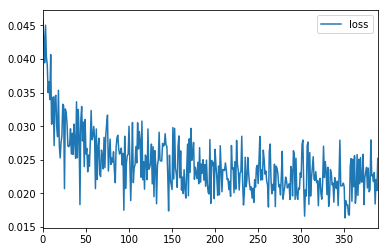

In [29]:
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()
plt.show()

10 more epoch

In [30]:
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data2.train_loader):
#         print(i_batch,sample_batched)
        
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
        loss.backward()
        optimizer.step()
        

#         if (i + 1) % 10 == 0:

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs+1, i_batch + 1, 
                      len(data2.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])


Epoch [1/11], Step [1/39], Loss: 0.0180
Epoch [1/11], Step [2/39], Loss: 0.0269
Epoch [1/11], Step [3/39], Loss: 0.0190
Epoch [1/11], Step [4/39], Loss: 0.0181
Epoch [1/11], Step [5/39], Loss: 0.0232
Epoch [1/11], Step [6/39], Loss: 0.0254
Epoch [1/11], Step [7/39], Loss: 0.0199
Epoch [1/11], Step [8/39], Loss: 0.0186
Epoch [1/11], Step [9/39], Loss: 0.0237
Epoch [1/11], Step [10/39], Loss: 0.0188
Epoch [1/11], Step [11/39], Loss: 0.0193
Epoch [1/11], Step [12/39], Loss: 0.0201
Epoch [1/11], Step [13/39], Loss: 0.0179
Epoch [1/11], Step [14/39], Loss: 0.0160
Epoch [1/11], Step [15/39], Loss: 0.0199
Epoch [1/11], Step [16/39], Loss: 0.0231
Epoch [1/11], Step [17/39], Loss: 0.0199
Epoch [1/11], Step [18/39], Loss: 0.0208
Epoch [1/11], Step [19/39], Loss: 0.0224
Epoch [1/11], Step [20/39], Loss: 0.0225
Epoch [1/11], Step [21/39], Loss: 0.0224
Epoch [1/11], Step [22/39], Loss: 0.0231
Epoch [1/11], Step [23/39], Loss: 0.0220
Epoch [1/11], Step [24/39], Loss: 0.0184
Epoch [1/11], Step [25/39

Epoch [6/11], Step [11/39], Loss: 0.0203
Epoch [6/11], Step [12/39], Loss: 0.0220
Epoch [6/11], Step [13/39], Loss: 0.0173
Epoch [6/11], Step [14/39], Loss: 0.0193
Epoch [6/11], Step [15/39], Loss: 0.0198
Epoch [6/11], Step [16/39], Loss: 0.0217
Epoch [6/11], Step [17/39], Loss: 0.0213
Epoch [6/11], Step [18/39], Loss: 0.0187
Epoch [6/11], Step [19/39], Loss: 0.0192
Epoch [6/11], Step [20/39], Loss: 0.0224
Epoch [6/11], Step [21/39], Loss: 0.0208
Epoch [6/11], Step [22/39], Loss: 0.0214
Epoch [6/11], Step [23/39], Loss: 0.0200
Epoch [6/11], Step [24/39], Loss: 0.0185
Epoch [6/11], Step [25/39], Loss: 0.0199
Epoch [6/11], Step [26/39], Loss: 0.0224
Epoch [6/11], Step [27/39], Loss: 0.0190
Epoch [6/11], Step [28/39], Loss: 0.0181
Epoch [6/11], Step [29/39], Loss: 0.0218
Epoch [6/11], Step [30/39], Loss: 0.0197
Epoch [6/11], Step [31/39], Loss: 0.0193
Epoch [6/11], Step [32/39], Loss: 0.0227
Epoch [6/11], Step [33/39], Loss: 0.0258
Epoch [6/11], Step [34/39], Loss: 0.0213
Epoch [6/11], St

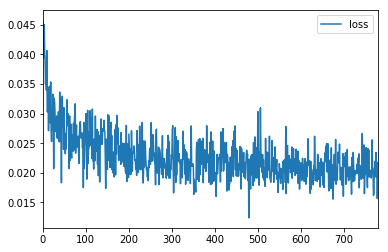

In [31]:
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()
plt.show()

In [50]:
predicted = np.zeros_like(data2.train_dataset.train)

inputs = data2.train_dataset.train 
# + data2.train_dataset.newusers
# dataset.test_dataset.part = 'all'
for item_id in xrange(data2.train_dataset.train.shape[1]):
    sample = Variable(torch.from_numpy(inputs[:,item_id]))
    output = net(sample)
#     print(type(test_input['id']))
    predicted[:,item_id] = output.data.numpy()

In [58]:
import rec 
reload(rec)
r = rec.Rec(rec_len= 5)
# a = np.random.random(predicted.shape)
r.set_prediction_matrix(prediction_matrix=predicted)
r.produce_rec_list(targets=data2.test_dataset.targets)
r.evaluate(test=data2.test_dataset.test)

(0.071854304635761604, 0.0069943056273791583)

In [42]:
data2.test_dataset.targets

array([   8,   27,   55,   84,   91,  110,  113,  141,  144,  146,  177,
        178,  204,  205,  217,  224,  232,  253,  274,  275,  286,  324,
        362,  381,  397,  416,  426,  434,  435,  436,  437,  440,  445,
        461,  465,  472,  482,  498,  511,  515,  554,  560,  570,  571,
        606,  634,  640,  645,  650,  652,  658,  661,  671,  672,  688,
        691,  716,  731,  748,  754,  755,  782,  785,  788,  811,  812,
        832,  837,  851,  868,  907,  908,  909,  921,  922,  949,  953,
        954,  959,  969,  974,  977,  981,  992,  994,  999, 1017, 1048,
       1073, 1081, 1084, 1109, 1120, 1147, 1152, 1161, 1164, 1165, 1184,
       1189, 1191, 1207, 1208, 1209, 1211, 1217, 1223, 1251, 1252, 1263,
       1273, 1285, 1291, 1297, 1299, 1309, 1318, 1329, 1334, 1337, 1339,
       1368, 1377, 1392, 1396, 1411, 1423, 1428, 1430, 1444, 1447, 1450,
       1451, 1455, 1457, 1461, 1462, 1465, 1466, 1484, 1490, 1500, 1508,
       1518, 1520, 1537, 1547, 1549, 1555, 1557, 15

In [ ]:
net = Net(6040,350,6040)
from __future__ import print_function

learning_rate = 0.001

certeria = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_history = []
print(net.train())
num_epochs = 20
for epoch in range(num_epochs):
    for i_batch, sample_batched in enumerate(data2.train_loader):
#         print(i_batch,sample_batched)
        
        sample = Variable(sample_batched['sample'])
#         print(sample)
#         sample = Variable()
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(sample)
        loss = certeria(outputs, sample)
        loss.backward()
        optimizer.step()
        

#         if (i + 1) % 10 == 0:

        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   % (epoch + 1, num_epochs+1, i_batch + 1, 
                      len(data2.train_loader) ,loss.data[0]))
        loss_history.append(loss.data[0])

#plot error
loss_df= pd.DataFrame(loss_history,columns=['loss'])
loss_df.plot()